In [1]:
import logging
import numpy as np
import awkward as ak
import json
import copy
from collections import defaultdict
from coffea import processor
from coffea import hist as chist
from coffea import nanoevents
import hist
logger = logging.getLogger(__name__)
import time
from pprint import pprint
import sys
from coffea.nanoevents import NanoEventsFactory
from coffea import util
import mplhep
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import boost_histogram as bh

print("Done")


/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/venv/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


Done


In [2]:
stuff = util.load("/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/splashes23.coffea")
print(stuff.keys())



dict_keys(['r365537_Splashes_FEVT', 'r365373_Splashes_FEVT', 'r365491_Splashes_FEVT', 'r365375_Splashes_FEVT'])


In [3]:
run_key = "r365537_Splashes_FEVT"
run_short = "365537"
#run_key = "r365373_Splashes_FEVT"
#run_short = "365373"


In [4]:
for it_run_key in stuff.keys():
    print(it_run_key)
    sumq_list = list(stuff[it_run_key]["event_sumq_dict"].items())
    sumq_list = sorted(sumq_list, key=lambda x: x[1], reverse=True)
    print(len(sumq_list))
    pprint(sumq_list[:10])

r365537_Splashes_FEVT
10707
[(6675, 28129233024.0),
 (6802, 27473567840.0),
 (6461, 27363910432.0),
 (6742, 26953386720.0),
 (7244, 26807794336.0),
 (7782, 26672647168.0),
 (7307, 26627830848.0),
 (6601, 26575163456.0),
 (7947, 26386988160.0),
 (8004, 26366974112.0)]
r365373_Splashes_FEVT
2453
[(1520, 38368756224.0),
 (216, 29091382944.0),
 (1258, 6484947944.0),
 (1521, 139849468.4375),
 (217, 16185076.453125),
 (2419, 1632064.1875),
 (711, 1510144.921875),
 (927, 1500661.375),
 (620, 1489691.765625),
 (1237, 1489189.46875)]
r365491_Splashes_FEVT
140
[(33, 1488247.921875),
 (120, 1482610.296875),
 (86, 1479166.640625),
 (75, 1456082.96875),
 (1, 1452198.296875),
 (4, 1445431.84375),
 (42, 1441207.203125),
 (52, 1439764.40625),
 (77, 1438320.0),
 (117, 1432563.515625)]
r365375_Splashes_FEVT
1856
[(1446, 1501213.46875),
 (180, 1500484.921875),
 (2134, 1497522.515625),
 (830, 1496871.40625),
 (1876, 1485450.453125),
 (1834, 1483613.28125),
 (1346, 1477504.734375),
 (1002, 1477033.953125),

In [5]:
bighist = stuff[run_key]["splash_depthmap"]
event_numbers = list(bighist.axes[0])
event_numbers.sort()
print(event_numbers)


[2221, 2299, 3794, 4110, 5744, 6397, 6398, 6399, 6461, 6462, 6463, 6464, 6465, 6466, 6536, 6537, 6538, 6539, 6601, 6602, 6603, 6675, 6676, 6742, 6743, 6744, 6745, 6746, 6802, 6803, 7086, 7087, 7088, 7089, 7133, 7134, 7135, 7136, 7244, 7245, 7307, 7570, 7571, 7573, 7617, 7618, 7782, 7783, 7834, 7835, 7836, 7885, 7886, 7887, 7947, 7948, 7949, 8004, 8005, 8006, 8007, 8008, 8009, 8065, 8118, 8119, 8120, 8121, 8122, 8123, 8181, 8182, 8183, 8184, 8185, 8386, 8387, 8494, 8549, 8550, 8551, 8552, 8553, 8606, 8607, 8670, 8671, 8723, 8788, 8789, 8790, 8834, 8835, 9116, 9173, 9174, 9175, 9176, 9177, 9280, 9332, 9333, 9334, 9335, 9393, 9394, 9772, 9773, 10044, 10045, 10103, 10160, 10161, 10162, 10272, 10315, 10316, 10317, 10386, 10387, 10430, 10431, 10432]


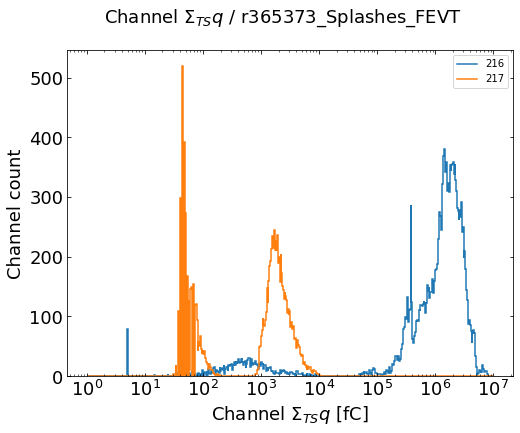

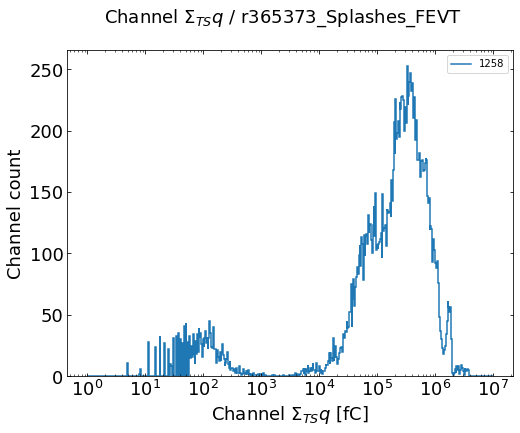

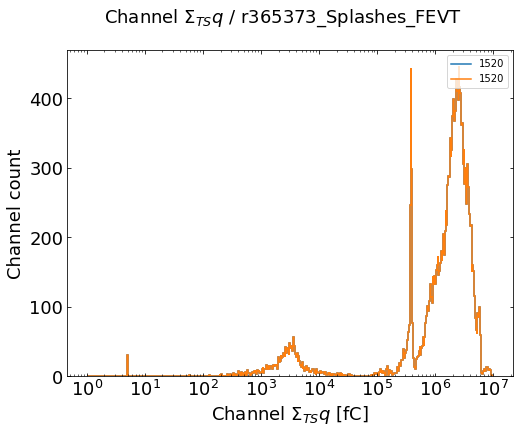

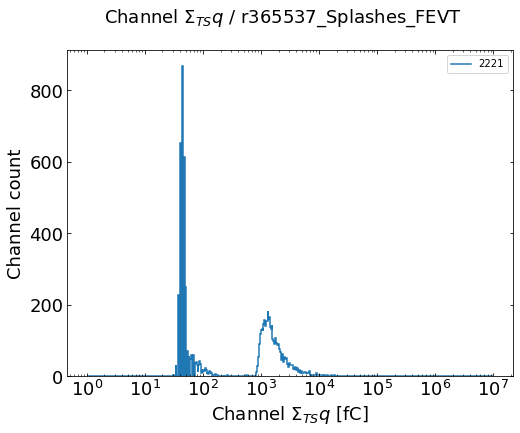

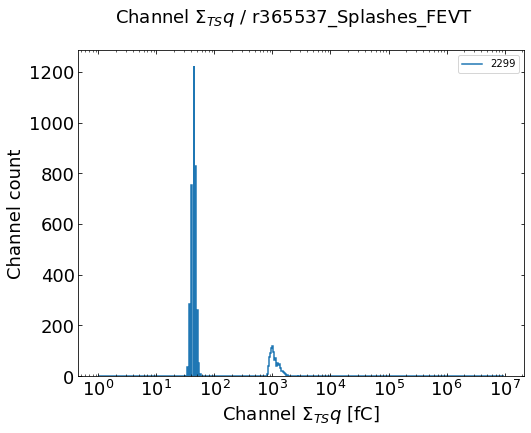

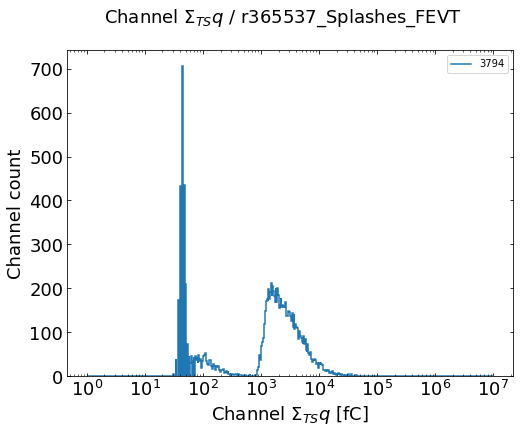

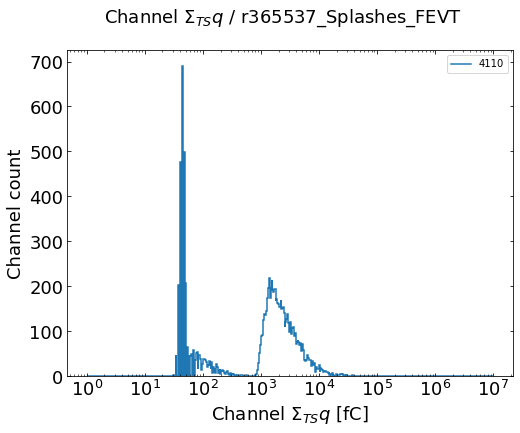

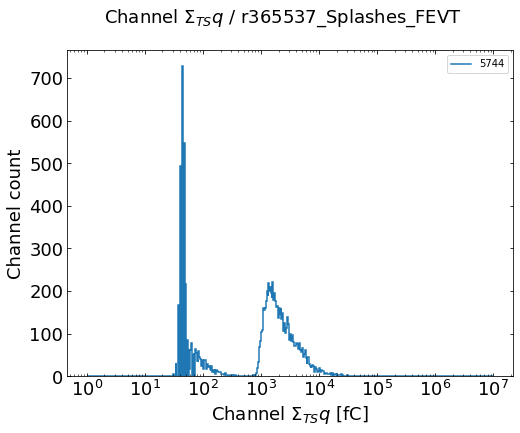

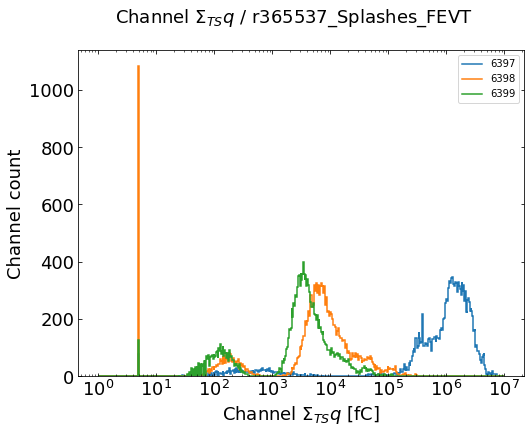

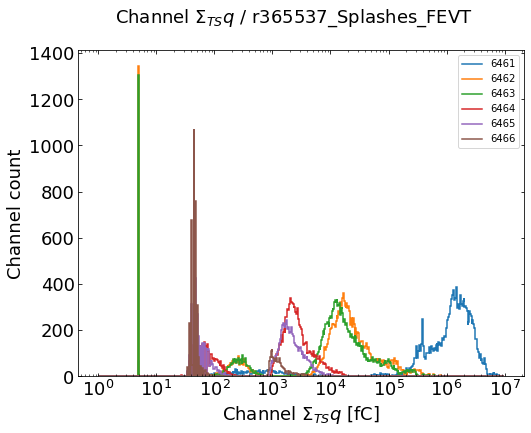

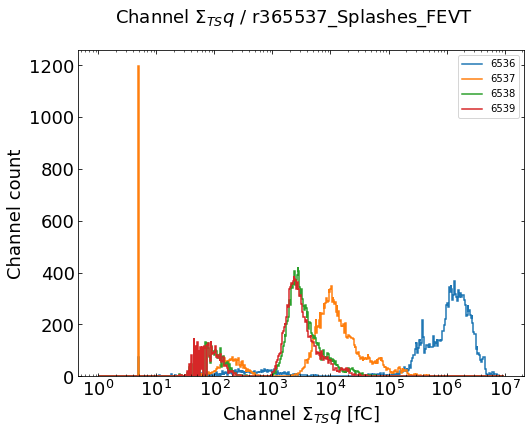

In [4]:
big_dictionary = {
    "r365373_Splashes_FEVT": [
        [216, 217], 
        [1258], 
        [1520, 1520],
    ], 
    "r365537_Splashes_FEVT": [
        [2221], 
        [2299], 
        [3794], 
        [4110], 
        [5744], 
        [6397, 6398, 6399], 
        [6461, 6462, 6463, 6464, 6465, 6466], 
        [6536, 6537, 6538, 6539], 
        [6601, 6602, 6603], 
        [6675, 6676, 6742, 6743, 6744, 6745, 6746], 
        [6802, 6803], 
        [7086, 7087, 7088, 7089], 
        [7133, 7134, 7135, 7136], 
        [7244, 7245], 
        [7307], 
        [7570, 7571, 7573], 
        [7617, 7618], 
        [7782, 7783], 
        [7834, 7835, 7836], 
        [7885, 7886, 7887], 
        [7947, 7948, 7949], 
        [8004, 8005, 8006, 8007, 8008, 8009], 
        [8065], 
        [8118, 8119, 8120, 8121, 8122, 8123], 
        [8181, 8182, 8183, 8184, 8185, 8386, 8387], 
        [8494], 
        [8549, 8550, 8551, 8552, 8553], 
        [8606, 8607], 
        [8670, 8671], 
        [8723], 
        [8788, 8789, 8790], 
        [8834, 8835], 
        [9116], 
        [9173, 9174, 9175, 9176, 9177], 
        [9280, 9332, 9333, 9334, 9335], 
        [9393, 9394], 
        [9772, 9773], 
        [10044, 10045], 
        [10103], 
        [10160, 10161, 10162], 
        [10272], 
        [10315, 10316, 10317], 
        [10386, 10387], 
        [10430, 10431, 10432], 
    ], 
}
counter = 0
for irunkey, event_number_groups in big_dictionary.items():
    stuff[irunkey]["splash_sumq"] = stuff[irunkey]["splash_sumq"][:, ::2j]
    for event_number_group in event_number_groups:
        fig, ax = plt.subplots(1,1,figsize=(8,6))
        #print(stuff[irunkey]["splash_sumq"].axes[0])
        #print(event_number_group)
        hists = {}
        for i, event_number in enumerate(event_number_group):
            hists[event_number] = stuff[irunkey]["splash_sumq"][{"event_number": bh.loc(event_number)}]
            mplhep.histplot(hists[event_number], ax=ax, label=event_number)
        #print(this_hist.axes)
        #mplhep.histplot(this_hist, ax=ax)
        #this_hist.plot(ax=ax)
        fig.suptitle(f"Channel $\Sigma_{{TS}} q$ / {irunkey}", fontsize=18)
        ax.set_xscale("log")
        ax.xaxis.label.set_size(18)
        ax.xaxis.set_tick_params(labelsize=18)
        ax.yaxis.label.set_size(18)
        ax.yaxis.set_tick_params(labelsize=18)
        ax.set_ylabel("Channel count")
        ax.legend(loc='best')
        #ax.set_xticks(10**np.arange(0, 7+1))

        ax.tick_params(top=True, bottom=True, left=True, right=True, direction="in")
        ax.tick_params(which="minor", top=True, bottom=True, left=True, right=True, direction="in")
        locmaj = matplotlib.ticker.LogLocator(base=10,numticks=9) 
        ax.xaxis.set_major_locator(locmaj)
        locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),numticks=9)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

        fig.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/channel_sumq_{run_short}_e{event_number}.png", bbox_inches = "tight")
        
        if counter > 10:
            plt.close(fig)
        counter = counter + 1

In [5]:
# Two intermediate plots (depth 1-4, 5-7)
bighist = stuff[run_key]["splash_depthmap"]

zmax = np.max(bighist.values())
plt.tight_layout()
for i, event_number in enumerate(event_numbers):
    fig1, axs1 = plt.subplots(2, 2, figsize=(30, 20))
    fig1.suptitle(f"Total digi charge [fC] / Run {run_short} / Event {event_number}", fontsize=36)
    for depth in range(1, 4+1):
        this_hist = bighist[{"event_number": bh.loc(event_number), "depth": bh.loc(depth)}]
        this_ax = axs1.flat[depth-1]
        pcm_objs = this_hist.plot(ax=this_ax, cmap="rainbow", norm=colors.LogNorm(vmin=10, vmax=zmax*10), cbar=False)
        this_ax.xaxis.label.set_size(28)
        this_ax.xaxis.set_tick_params(labelsize=28)
        this_ax.yaxis.label.set_size(28)
        this_ax.yaxis.set_tick_params(labelsize=28)
        this_ax.set_title(f"Depth {depth}", fontsize=36)
        #colorbar = pcm_objs[1]
        #colorbar.ax.yaxis.label.set_size(28)
        #colorbar.ax.tick_params(axis="y", labelsize=28)
    fig1.tight_layout(rect=[0, 0.03, 0.92, 0.97])
    cbar_ax1 = fig1.add_axes([0.93, 0.15, 0.05, 0.7])
    cbar1 = fig1.colorbar(pcm_objs[0], cax=cbar_ax1, cmap="rainbow")
    cbar1.ax.tick_params(axis="y", labelsize=36)
    cbar1.set_label("Total charge [fC]", rotation=270, fontsize=36, labelpad=50)
    fig1.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/depthmap4_r{run_short}_e{event_number}_d1-4.png")

    fig2, axs2 = plt.subplots(2, 2, figsize=(30, 20))
    fig2.suptitle(f"Total digi charge [fC] / Run {run_short} / Event {event_number}", fontsize=36)
    for depth in range(5, 7+1):
        this_hist = bighist[{"event_number": bh.loc(event_number), "depth": bh.loc(depth)}]
        this_ax = axs2.flat[depth-4-1]
        pcm_objs = this_hist.plot(ax=this_ax, cmap="rainbow", norm=colors.LogNorm(vmin=10, vmax=zmax*10), cbar=False)
        this_ax.xaxis.label.set_size(28)
        this_ax.xaxis.set_tick_params(labelsize=28)
        this_ax.yaxis.label.set_size(28)
        this_ax.yaxis.set_tick_params(labelsize=28)
        this_ax.set_title(f"Depth {depth}", fontsize=36)
        #colorbar = pcm_objs[1]
        #colorbar.ax.yaxis.label.set_size(14)
        #colorbar.ax.tick_params(axis="y", labelsize=28)
    fig2.tight_layout(rect=[0, 0.03, 0.92, 0.97])
    cbar_ax2 = fig2.add_axes([0.93, 0.15, 0.05, 0.7])
    cbar2 = fig2.colorbar(pcm_objs[0], cax=cbar_ax2, cmap="rainbow")
    cbar2.ax.tick_params(axis="y", labelsize=36)
    cbar2.set_label("Total charge [fC]", rotation=270, fontsize=36, labelpad=50)
    axs2[-1, -1].axis('off')
    fig2.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/depthmap4_r{run_short}_e{event_number}_d5-7.png", bbox_inches = "tight")
    if i > 10:
        plt.close(fig)


#plt.tight_layout()

NameError: name 'event_numbers' is not defined

<Figure size 432x288 with 0 Axes>

In [8]:
# One plot per depth
bighist = stuff[run_key]["splash_depthmap"]
print(bighist.axes)
event_numbers = list(bighist.axes[0])
print(event_numbers)

zmax = np.max(bighist.values())
plt.tight_layout()
for event_number in event_numbers:
    for depth in range(1, 7+1):
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.set_title(f"Total digi charge [fC] / Run {run_short} / Event {event_number} / Depth {depth}", fontsize=18)
        this_hist = bighist[{"event_number": bh.loc(event_number), "depth": bh.loc(depth)}]
        pcm_objs = this_hist.plot(ax=ax, cmap="rainbow", norm=colors.LogNorm(vmin=10, vmax=zmax*10), cbar=True)
        ax.xaxis.label.set_size(18)
        ax.xaxis.set_tick_params(labelsize=18)
        ax.yaxis.label.set_size(18)
        ax.yaxis.set_tick_params(labelsize=18)
        colorbar = pcm_objs[1]
        colorbar.ax.yaxis.label.set_size(18)
        colorbar.ax.tick_params(axis="y", labelsize=18)
        colorbar.set_label("Total charge [fC]", rotation=270, fontsize=18, labelpad=25)
        fig.tight_layout()
        fig.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/depthmap1_r{run_short}_e{event_number}_d{depth}.png", bbox_inches = "tight")
        plt.close(fig)

#plt.tight_layout()

(IntCategory([7089, 7088, 7087, 7086, 10317, 10316, 10315, 9394, 9393, 10272, 6803, 6802, 6603, 6602, 6601, 7136, 7135, 7134, 7133, 7245, 7244, 9335, 9333, 9334, 9332, 9773, 9772, 2221, 2299, 7783, 7782, 7836, 7835, 7834, 7887, 7886, 7885, 10045, 10044, 10103, 7573, 7571, 7570, 7618, 7617, 6399, 6398, 6397, 6466, 6465, 6464, 6462, 6463, 6461, 6538, 6537, 6539, 6536, 8835, 8834, 10387, 10386, 10162, 10161, 10160, 7307, 7948, 7949, 7947, 8008, 8009, 8006, 8007, 8005, 8004, 8065, 8122, 8121, 8123, 8120, 8119, 3794, 4110, 6676, 6675, 8118, 8185, 8184, 8183, 8182, 8181, 8387, 8386, 8494, 8553, 8552, 8551, 8550, 8549, 6745, 6743, 6744, 6746, 6742, 5744, 8607, 8606, 8671, 8670, 8723, 8790, 8789, 8788, 9116, 9177, 9176, 9175, 9174, 9173, 9280, 10431, 10432, 10430], growth=True, name='event_number', label='Event Number'), Regular(83, -41.5, 41.5, name='ieta'), Regular(72, 0.5, 72.5, name='iphi'), Regular(7, 0.5, 7.5, name='depth'))
[7089, 7088, 7087, 7086, 10317, 10316, 10315, 9394, 9393, 10272

<Figure size 432x288 with 0 Axes>

(IntCategory([7089, 7088, 7087, 7086, 10317, 10316, 10315, 9394, 9393, 10272, 6803, 6802, 6603, 6602, 6601, 7136, 7135, 7134, 7133, 7245, 7244, 9335, 9333, 9334, 9332, 9773, 9772, 2221, 2299, 7783, 7782, 7836, 7835, 7834, 7887, 7886, 7885, 10045, 10044, 10103, 7573, 7571, 7570, 7618, 7617, 6399, 6398, 6397, 6466, 6465, 6464, 6462, 6463, 6461, 6538, 6537, 6539, 6536, 8835, 8834, 10387, 10386, 10162, 10161, 10160, 7307, 7948, 7949, 7947, 8008, 8009, 8006, 8007, 8005, 8004, 8065, 8122, 8121, 8123, 8120, 8119, 3794, 4110, 6676, 6675, 8118, 8185, 8184, 8183, 8182, 8181, 8387, 8386, 8494, 8553, 8552, 8551, 8550, 8549, 6745, 6743, 6744, 6746, 6742, 5744, 8607, 8606, 8671, 8670, 8723, 8790, 8789, 8788, 9116, 9177, 9176, 9175, 9174, 9173, 9280, 10431, 10432, 10430], growth=True, name='event_number', label='Event Number'), Regular(83, -41.5, 41.5, name='ieta'), Regular(72, 0.5, 72.5, name='iphi'), Regular(7, 0.5, 7.5, name='depth'), Variable(array([1.00000000e+00, 1.81659979e+00, 3.30003479e+00,

<ipython-input-10-340b30cdc474>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(30, 20))


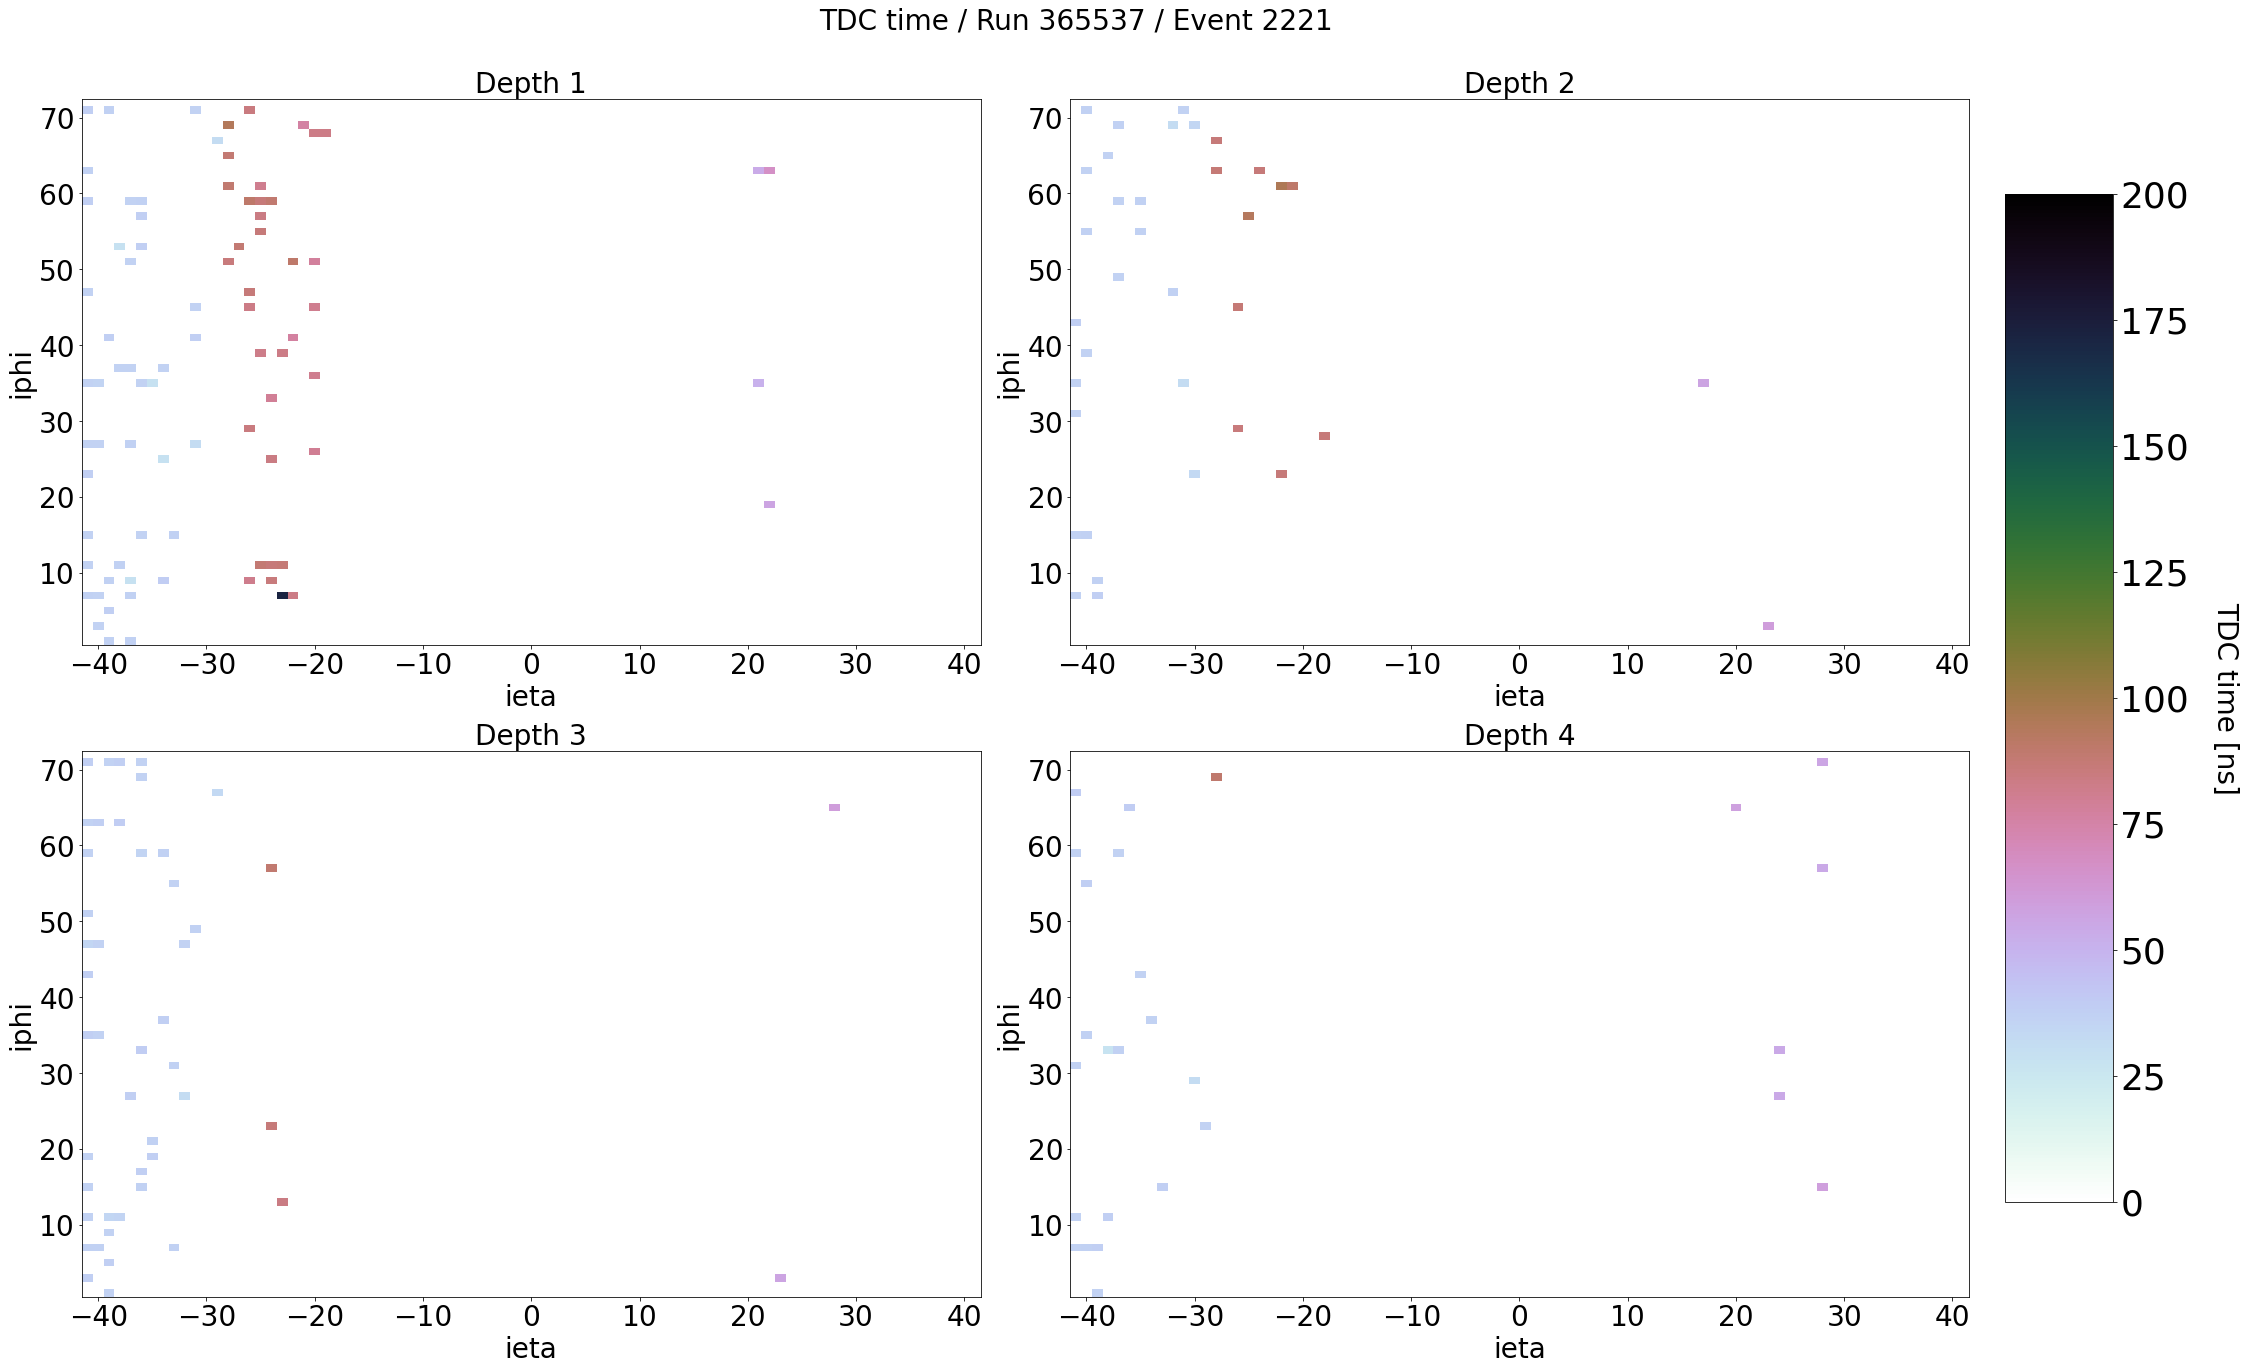

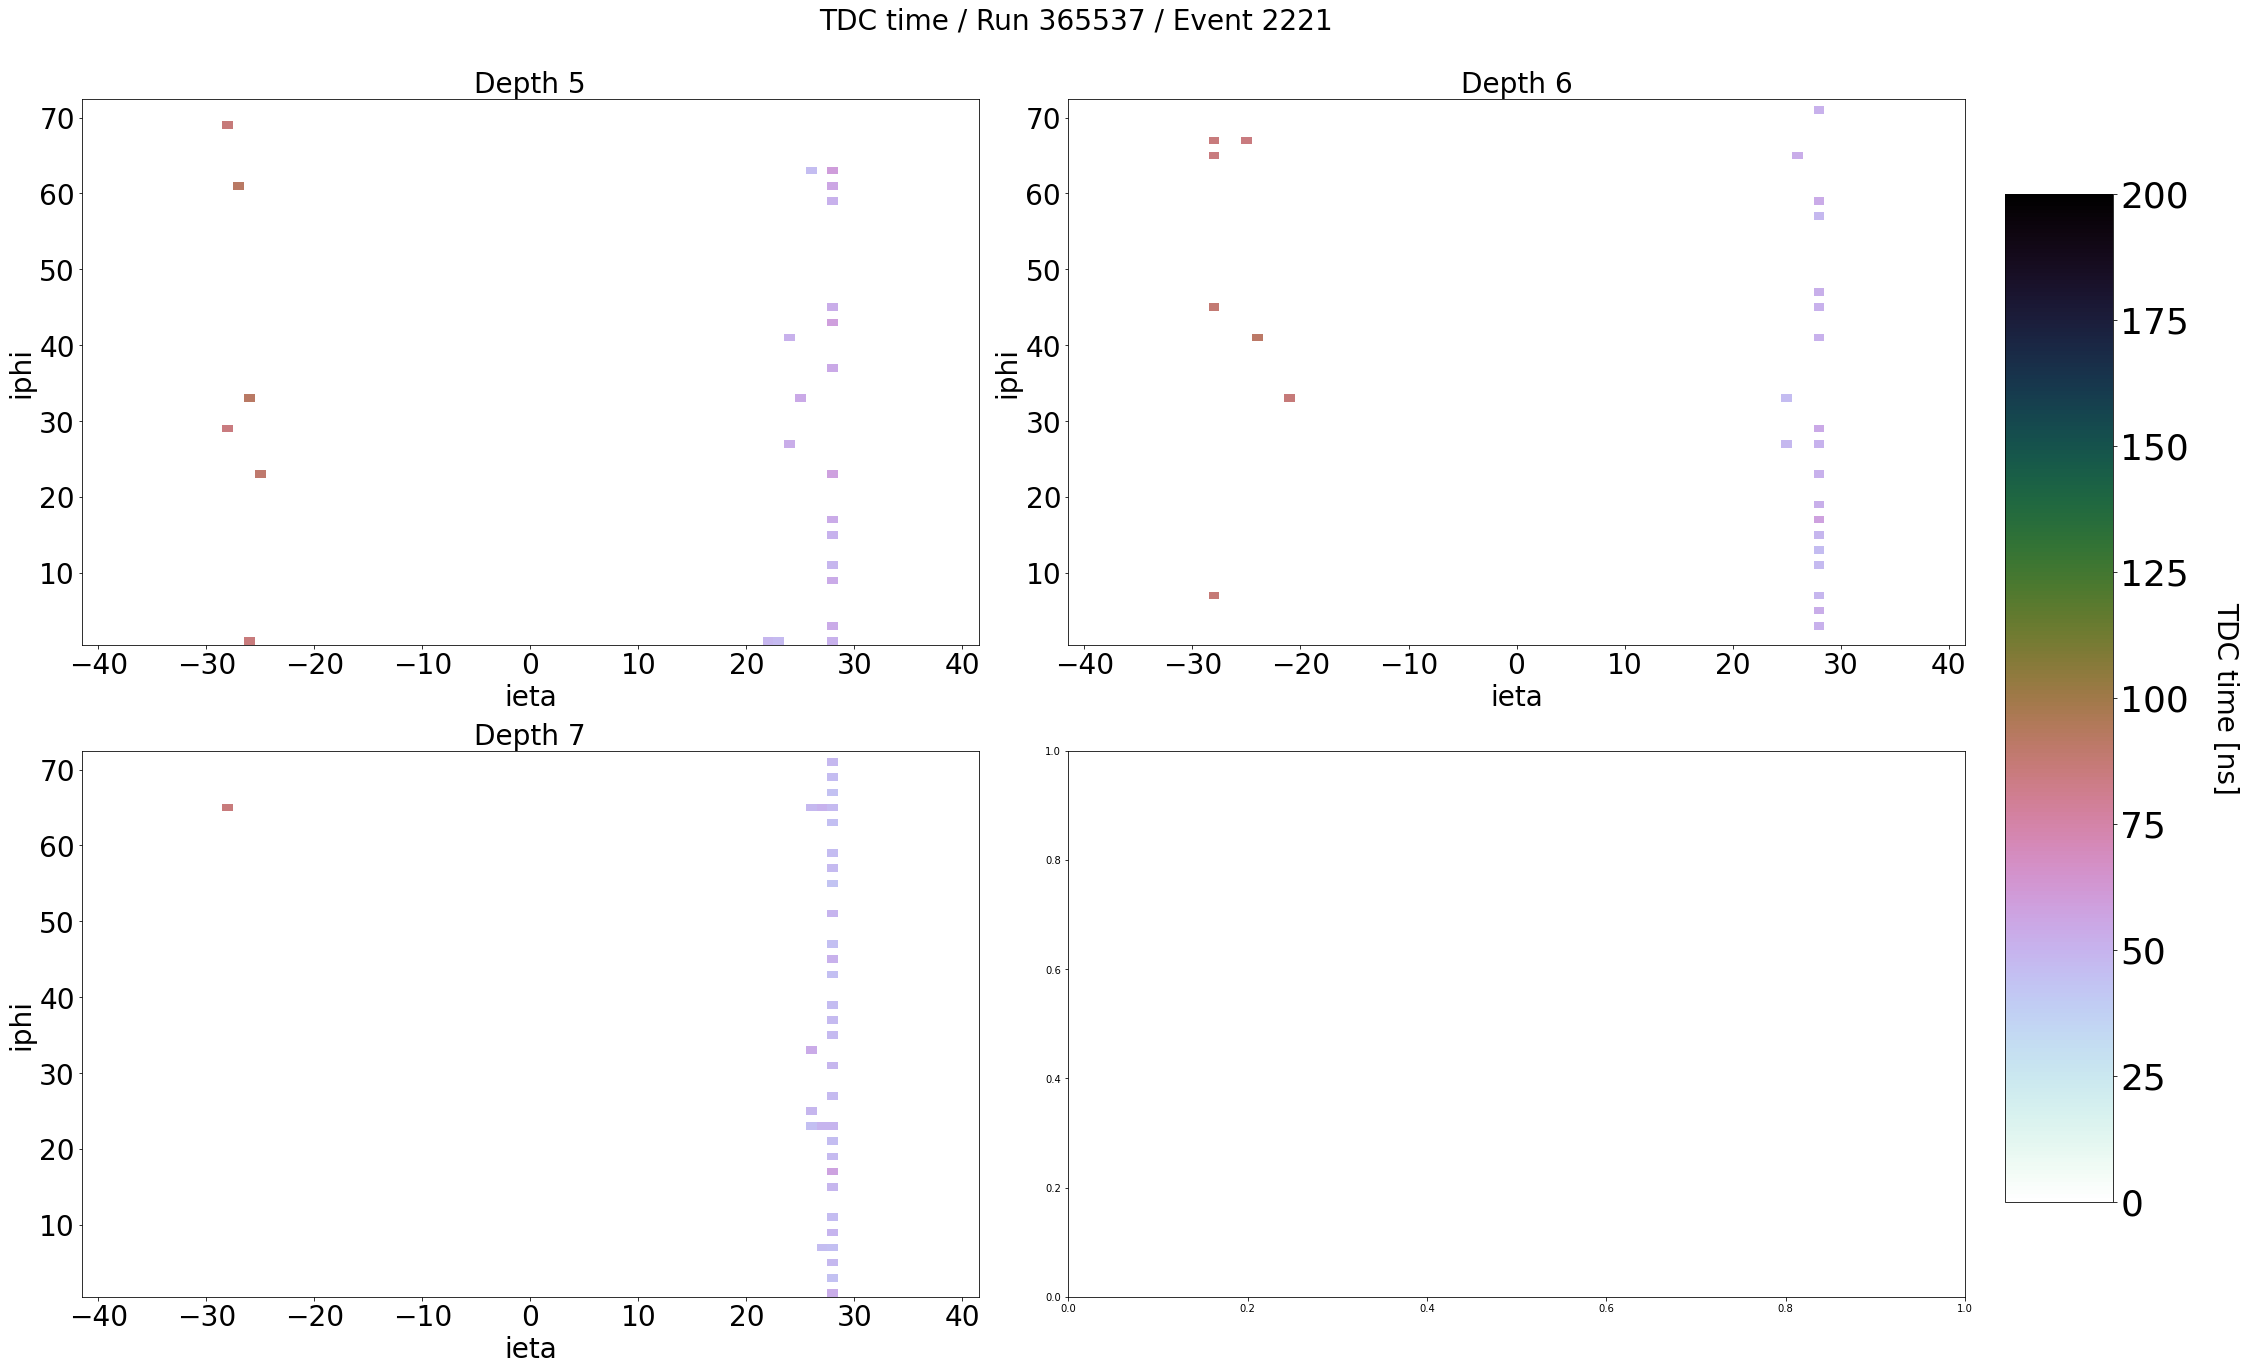

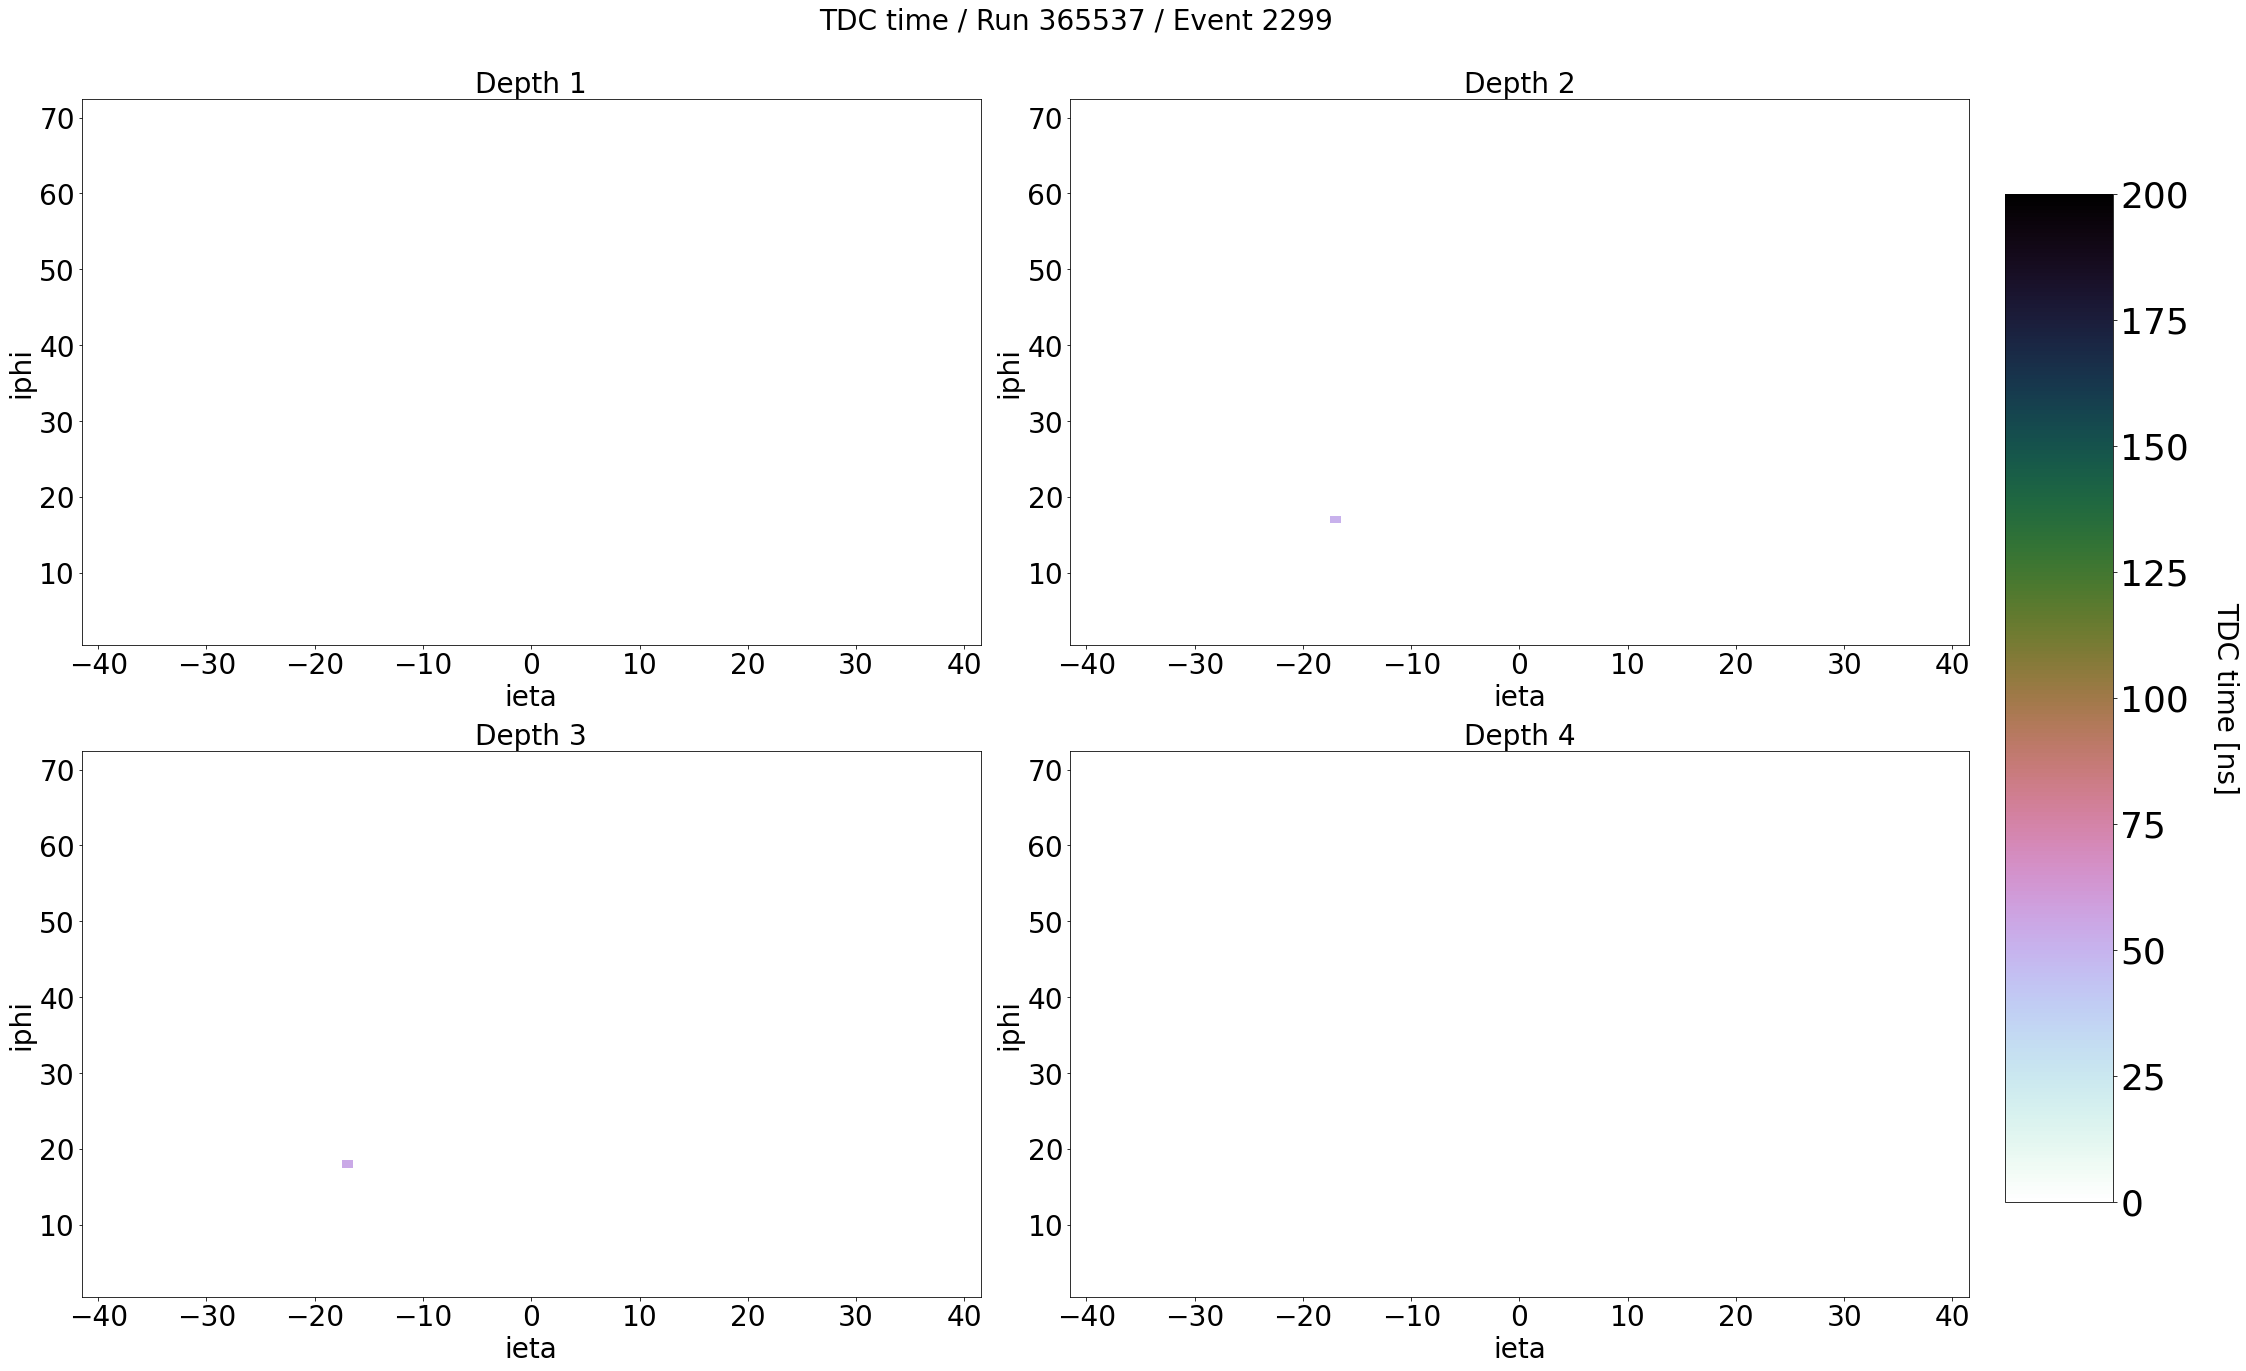

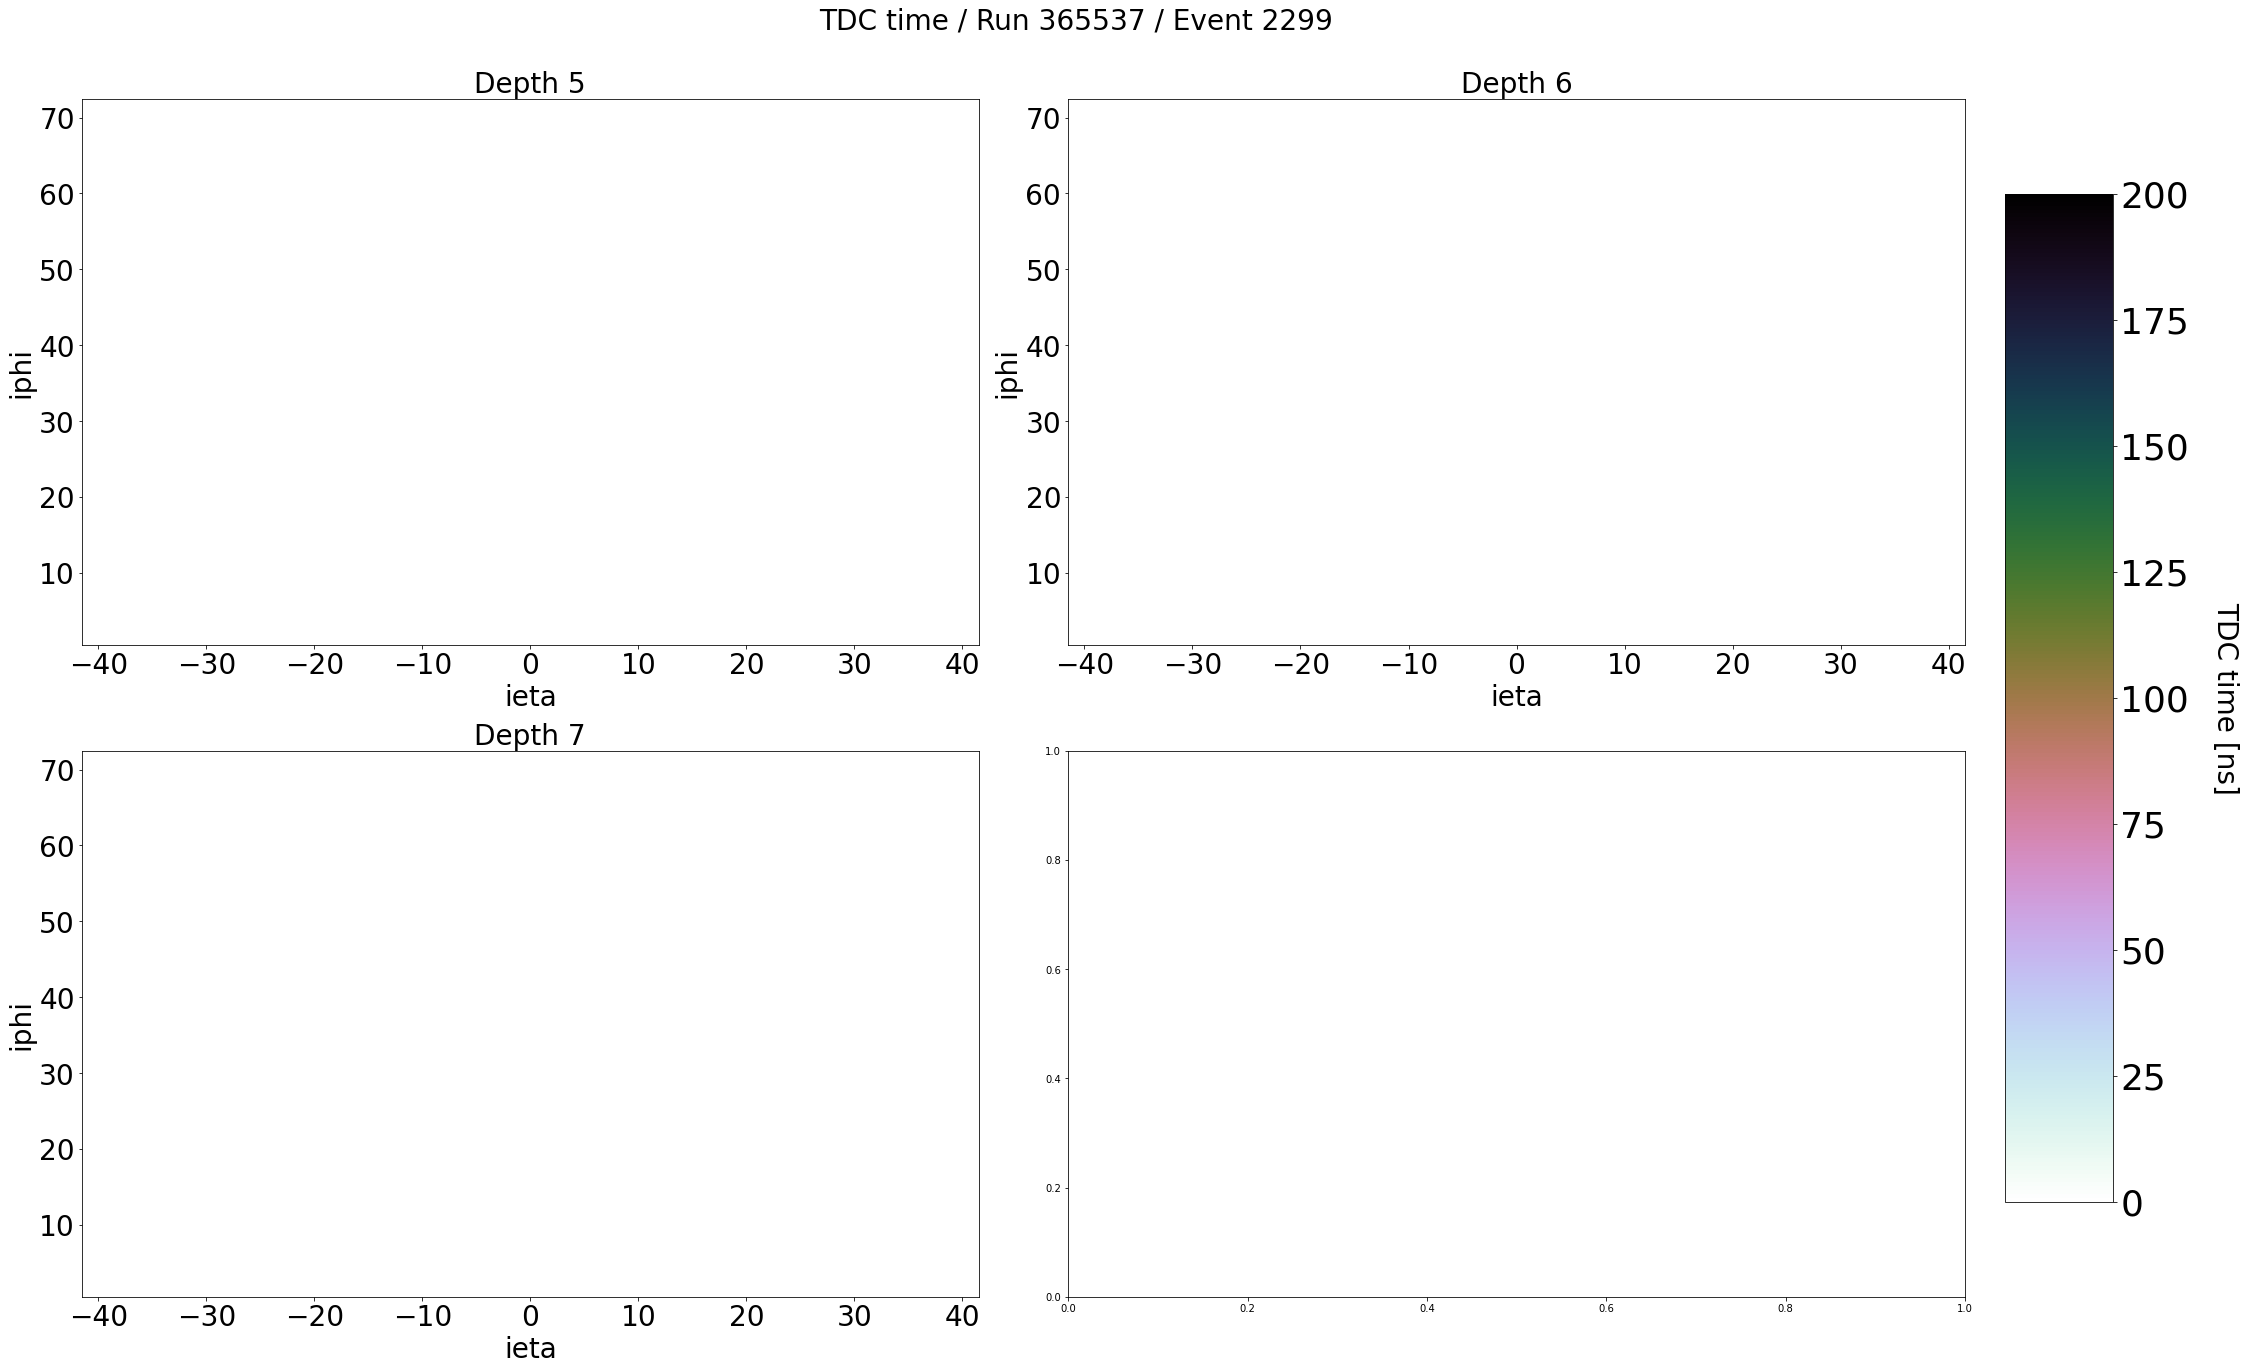

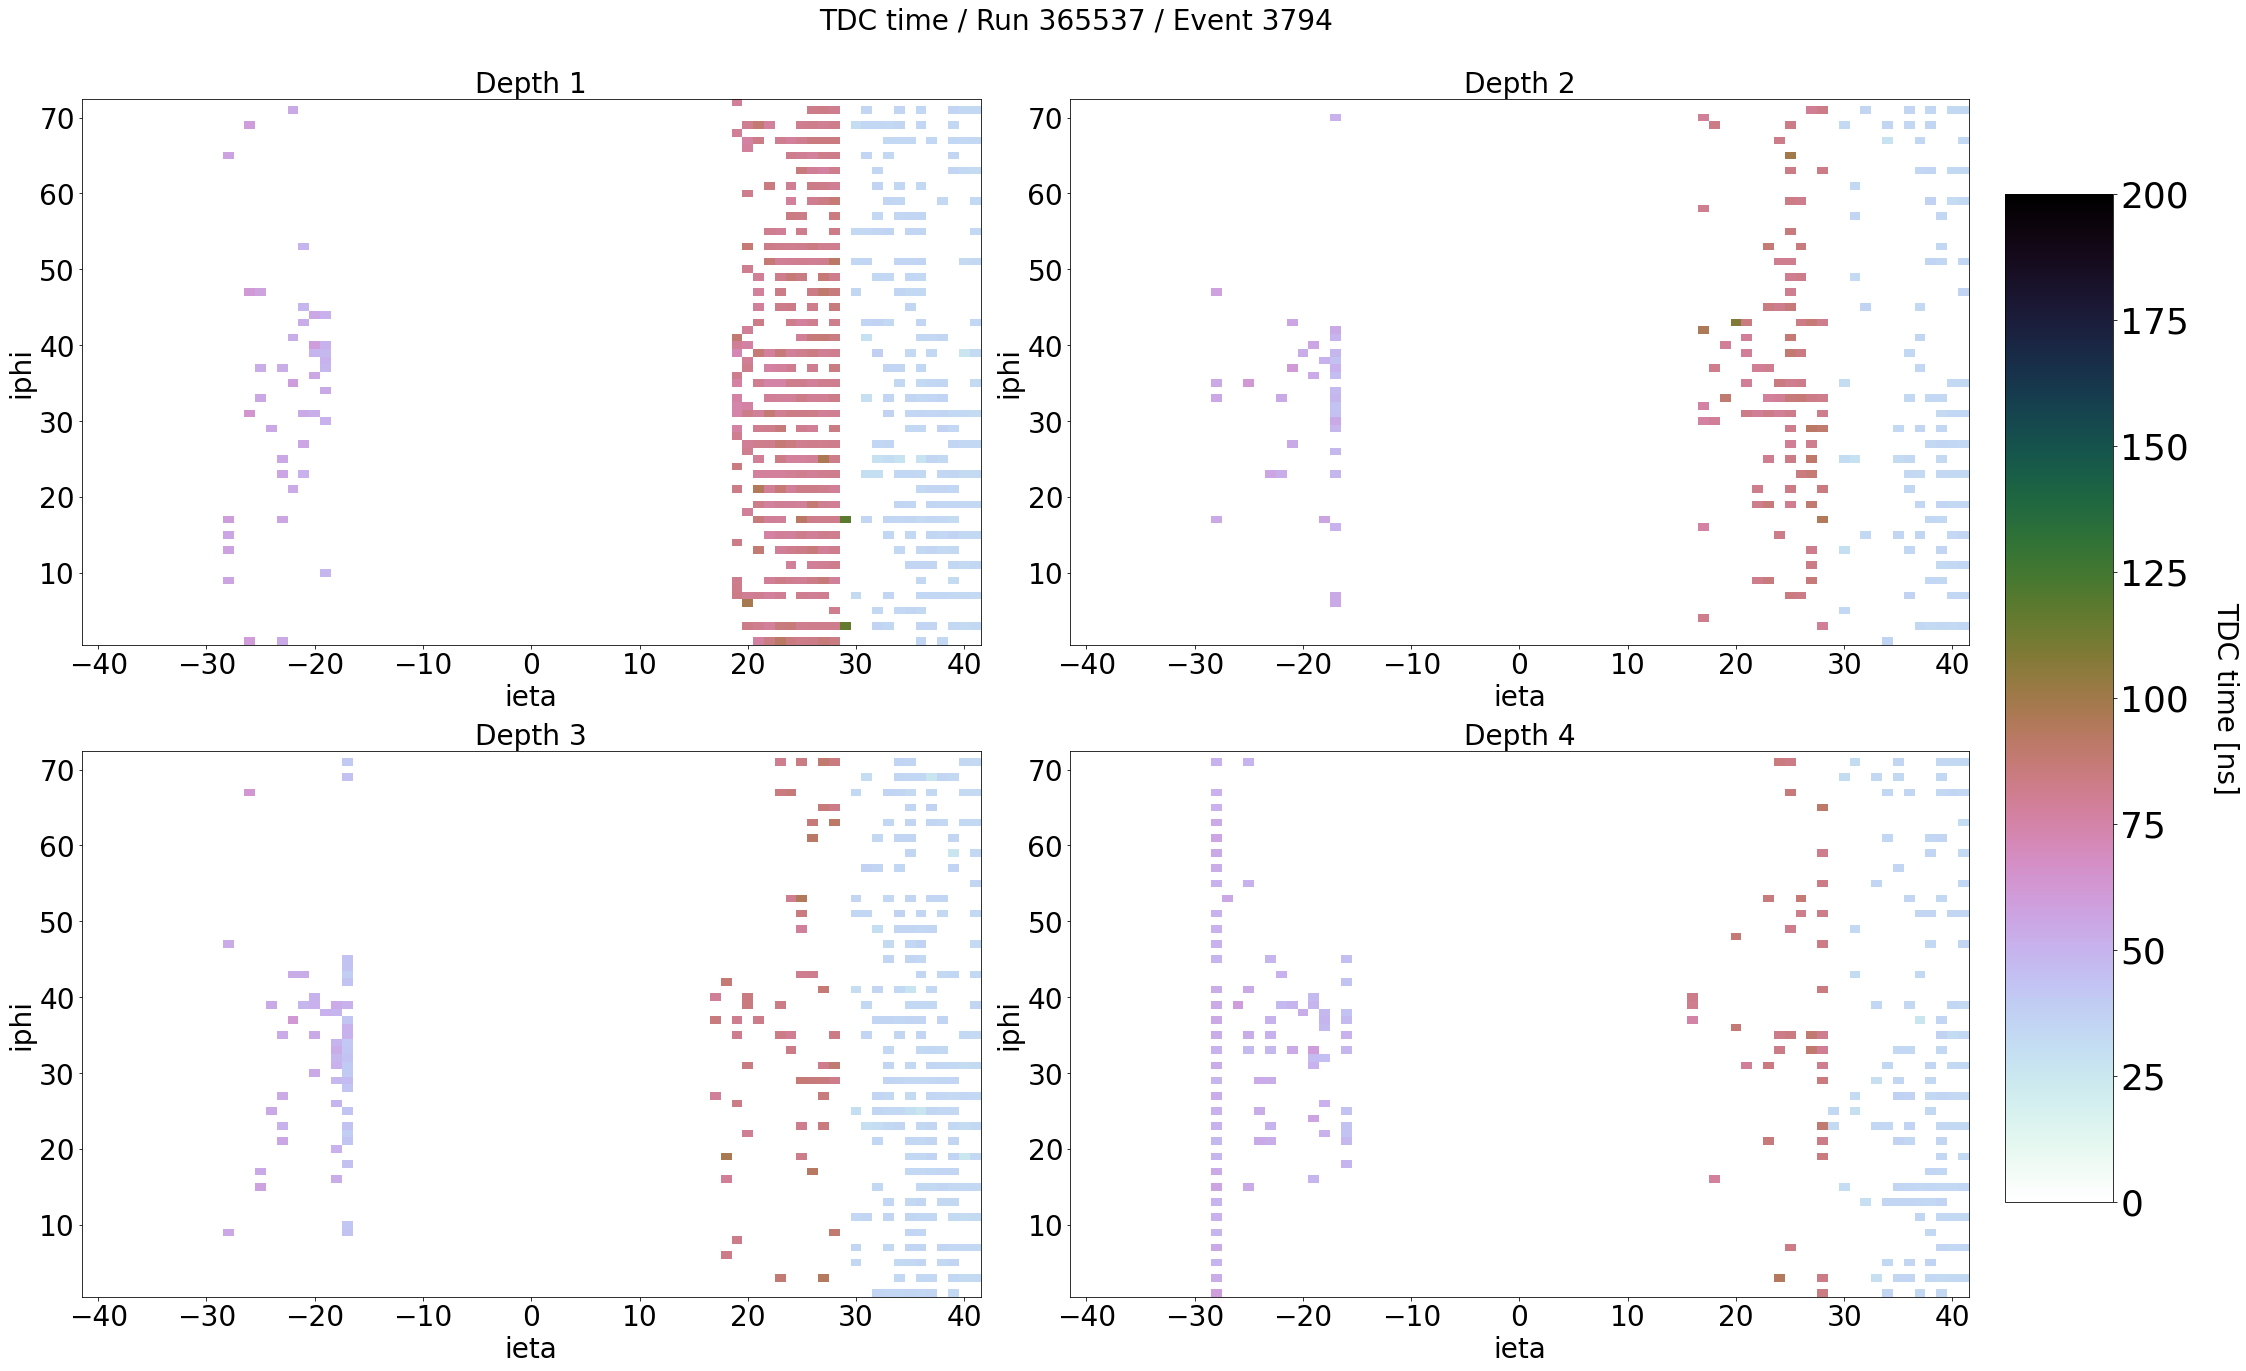

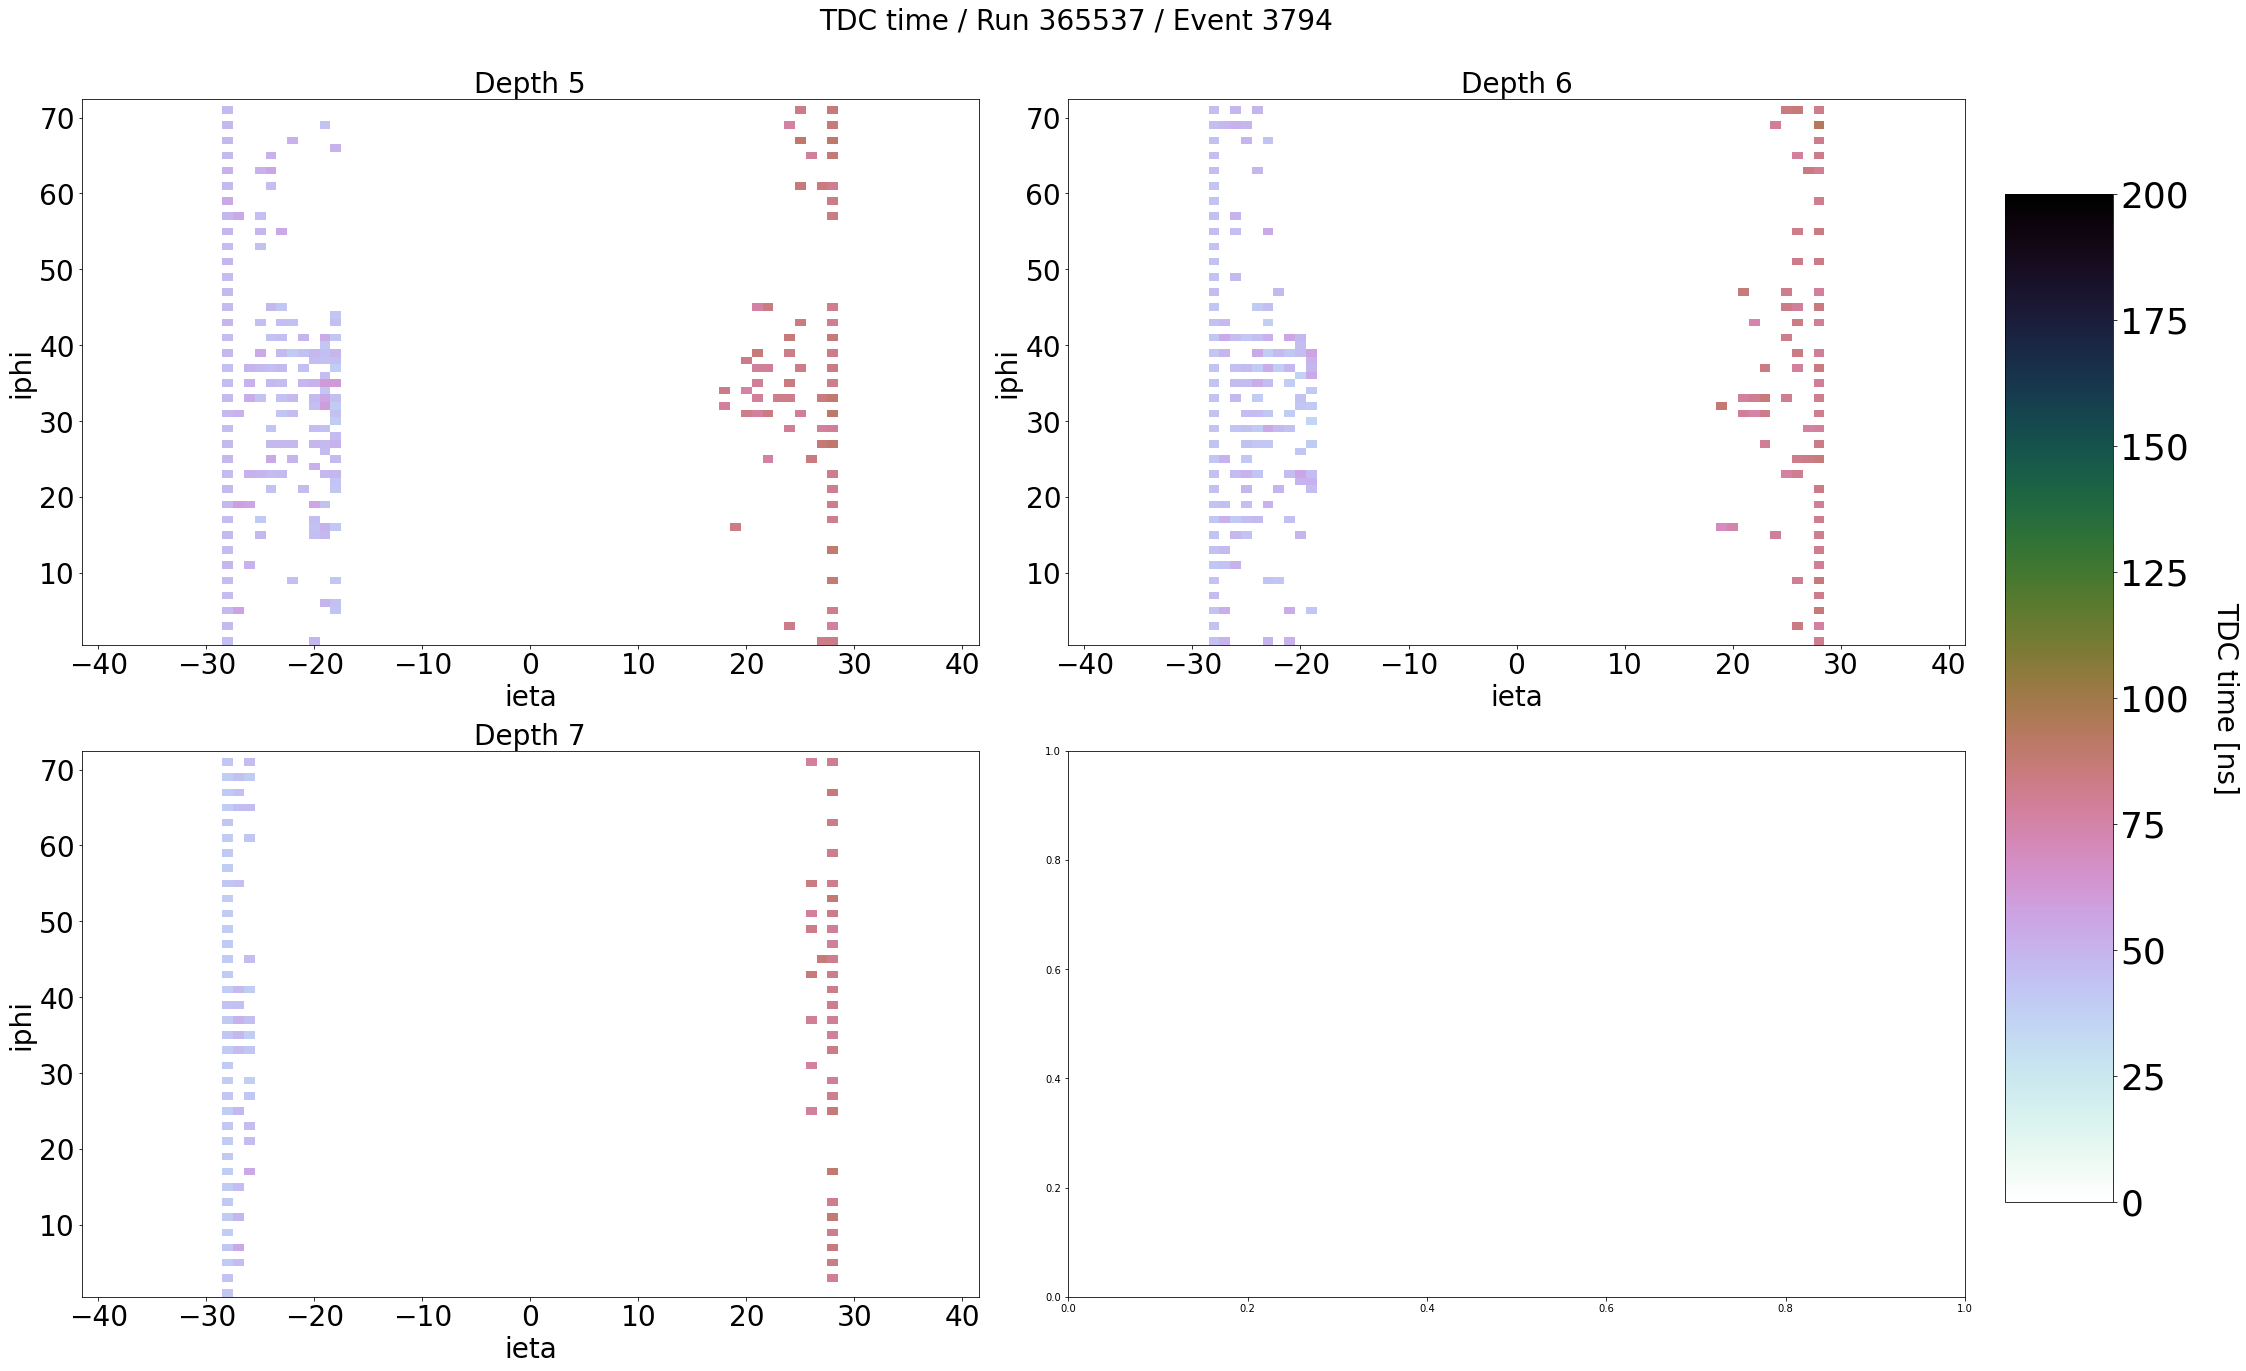

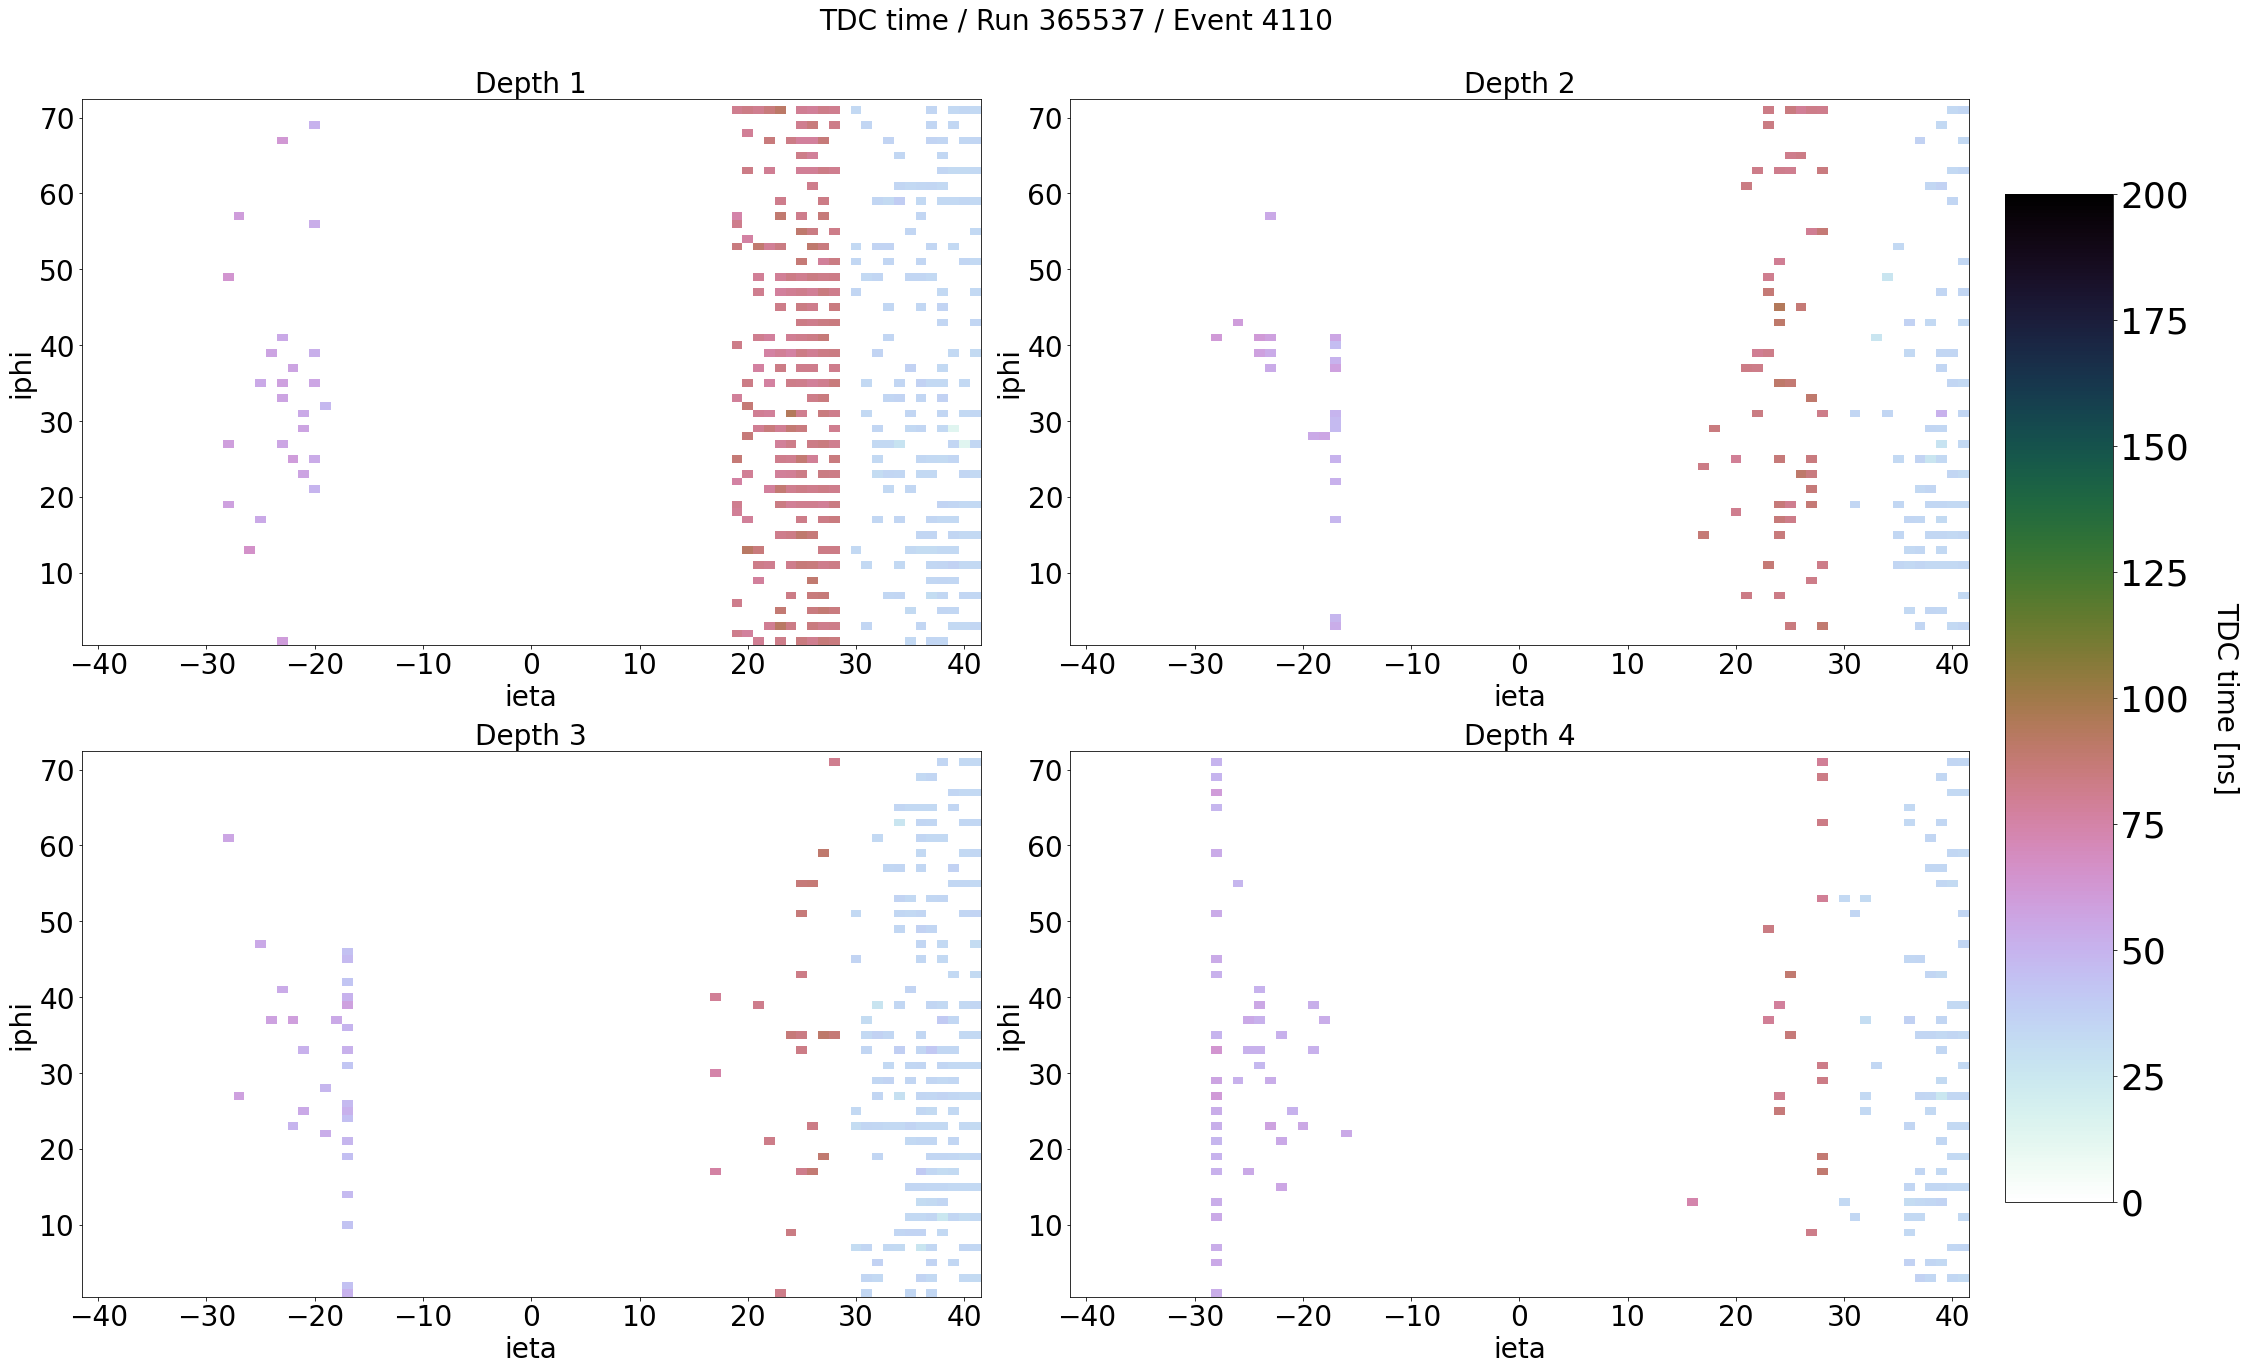

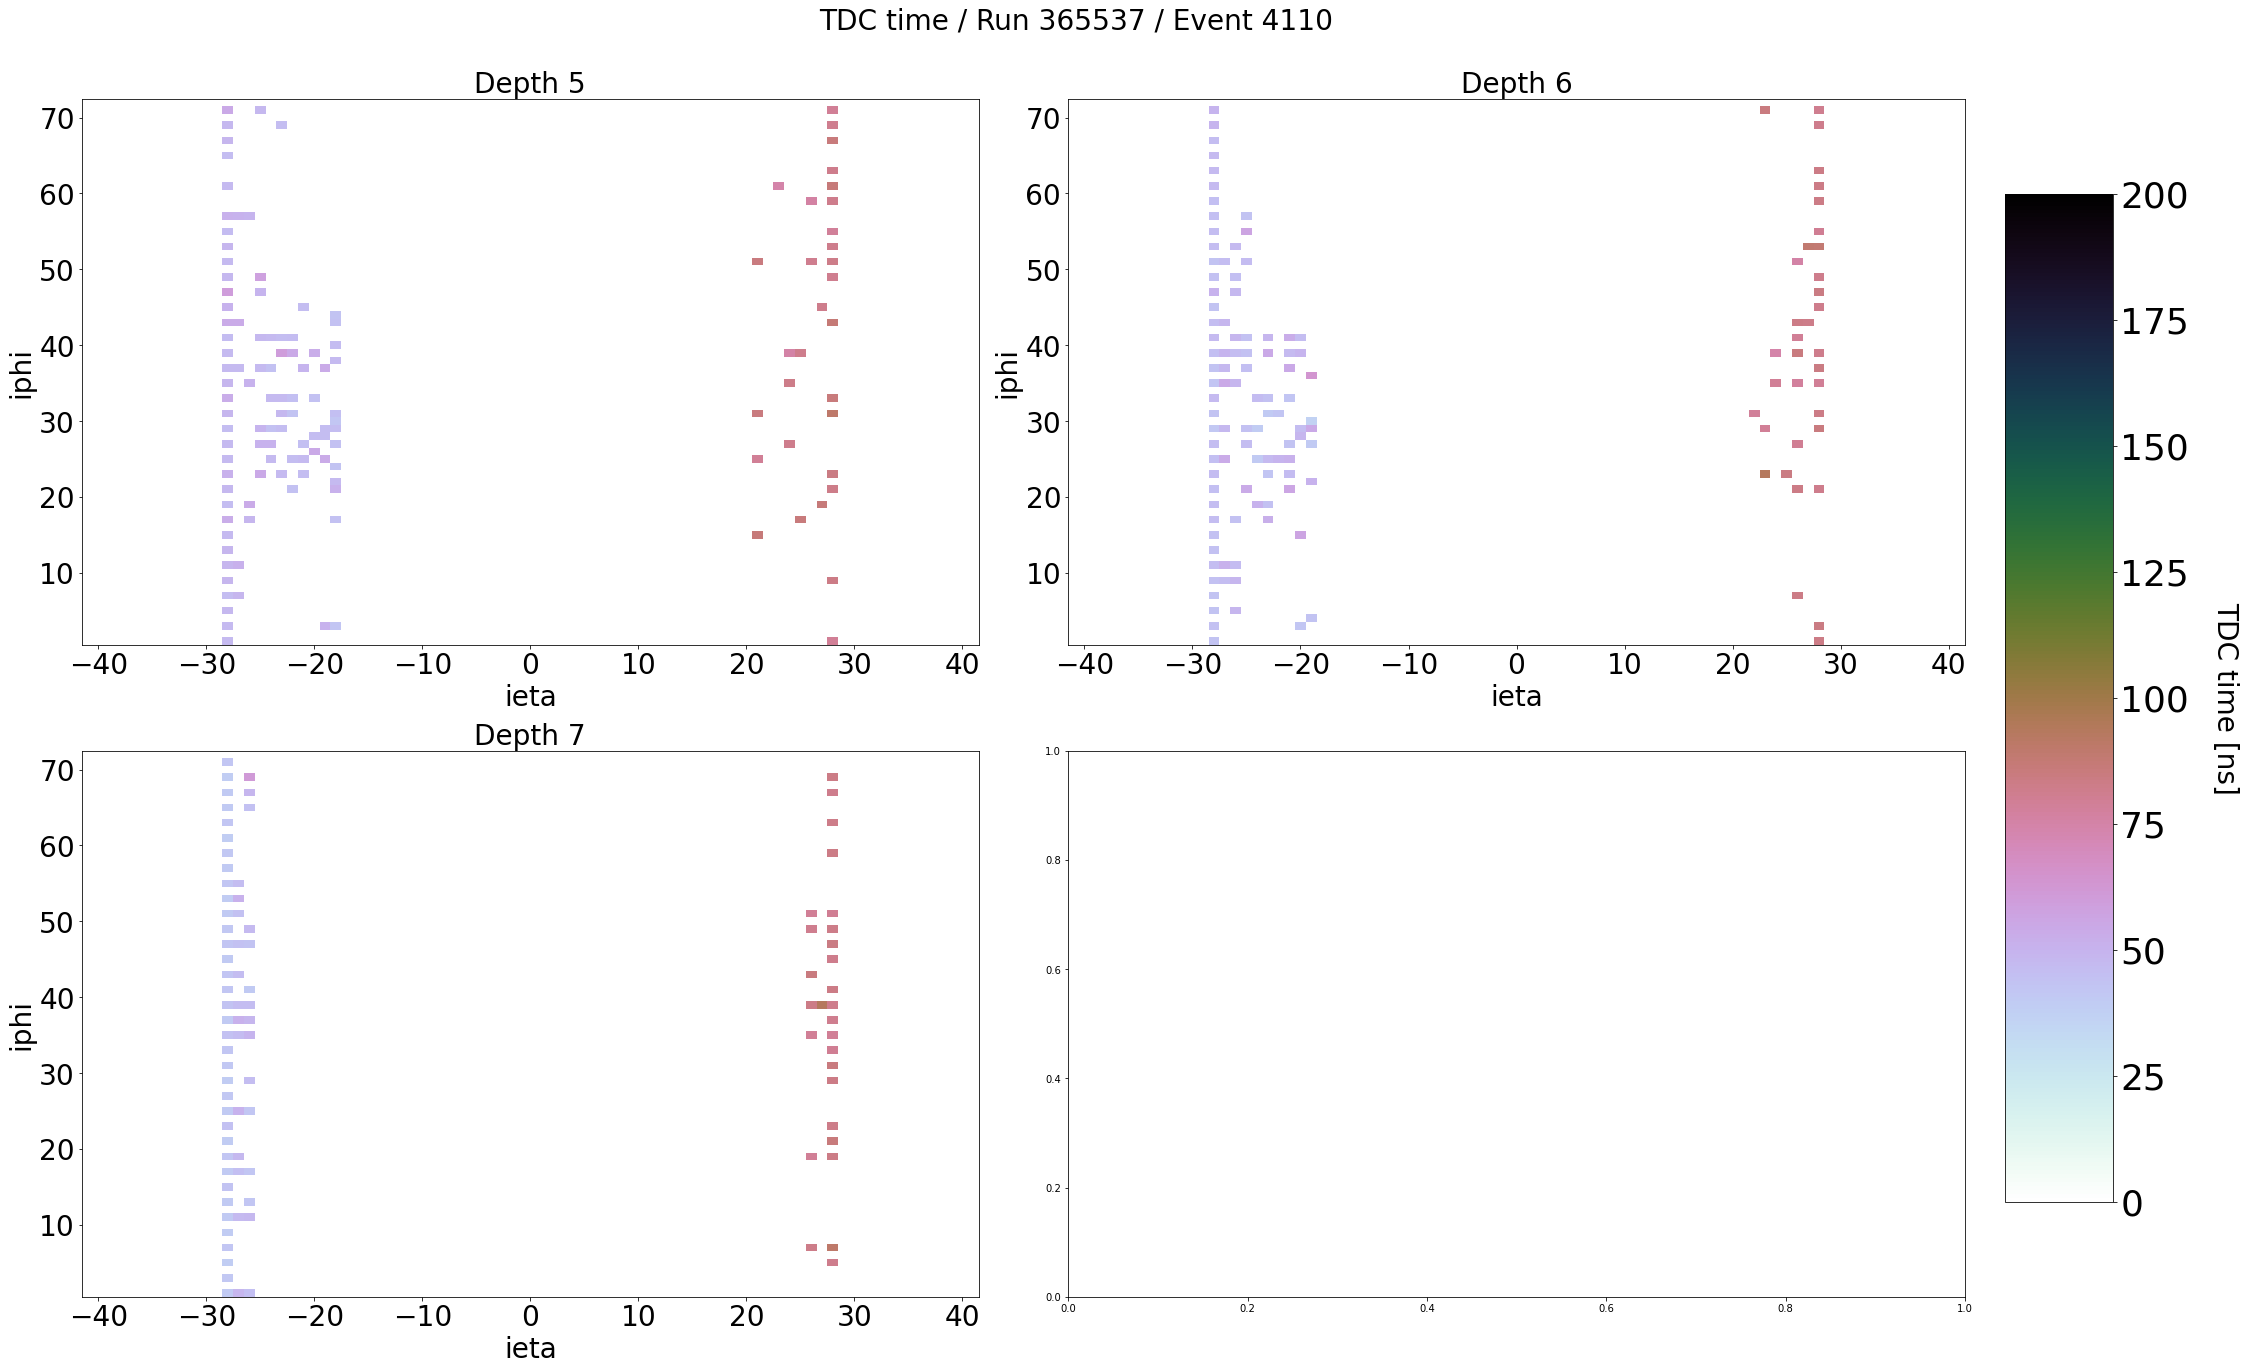

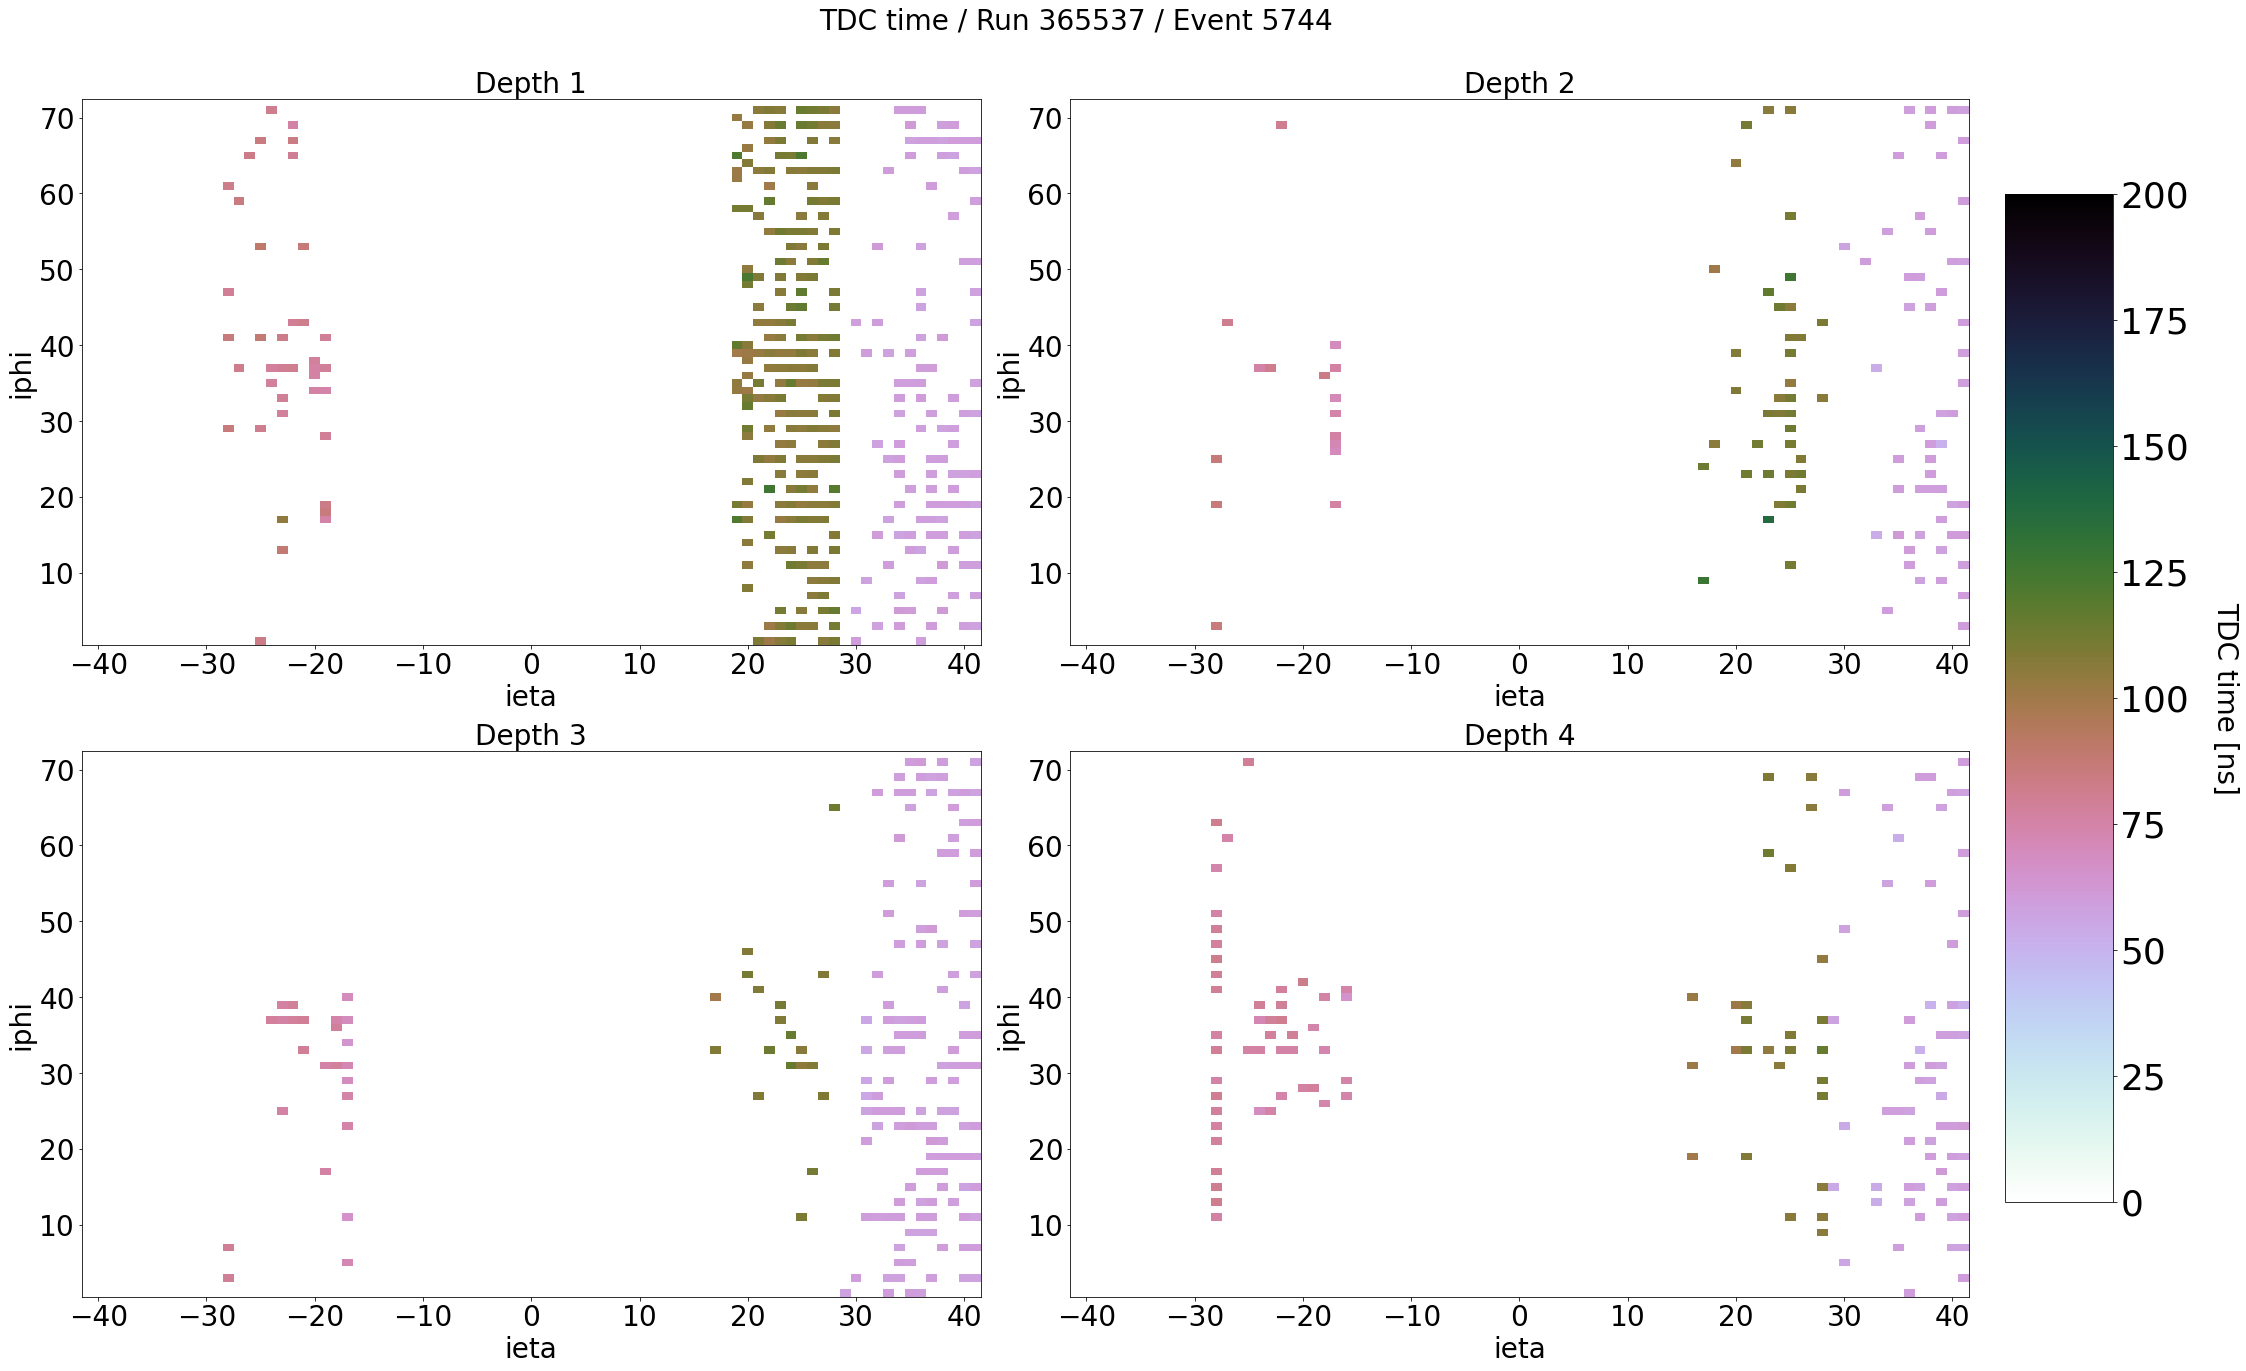

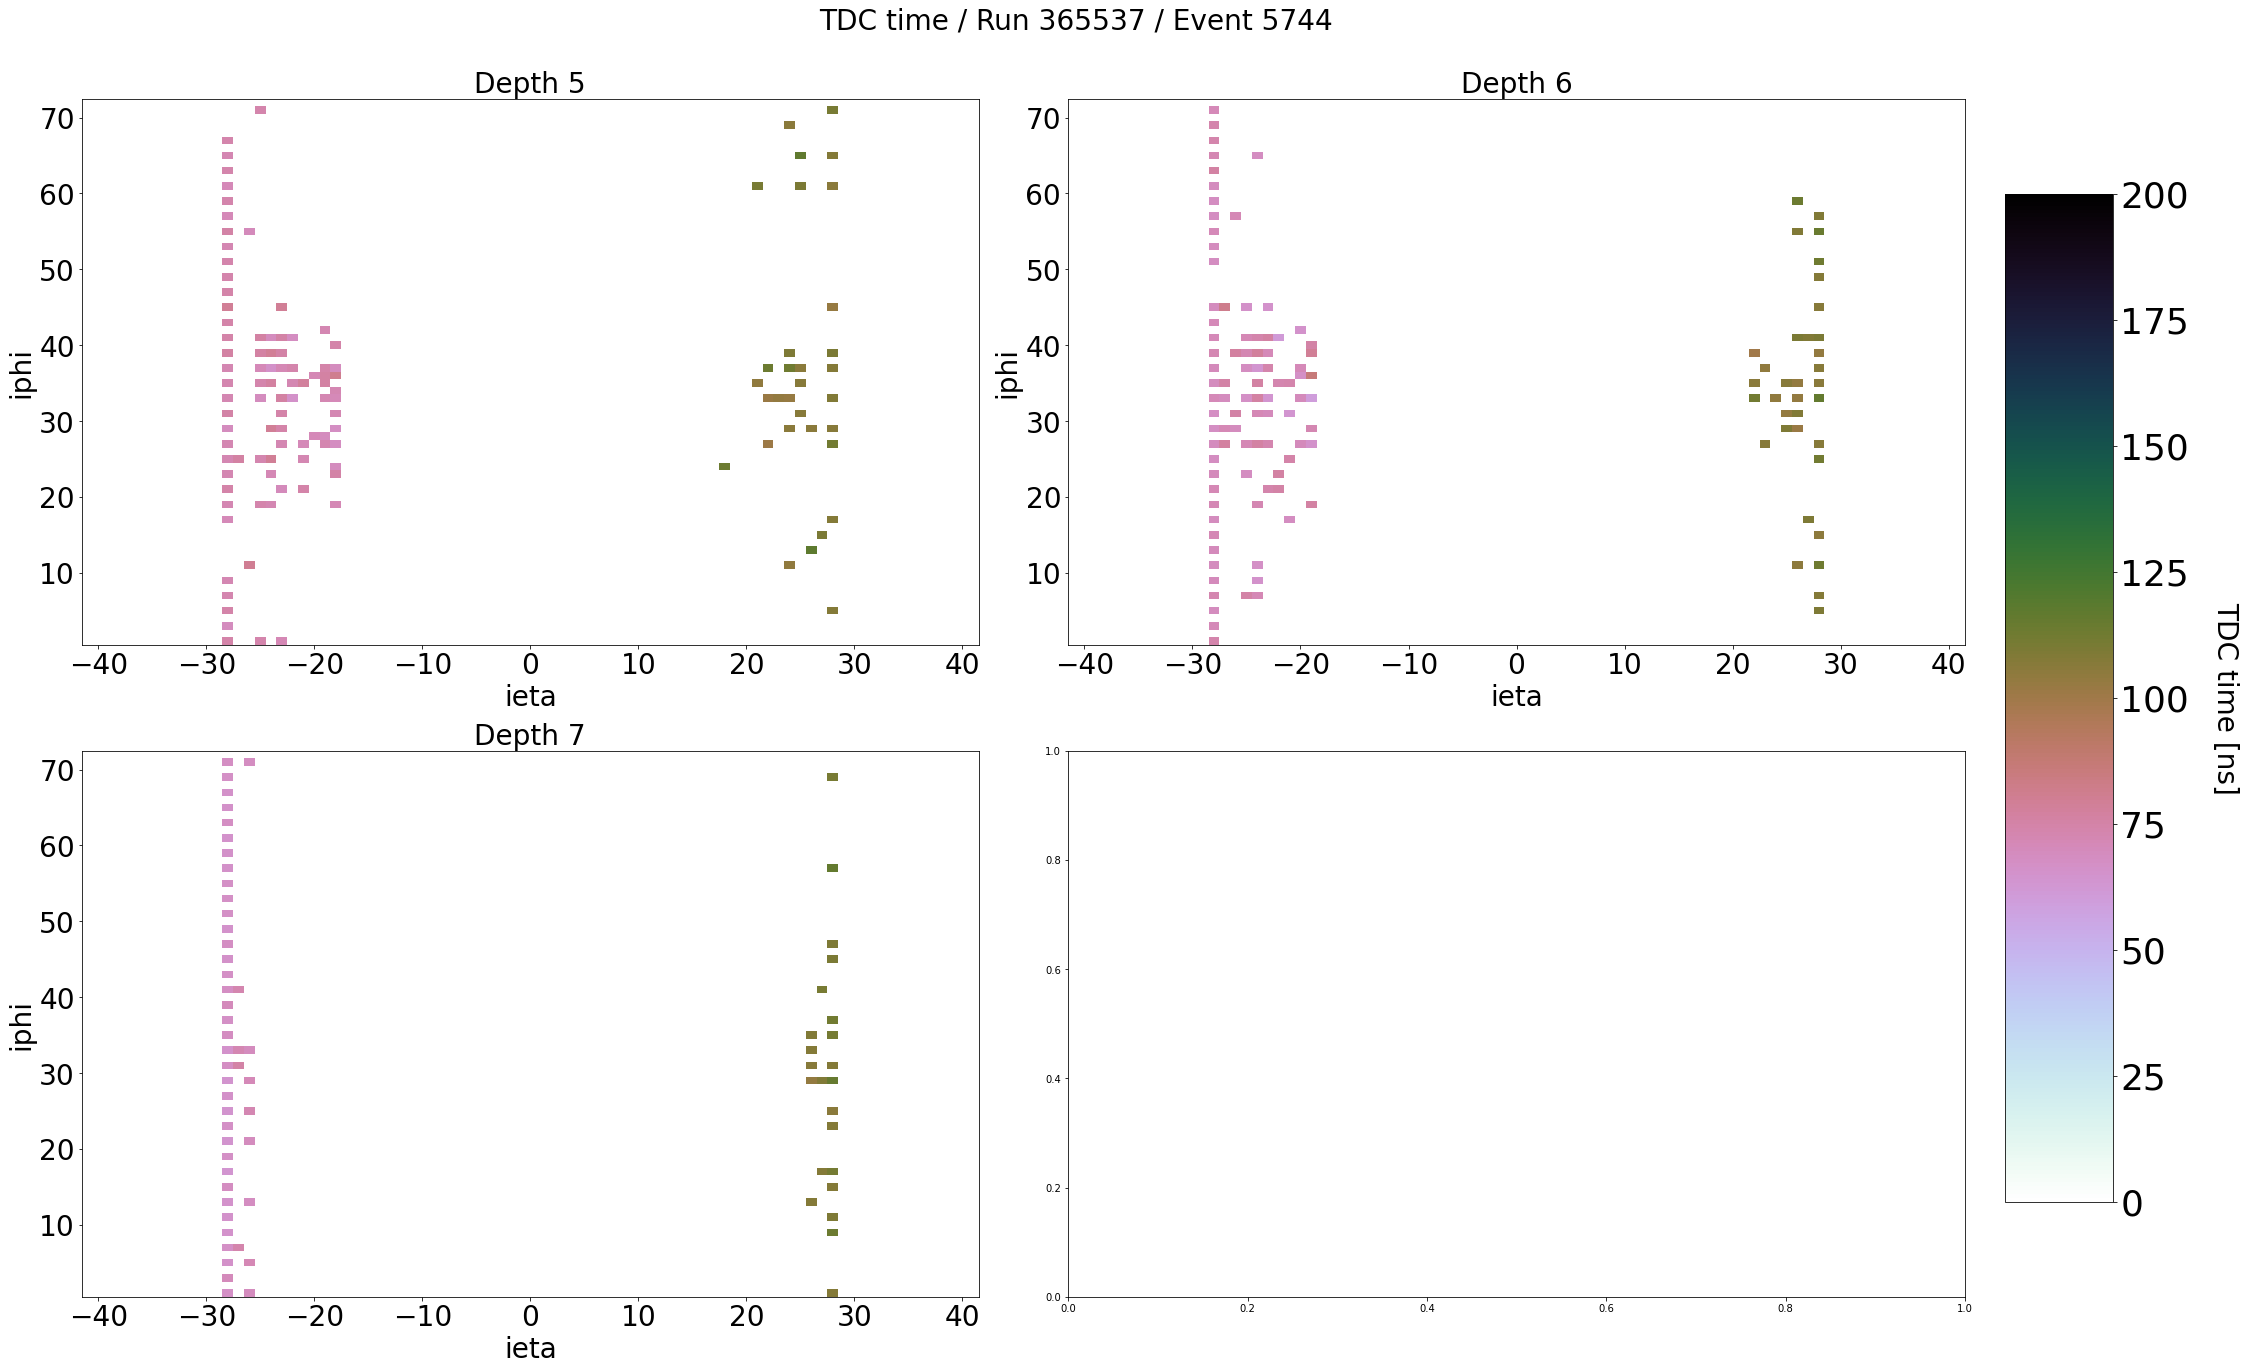

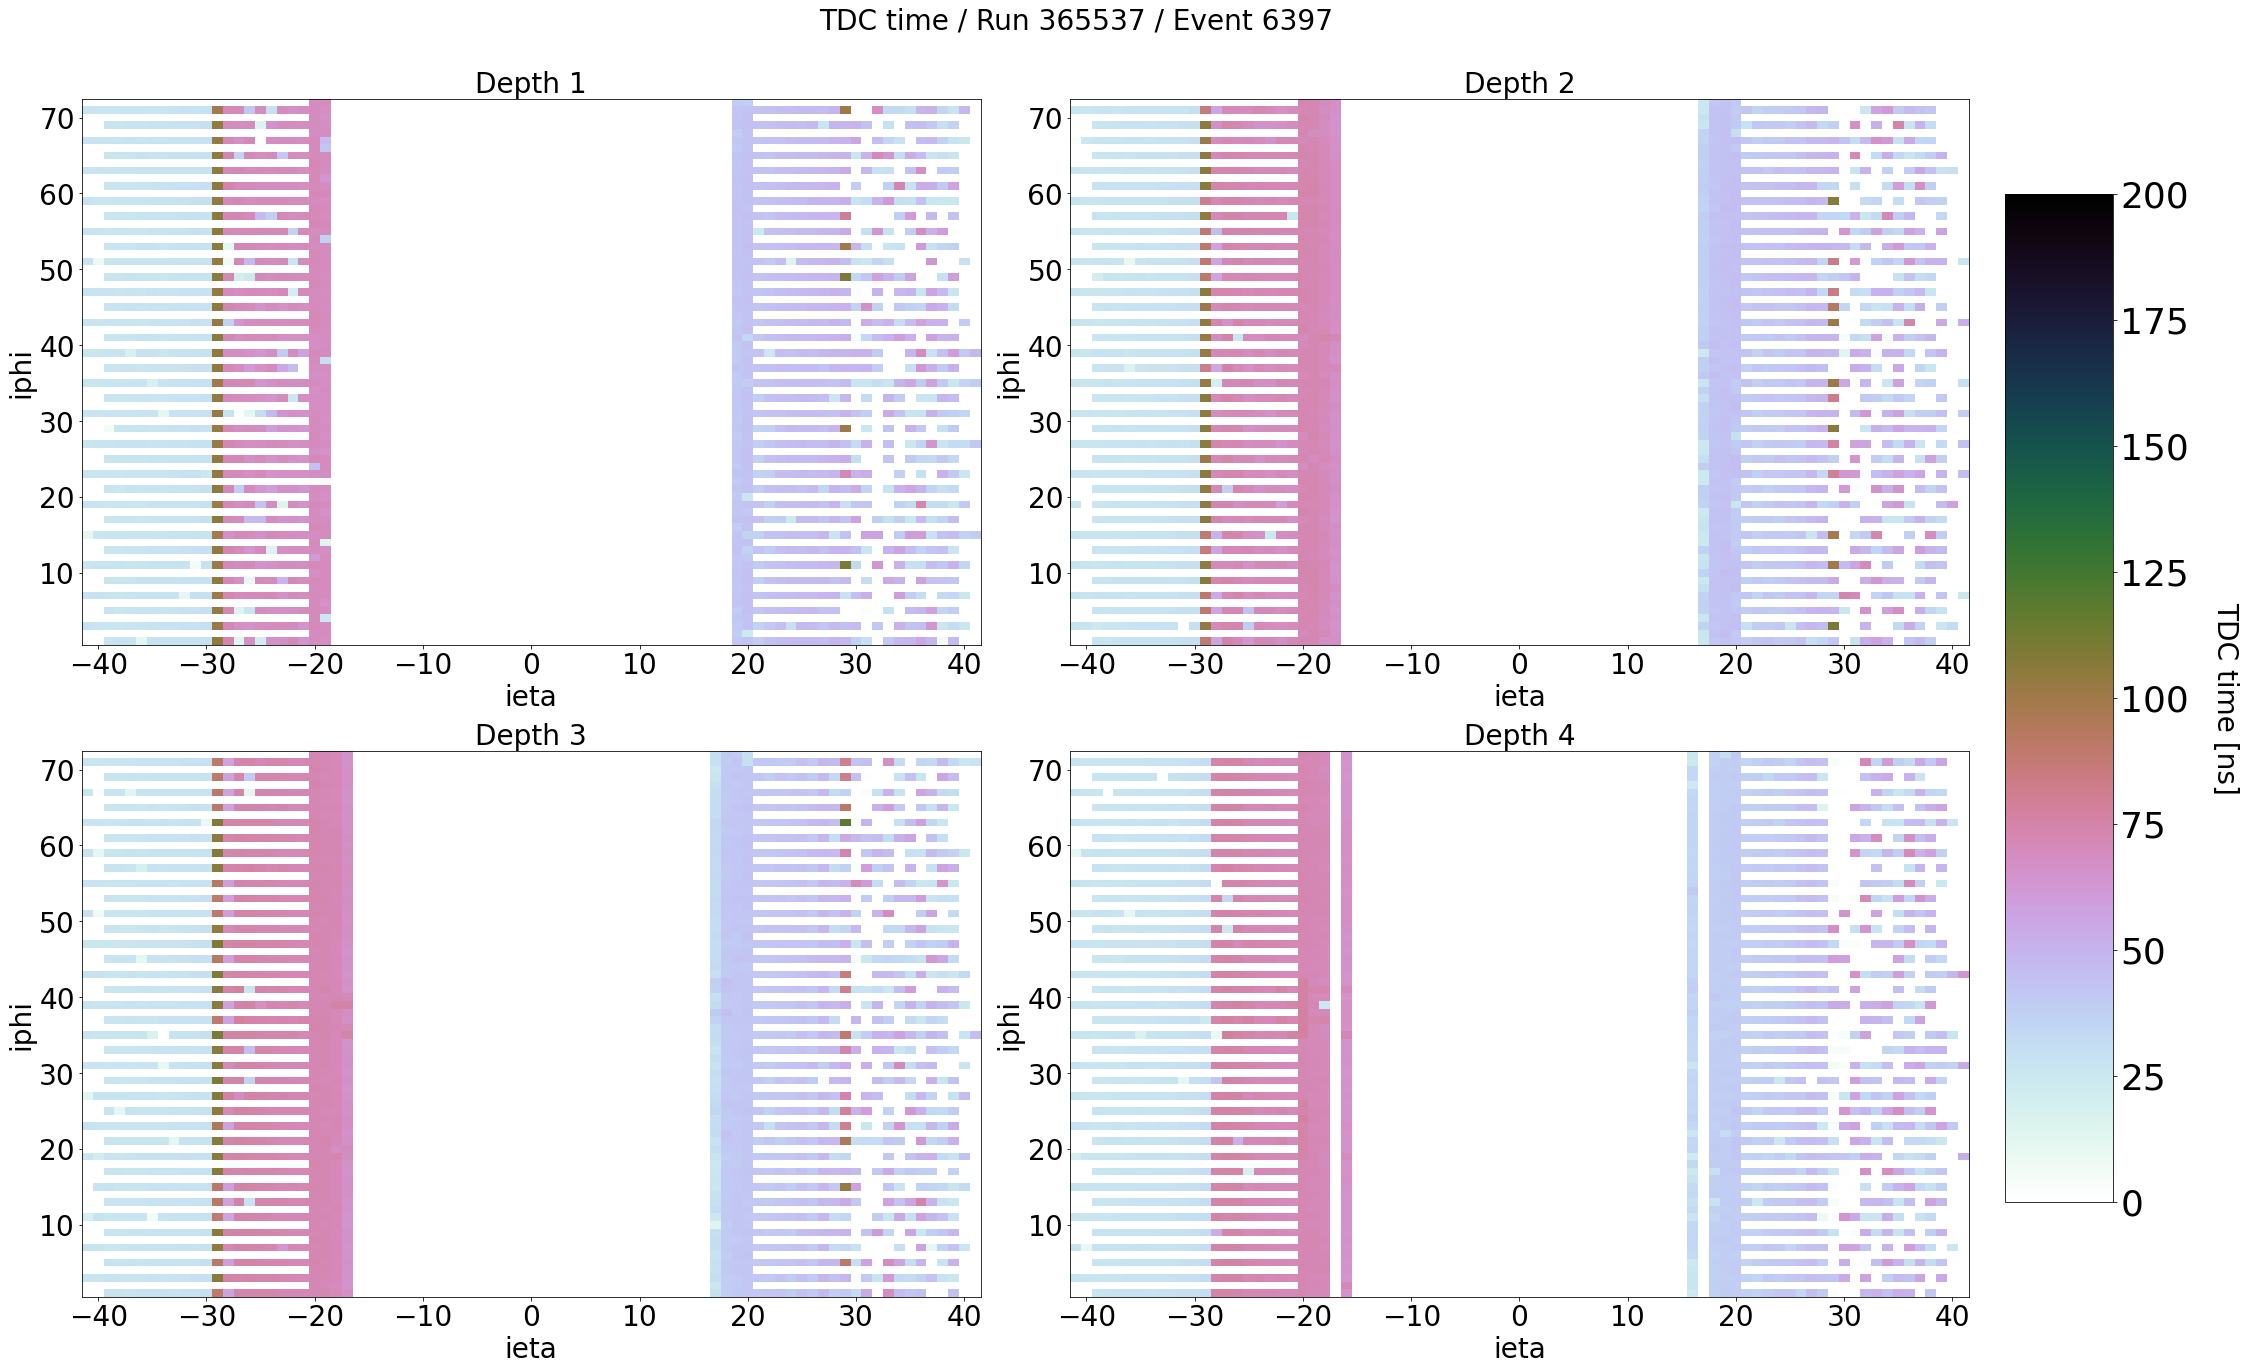

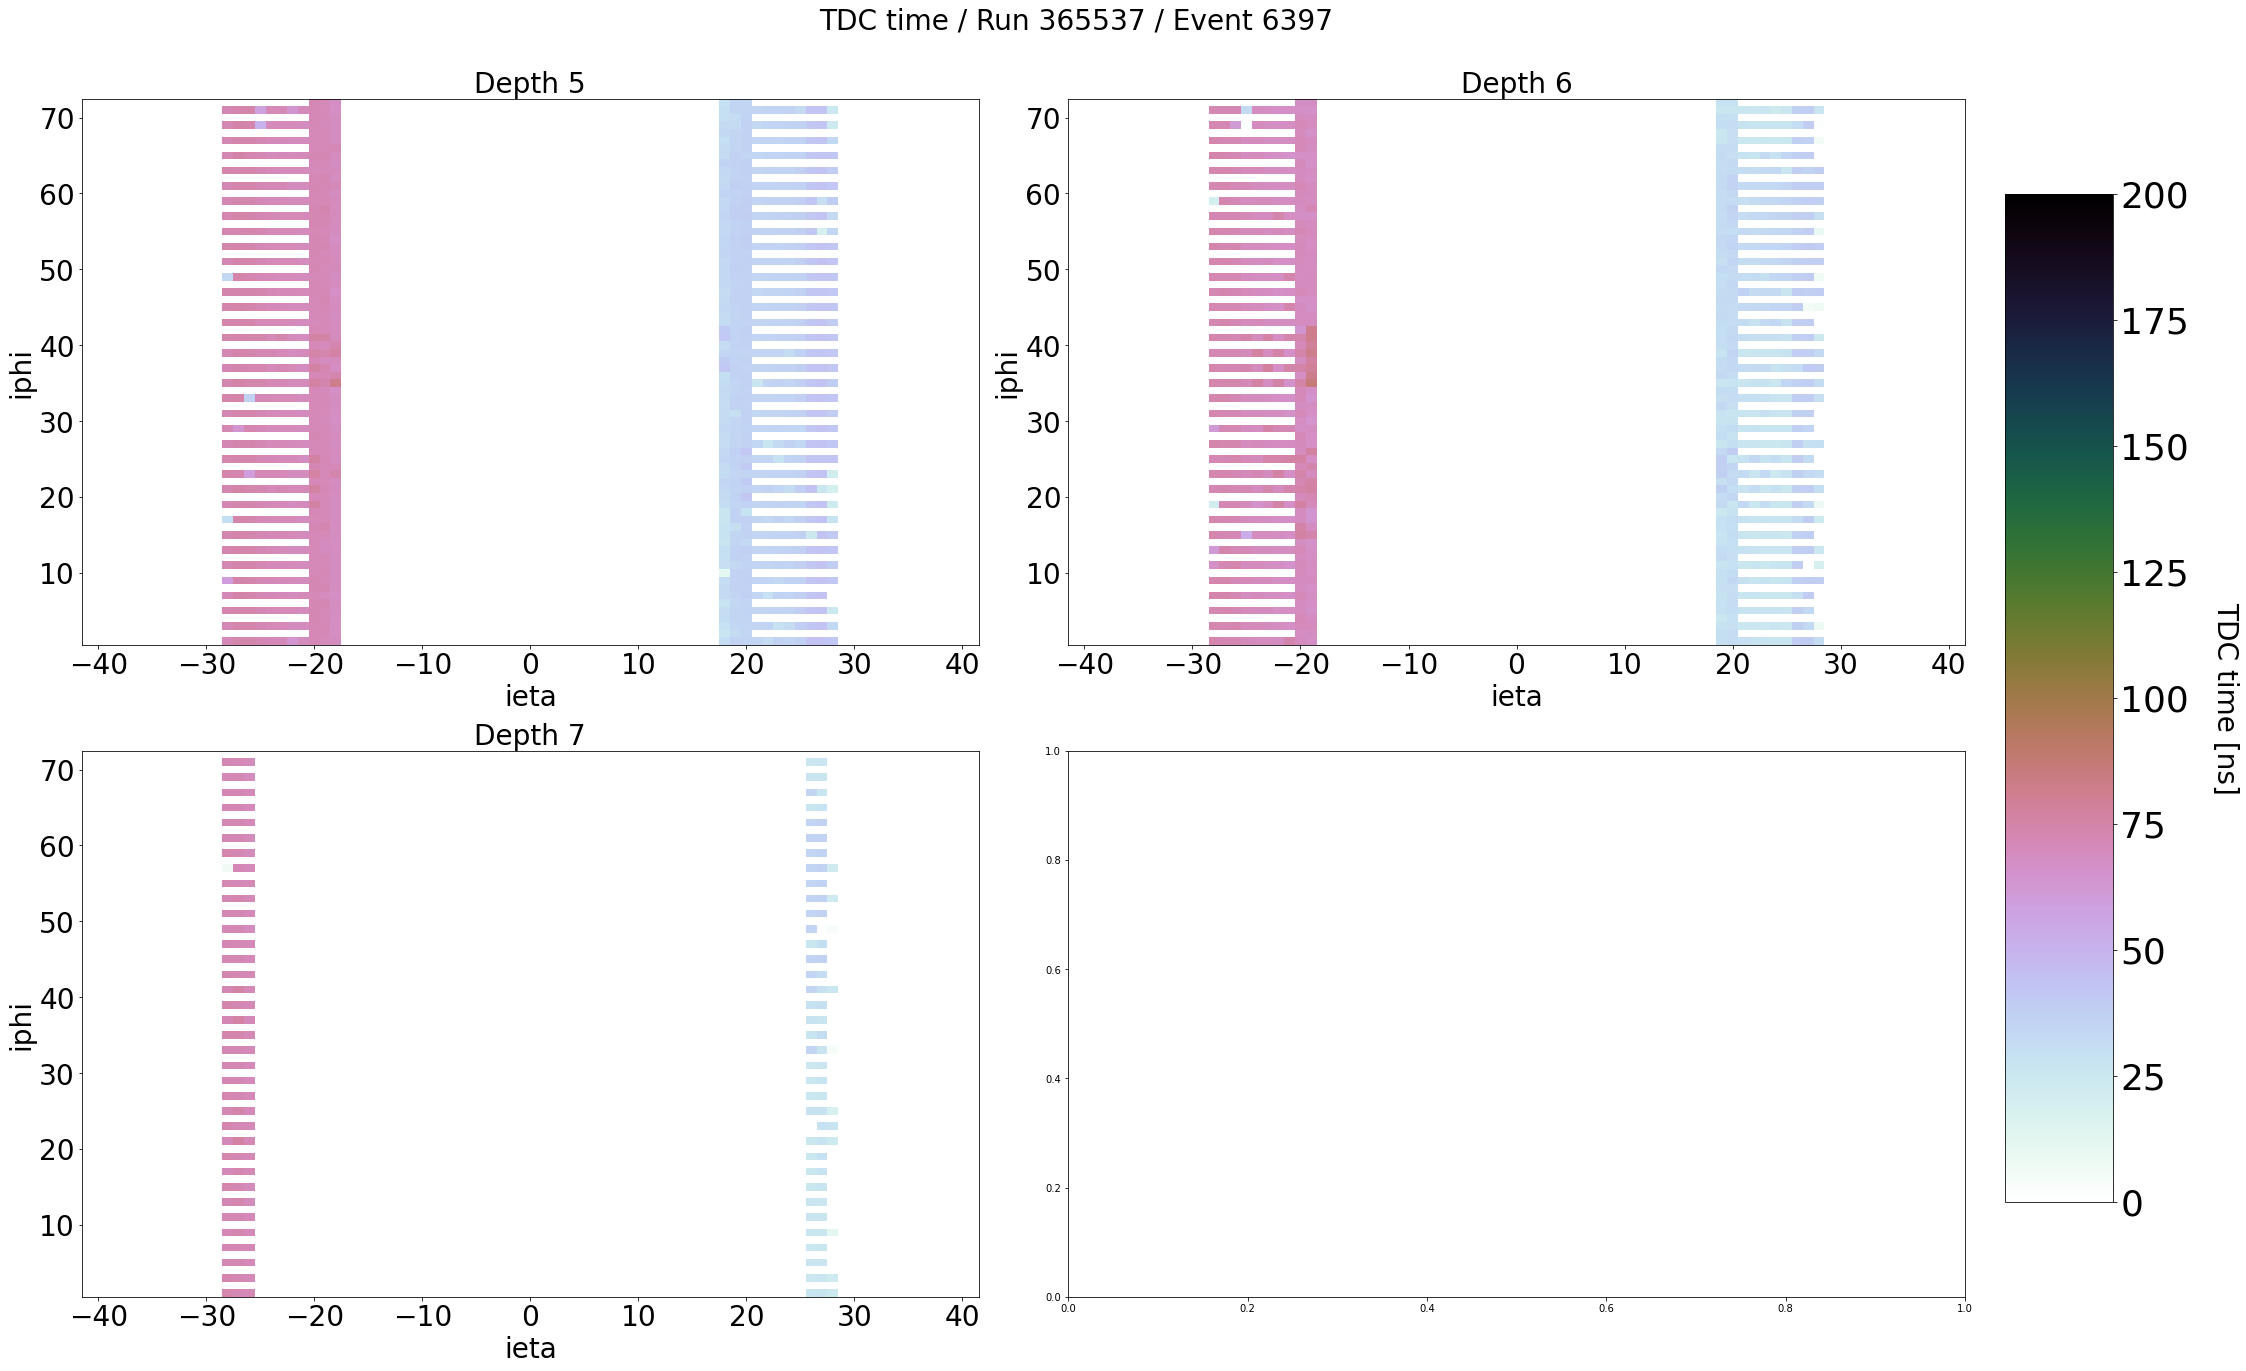

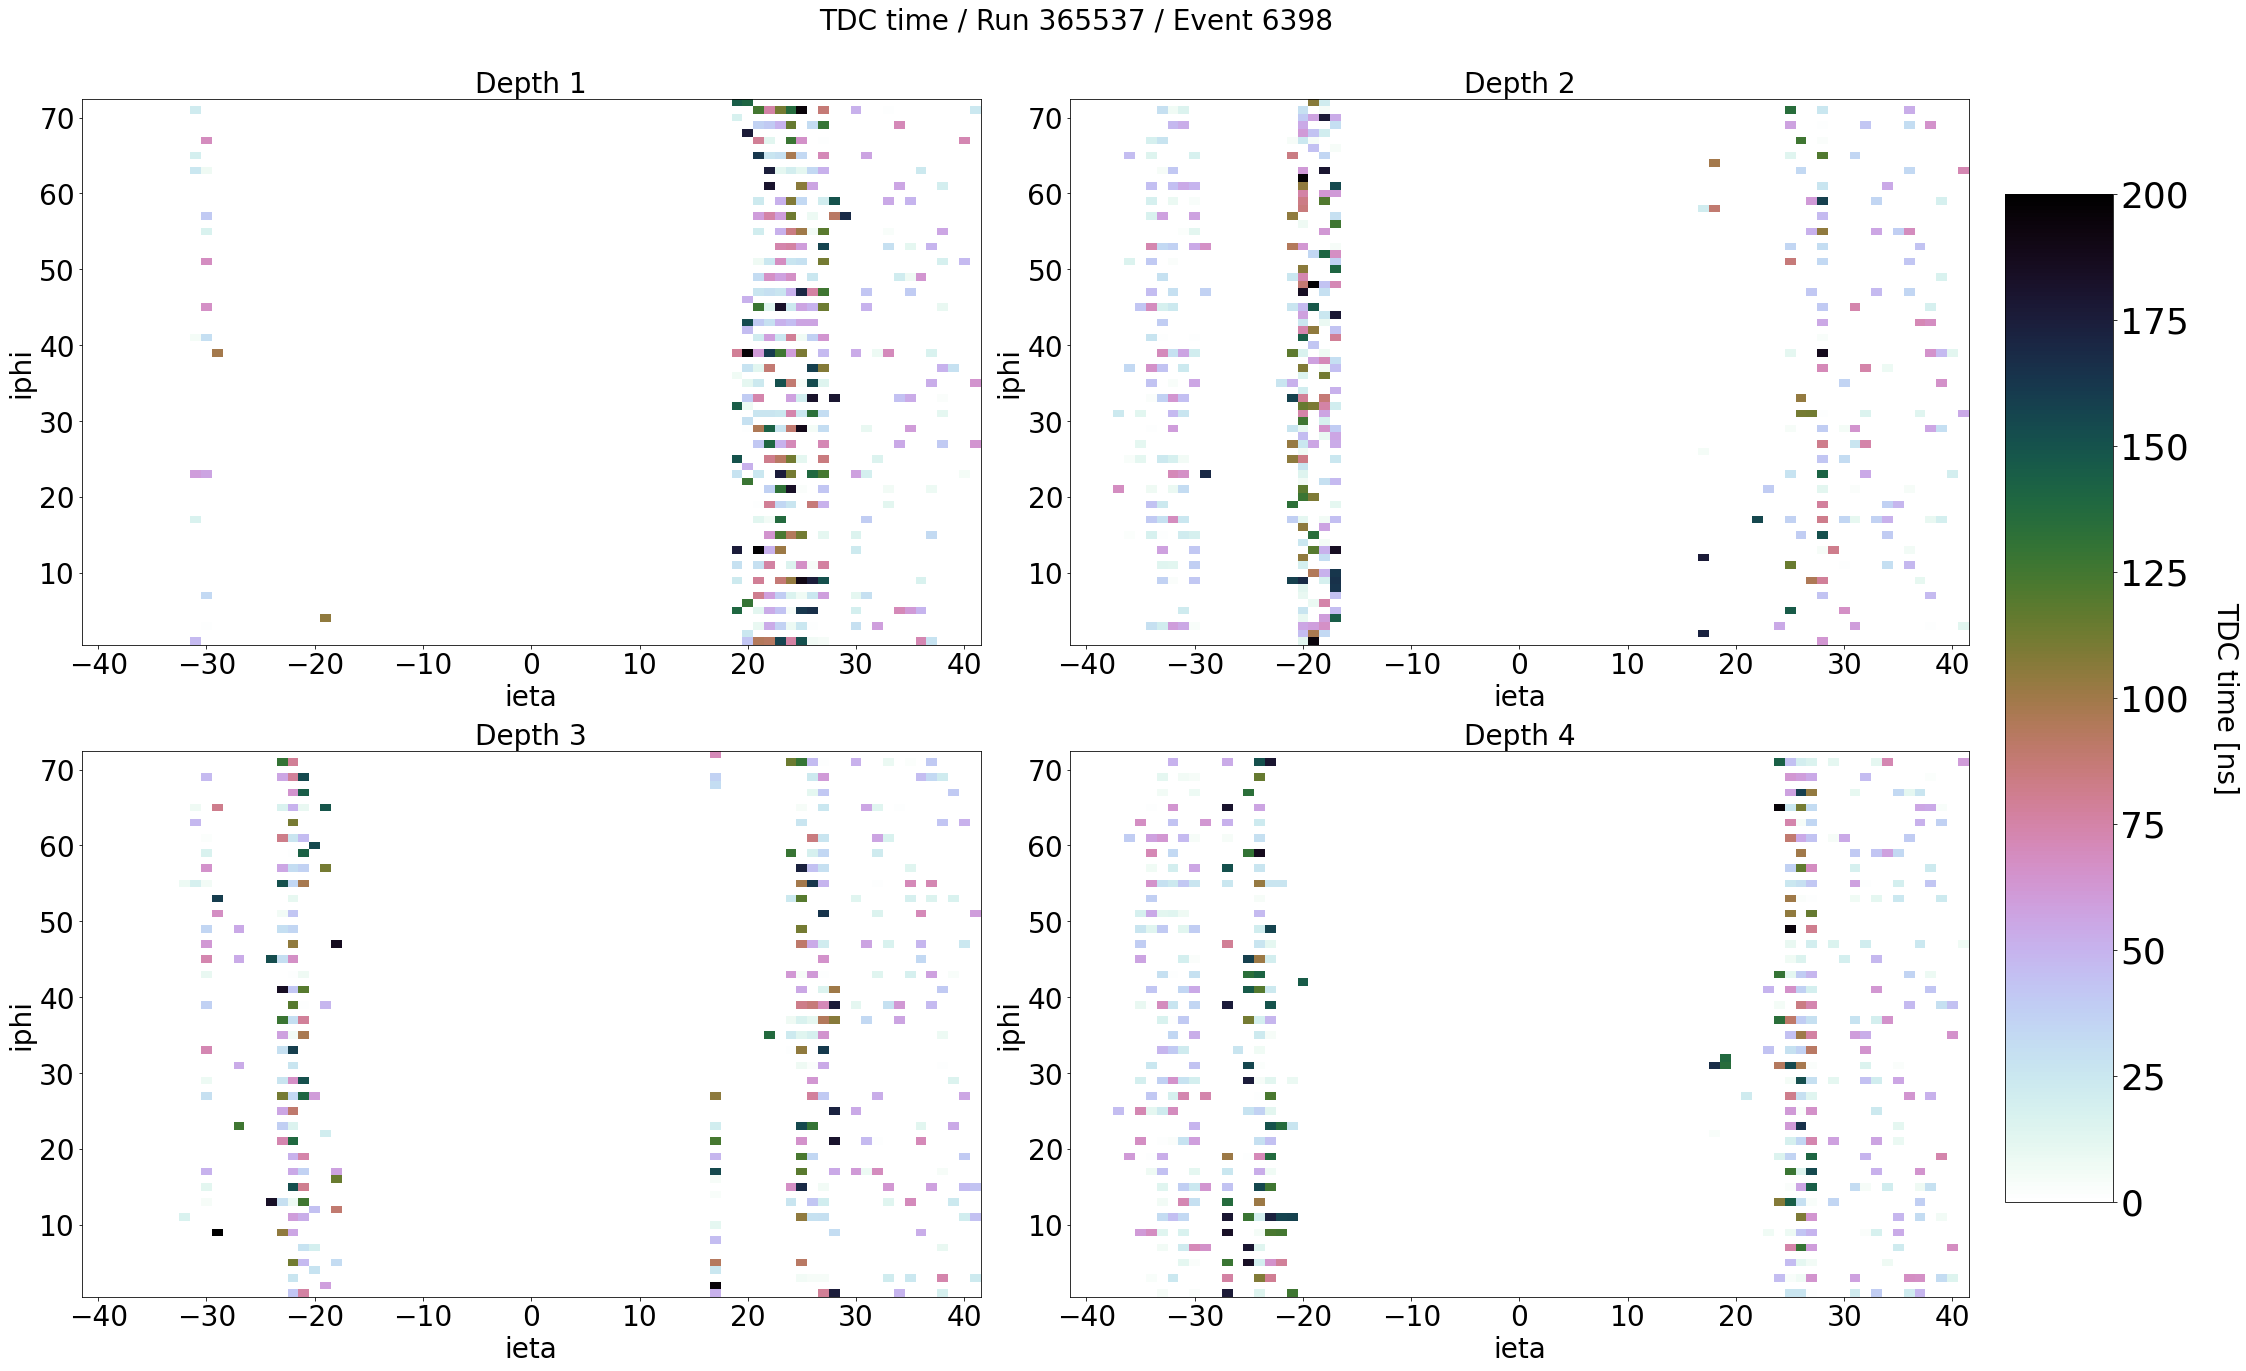

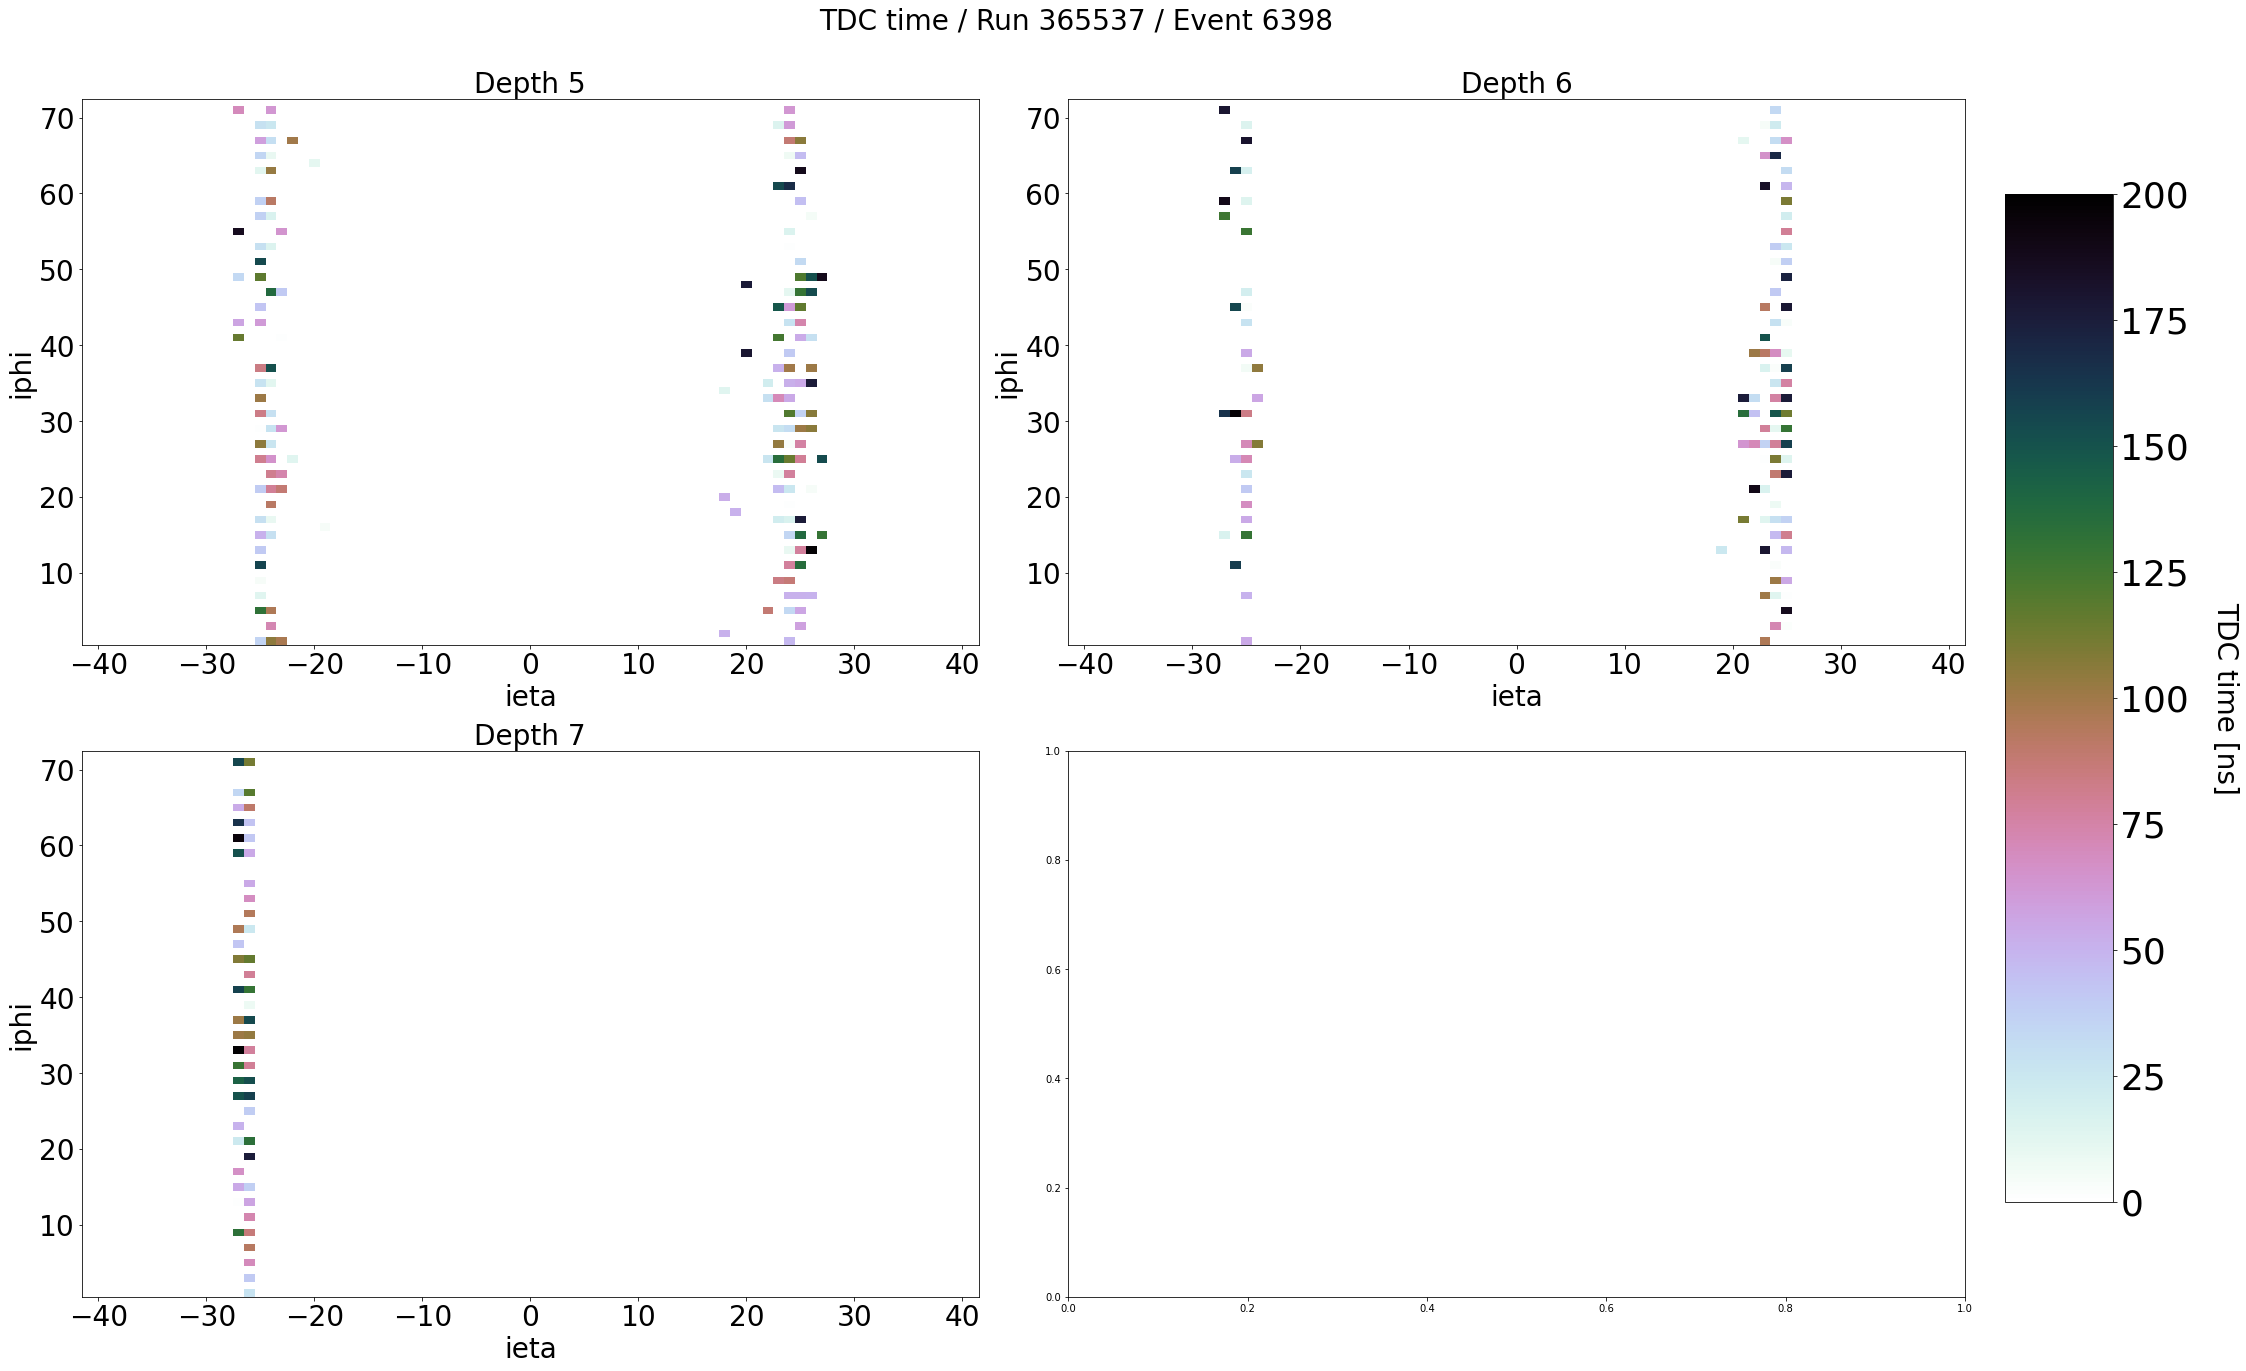

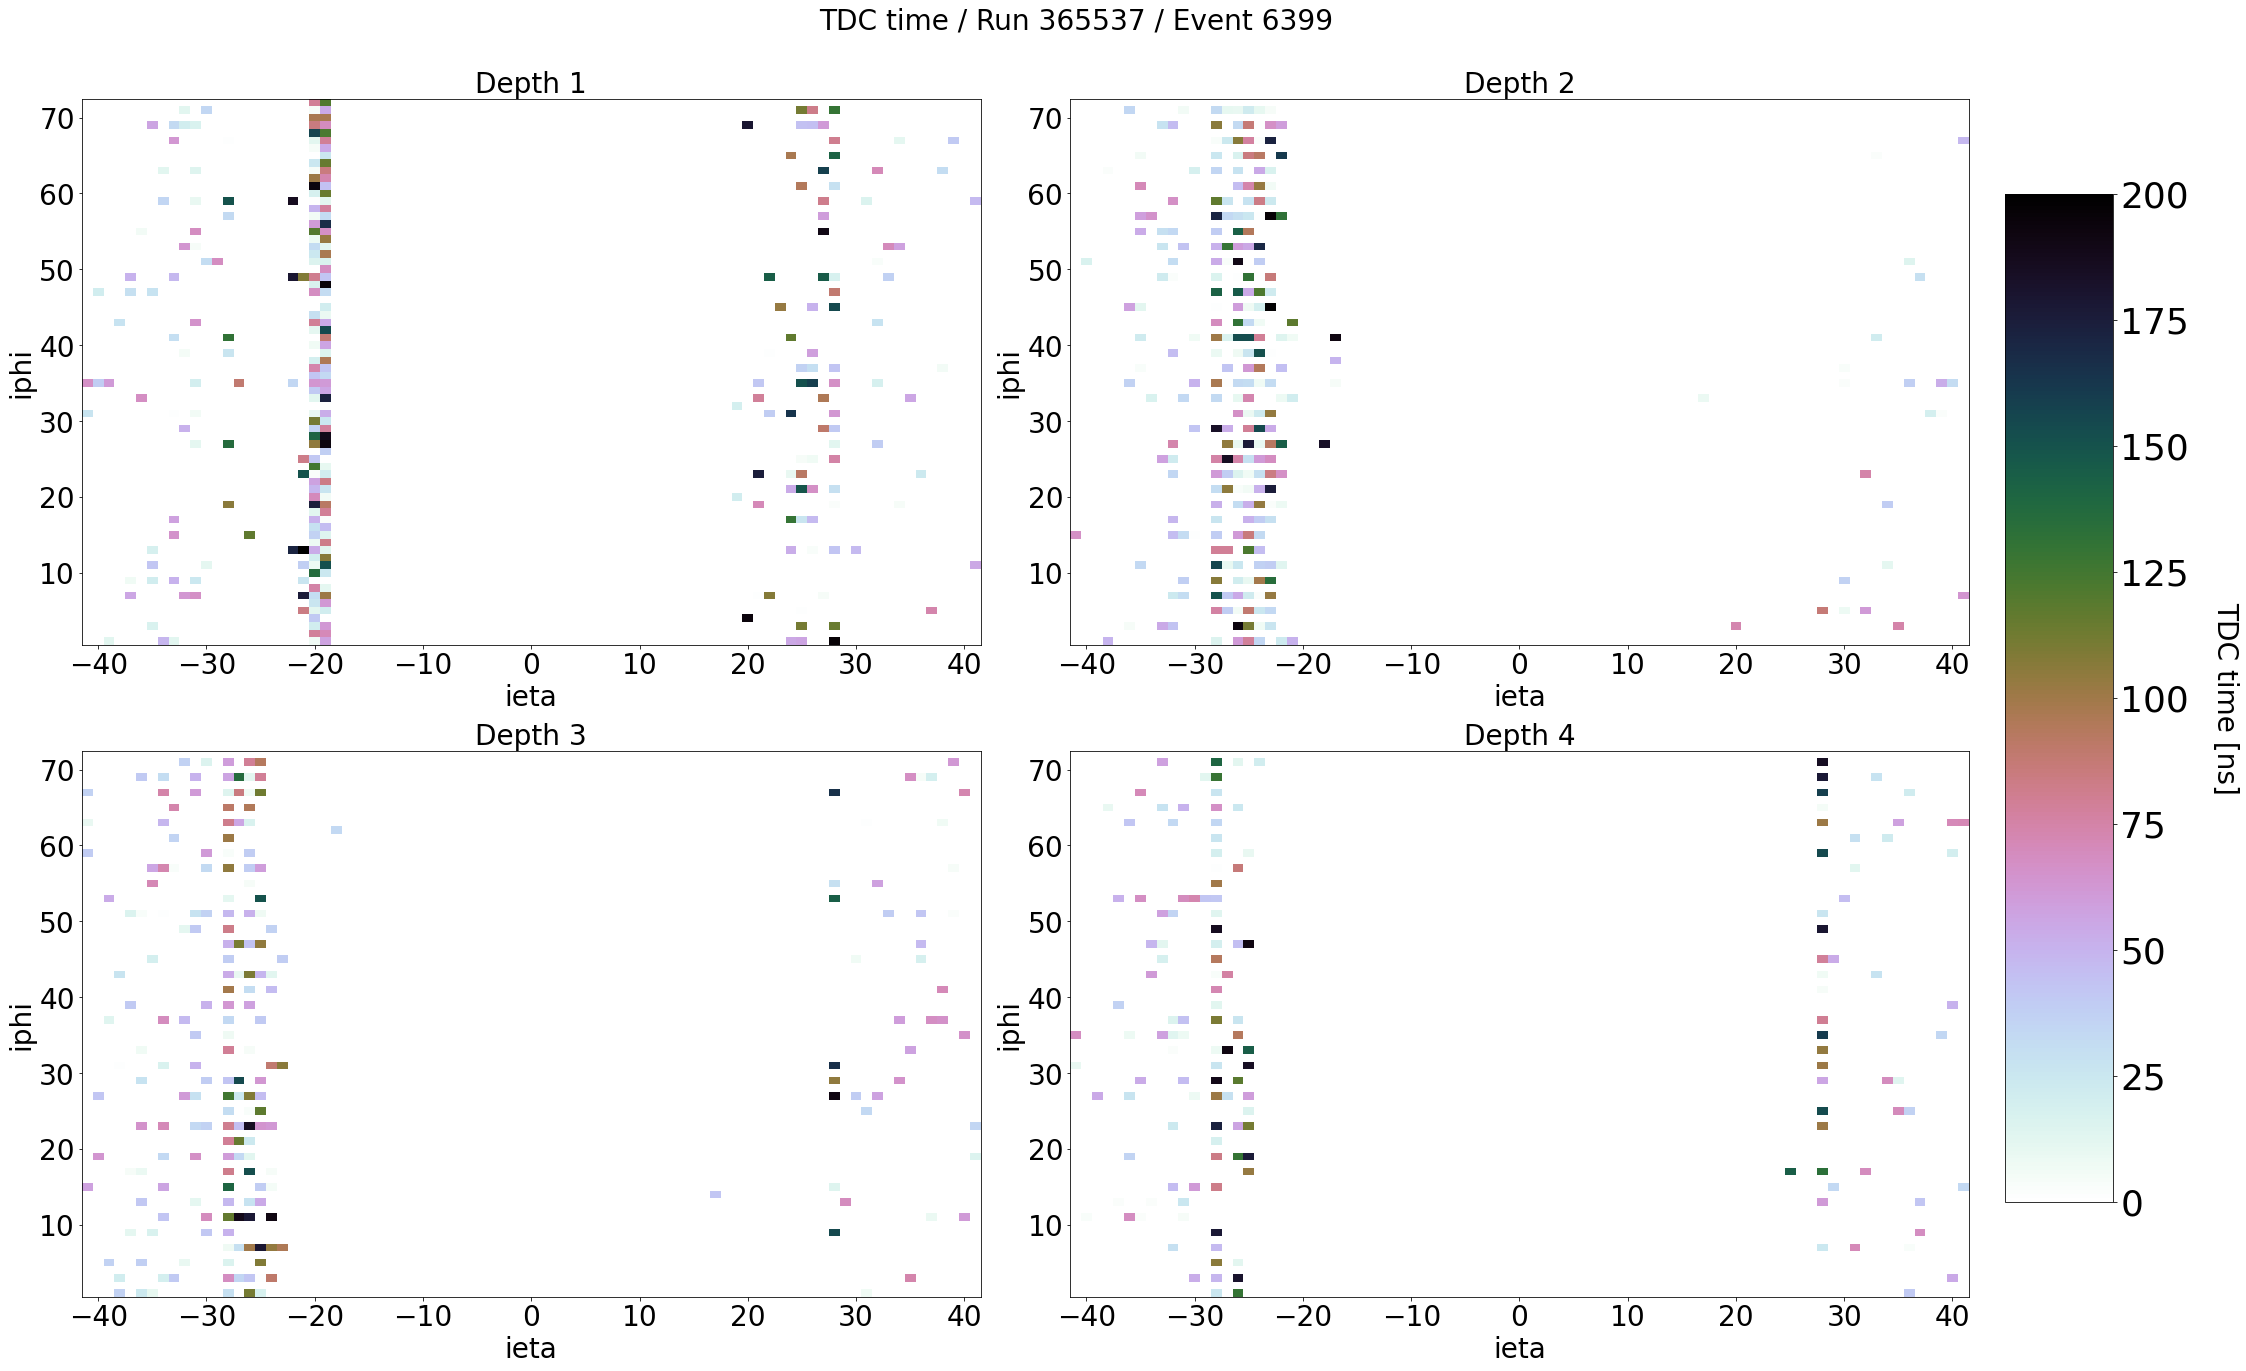

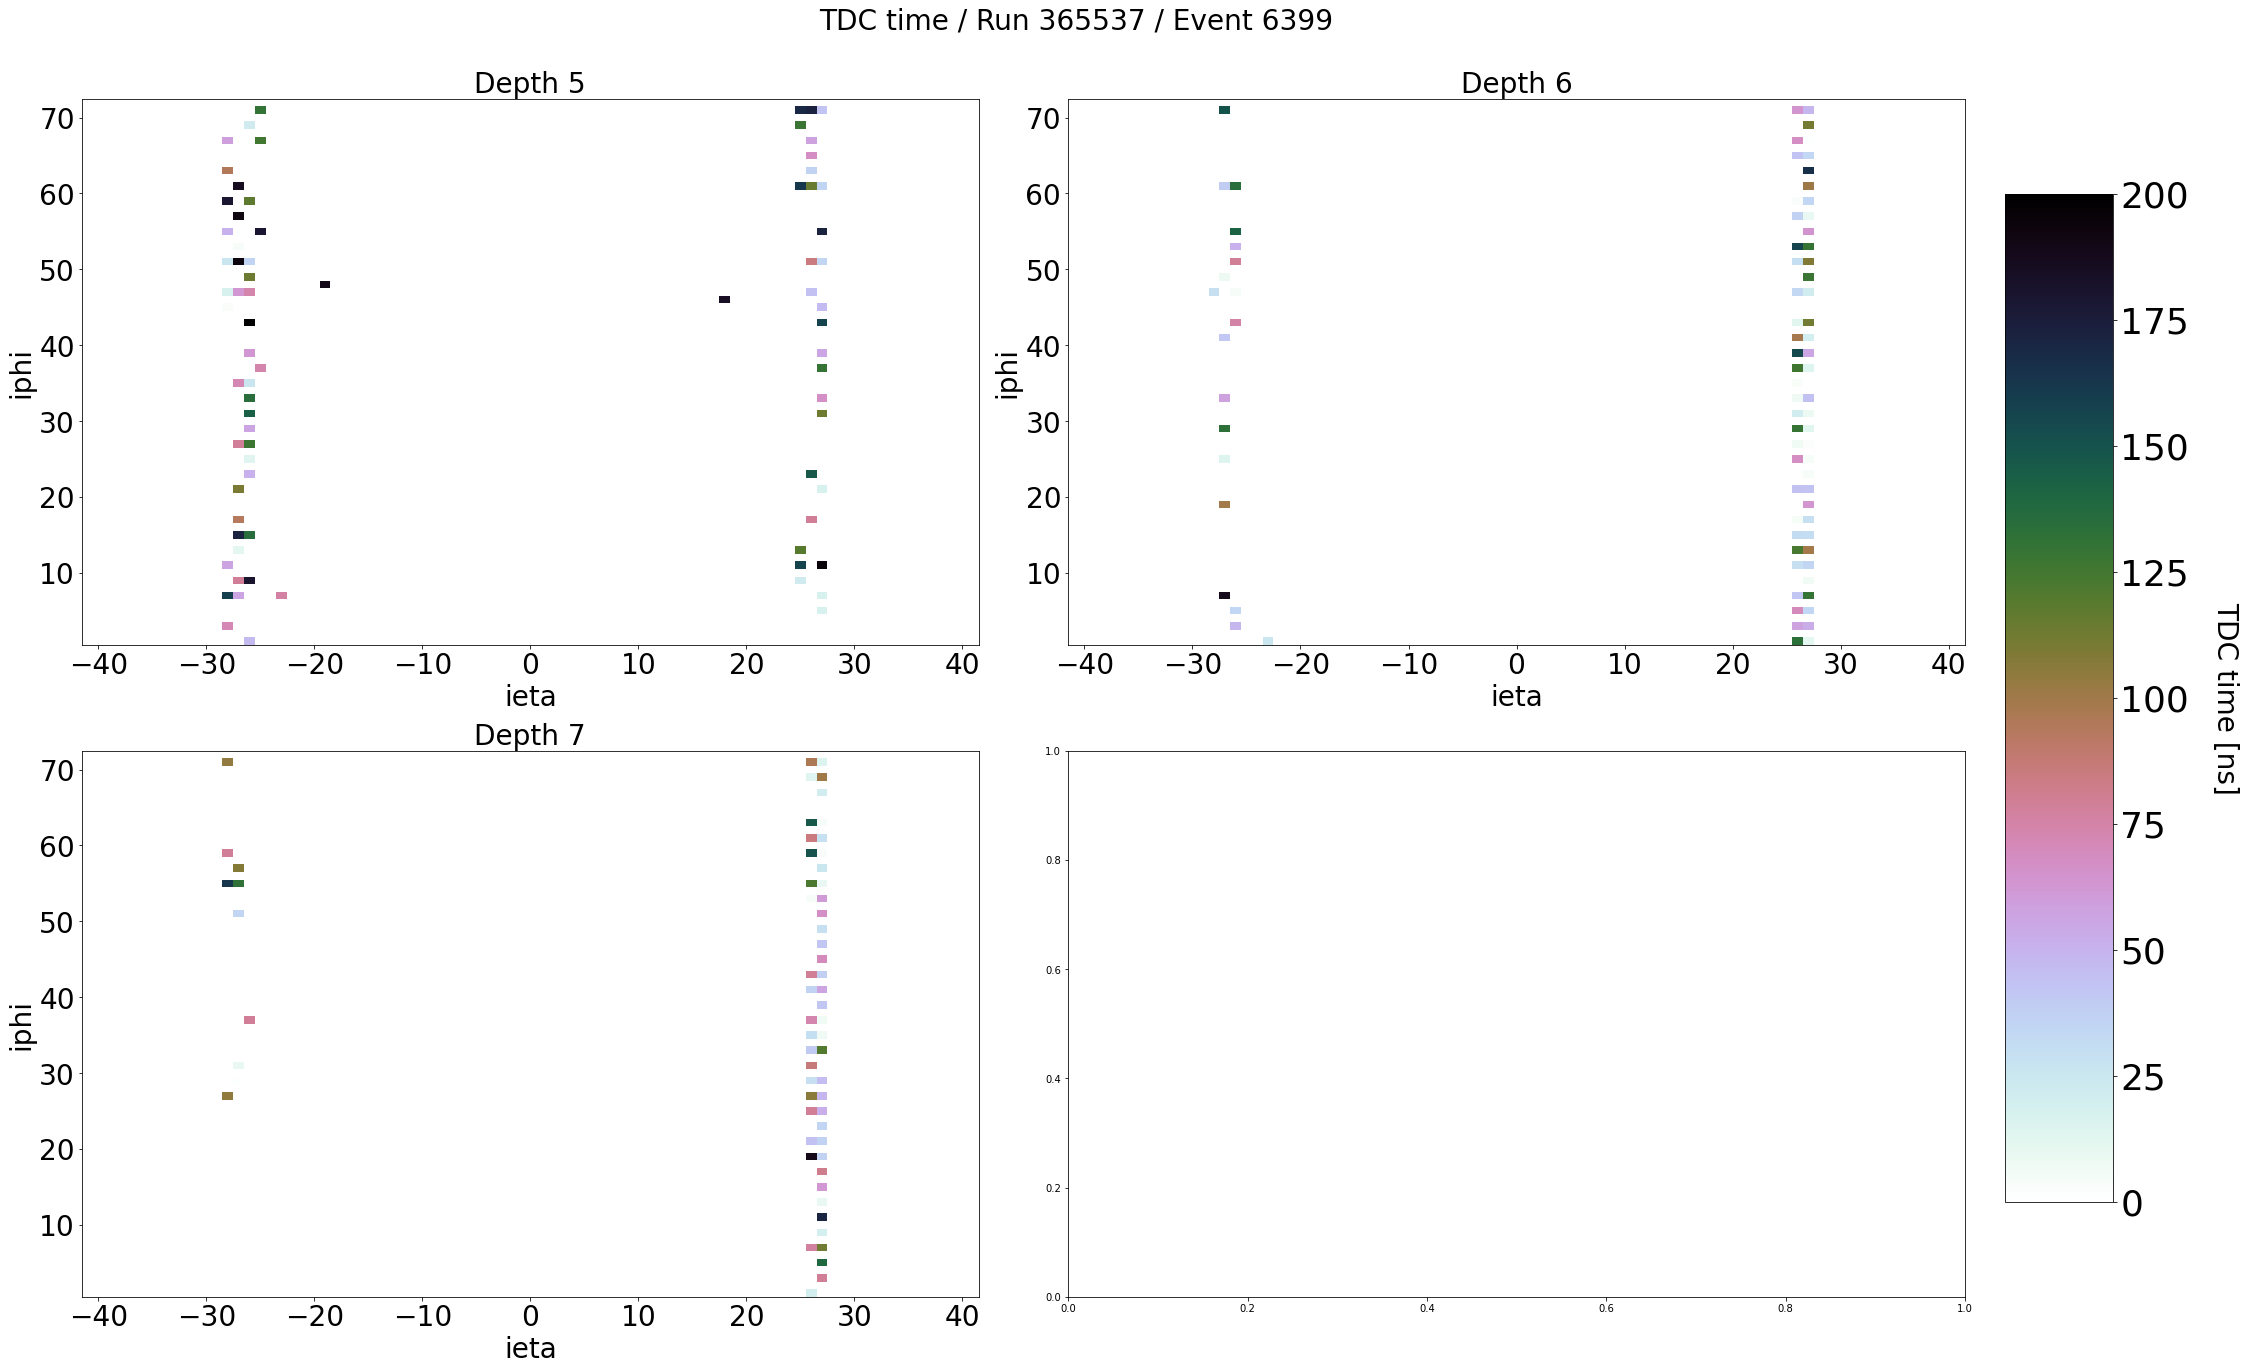

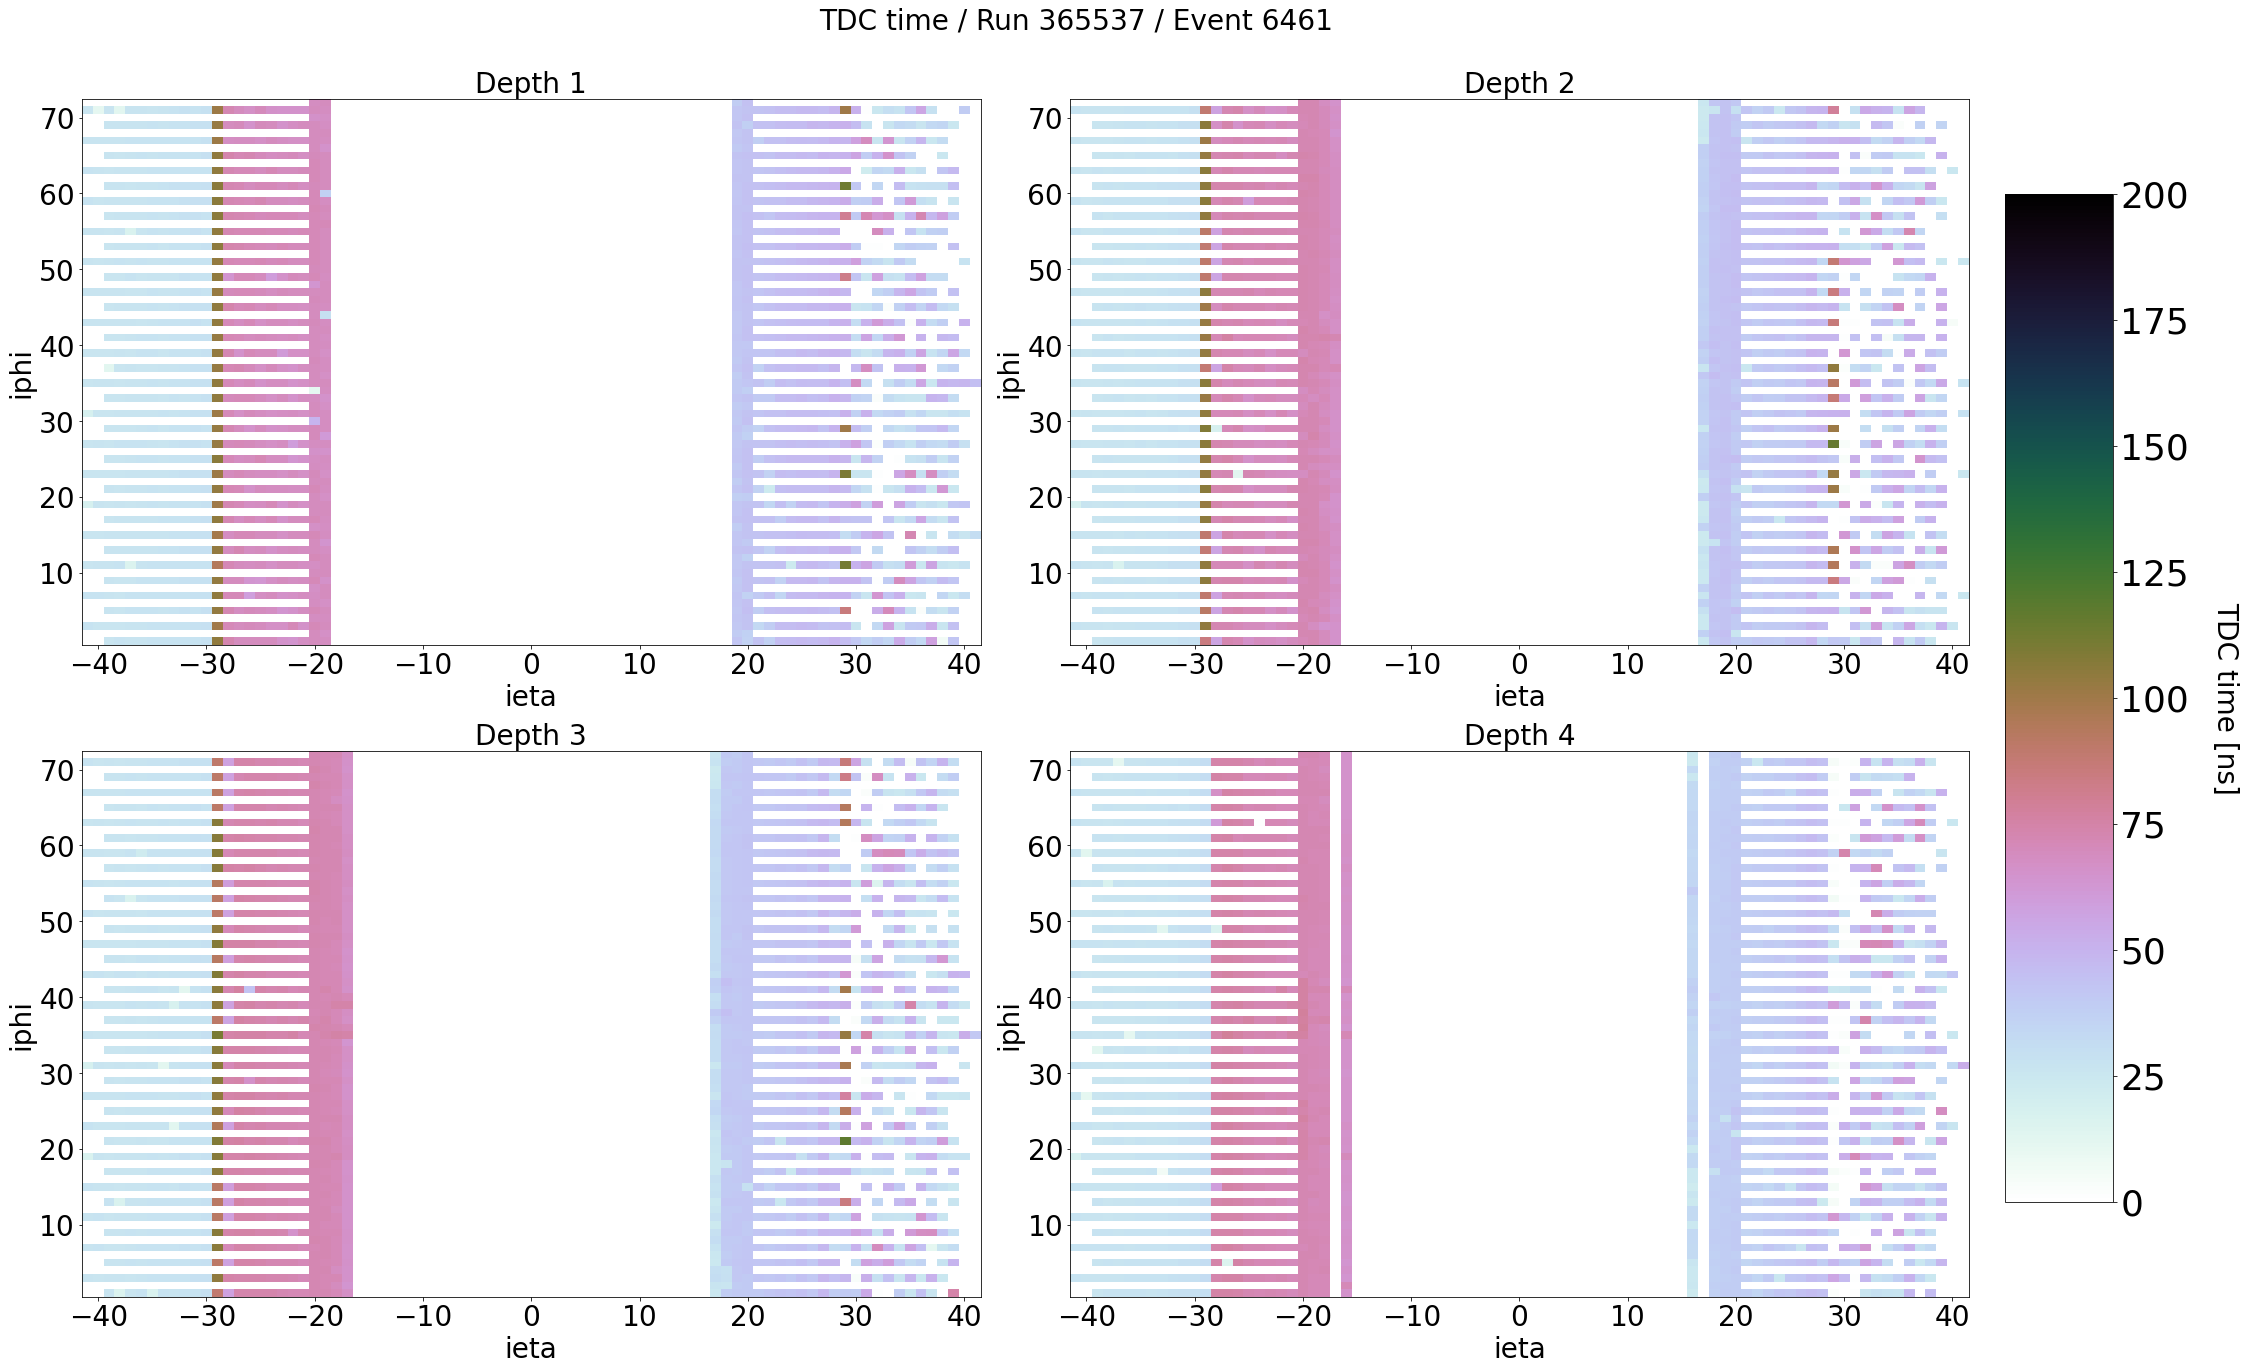

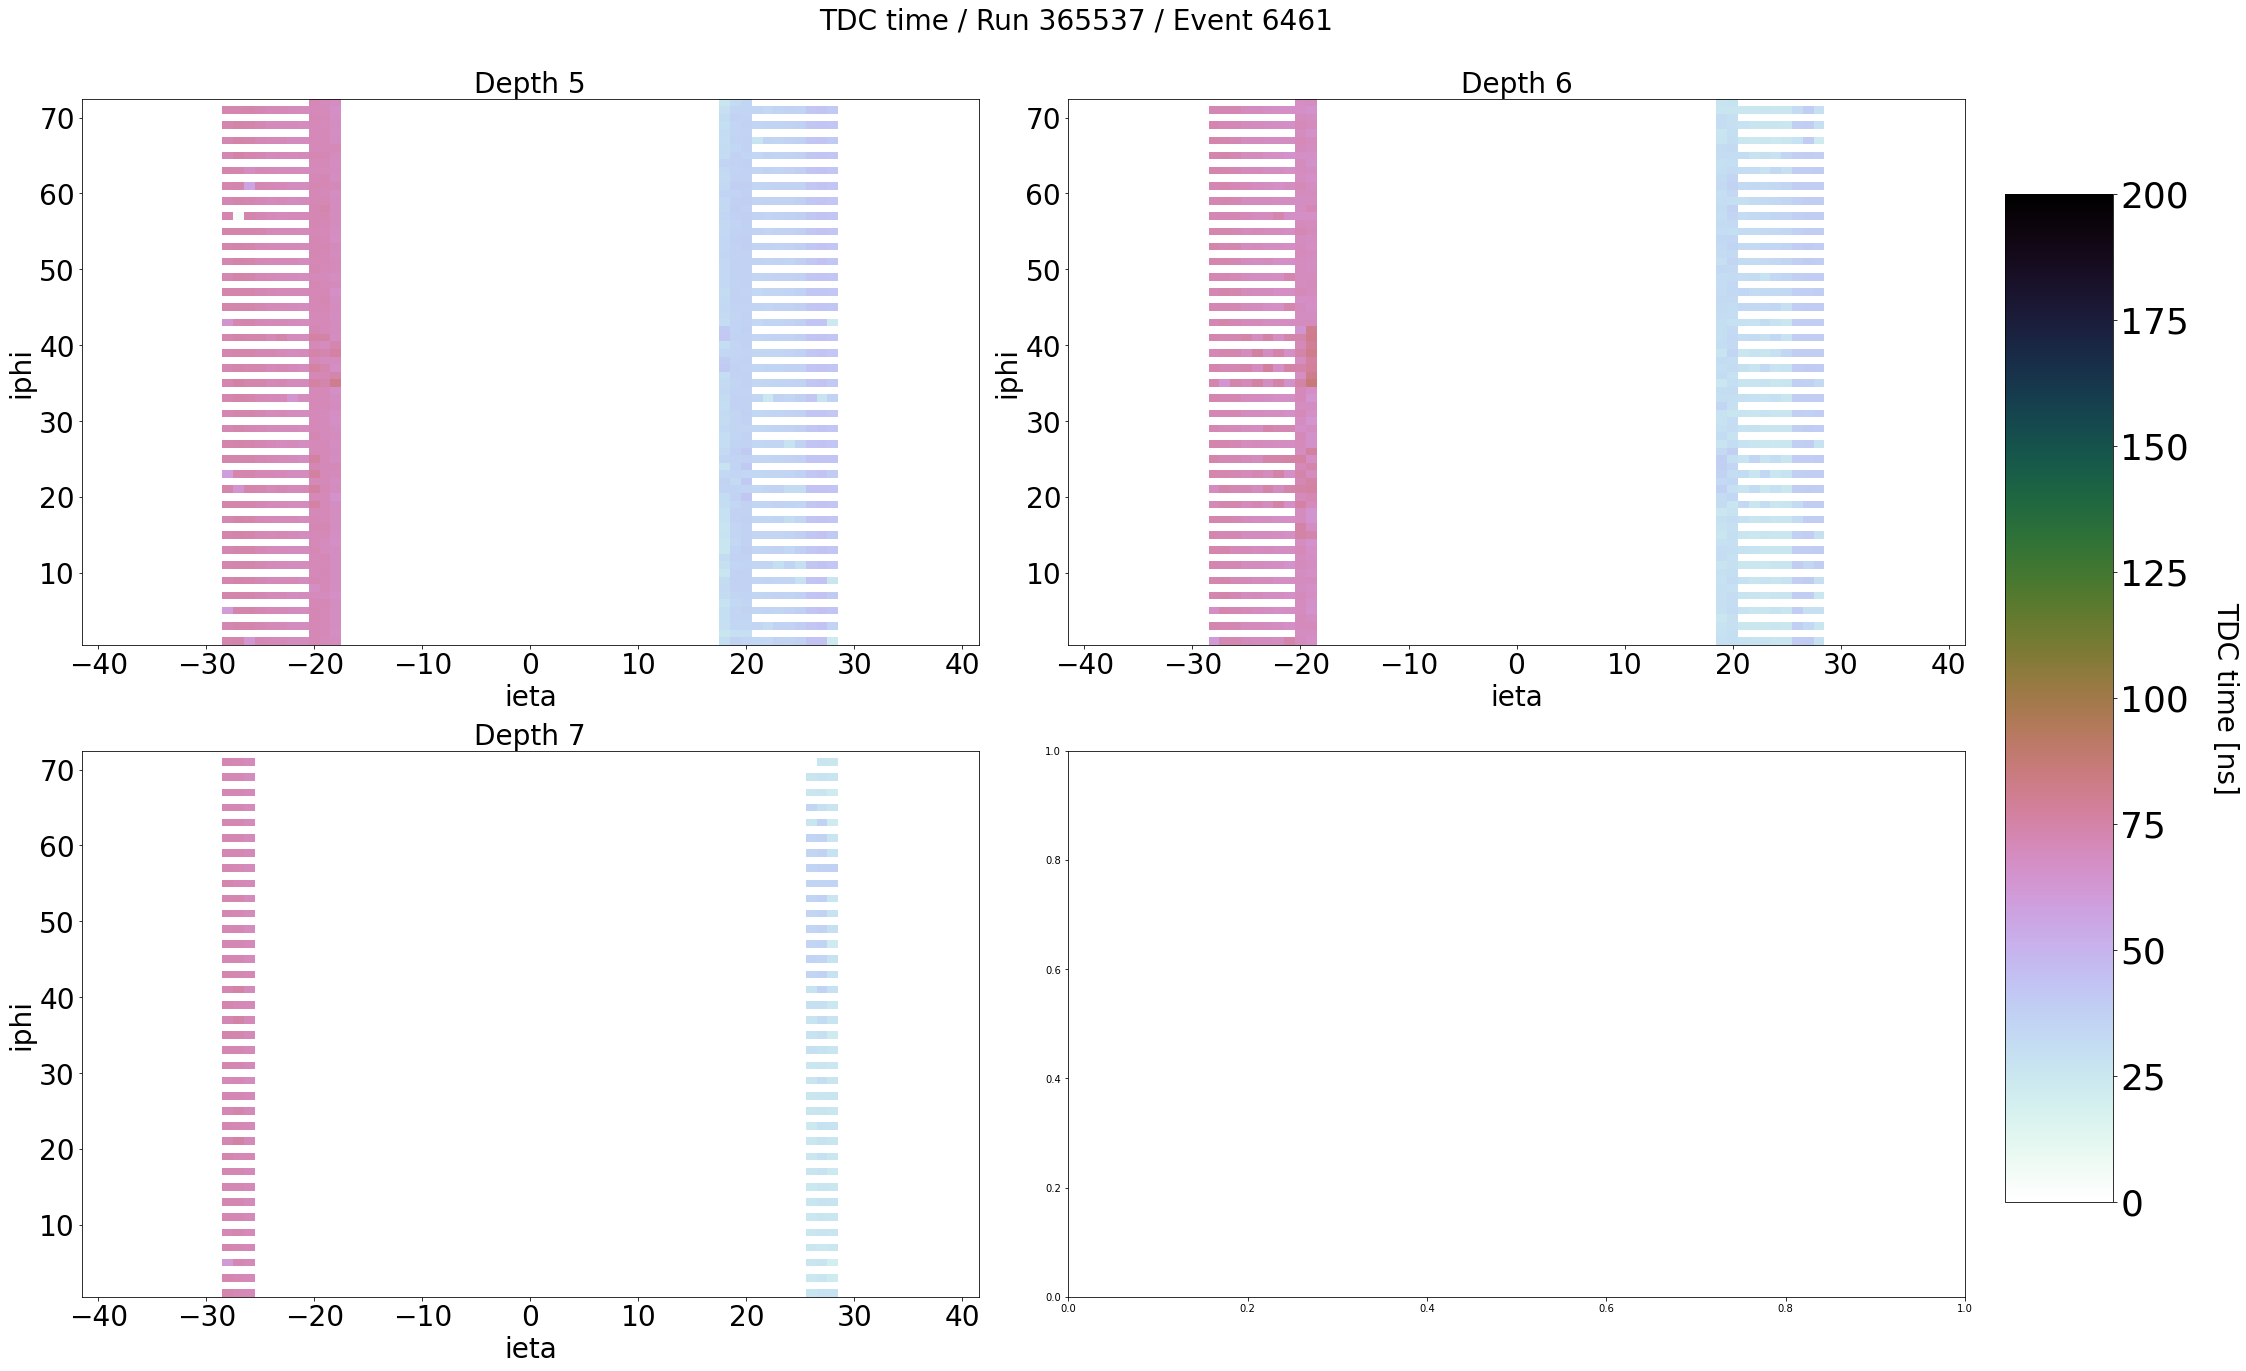

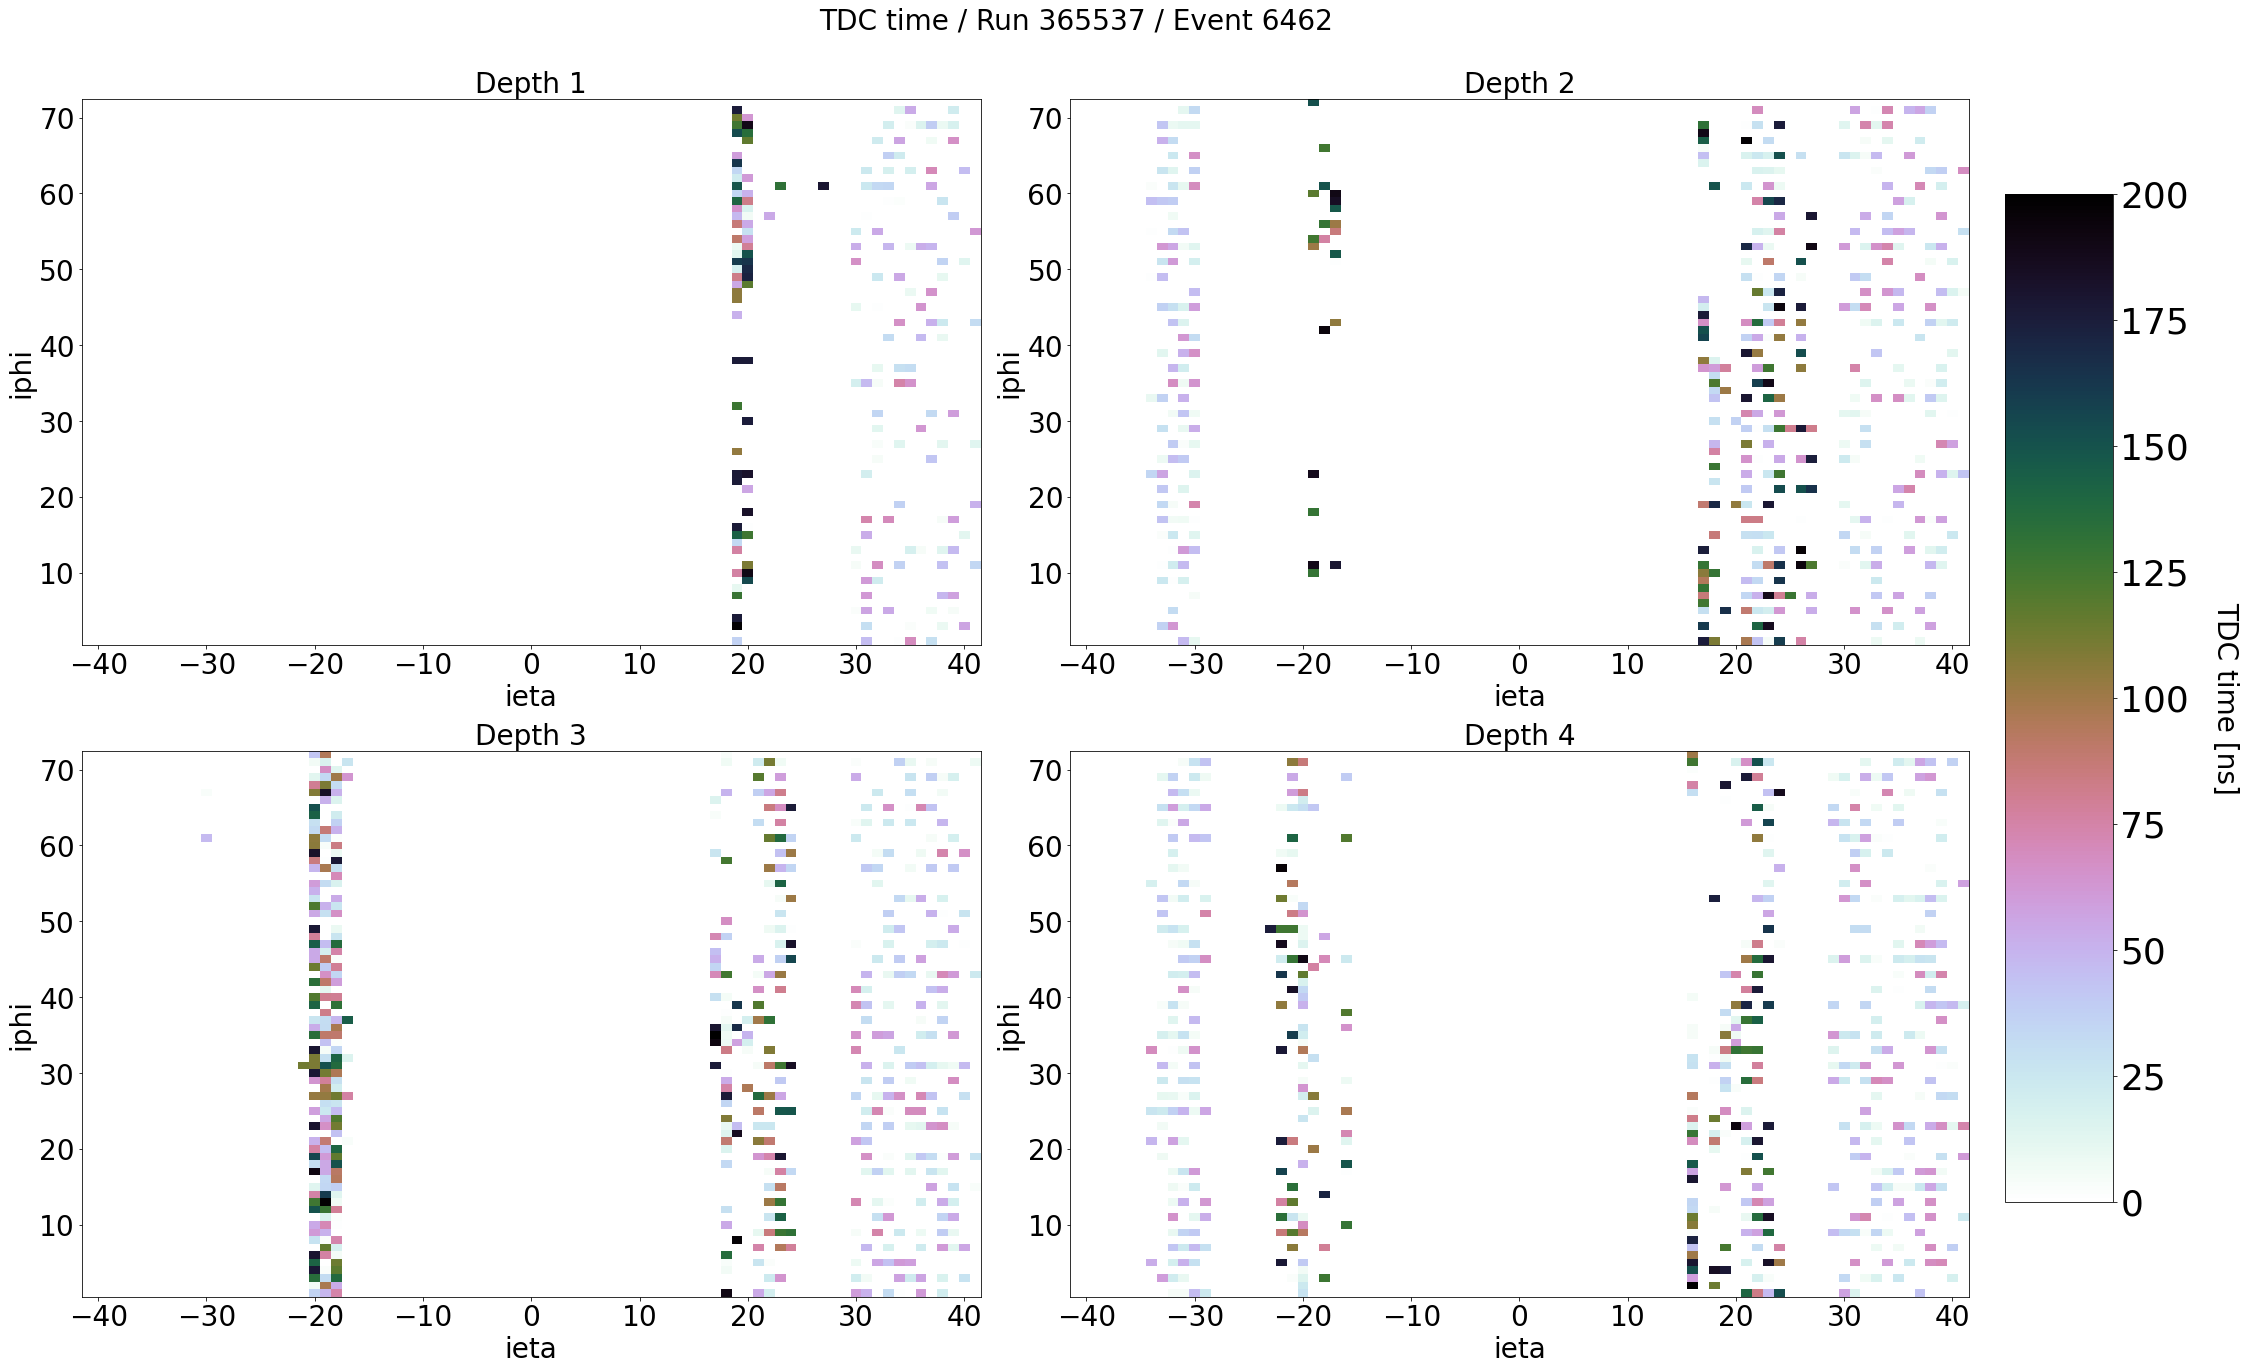

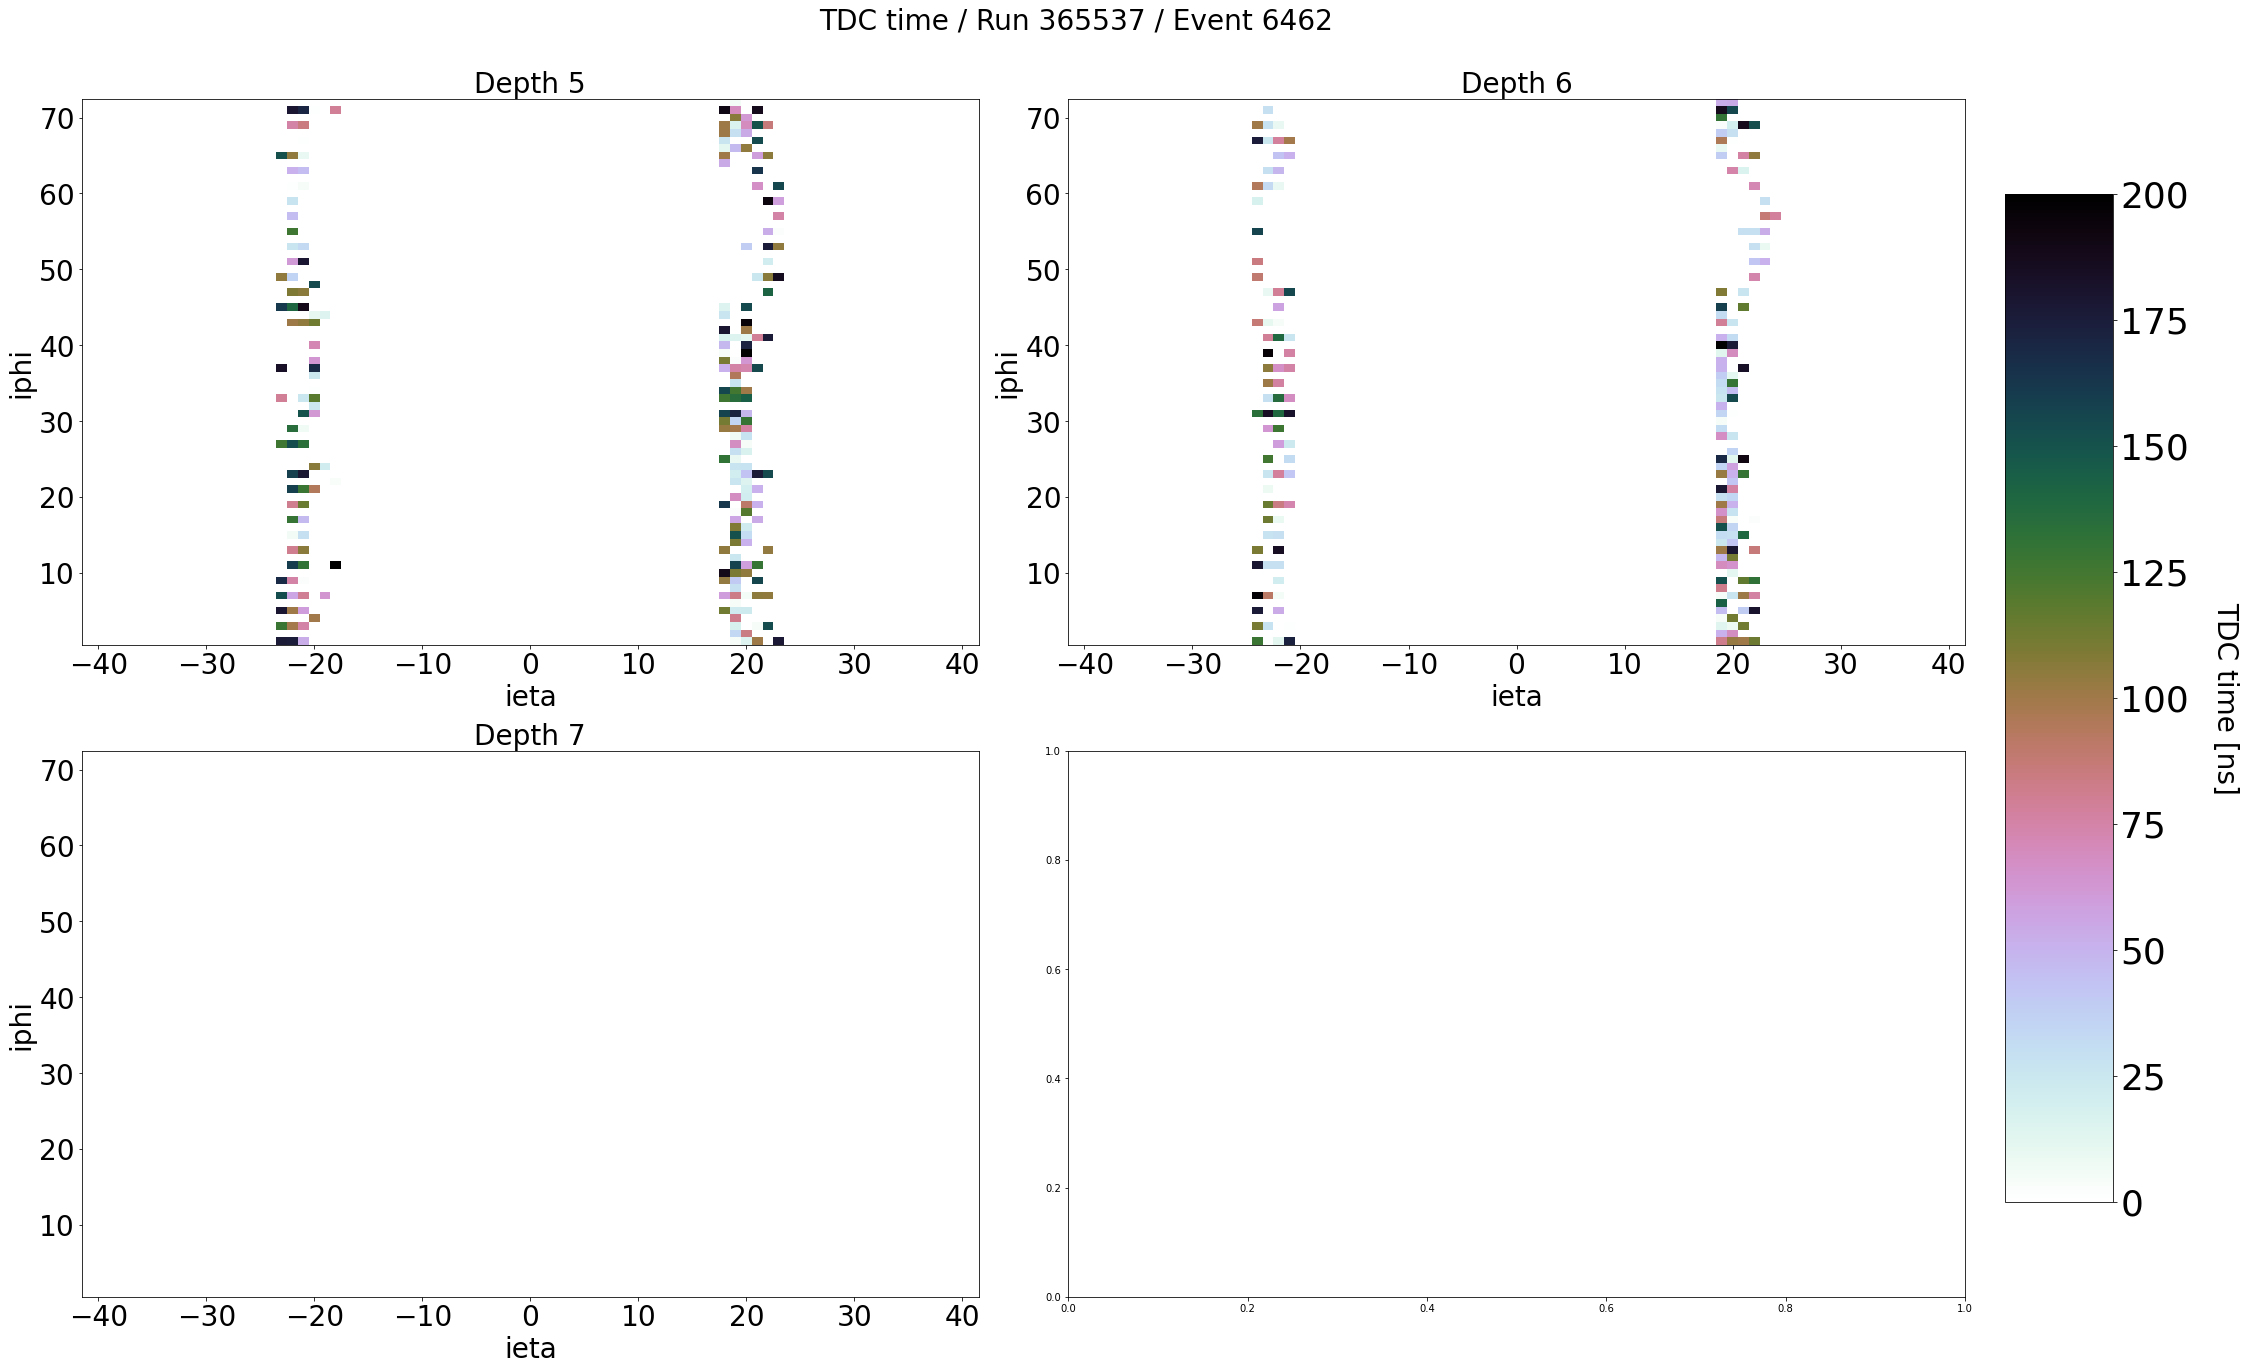

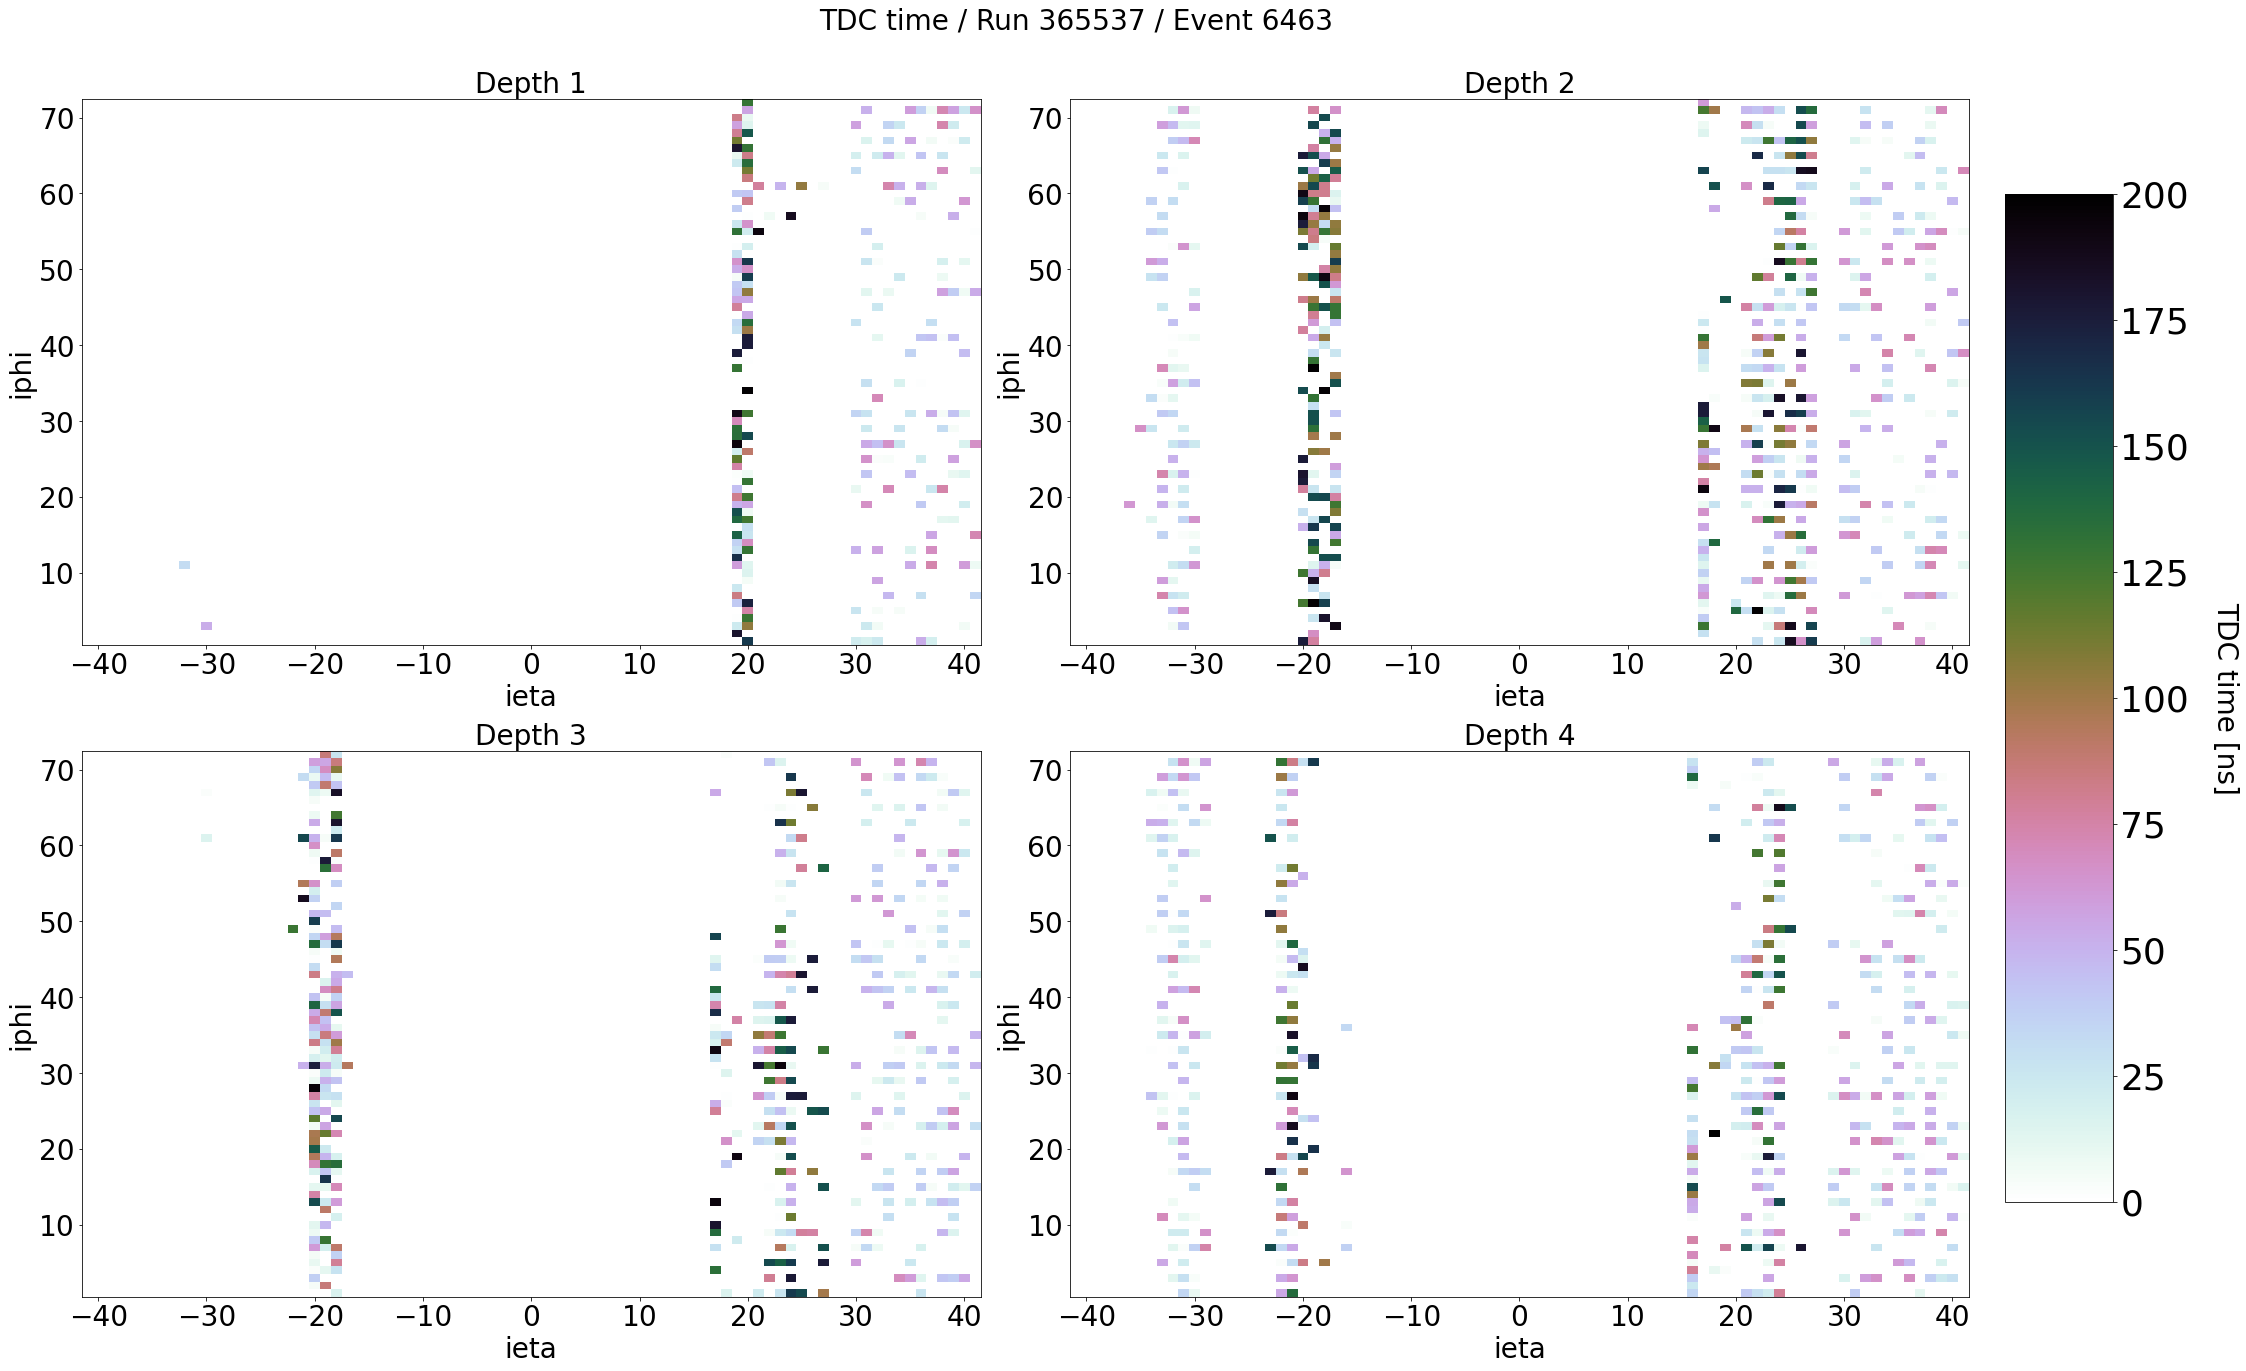

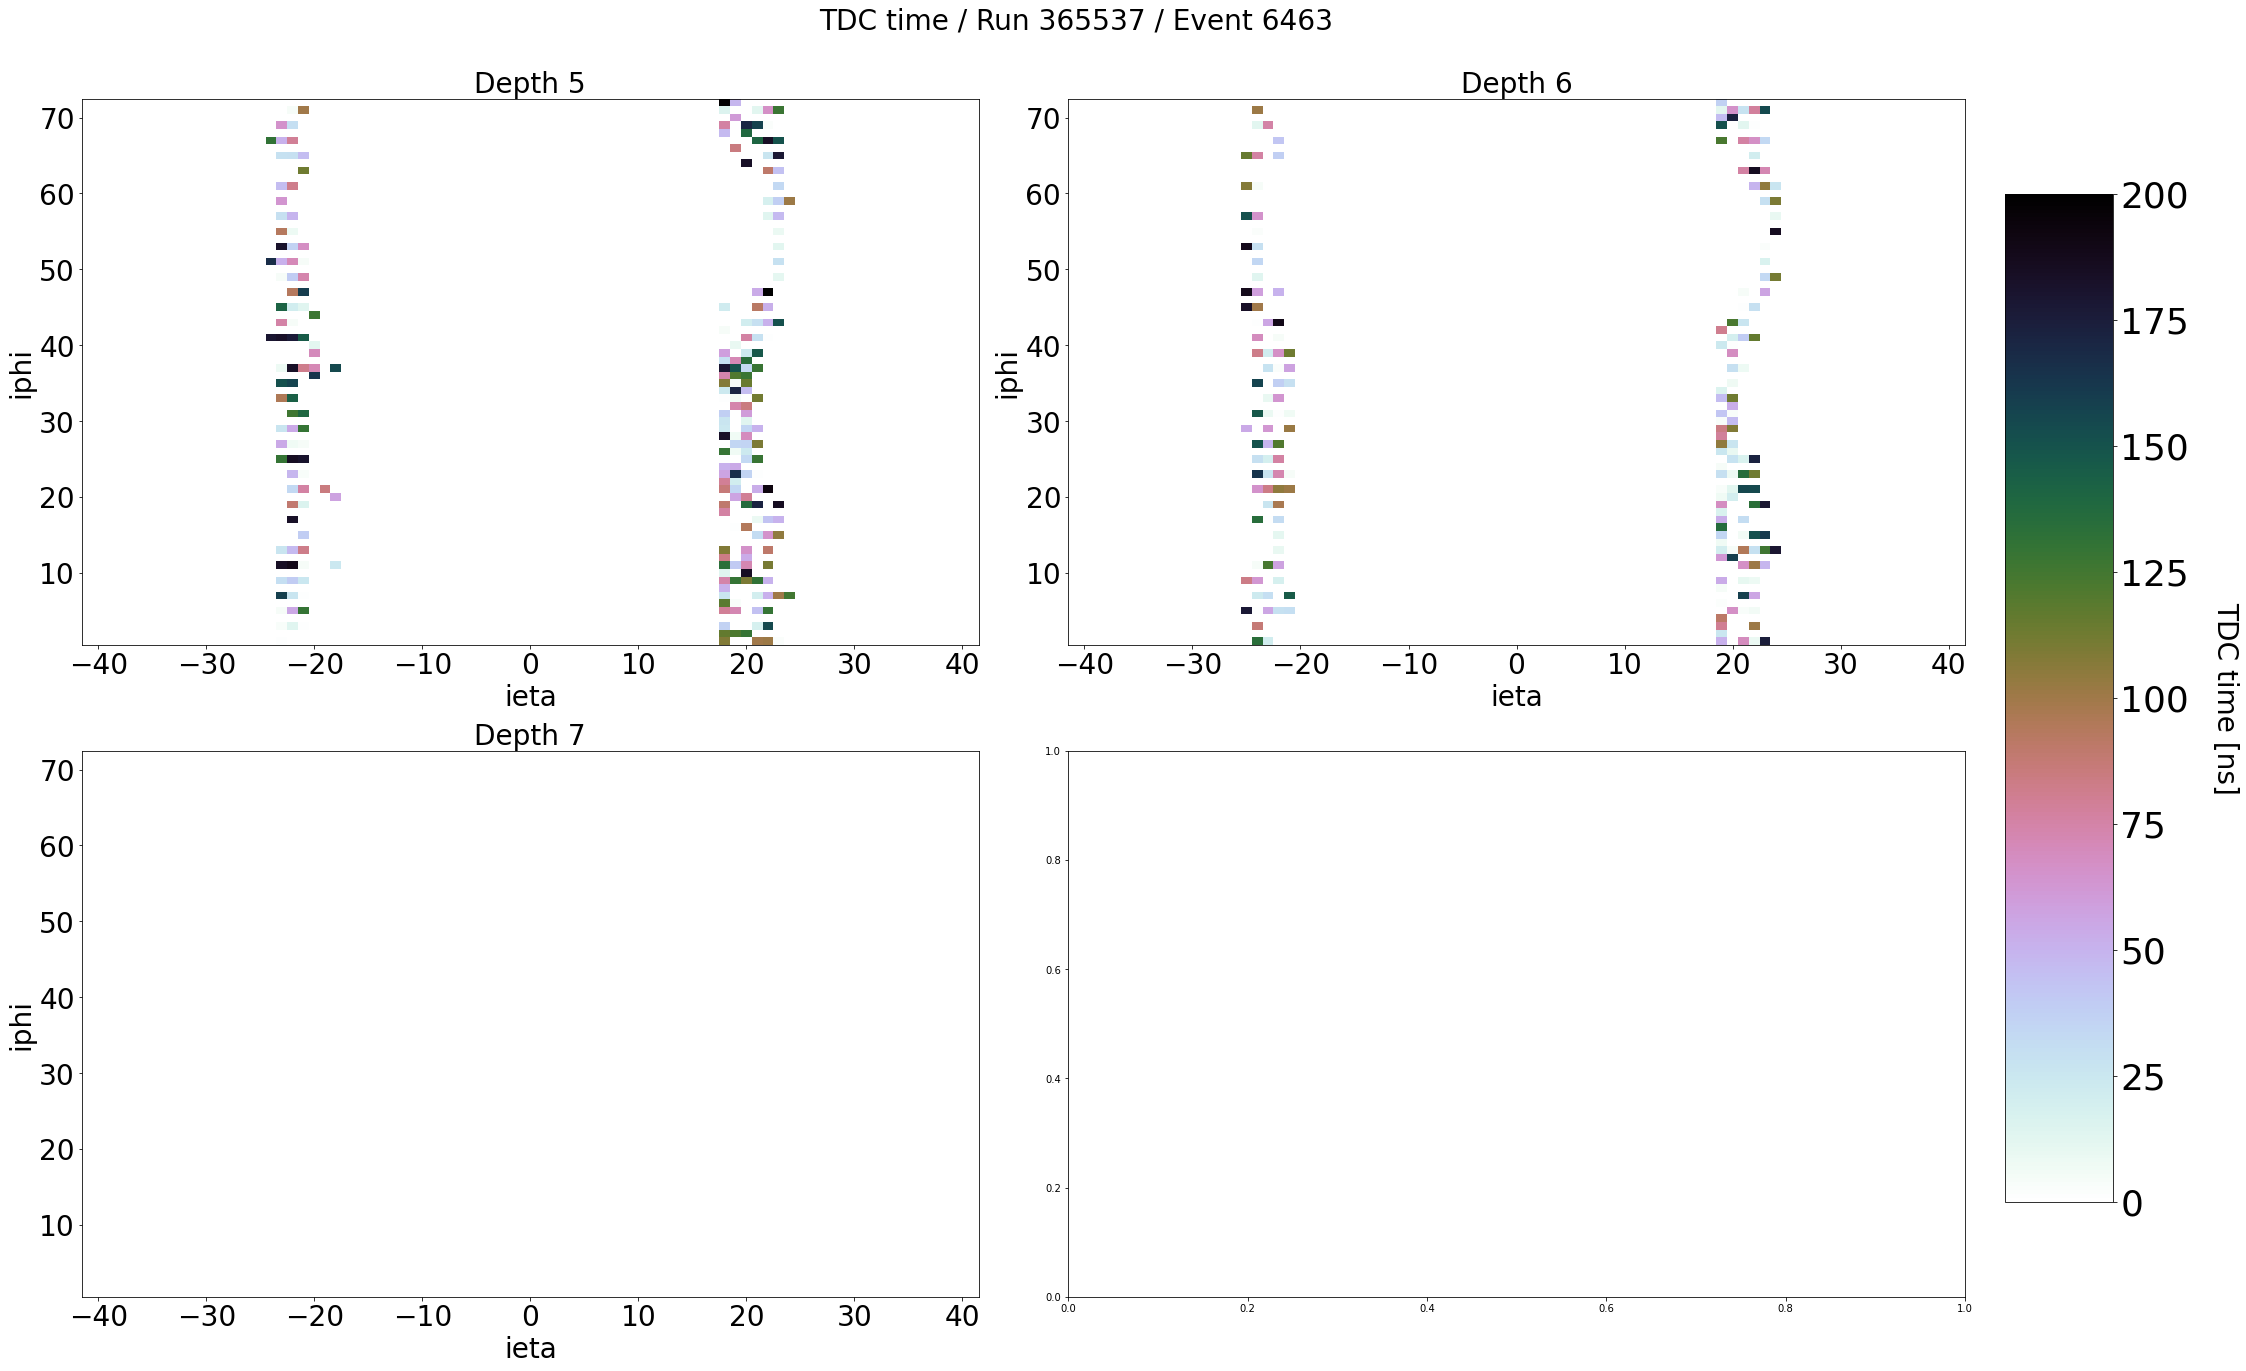

In [10]:
# TDC
bighist = stuff[run_key]["splash_tdctime"]
print(bighist.axes)
event_numbers = list(bighist.axes[0])
event_numbers.sort()
print(event_numbers)

def plot4(bighist, event_number, depths, close=False):
    if len(depths) >= 5: 
        raise ValueError("In plot4, max 4 depths")
    zmax = np.max(bighist.values())
    fig, axs = plt.subplots(2, 2, figsize=(30, 20))
    fig.suptitle(f"TDC time / Run {run_short} / Event {event_number}", fontsize=28)
    for iax, depth in enumerate(depths):
        this_hist = bighist[{"event_number": bh.loc(event_number), "depth": bh.loc(depth)}].project("ieta", "iphi")
        this_ax = axs.flat[iax]
        pcm_objs = this_hist.plot(ax=this_ax, cmap="cubehelix_r", vmin=0, vmax=200., cbar=False)
        this_ax.xaxis.label.set_size(28)
        this_ax.xaxis.set_tick_params(labelsize=28)
        this_ax.yaxis.label.set_size(28)
        this_ax.yaxis.set_tick_params(labelsize=28)
        this_ax.set_title(f"Depth {depth}", fontsize=28)
        #colorbar.ax.yaxis.label.set_size(14)
        #colorbar.ax.tick_params(axis="y", labelsize=18)
    fig.tight_layout(rect=[0, 0.03, 0.92, 0.97])
    cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(pcm_objs[0], cax=cbar_ax, cmap="rainbow")
    cbar.ax.tick_params(axis="y", labelsize=36)
    cbar.set_label("TDC time [ns]", rotation=270, fontsize=28, labelpad=50)
    fig.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/tdcmap_depth4_r{run_short}_e{event_number}_d{depths[0]}-{depths[-1]}.png", bbox_inches = "tight")
    if close:
        plt.close(fig)

    #cbar.set_bad('red')

for i, event_number in enumerate(event_numbers):
    plot4(bighist, event_number, range(1, 4+1), close=(i>10))
    plot4(bighist, event_number, range(5, 7+1), close=(i>10))


(IntCategory([7089, 7088, 7087, 7086, 10317, 10316, 10315, 9394, 9393, 10272, 6803, 6802, 6603, 6602, 6601, 7136, 7135, 7134, 7133, 7245, 7244, 9335, 9333, 9334, 9332, 9773, 9772, 2221, 2299, 7783, 7782, 7836, 7835, 7834, 7887, 7886, 7885, 10045, 10044, 10103, 7573, 7571, 7570, 7618, 7617, 6399, 6398, 6397, 6466, 6465, 6464, 6462, 6463, 6461, 6538, 6537, 6539, 6536, 8835, 8834, 10387, 10386, 10162, 10161, 10160, 7307, 7948, 7949, 7947, 8008, 8009, 8006, 8007, 8005, 8004, 8065, 8122, 8121, 8123, 8120, 8119, 3794, 4110, 6676, 6675, 8118, 8185, 8184, 8183, 8182, 8181, 8387, 8386, 8494, 8553, 8552, 8551, 8550, 8549, 6745, 6743, 6744, 6746, 6742, 5744, 8607, 8606, 8671, 8670, 8723, 8790, 8789, 8788, 9116, 9177, 9176, 9175, 9174, 9173, 9280, 10431, 10432, 10430], growth=True, name='event_number', label='Event Number'), Regular(83, -41.5, 41.5, name='ieta'), Regular(72, 0.5, 72.5, name='iphi'), Regular(7, 0.5, 7.5, name='depth'), Variable(array([1.00000000e+00, 1.81659979e+00, 3.30003479e+00,

<ipython-input-12-7d414dd9a4d3>:34: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/qtimemap_depth4_r{run_short}_e{event_number}_d{depths[0]}-{depths[-1]}.png", bbox_inches = "tight")


2221
2299
2299
3794
3794
4110
4110
5744
5744
6397
6397
6398
6398
6399
6399
6461
6461
6462
6462
6463


<ipython-input-12-7d414dd9a4d3>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(30, 20))


6463
6464
6464
6465
6465
6466
6466
6536
6536
6537
6537
6538
6538
6539
6539
6601
6601
6602
6602
6603
6603
6675
6675
6676
6676
6742
6742
6743
6743
6744
6744
6745
6745
6746
6746
6802
6802
6803
6803
7086
7086
7087
7087
7088
7088
7089
7089
7133
7133
7134
7134
7135
7135
7136
7136
7244
7244
7245
7245
7307
7307
7570
7570
7571
7571
7573
7573
7617
7617
7618
7618
7782
7782
7783
7783
7834
7834
7835
7835
7836
7836
7885
7885
7886
7886
7887
7887
7947
7947
7948
7948
7949
7949
8004
8004
8005
8005
8006
8006
8007
8007
8008
8008
8009
8009
8065
8065
8118
8118
8119
8119
8120
8120
8121
8121
8122
8122
8123
8123
8181
8181
8182
8182
8183
8183
8184
8184
8185
8185
8386
8386
8387
8387
8494
8494
8549
8549
8550
8550
8551
8551
8552
8552
8553
8553
8606
8606
8607
8607
8670
8670
8671
8671
8723
8723
8788
8788
8789
8789
8790
8790
8834
8834
8835
8835
9116
9116
9173
9173
9174
9174
9175
9175
9176
9176
9177
9177
9280
9280
9332
9332
9333
9333
9334
9334
9335
9335
9393
9393
9394
9394
9772
9772
9773
9773
10044
10044
10045
10045
1

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-clang11-opt/lib/python3.8/site-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-clang11-opt/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


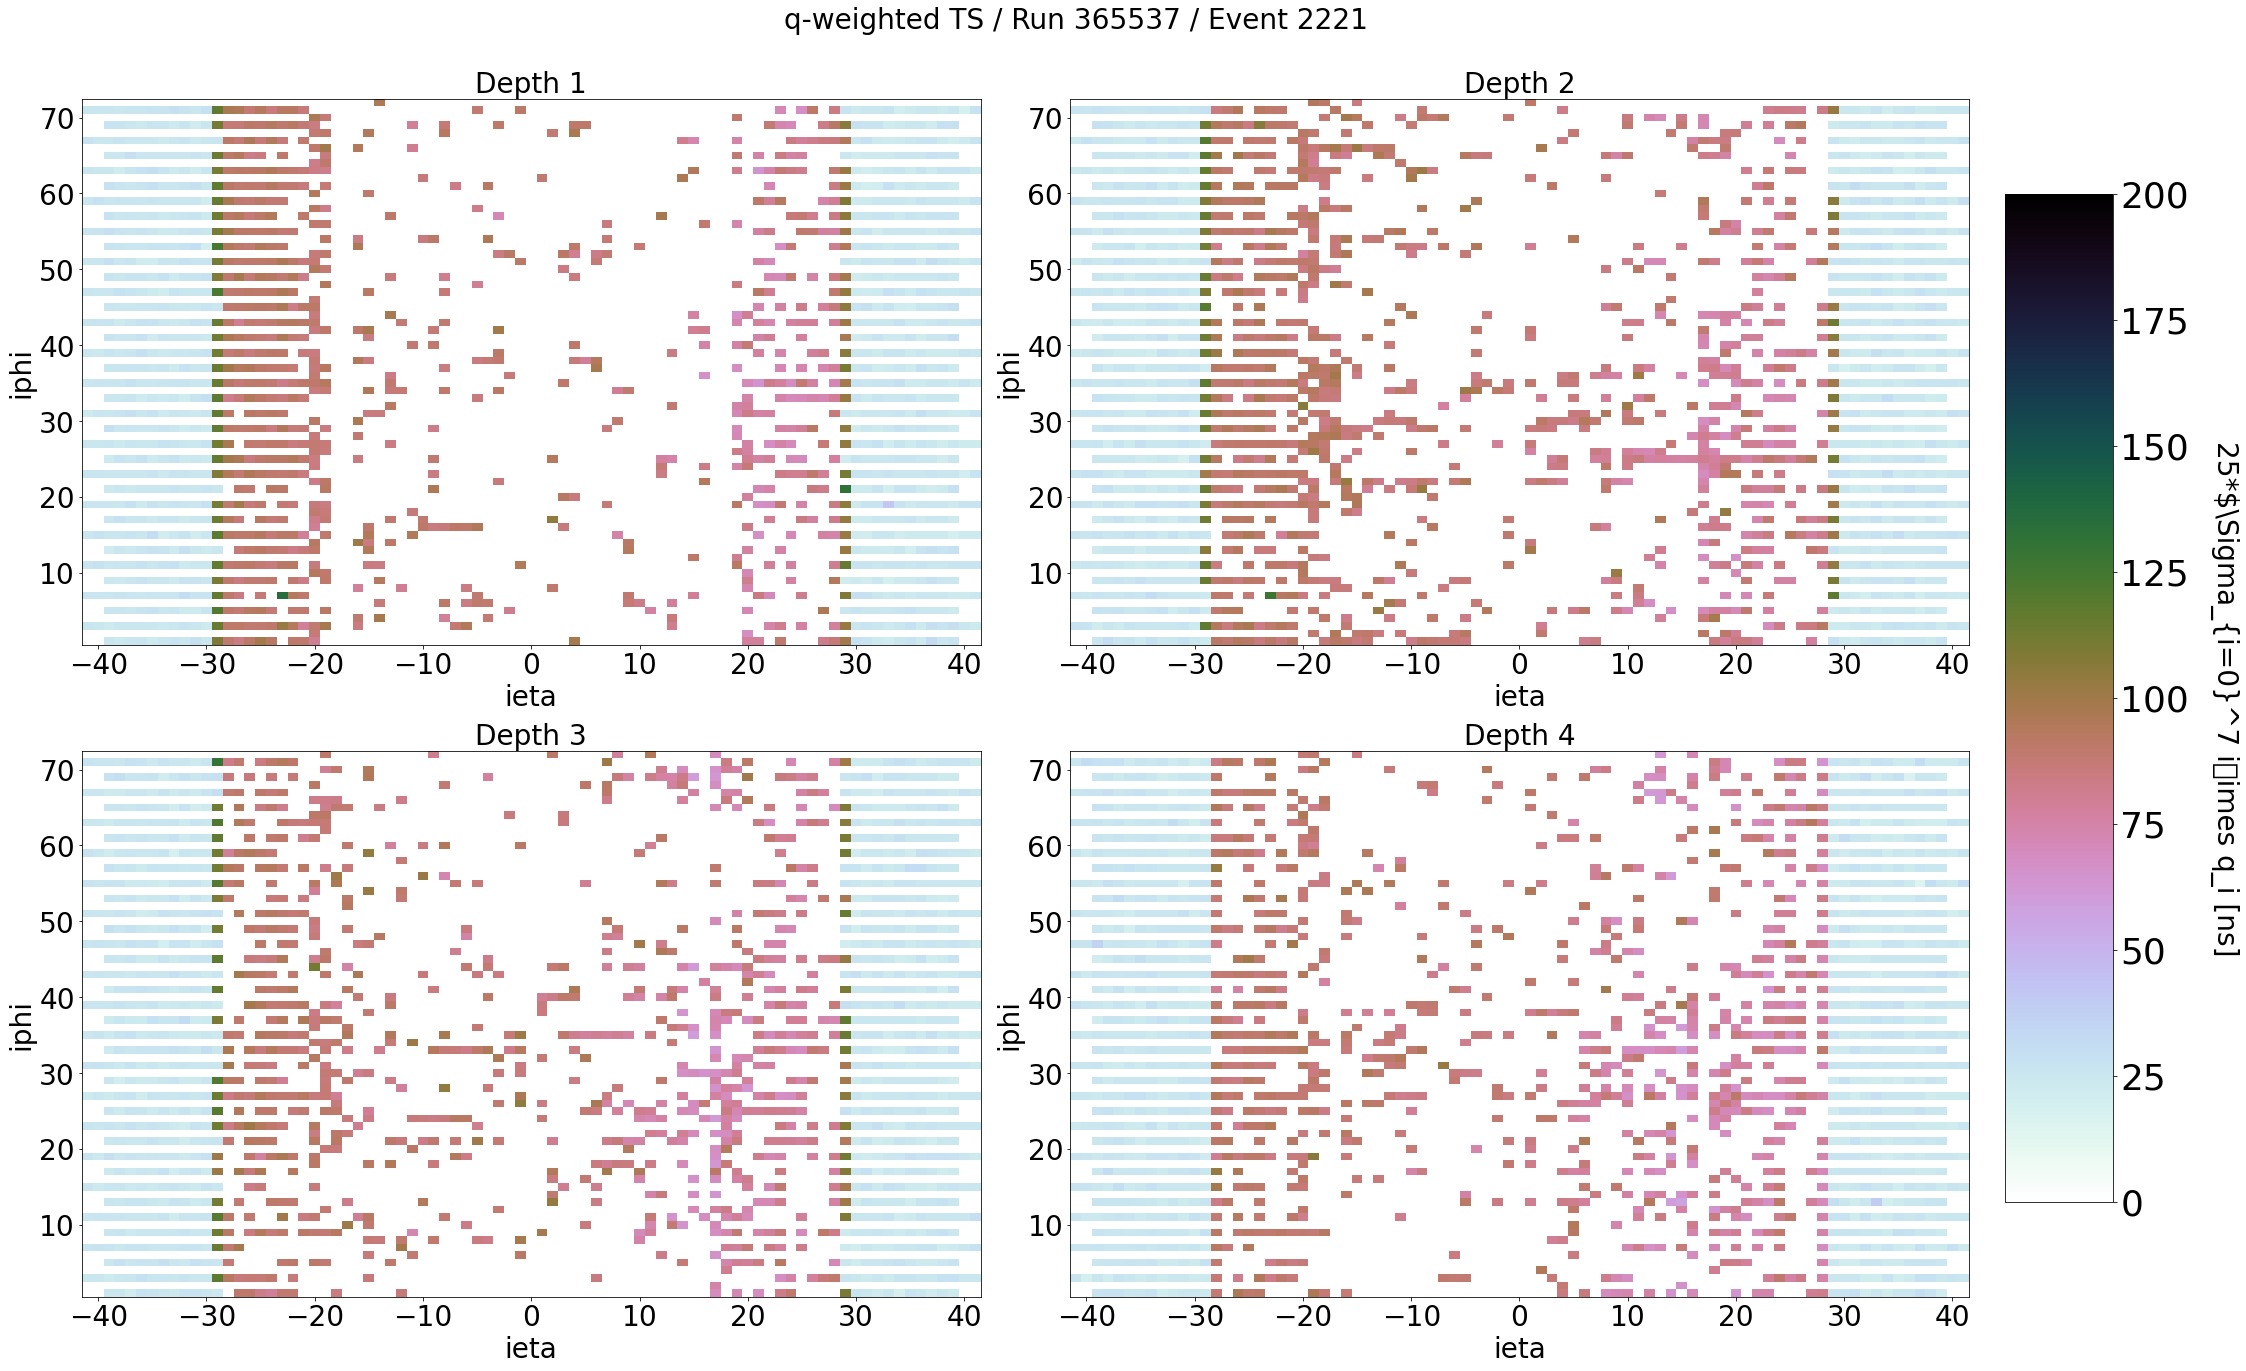

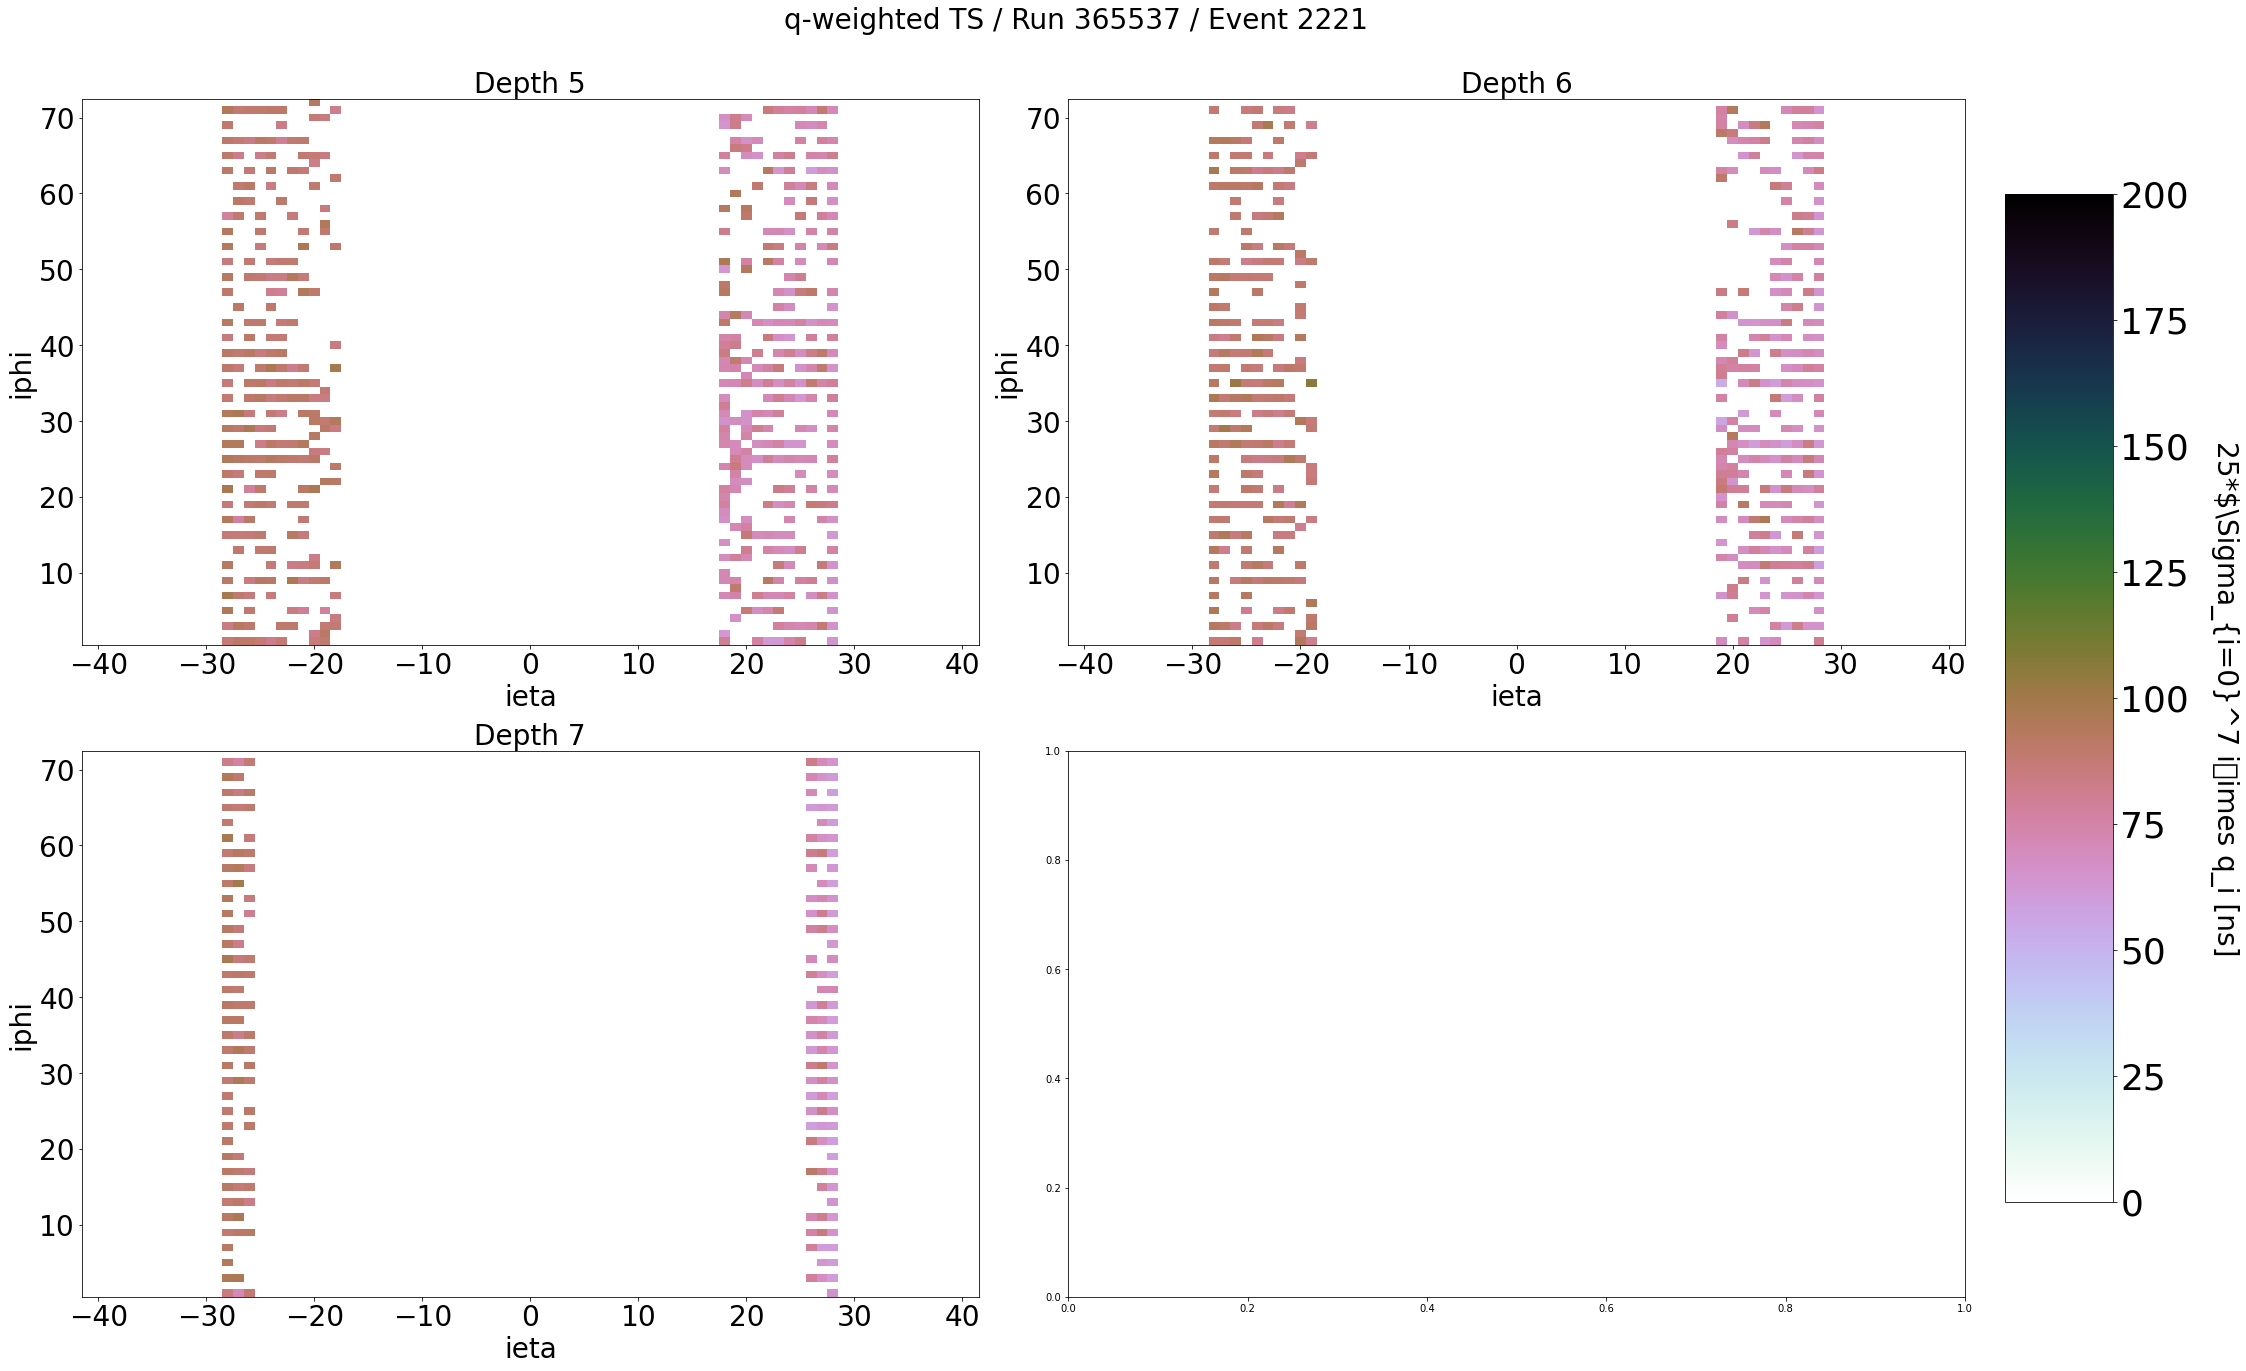

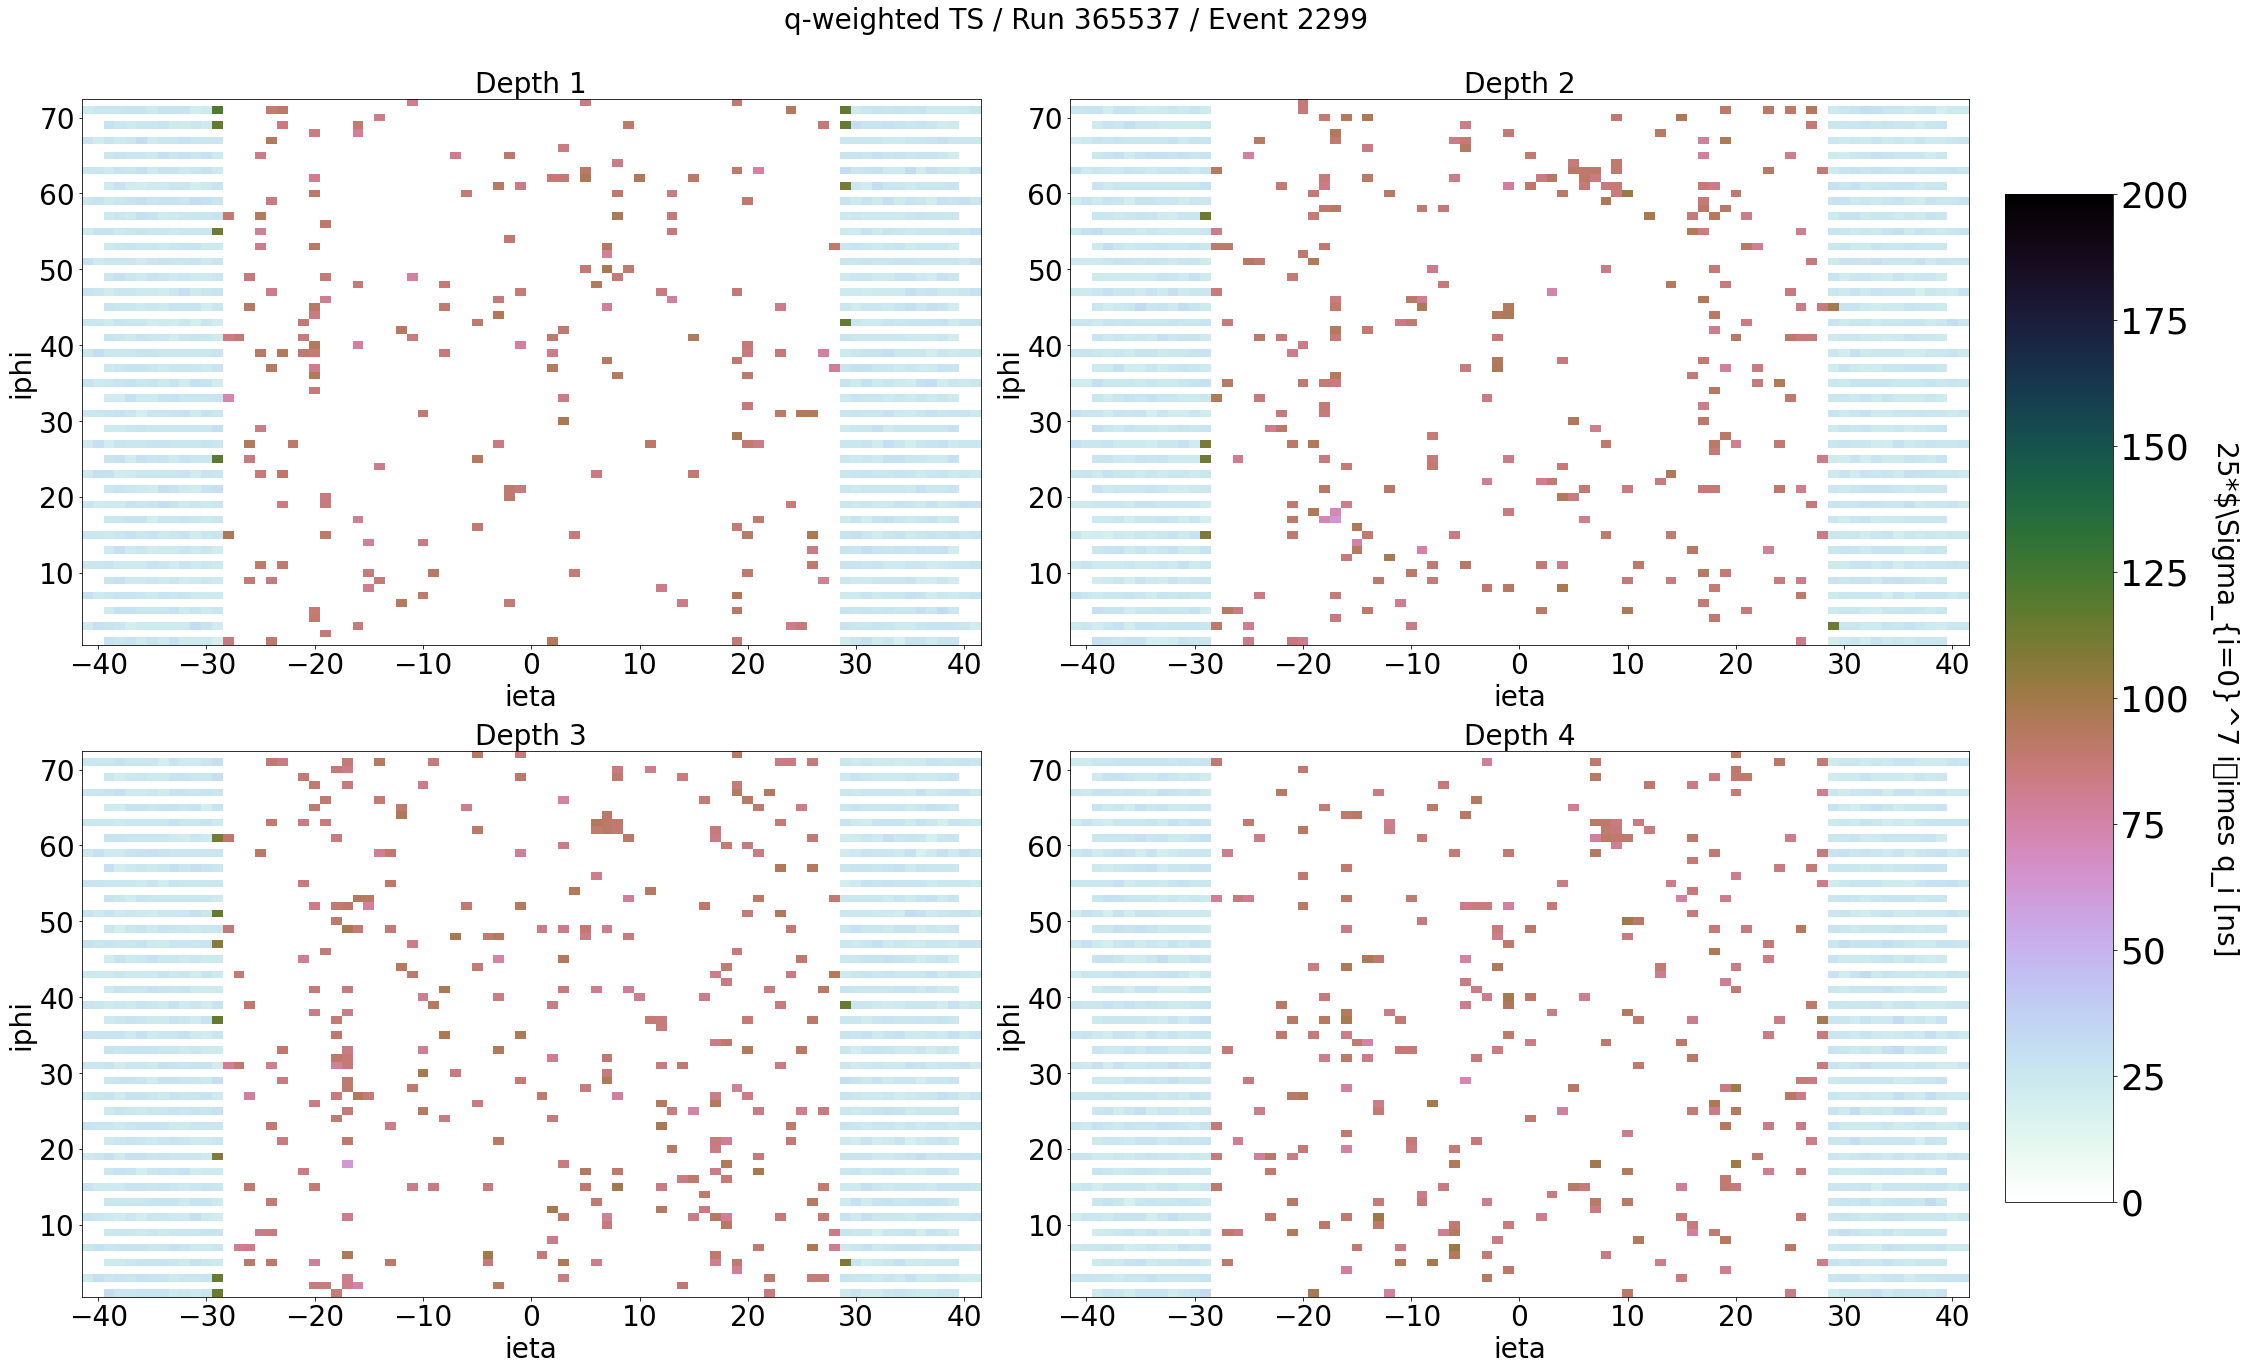

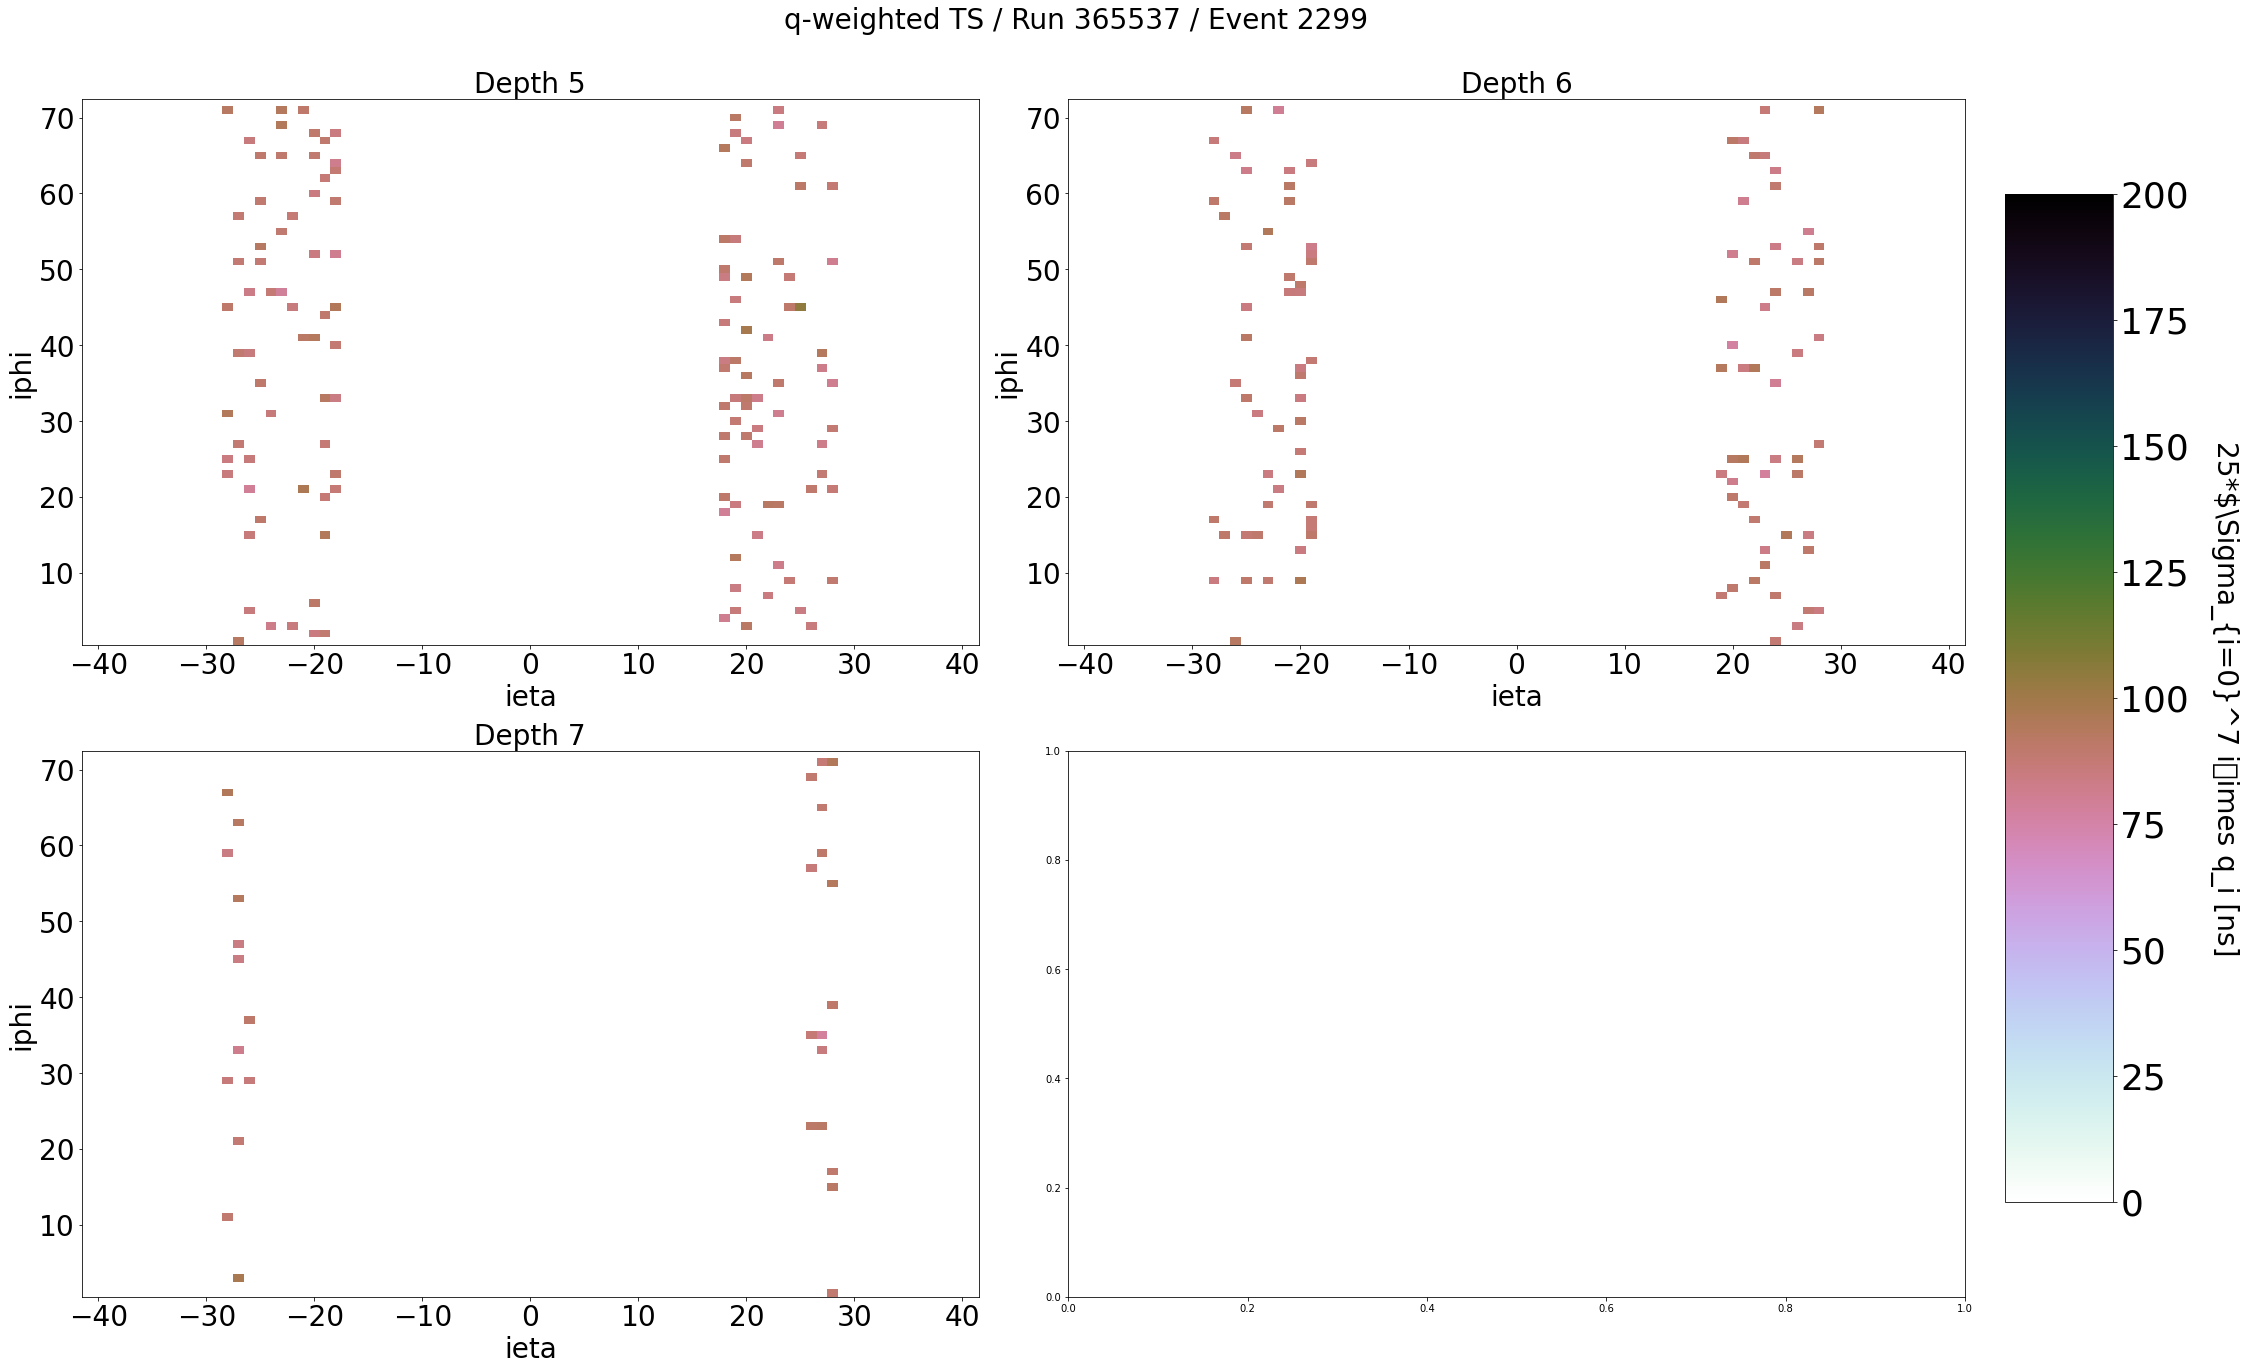

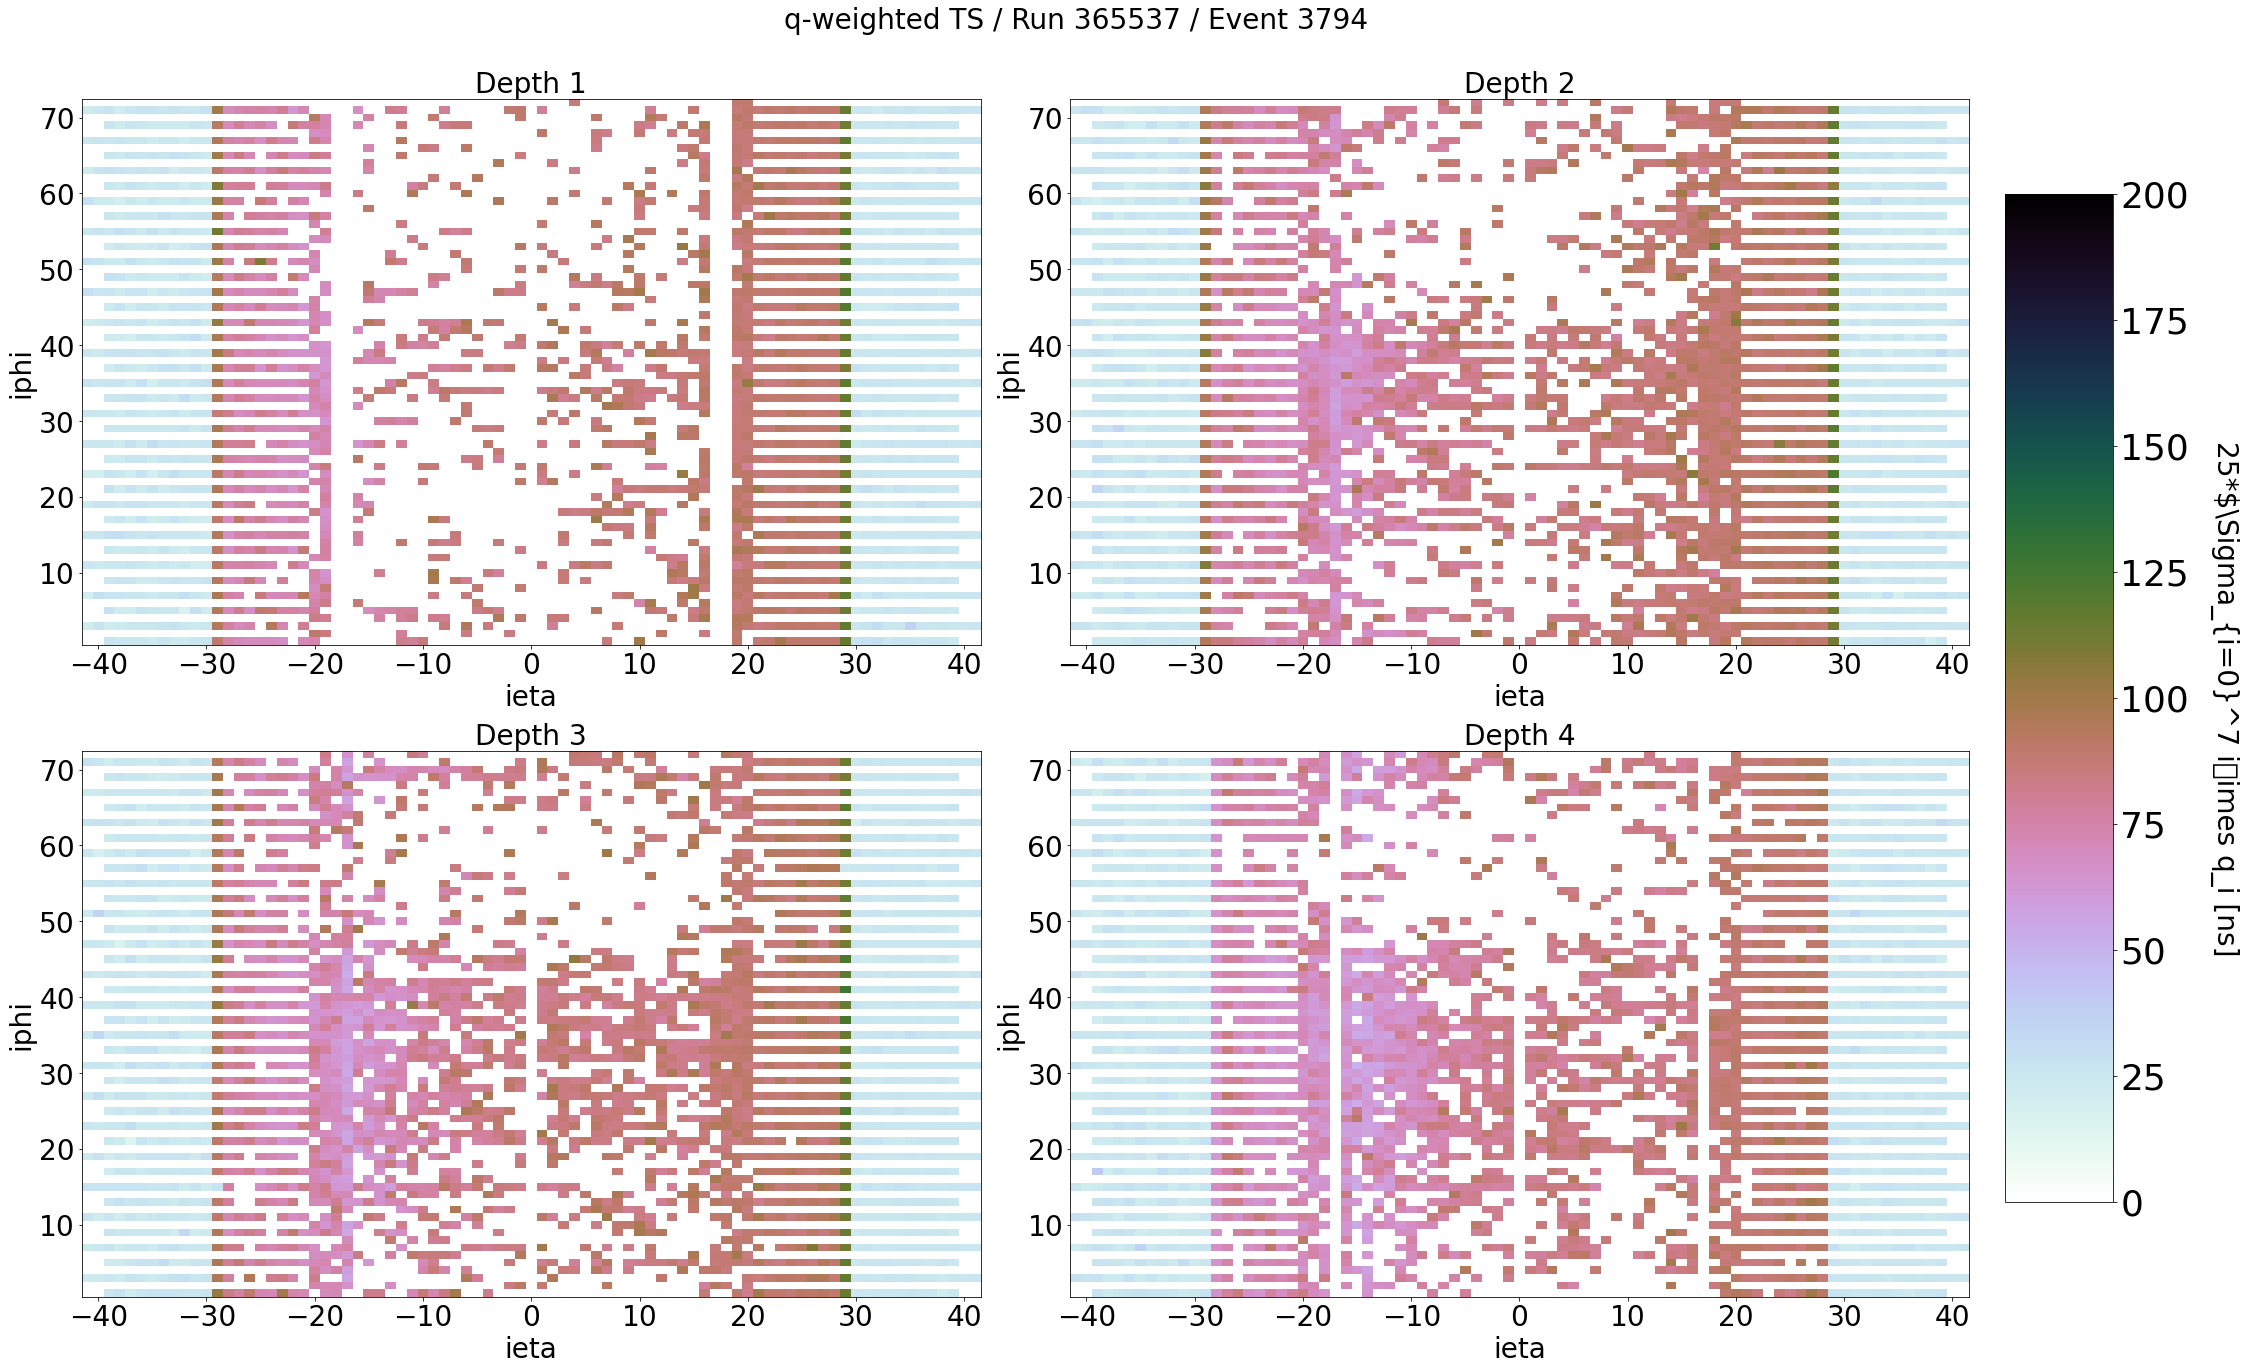

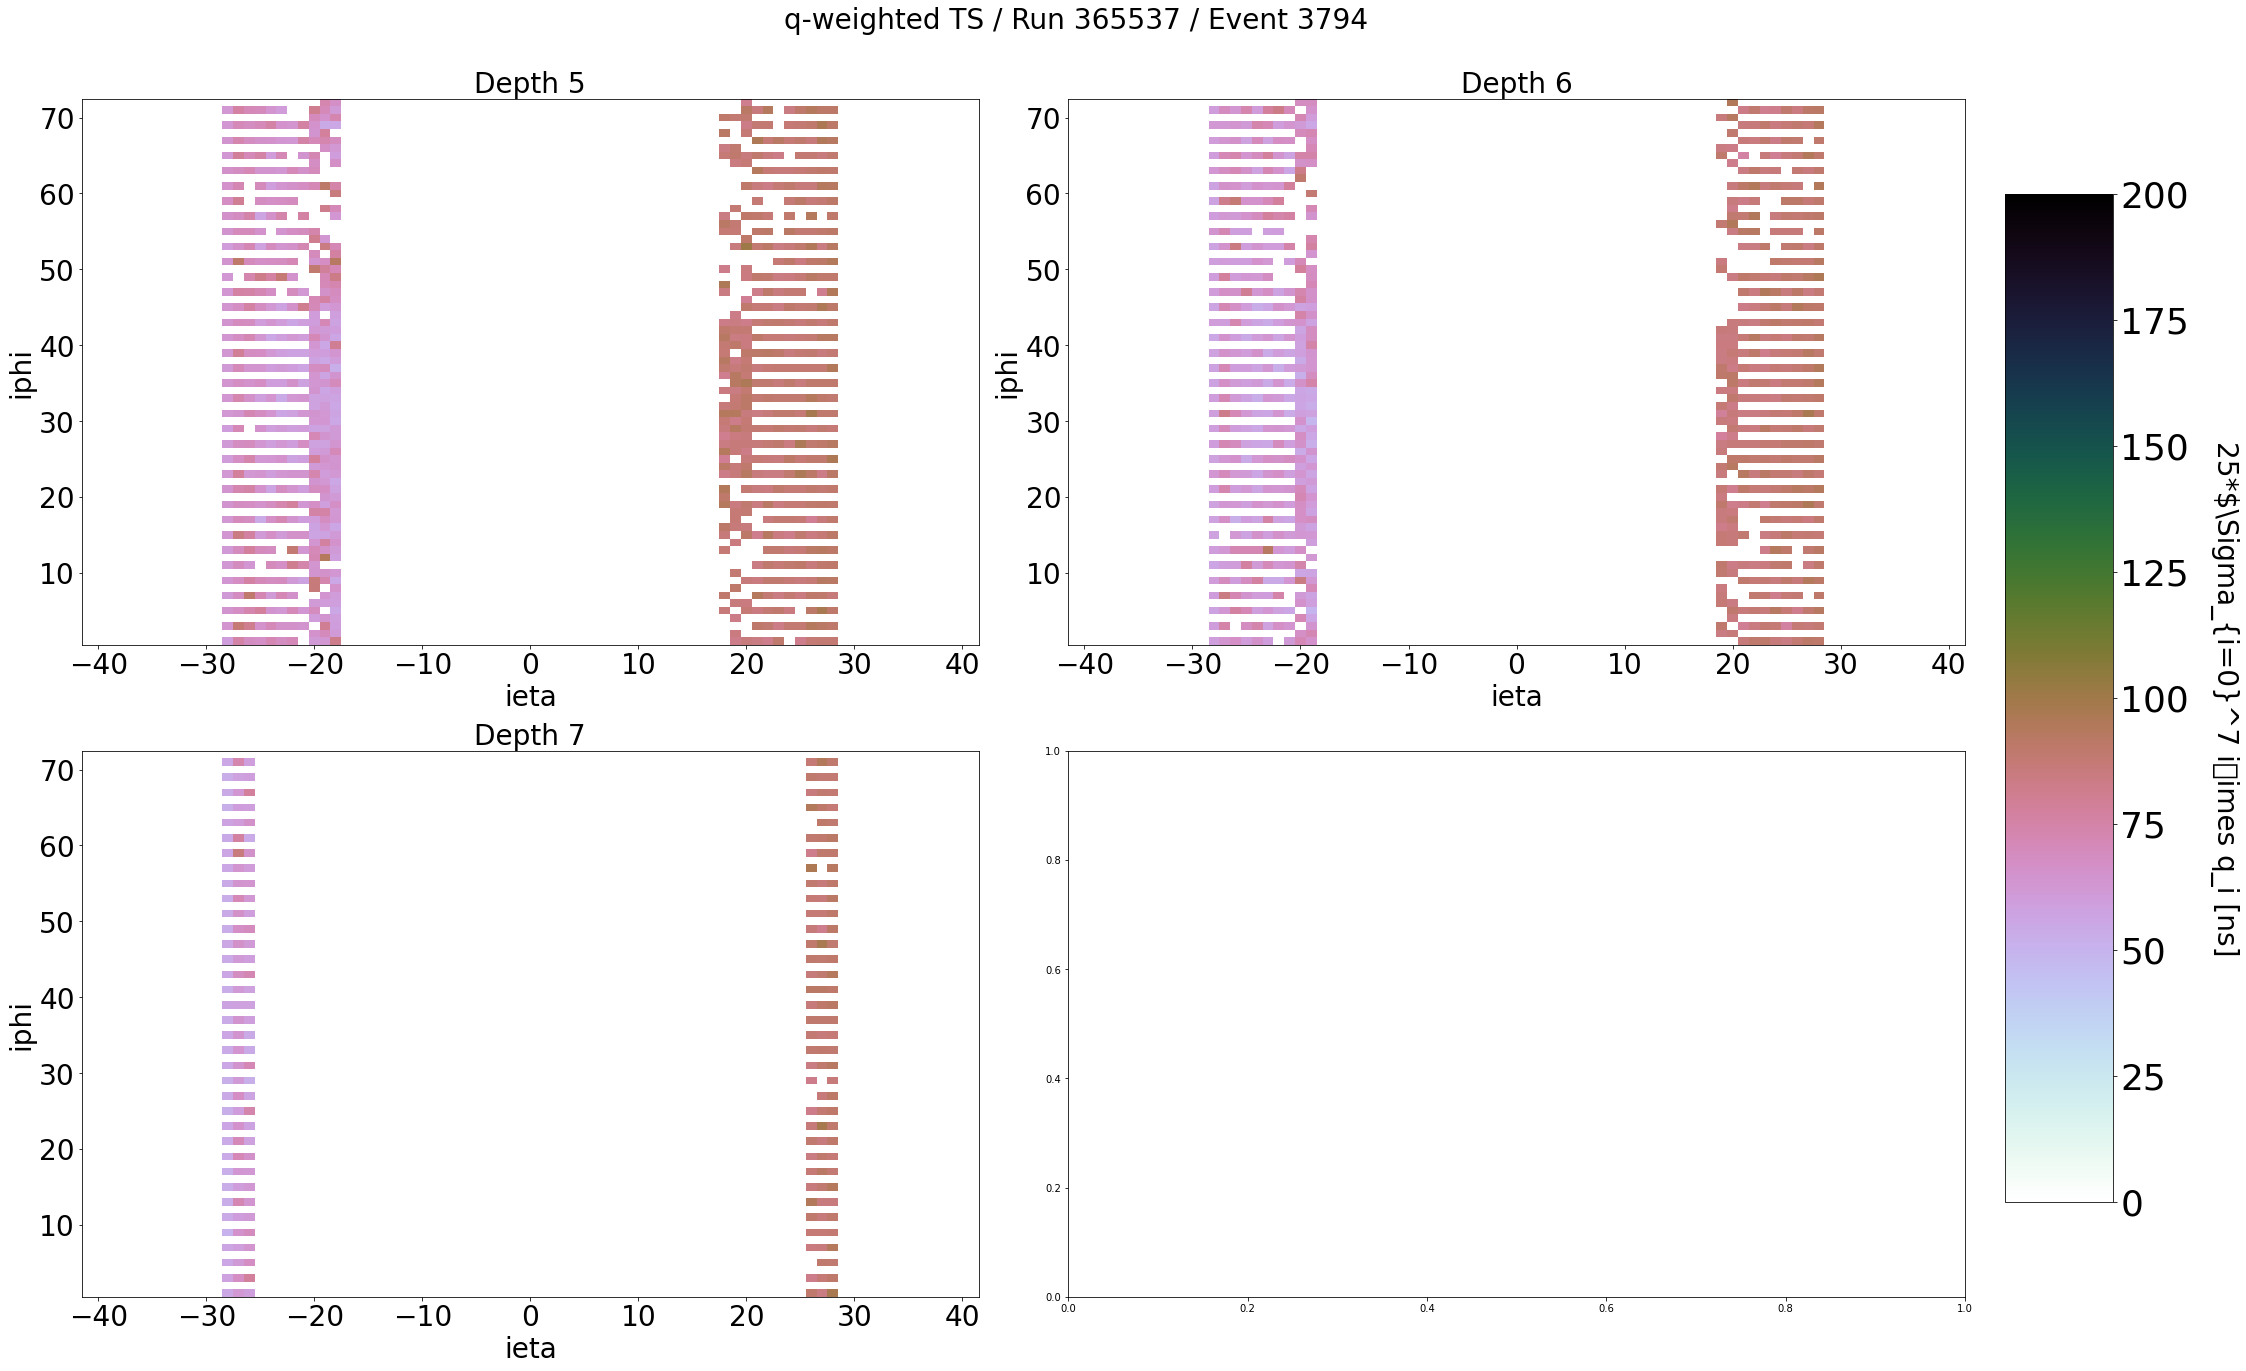

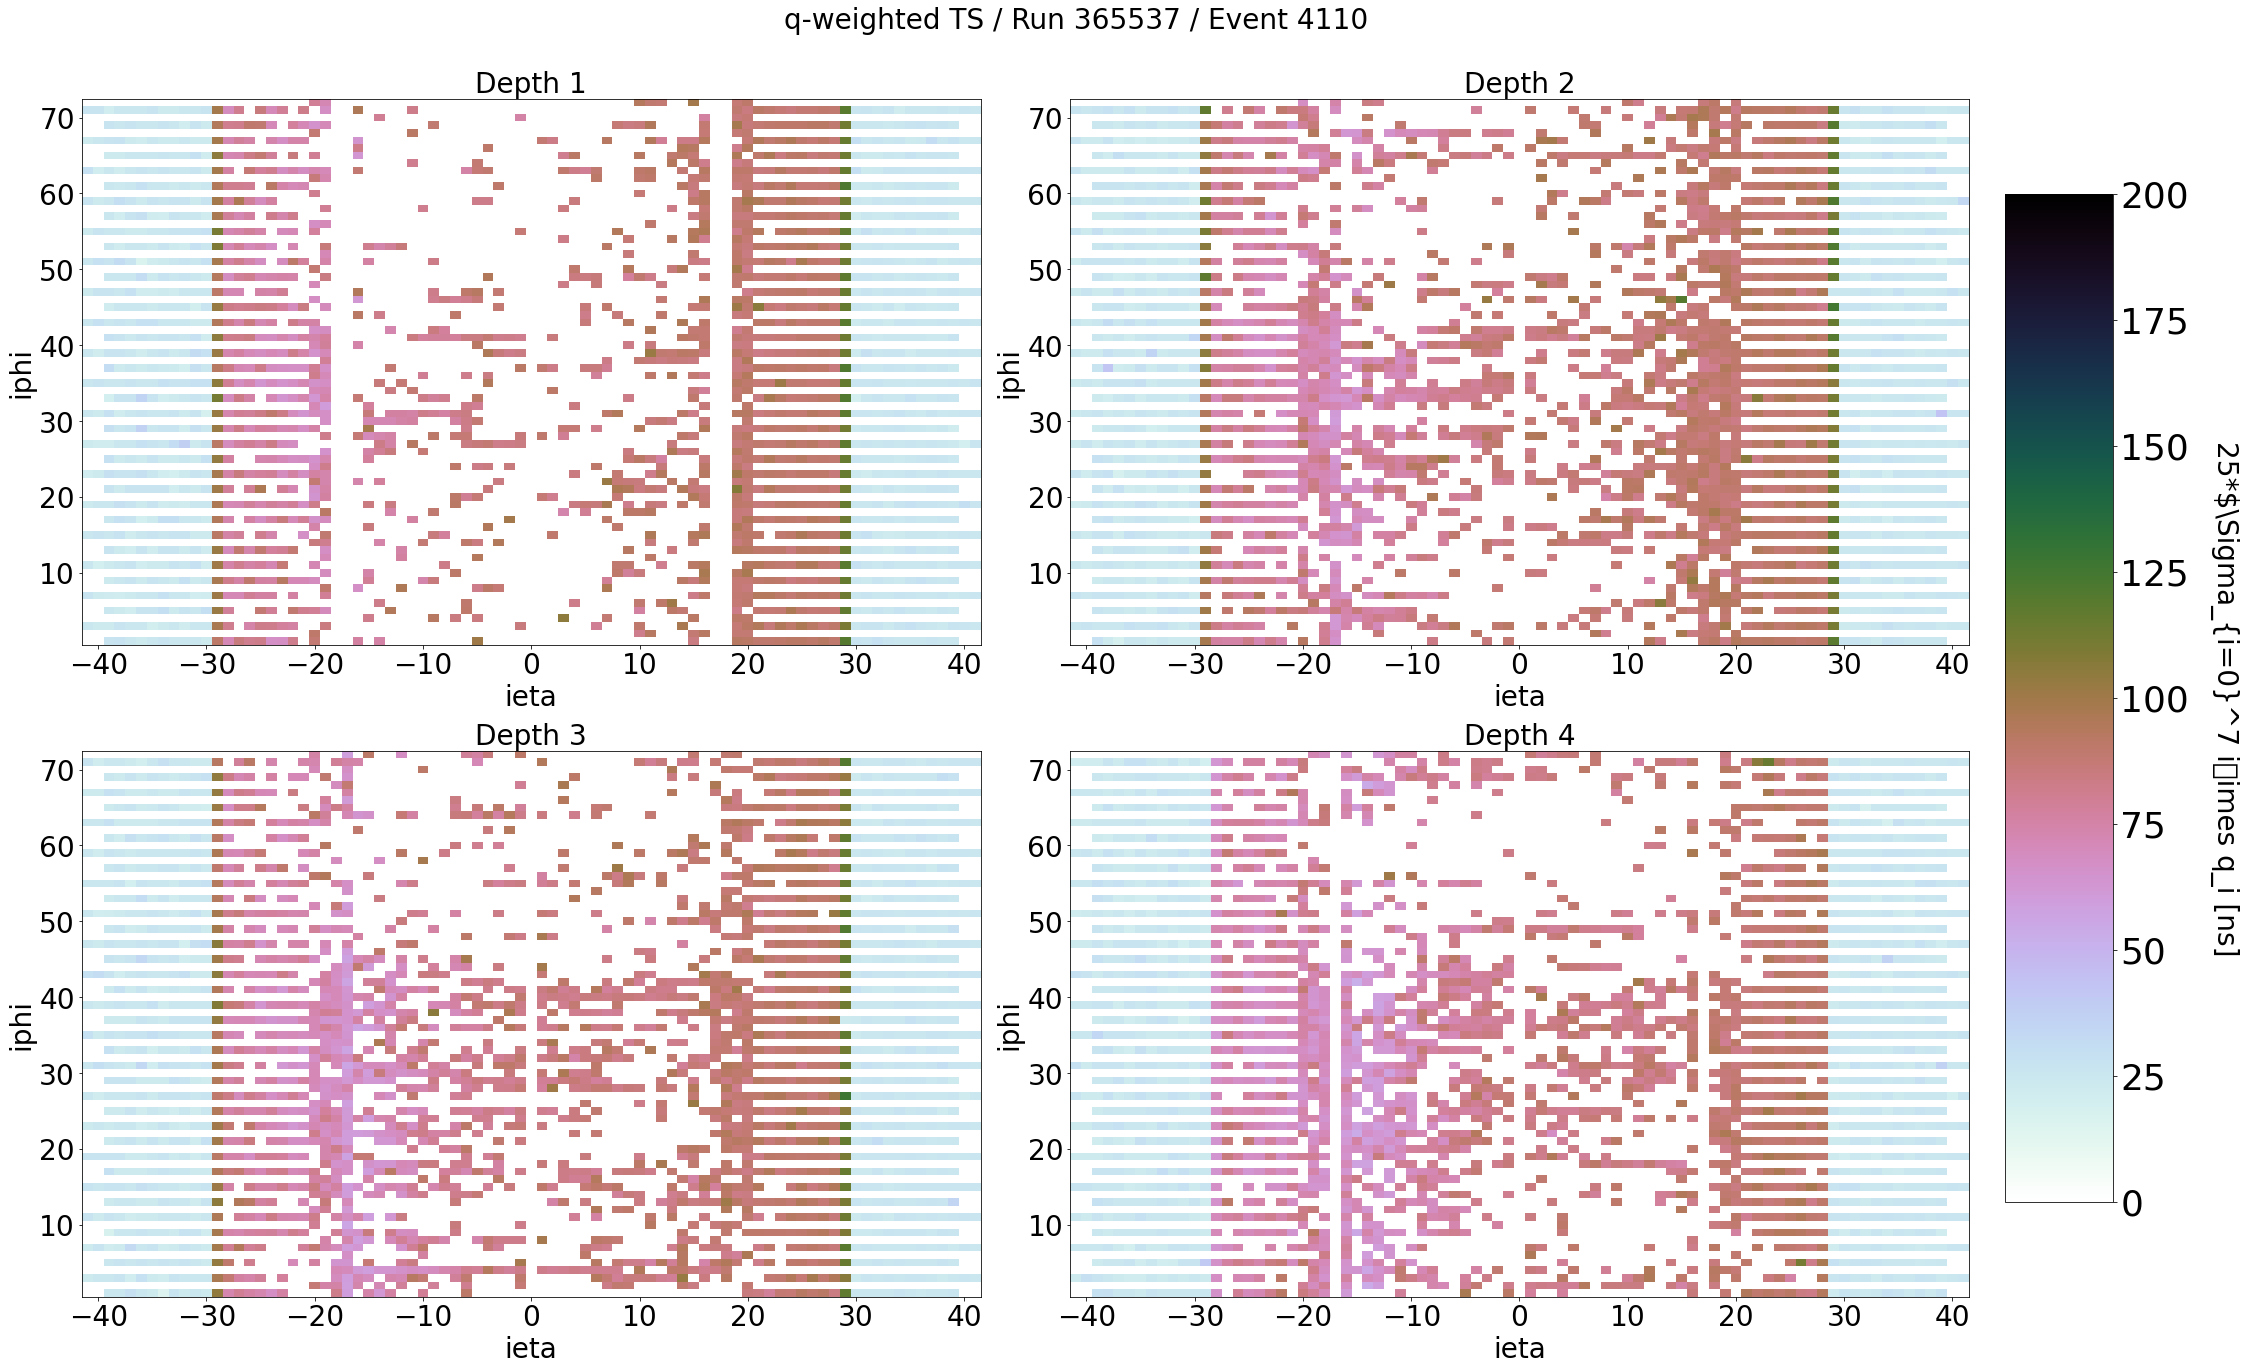

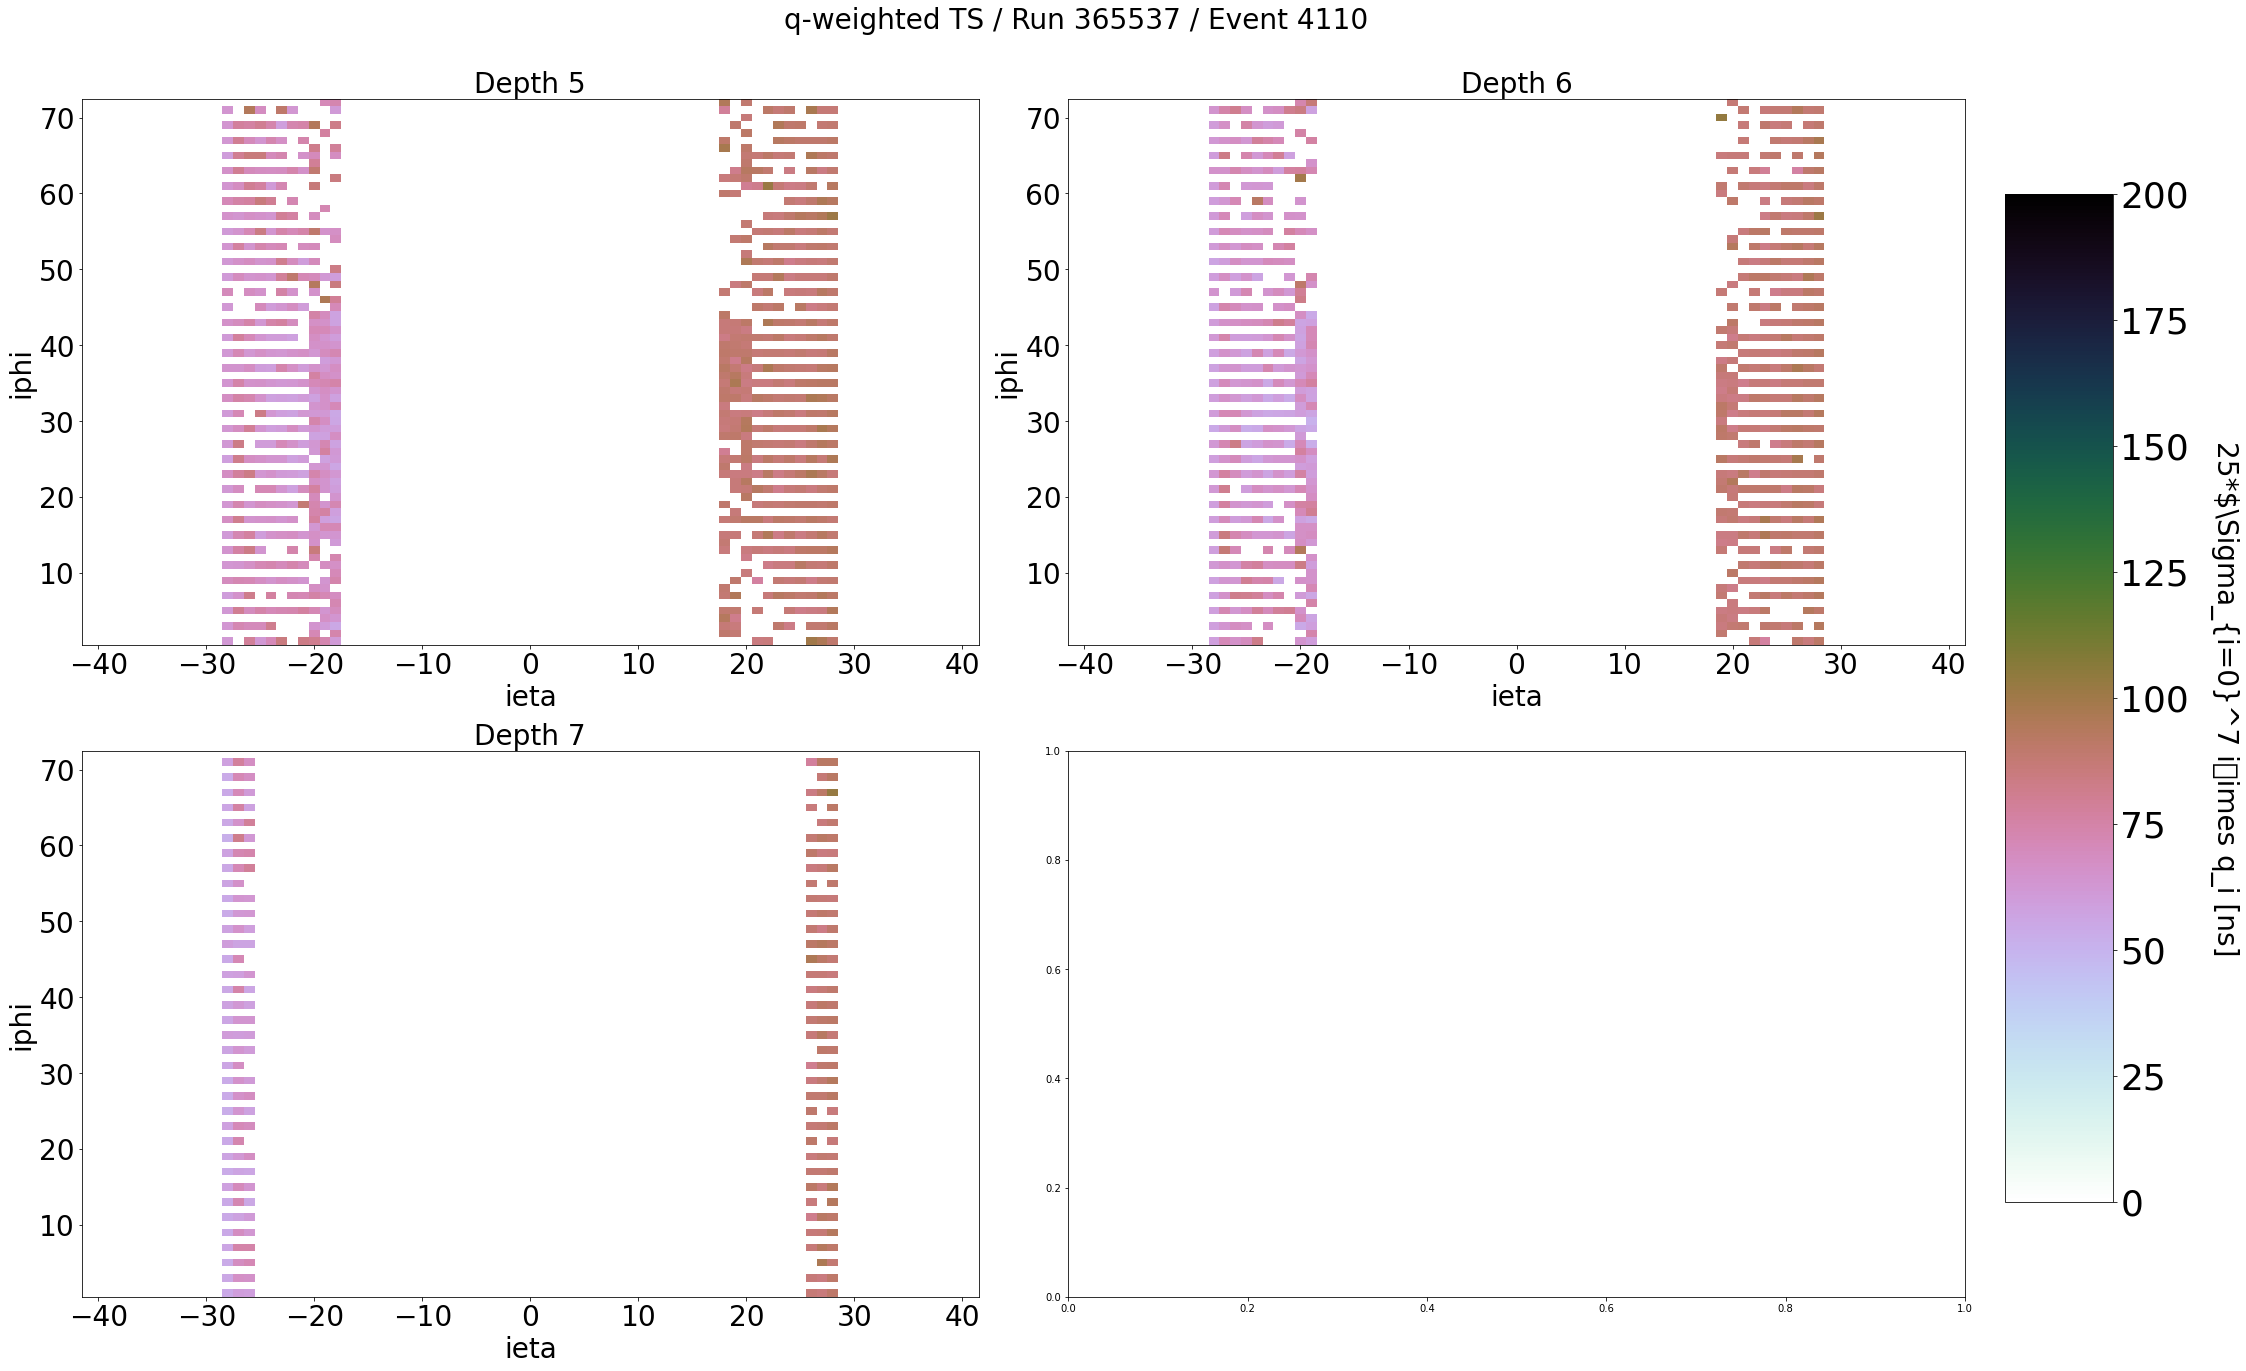

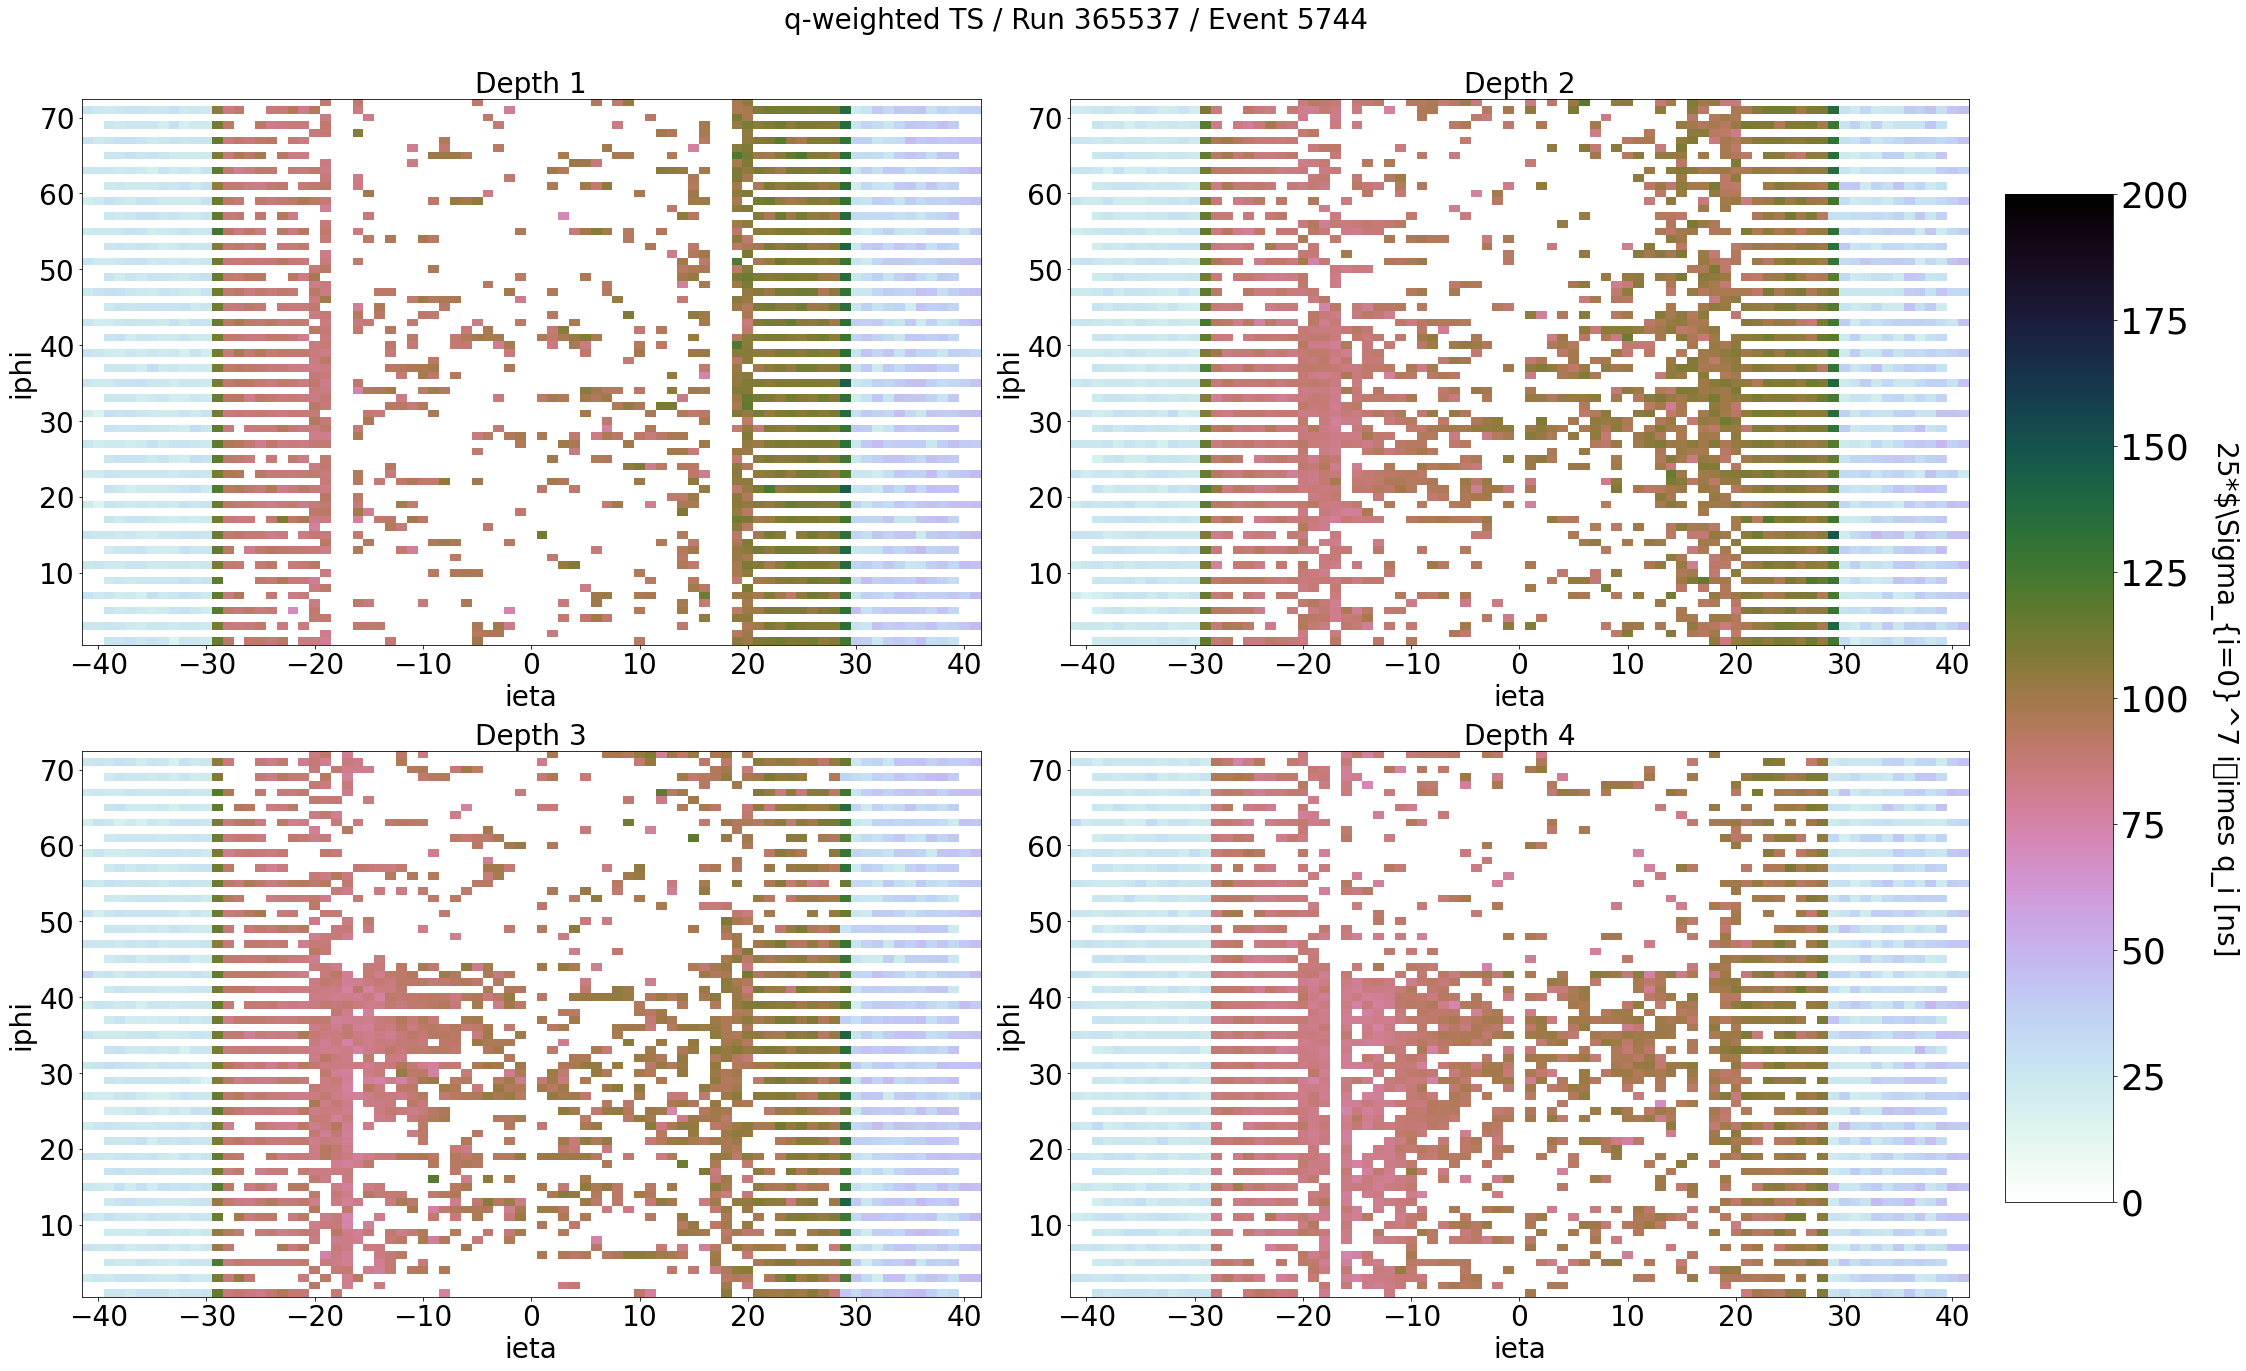

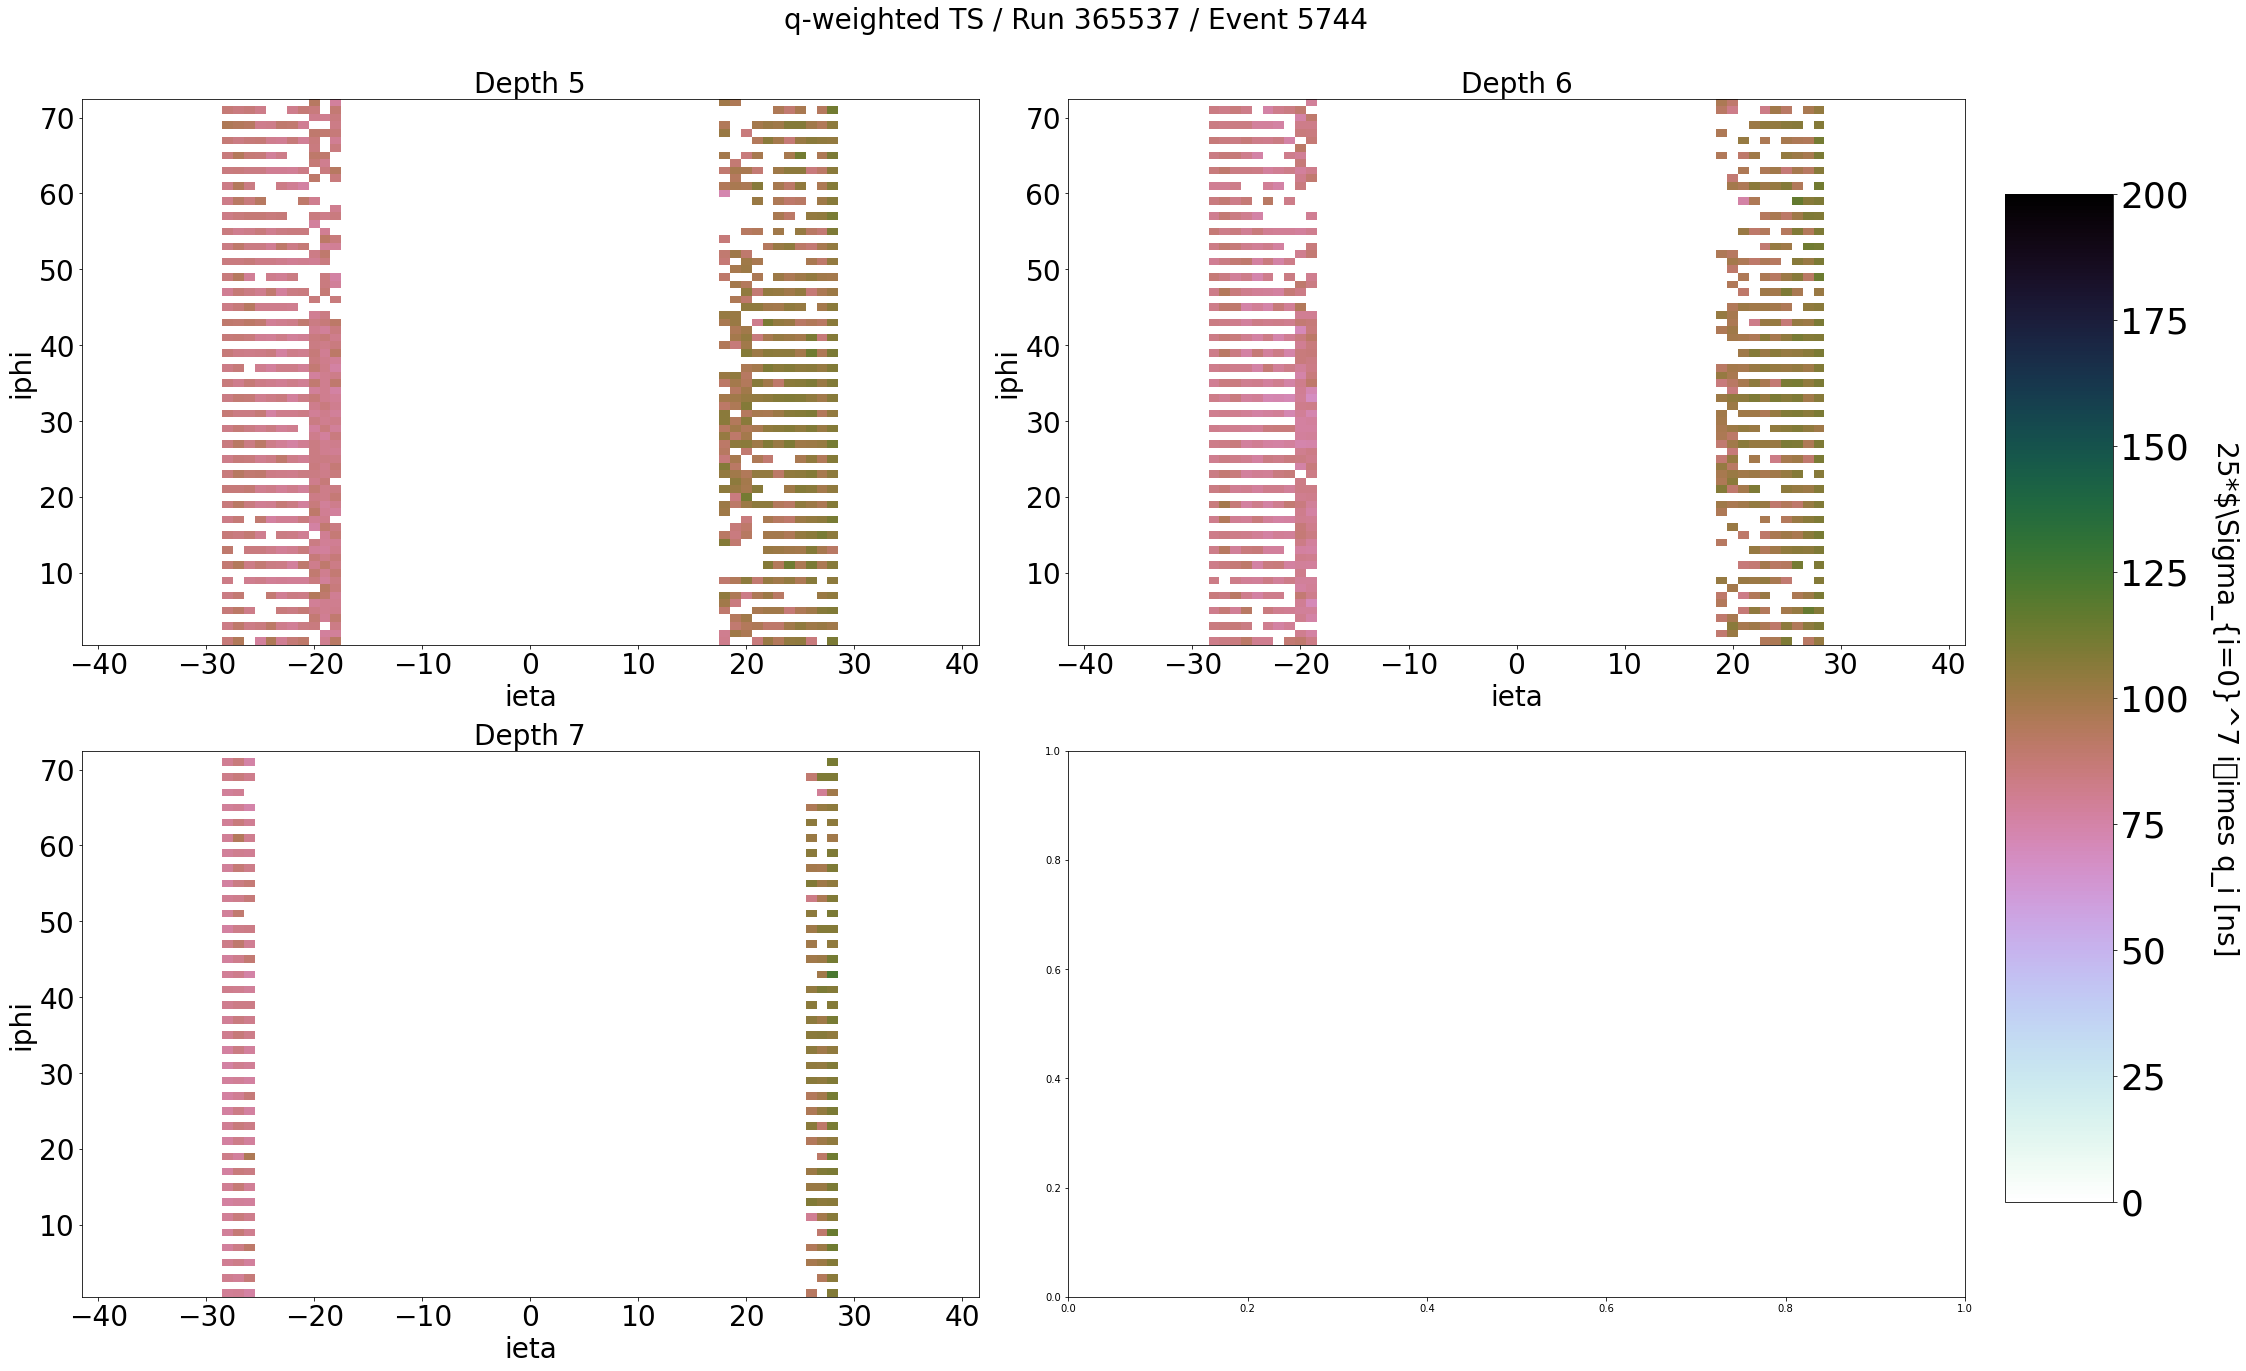

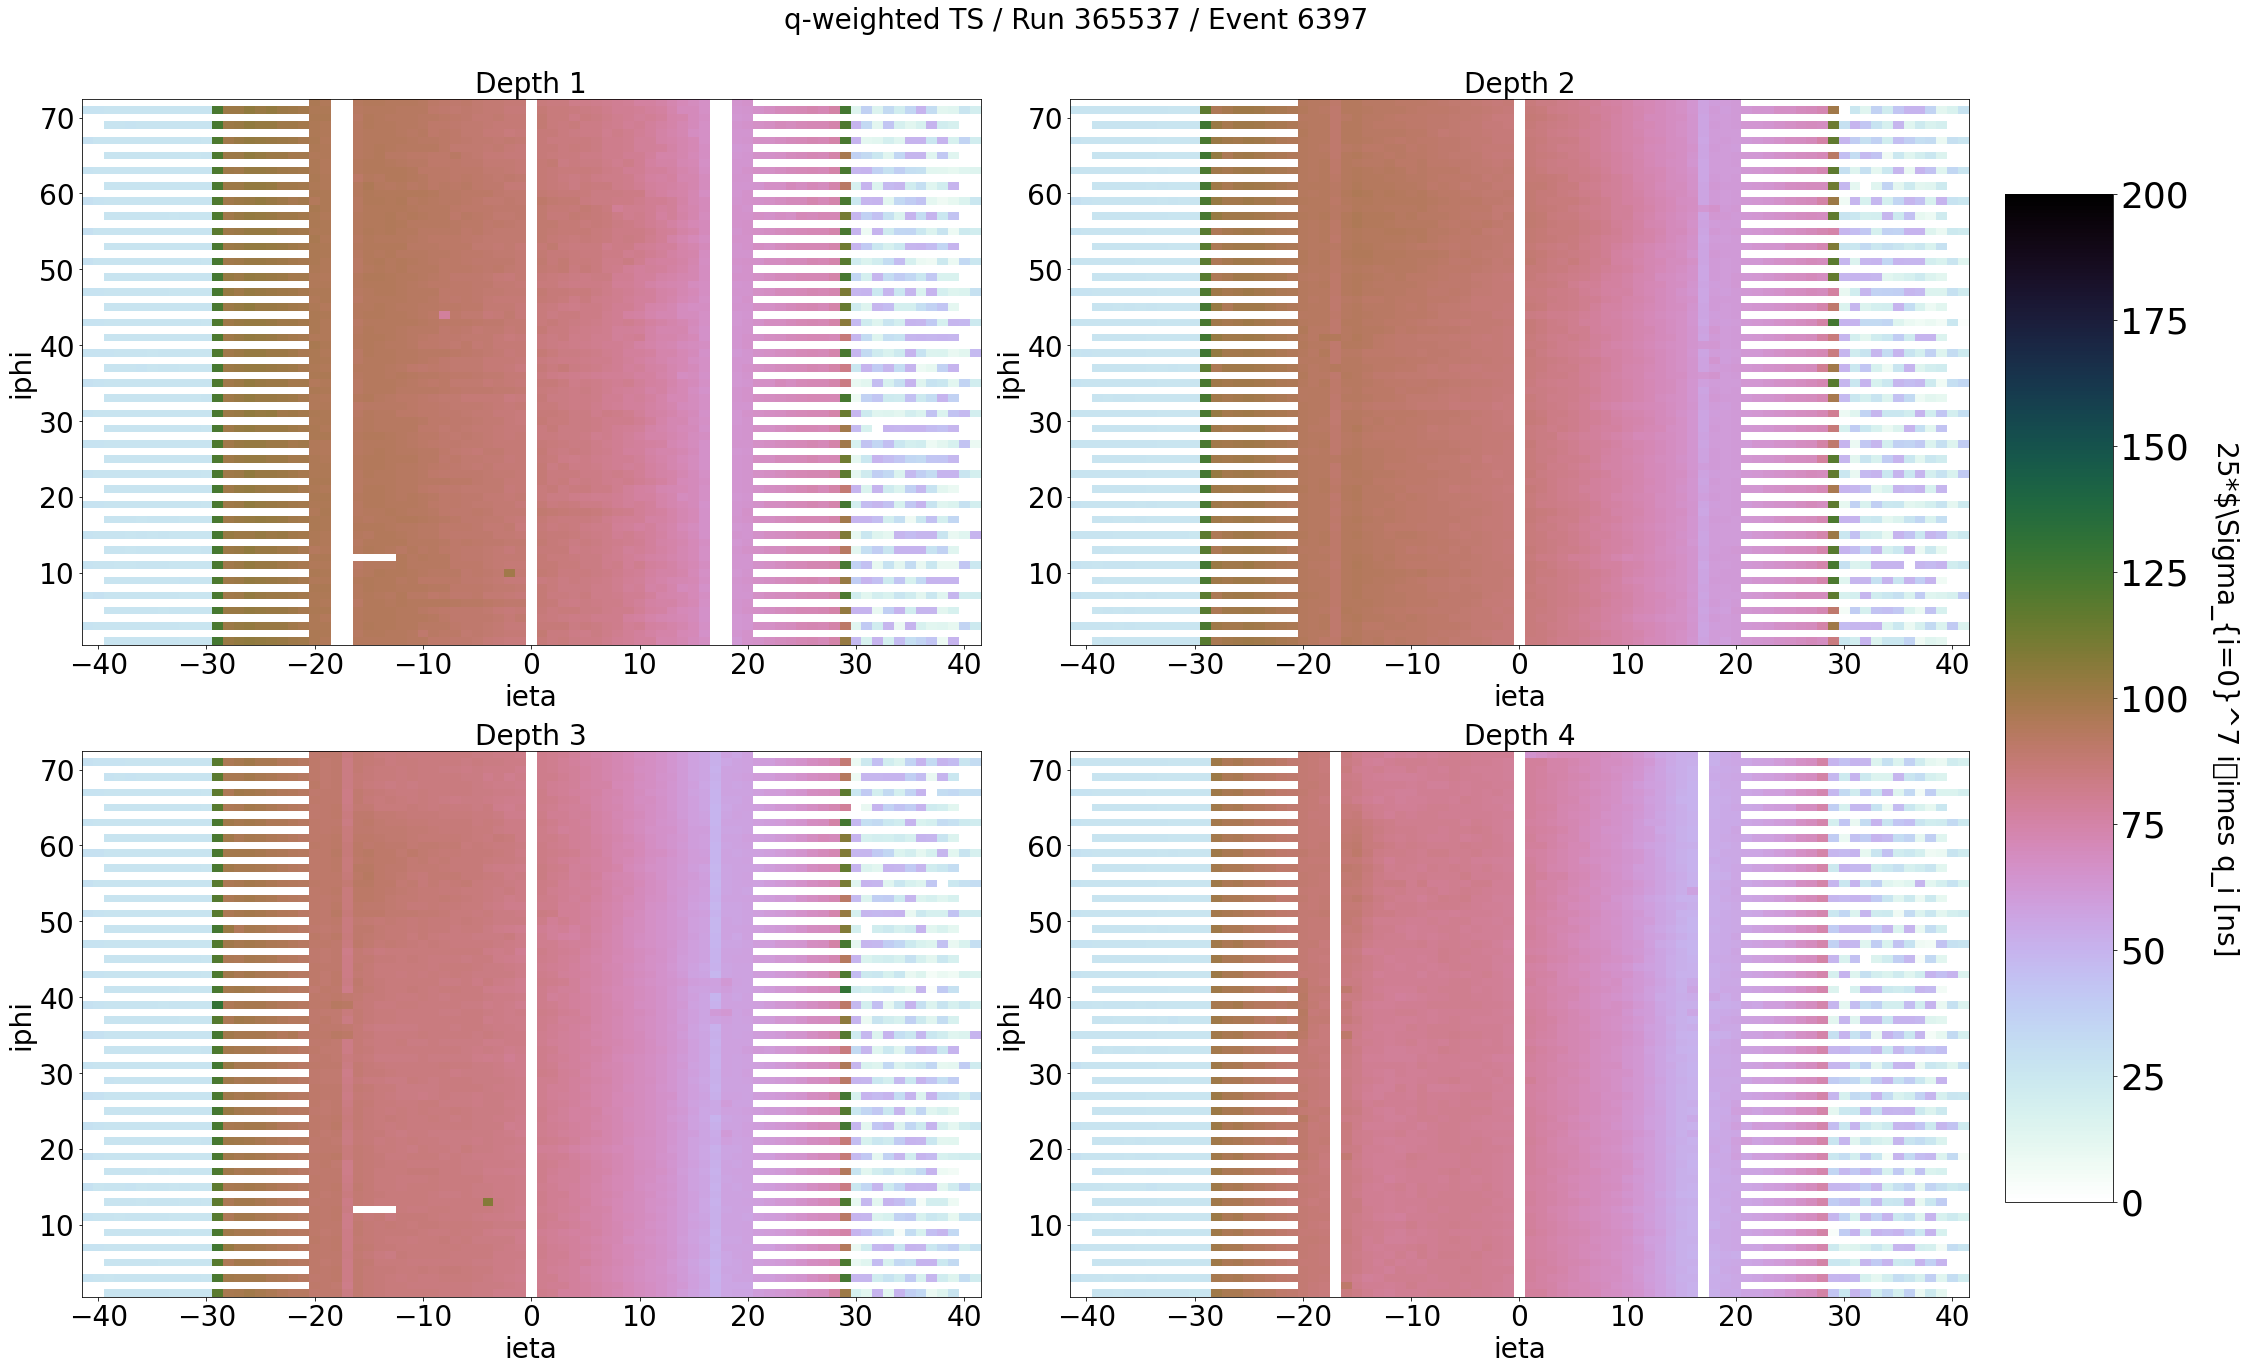

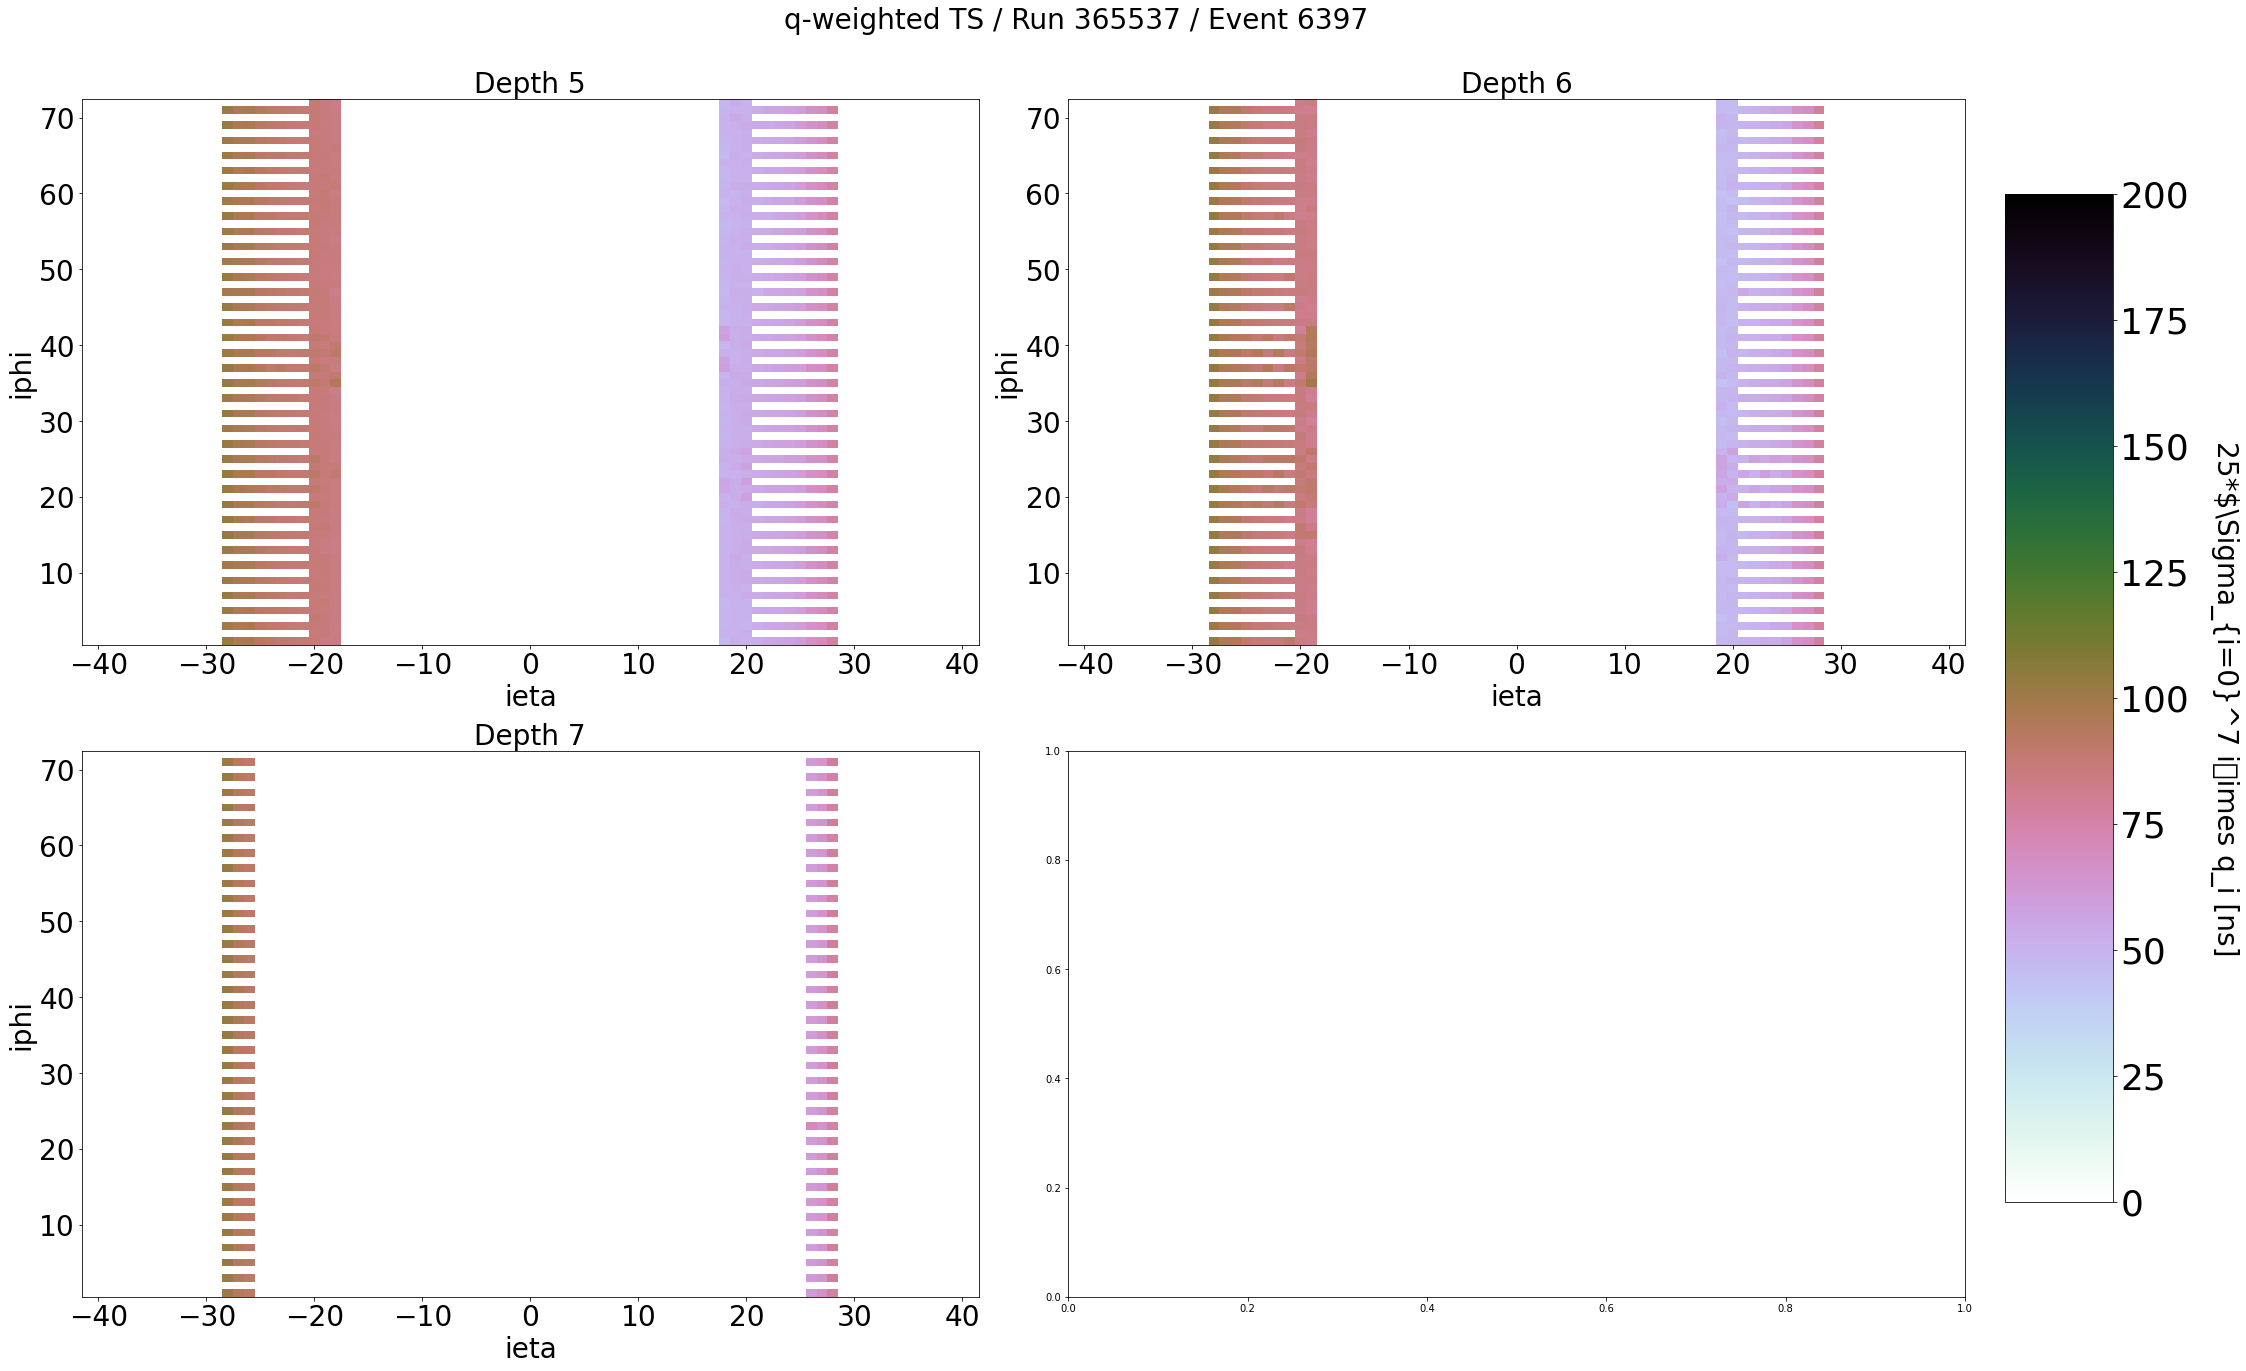

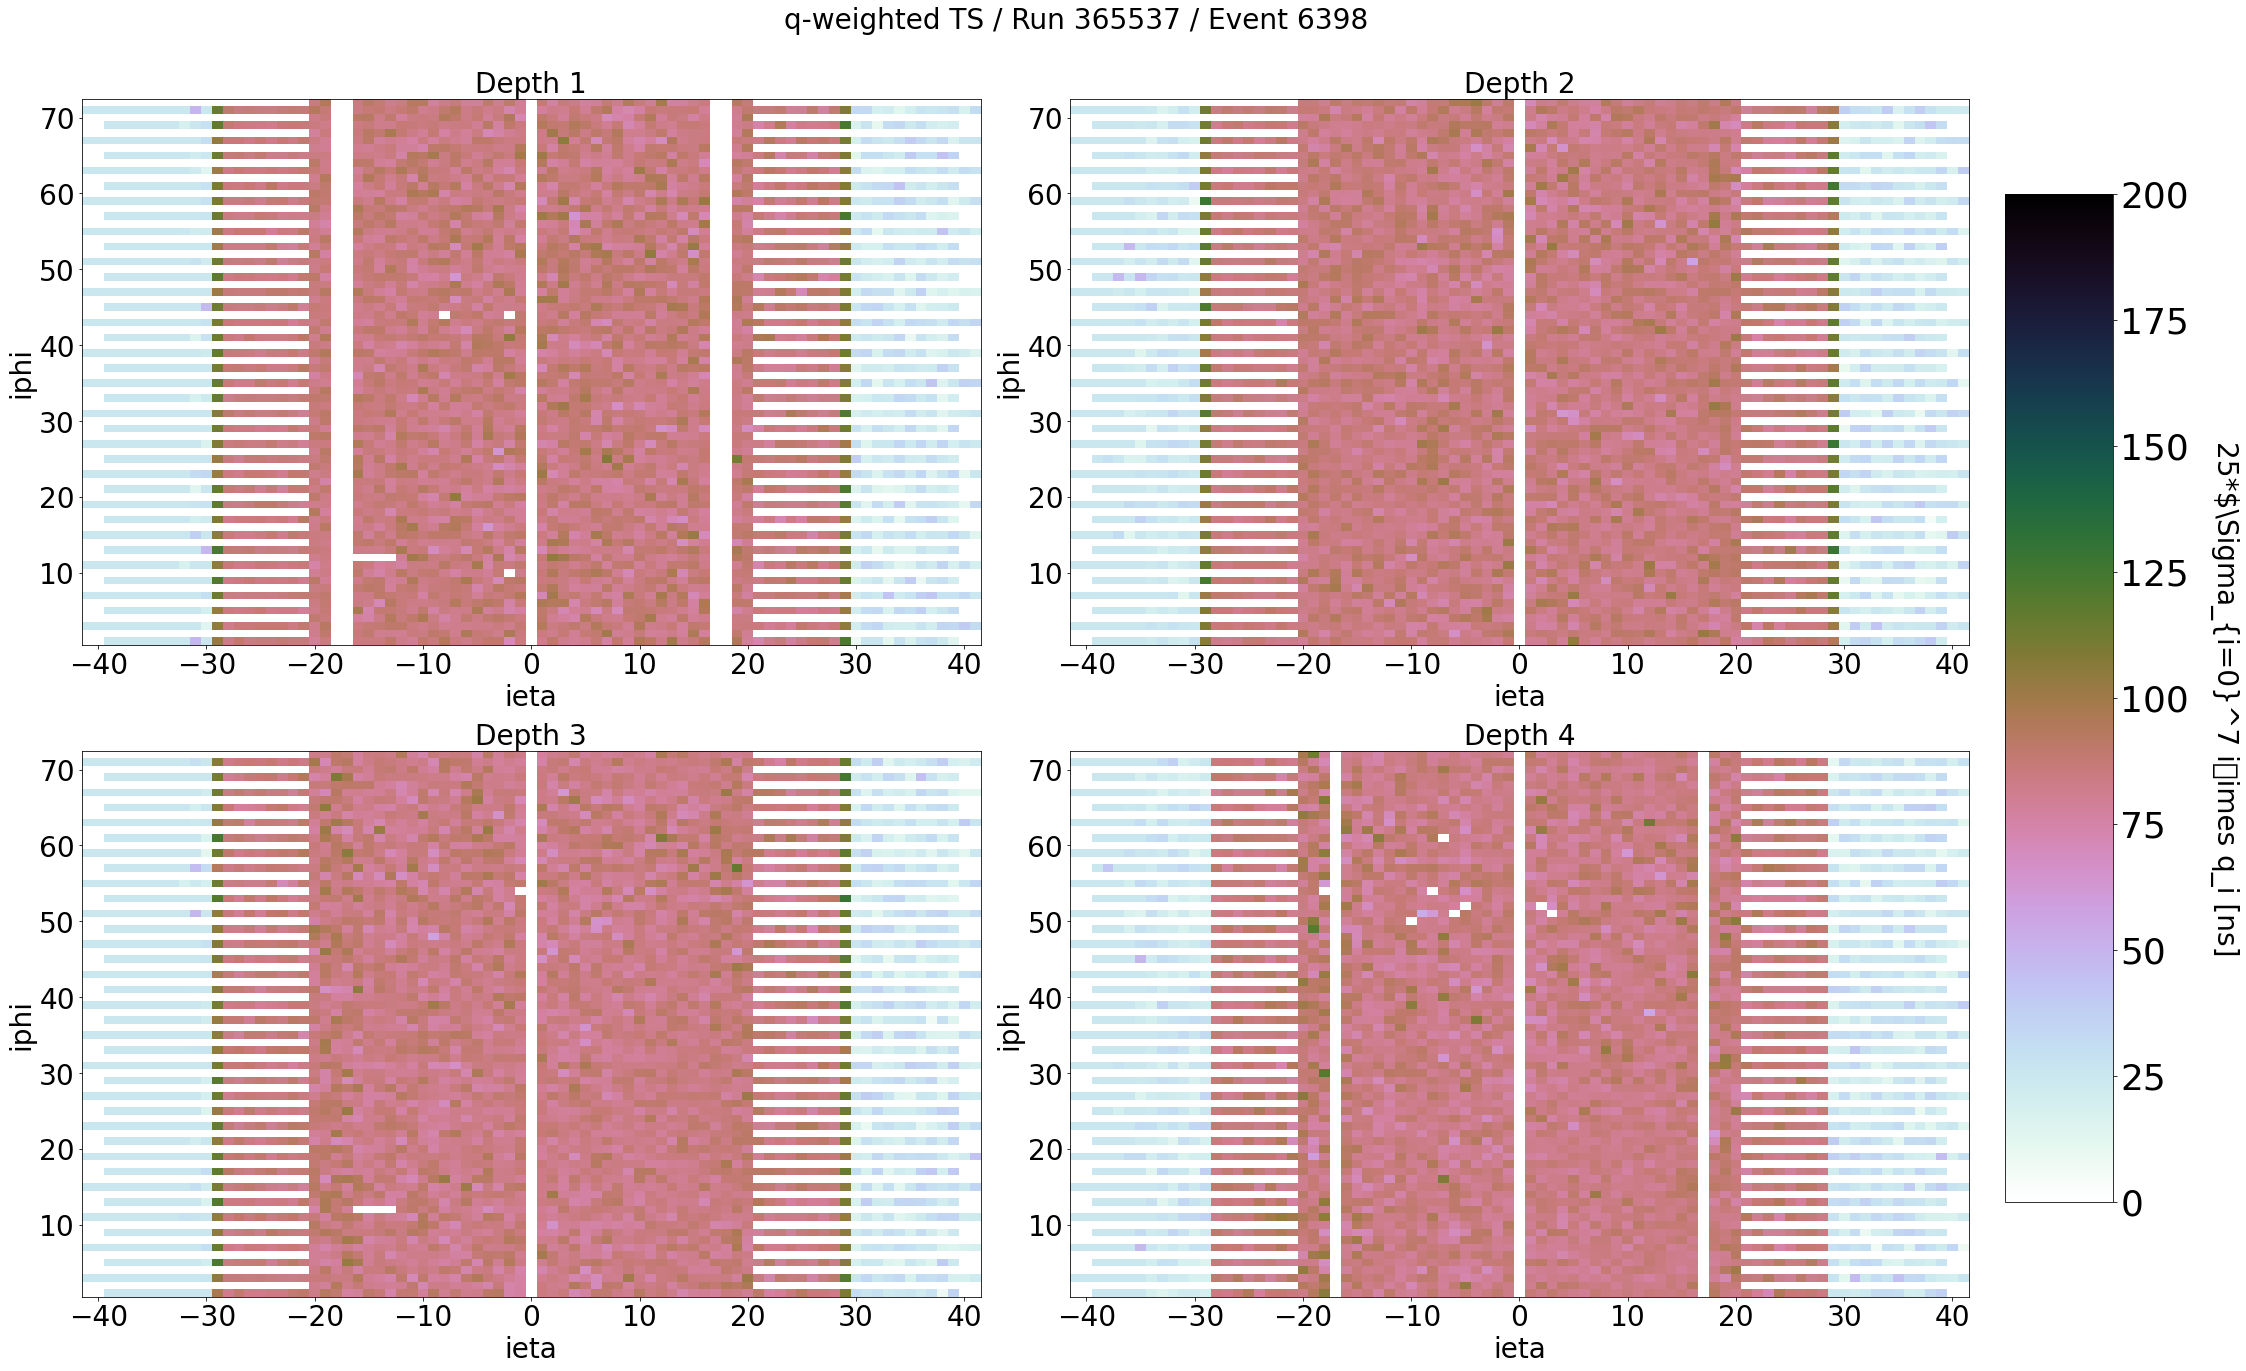

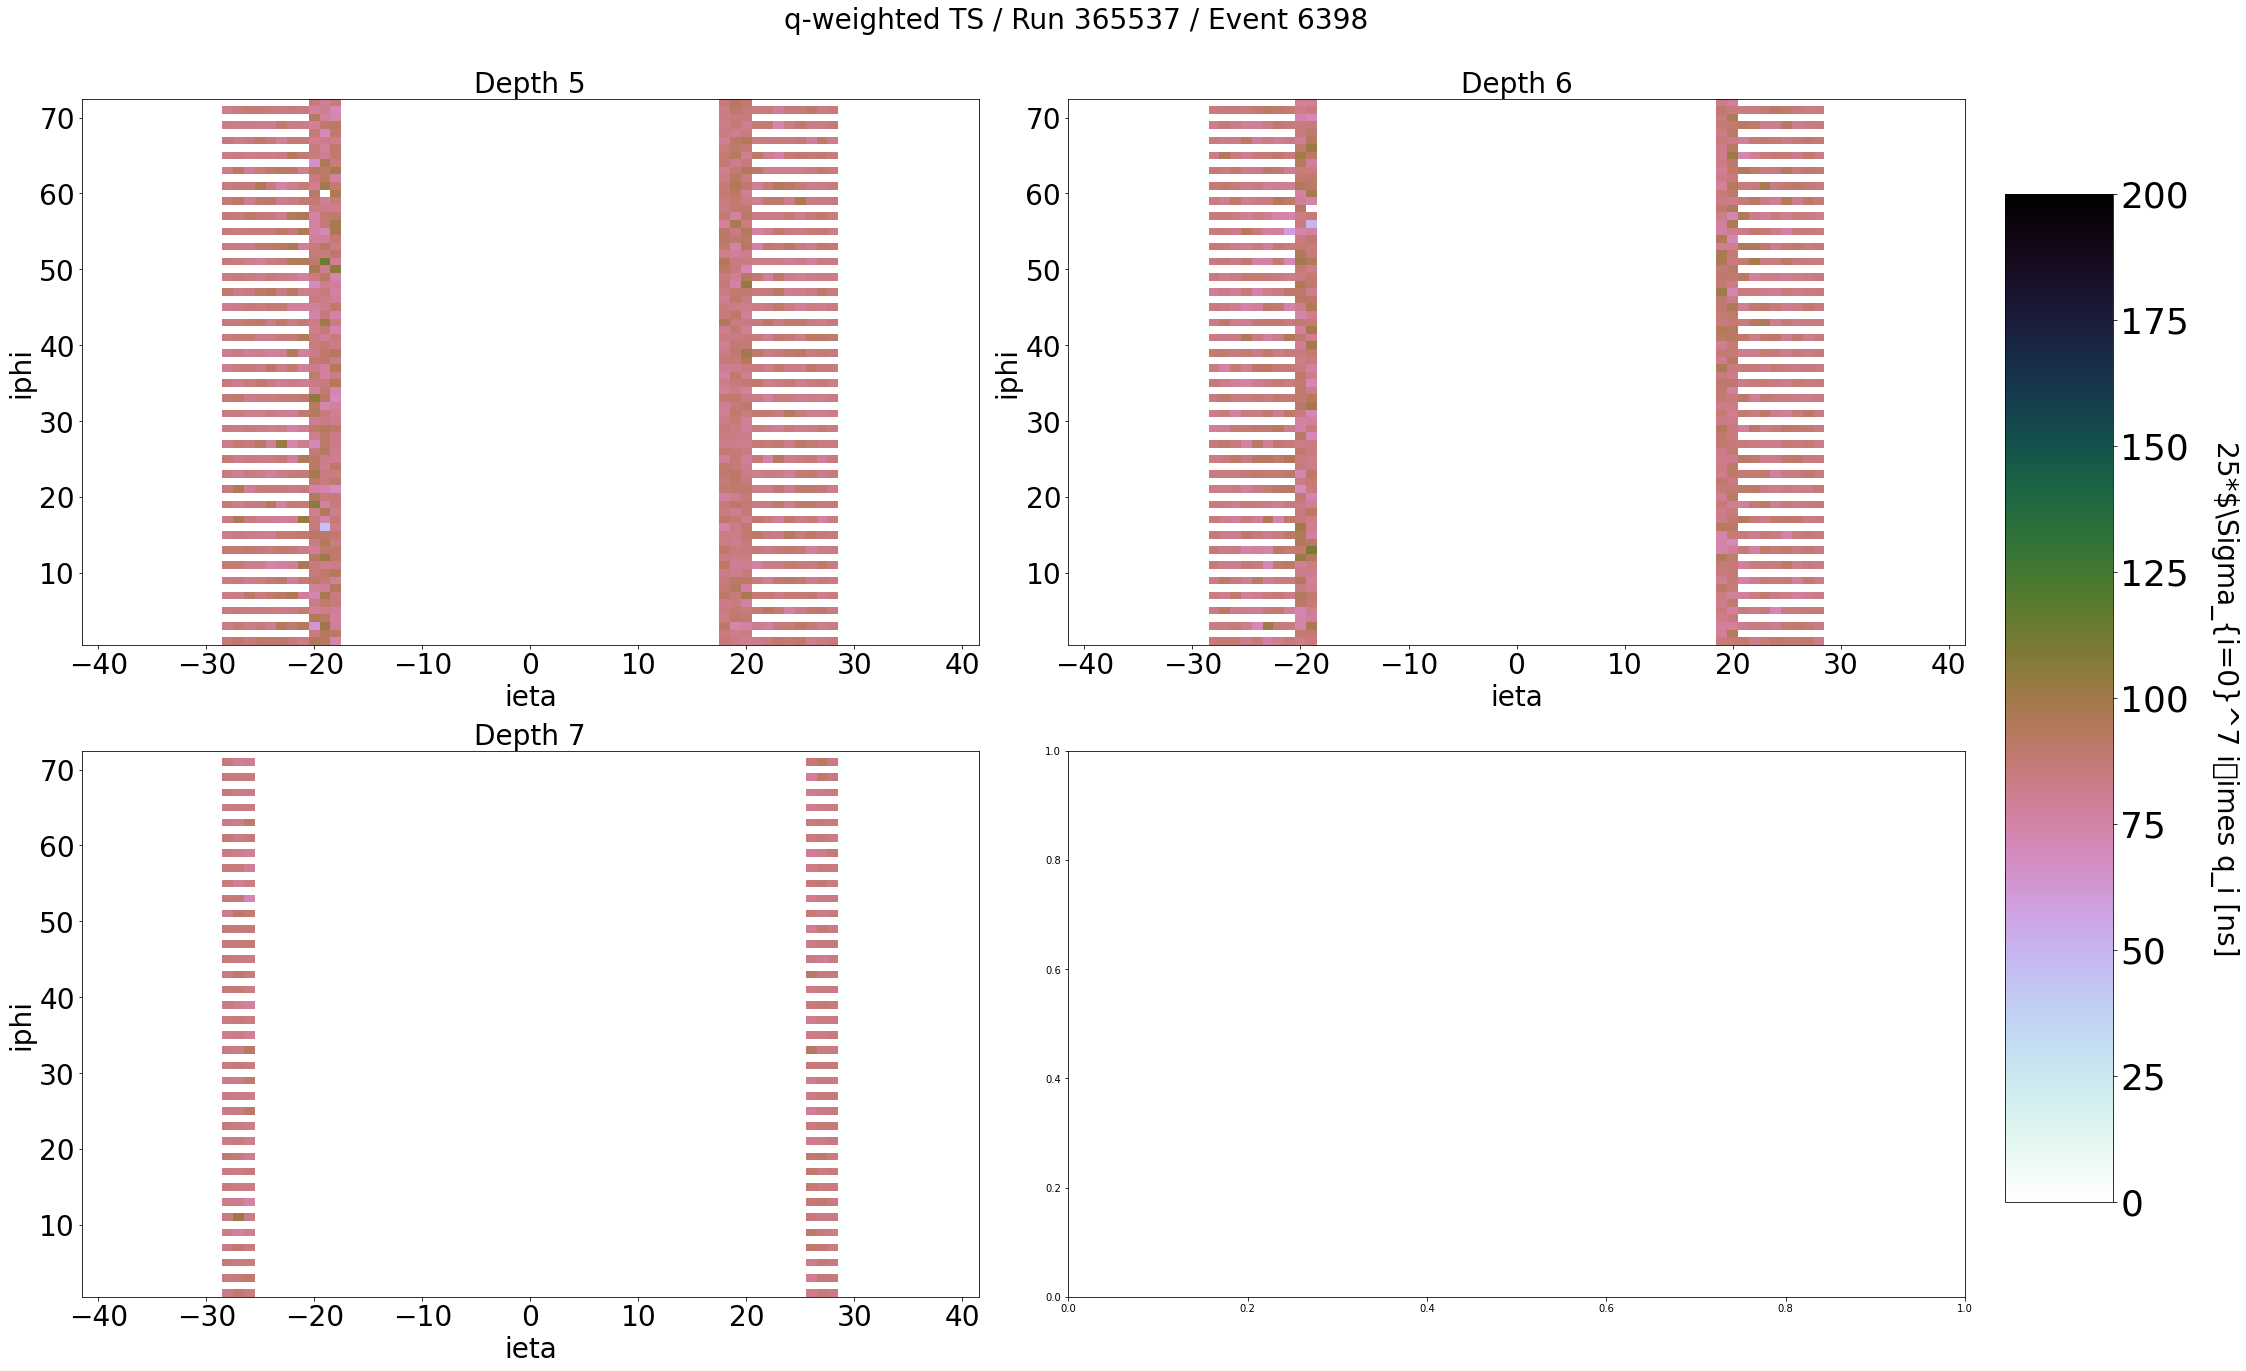

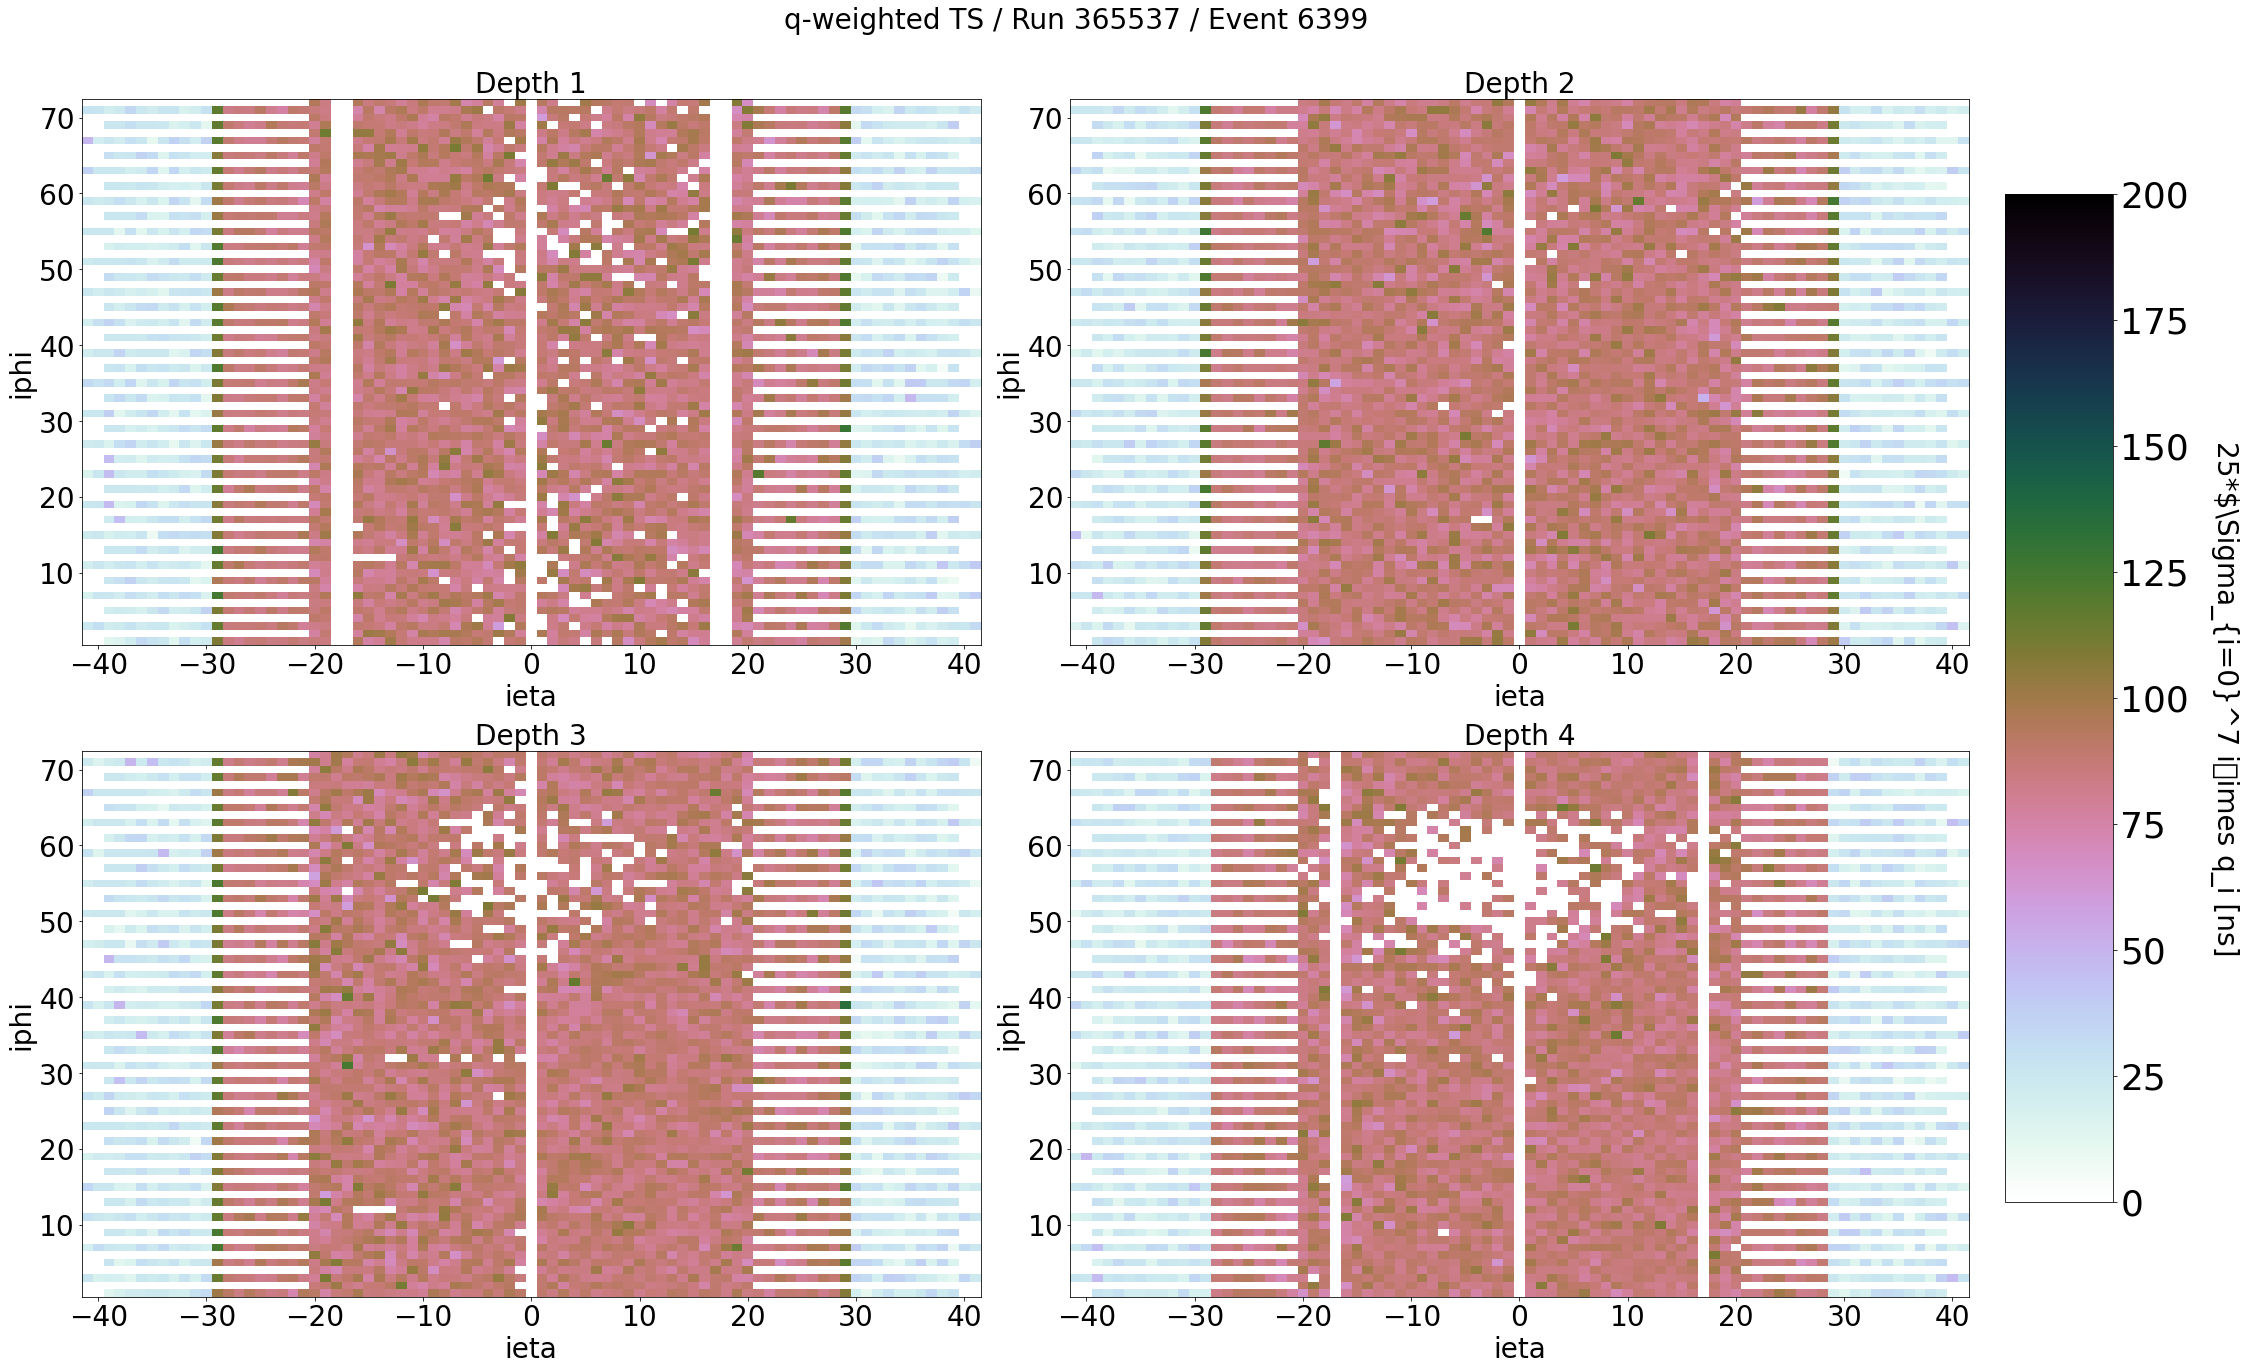

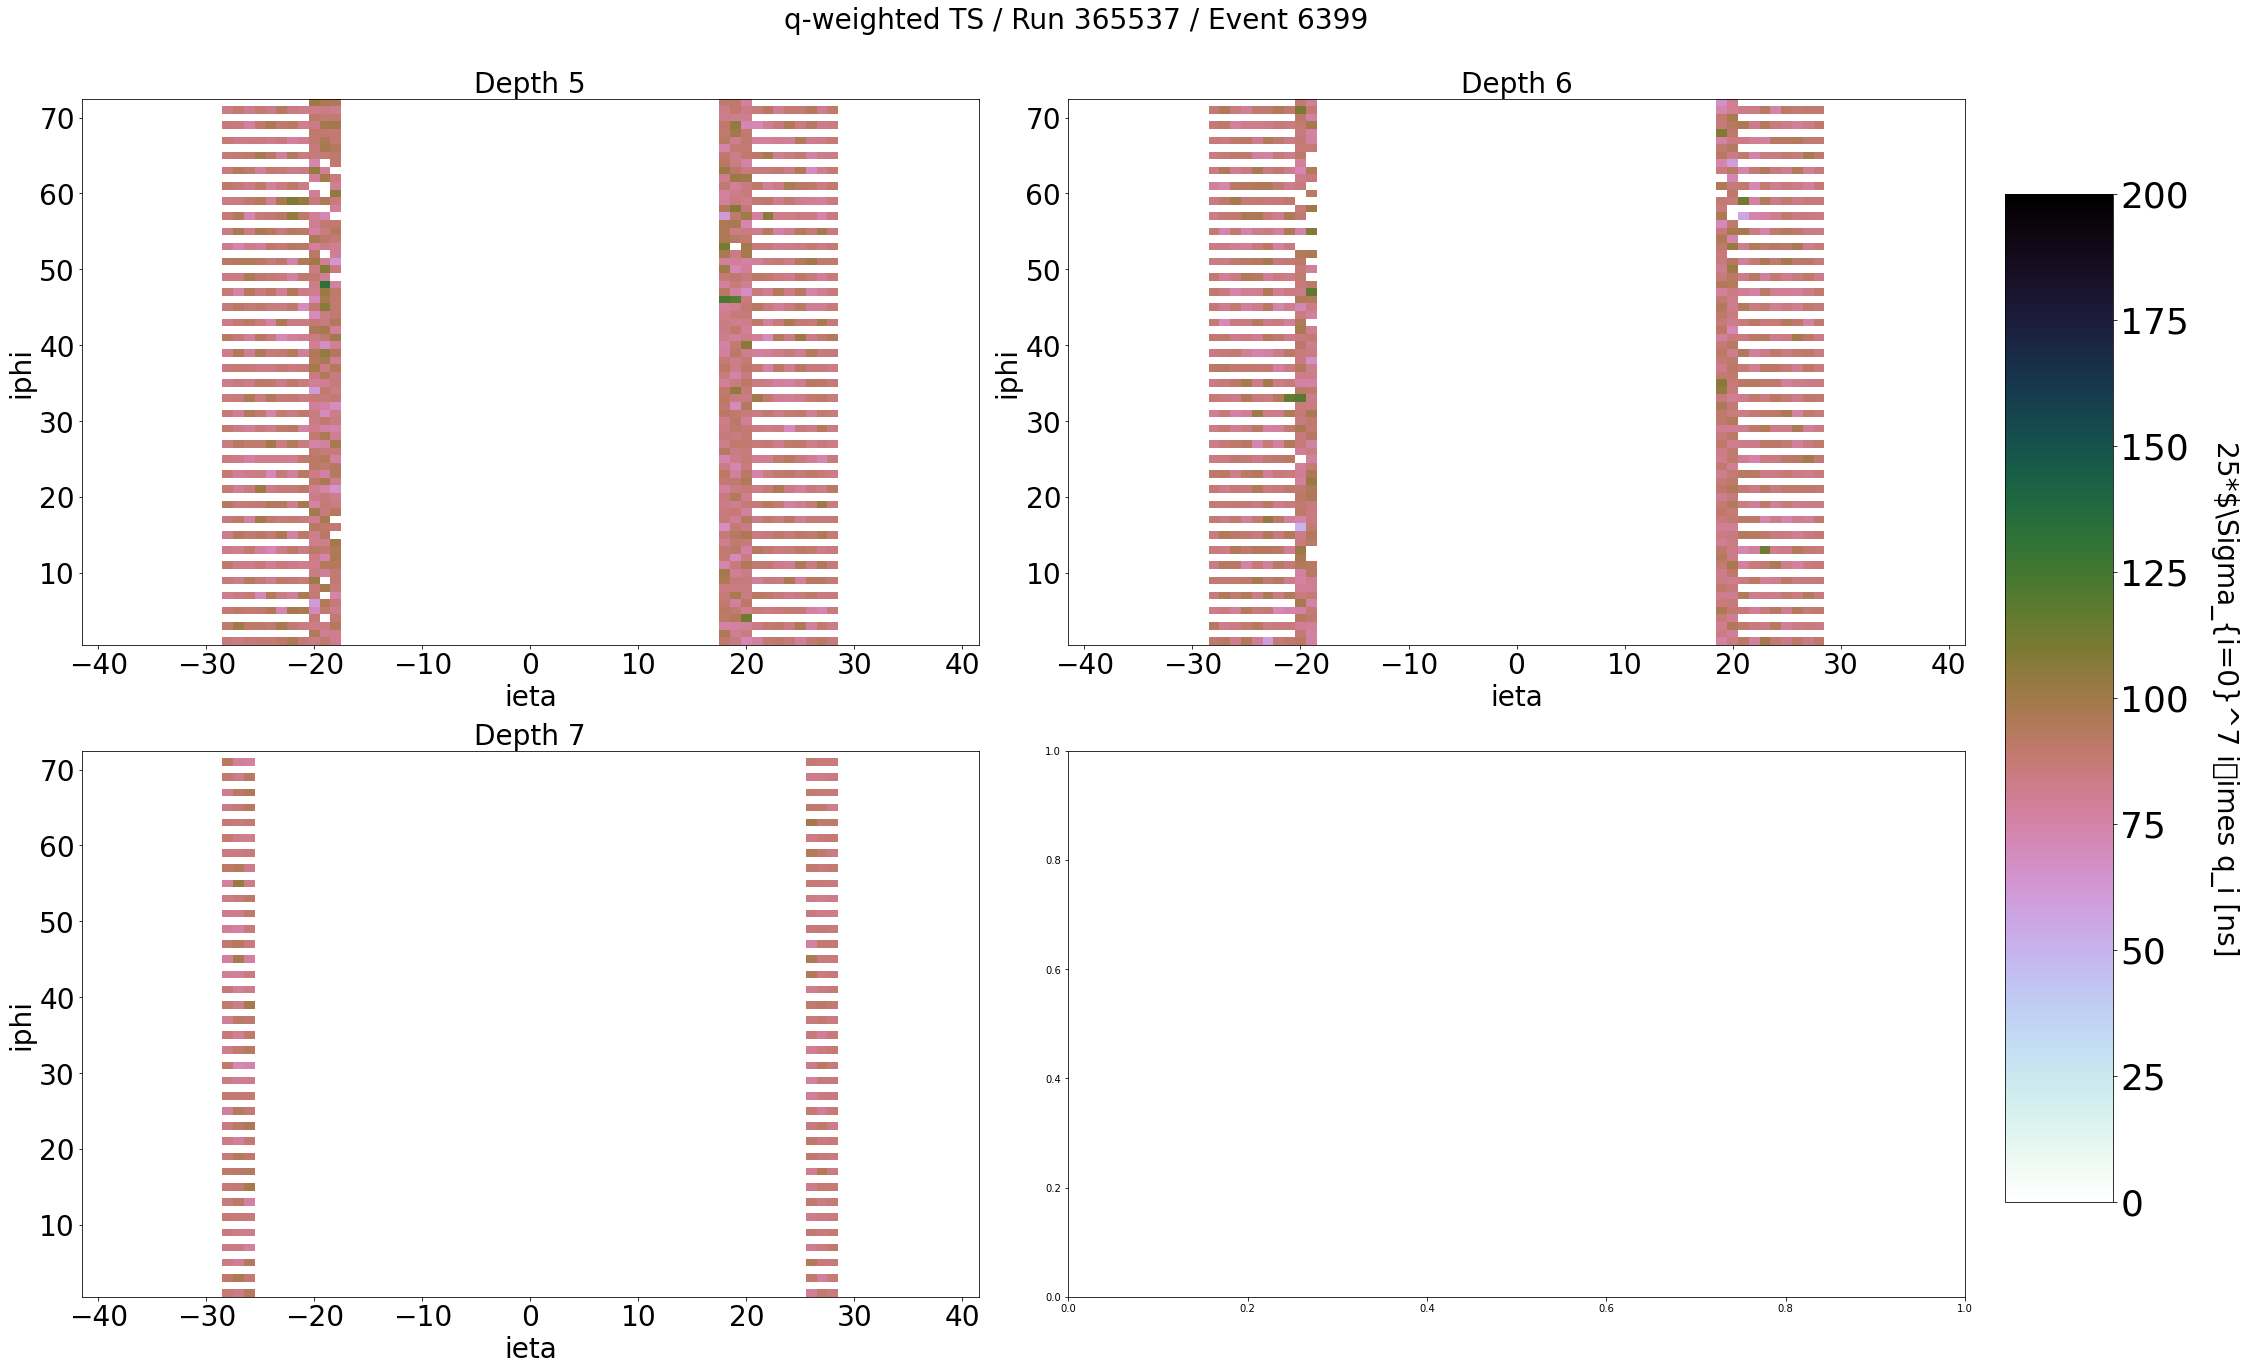

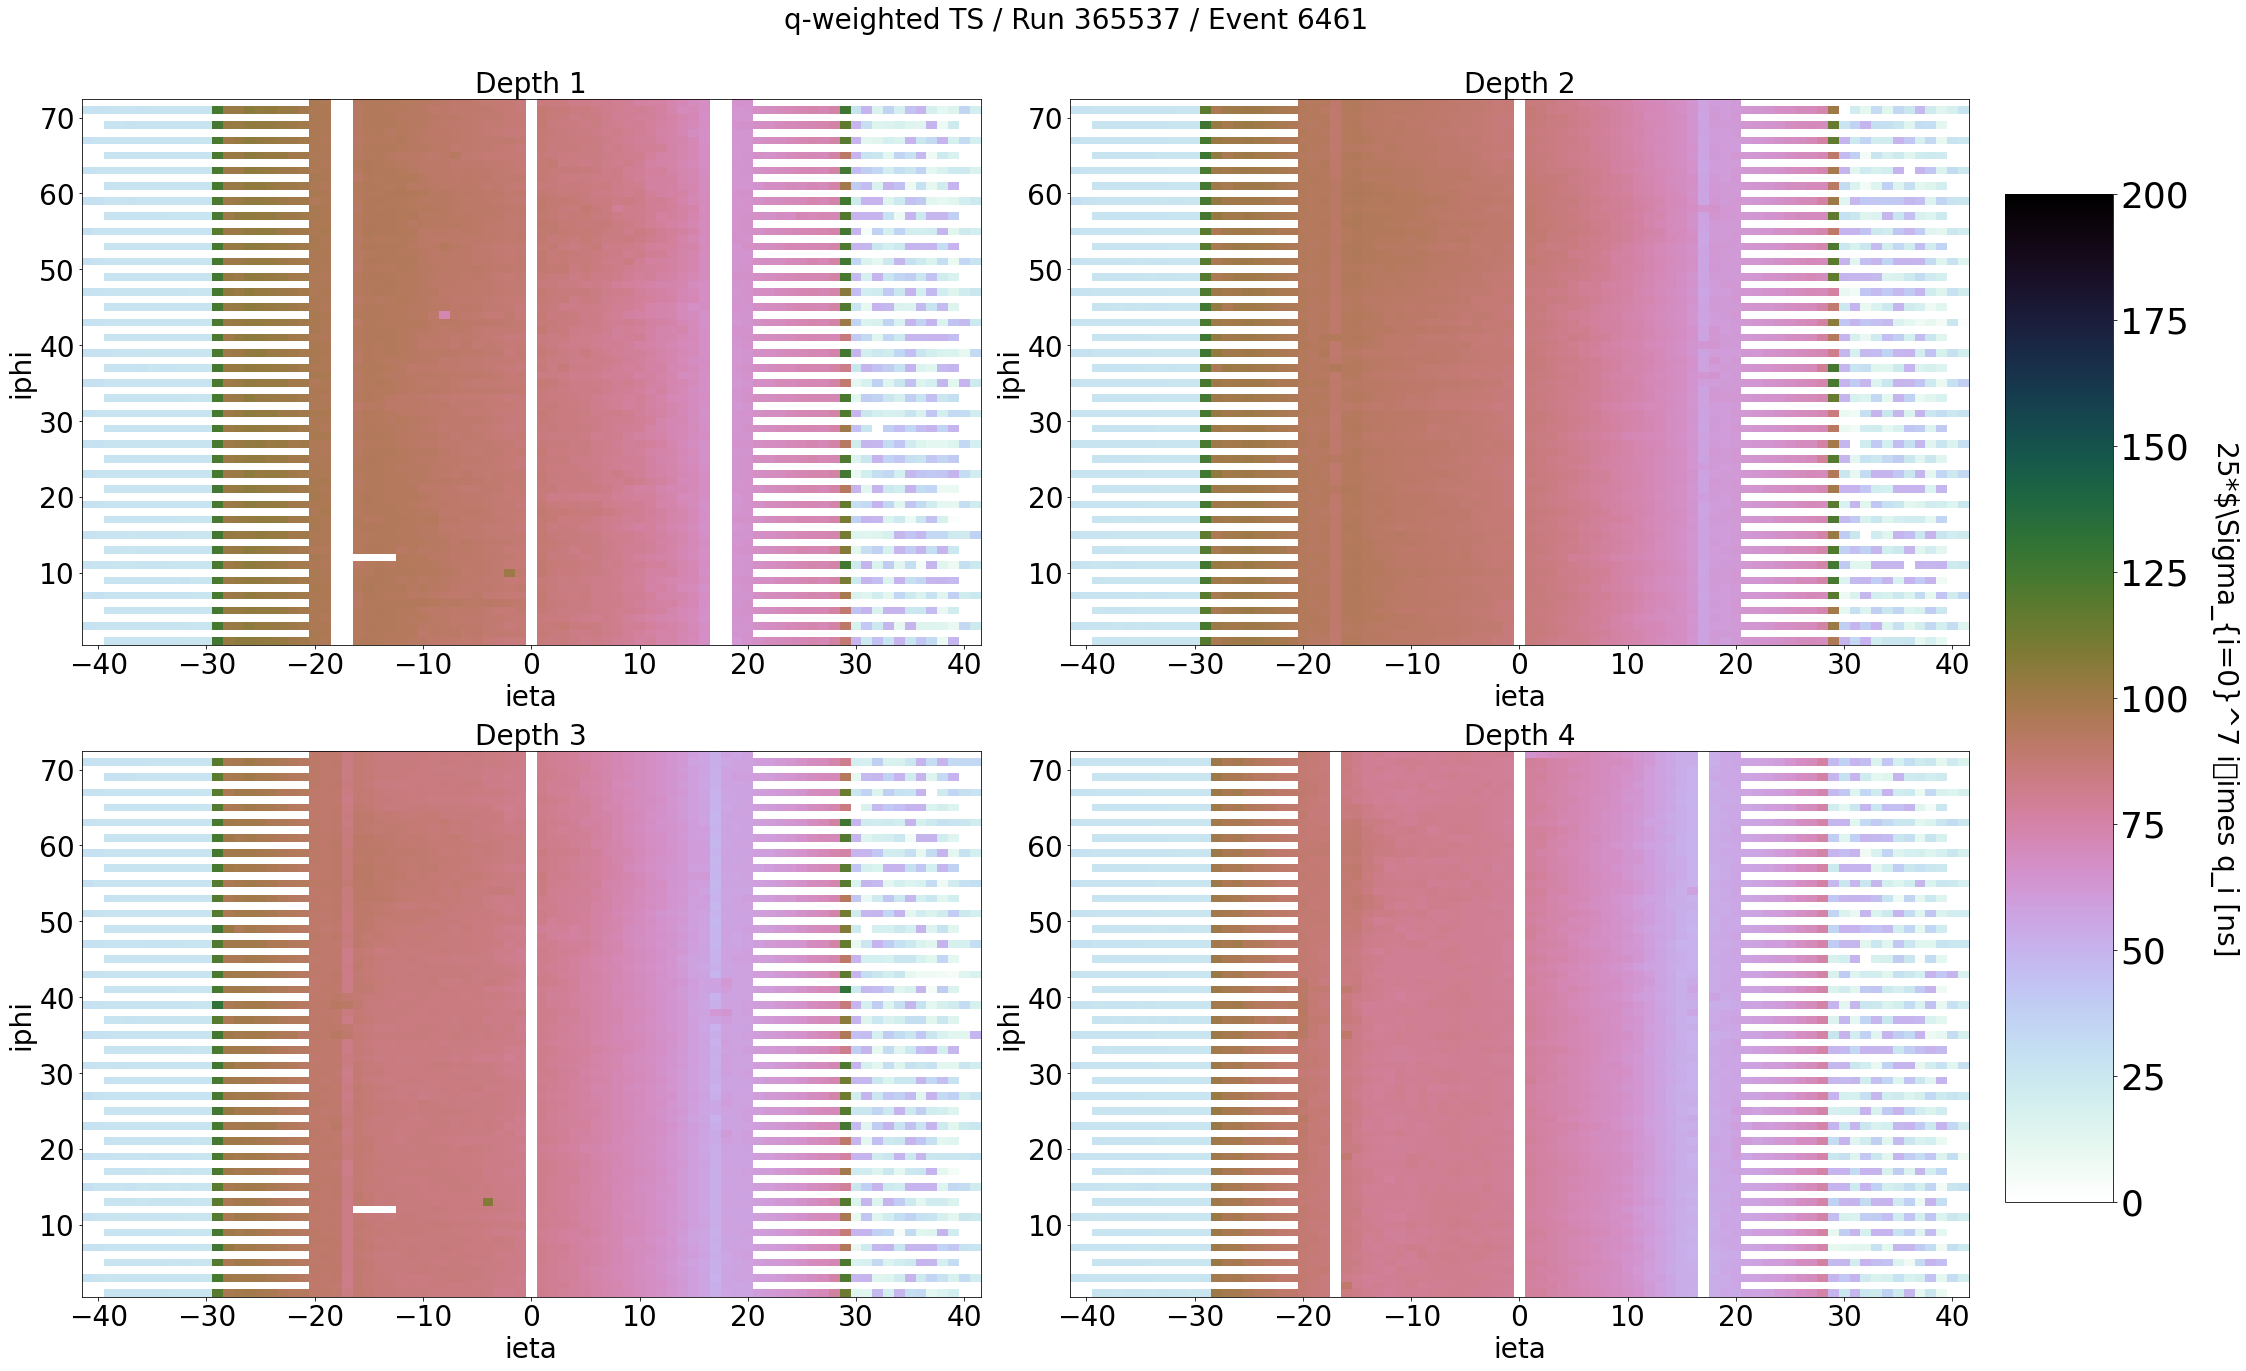

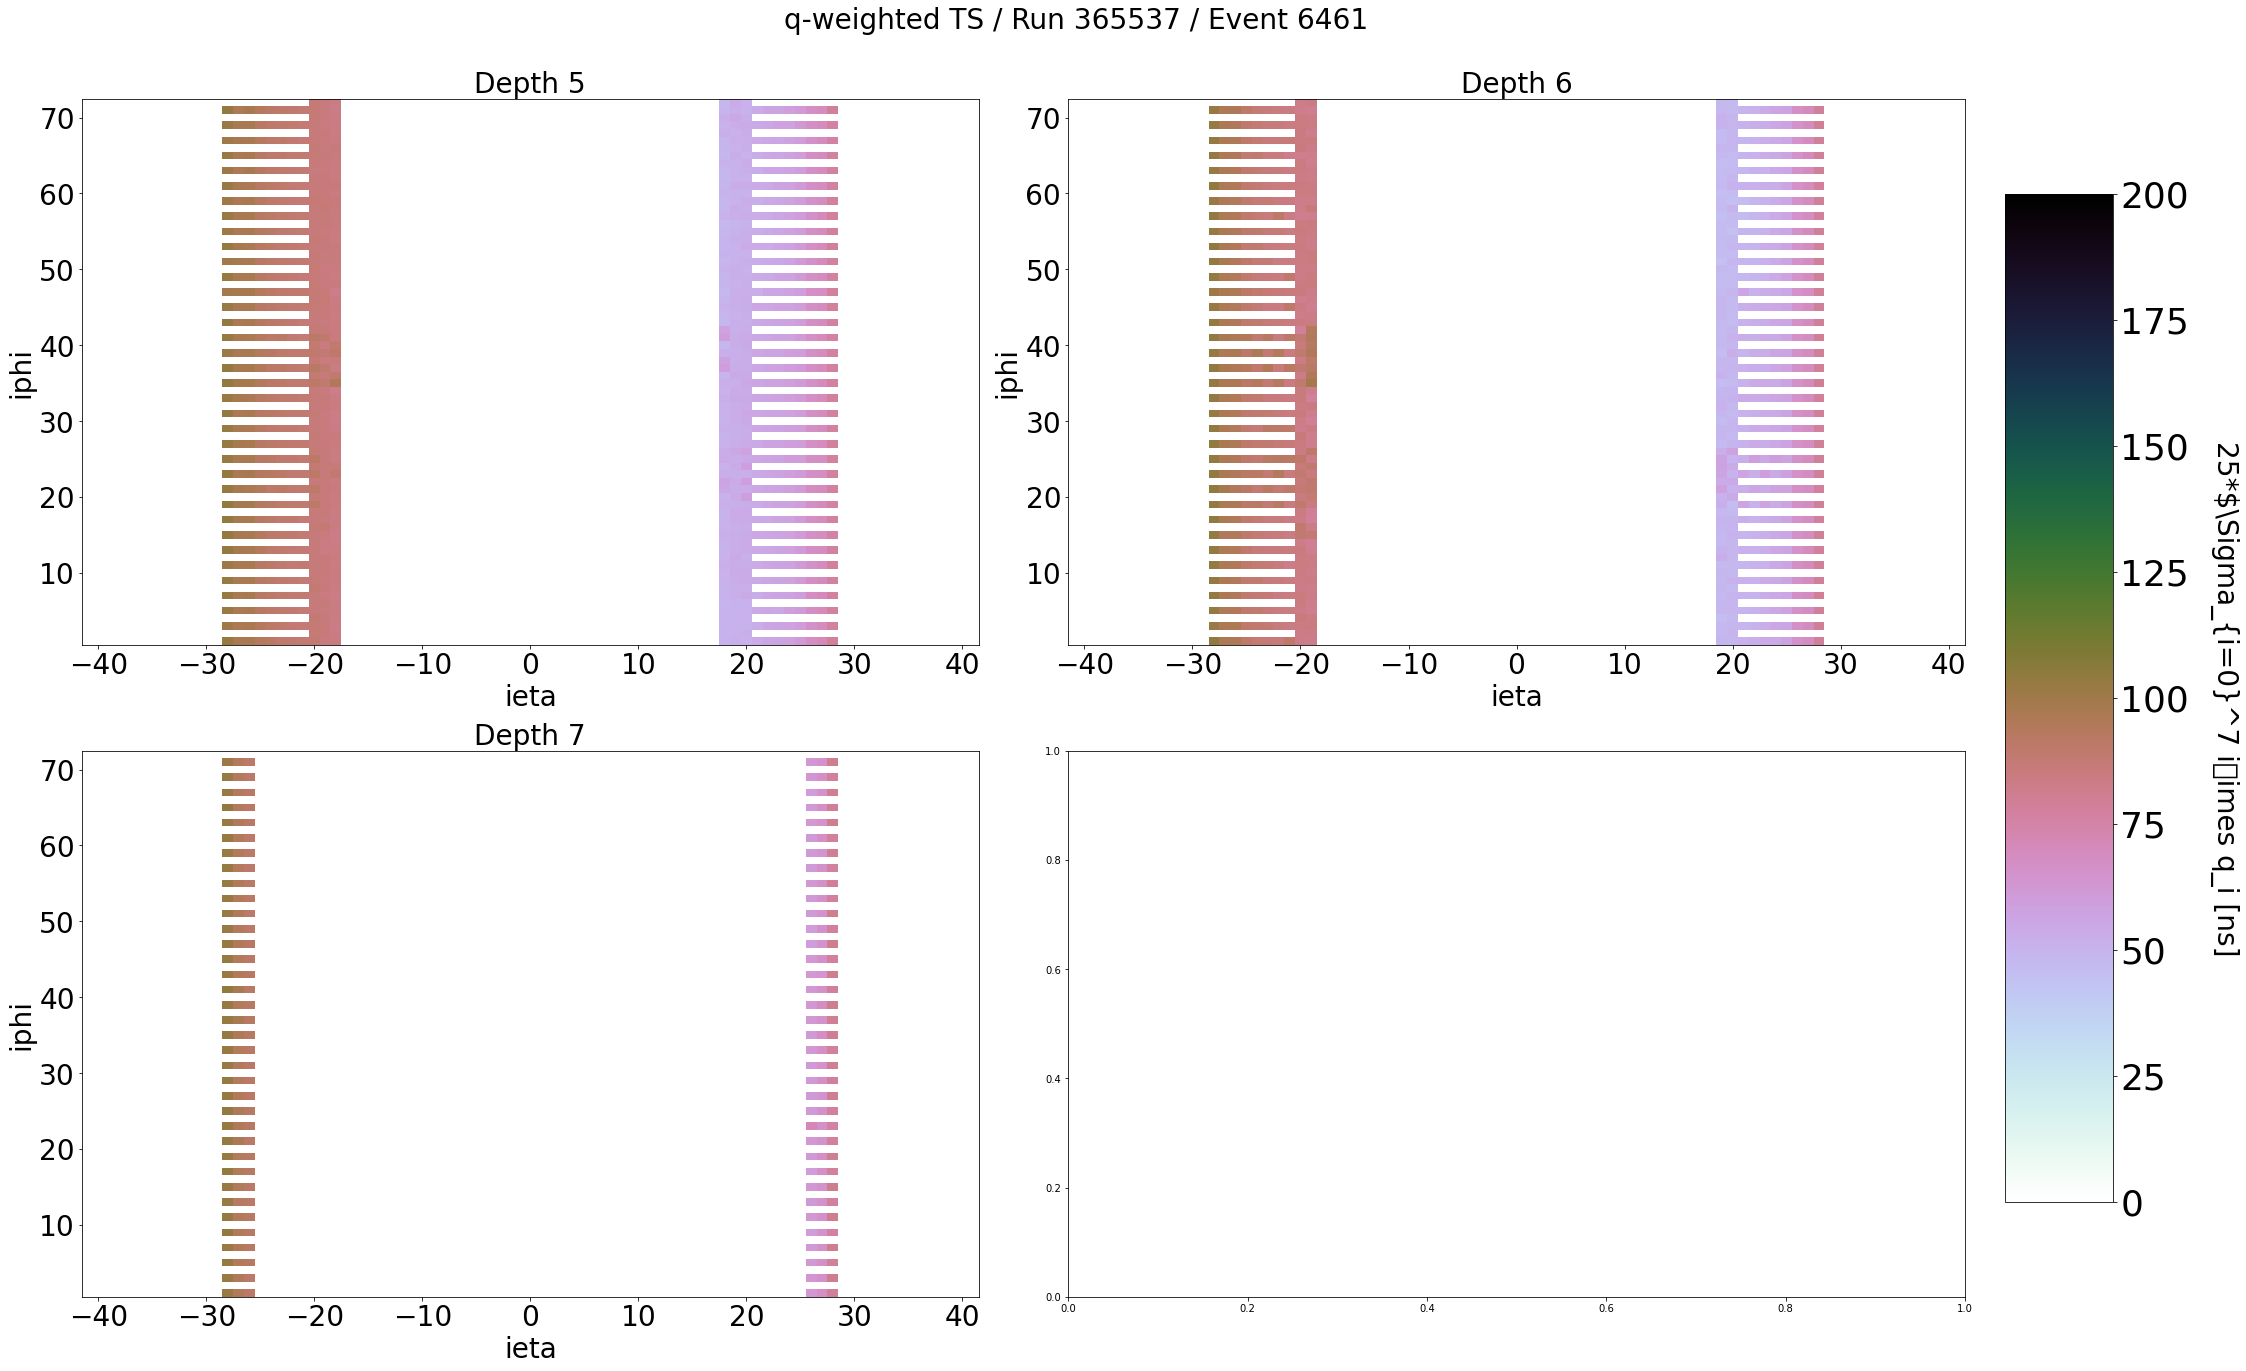

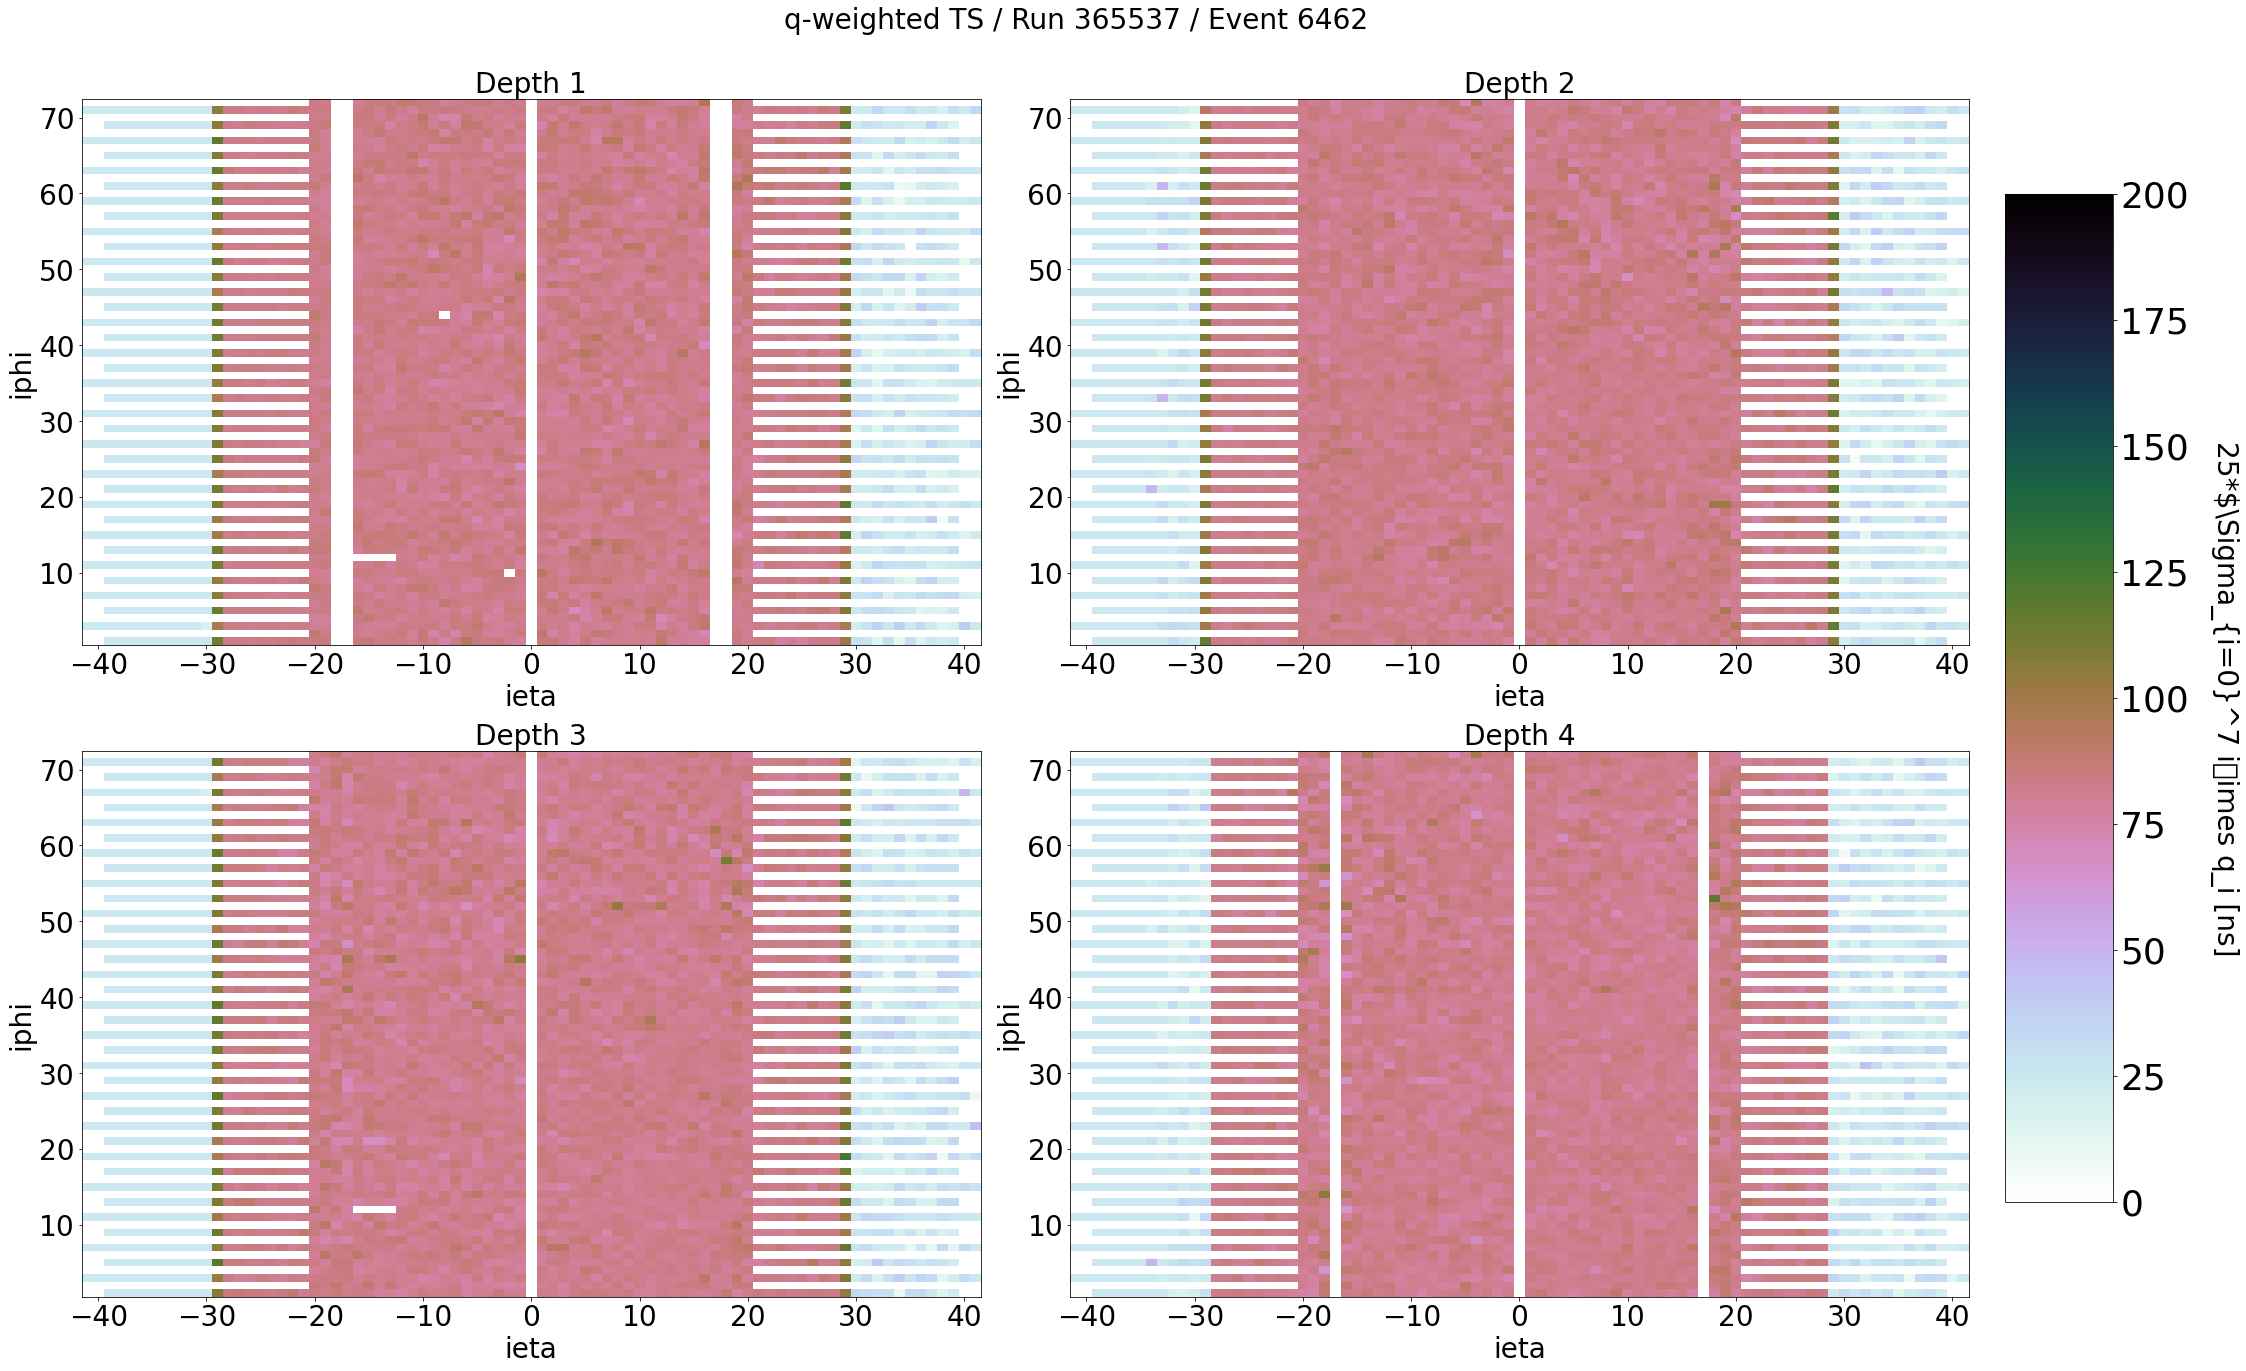

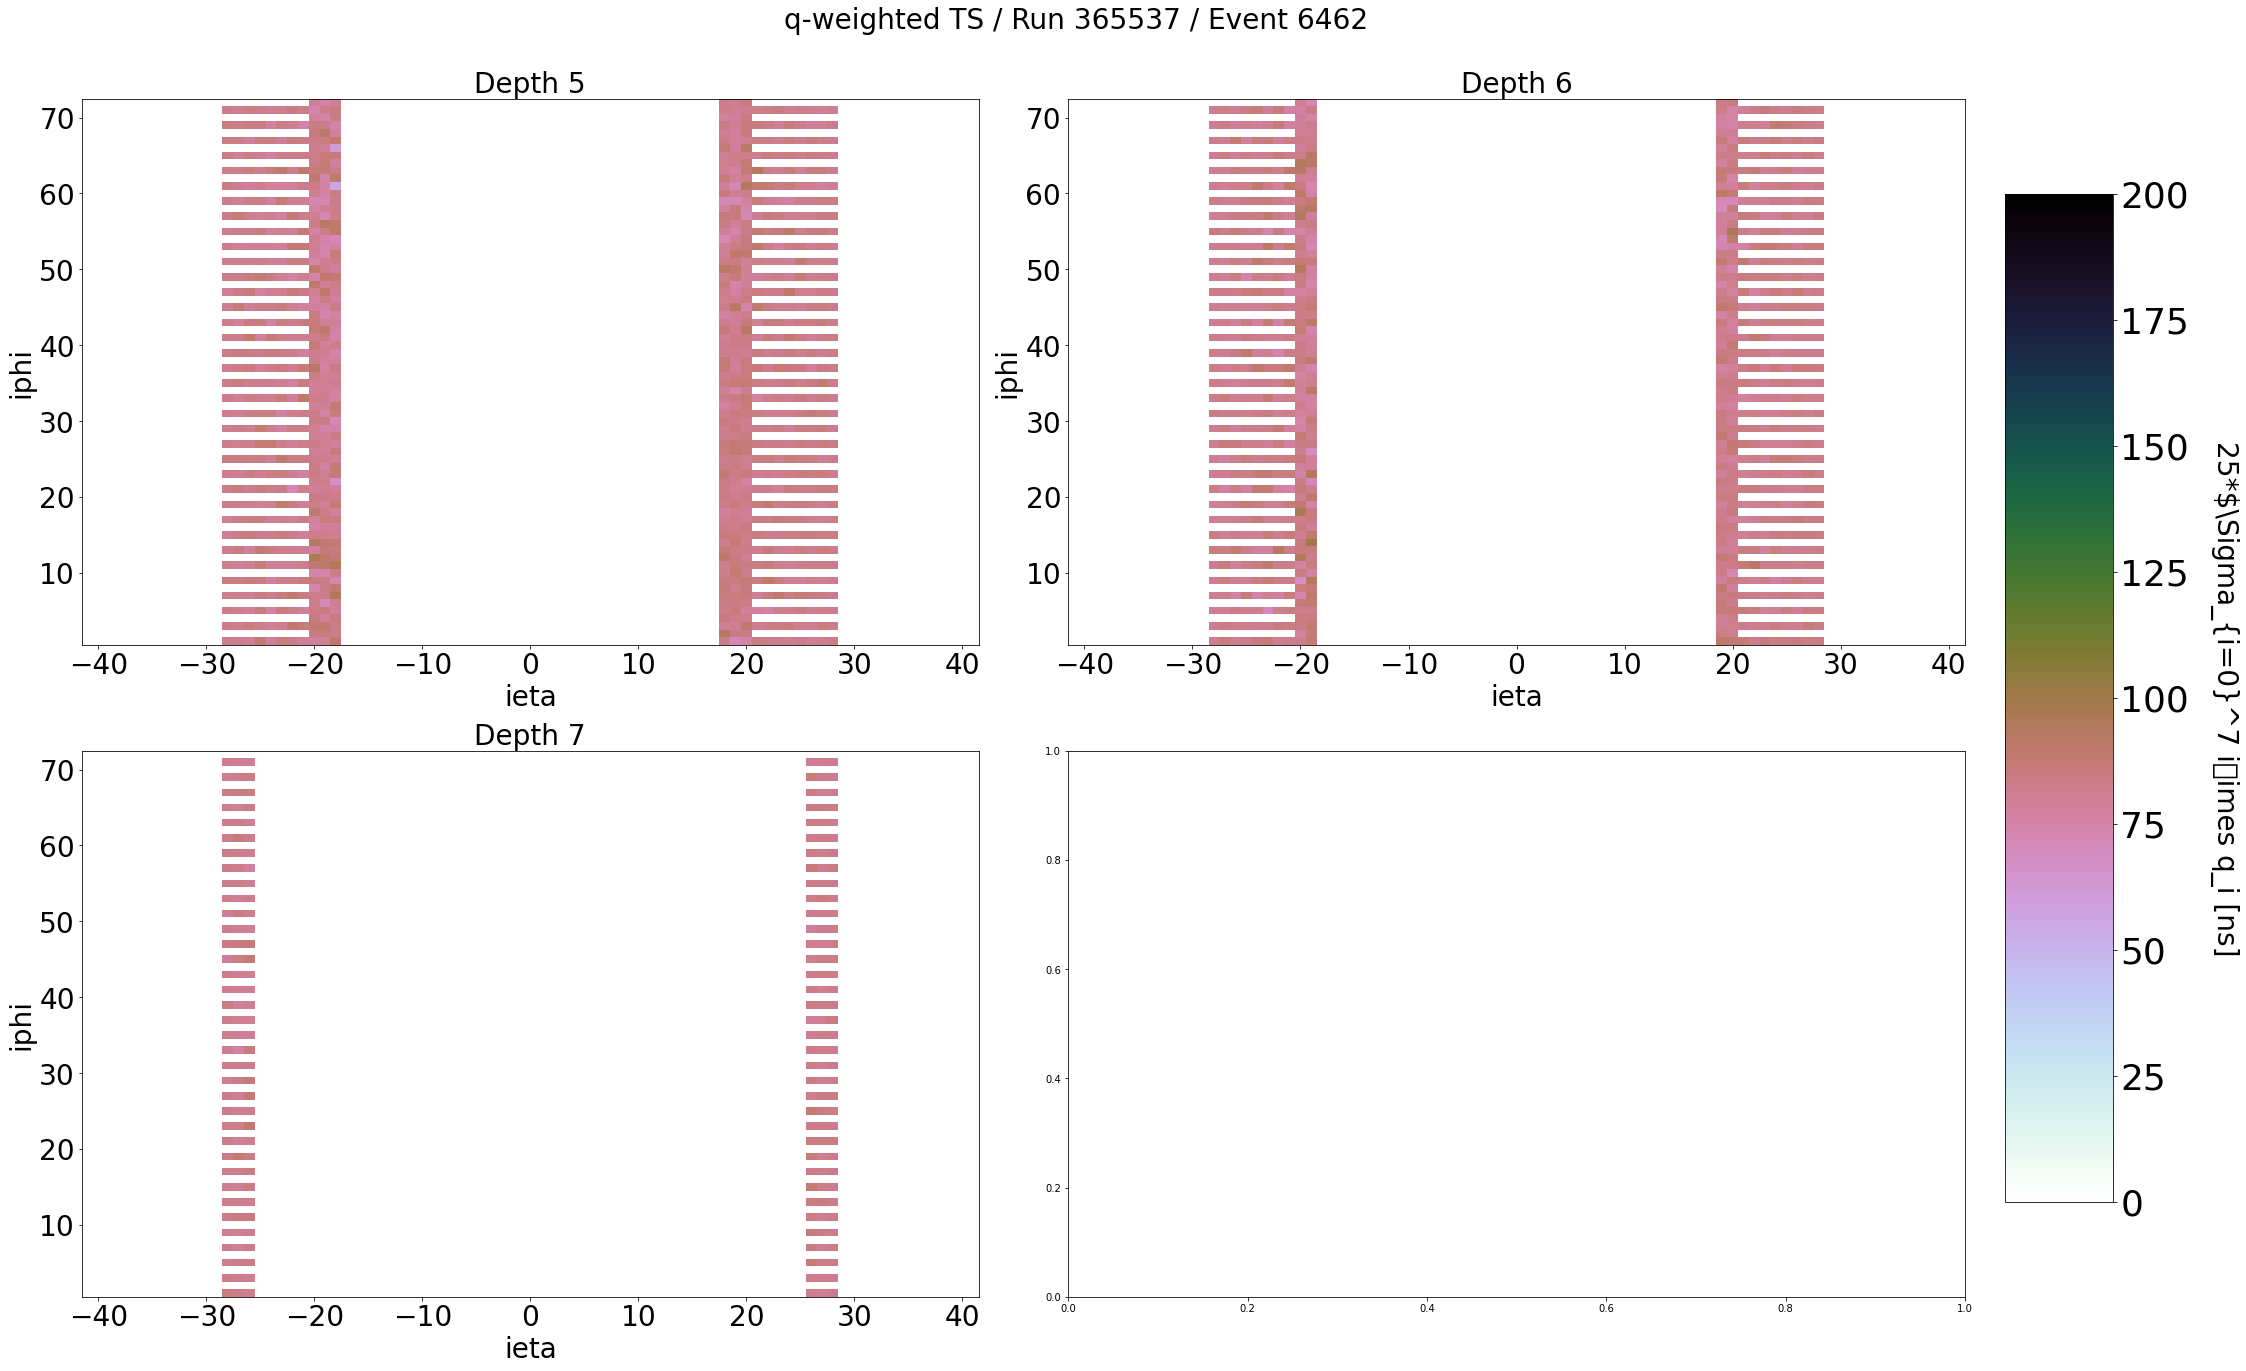

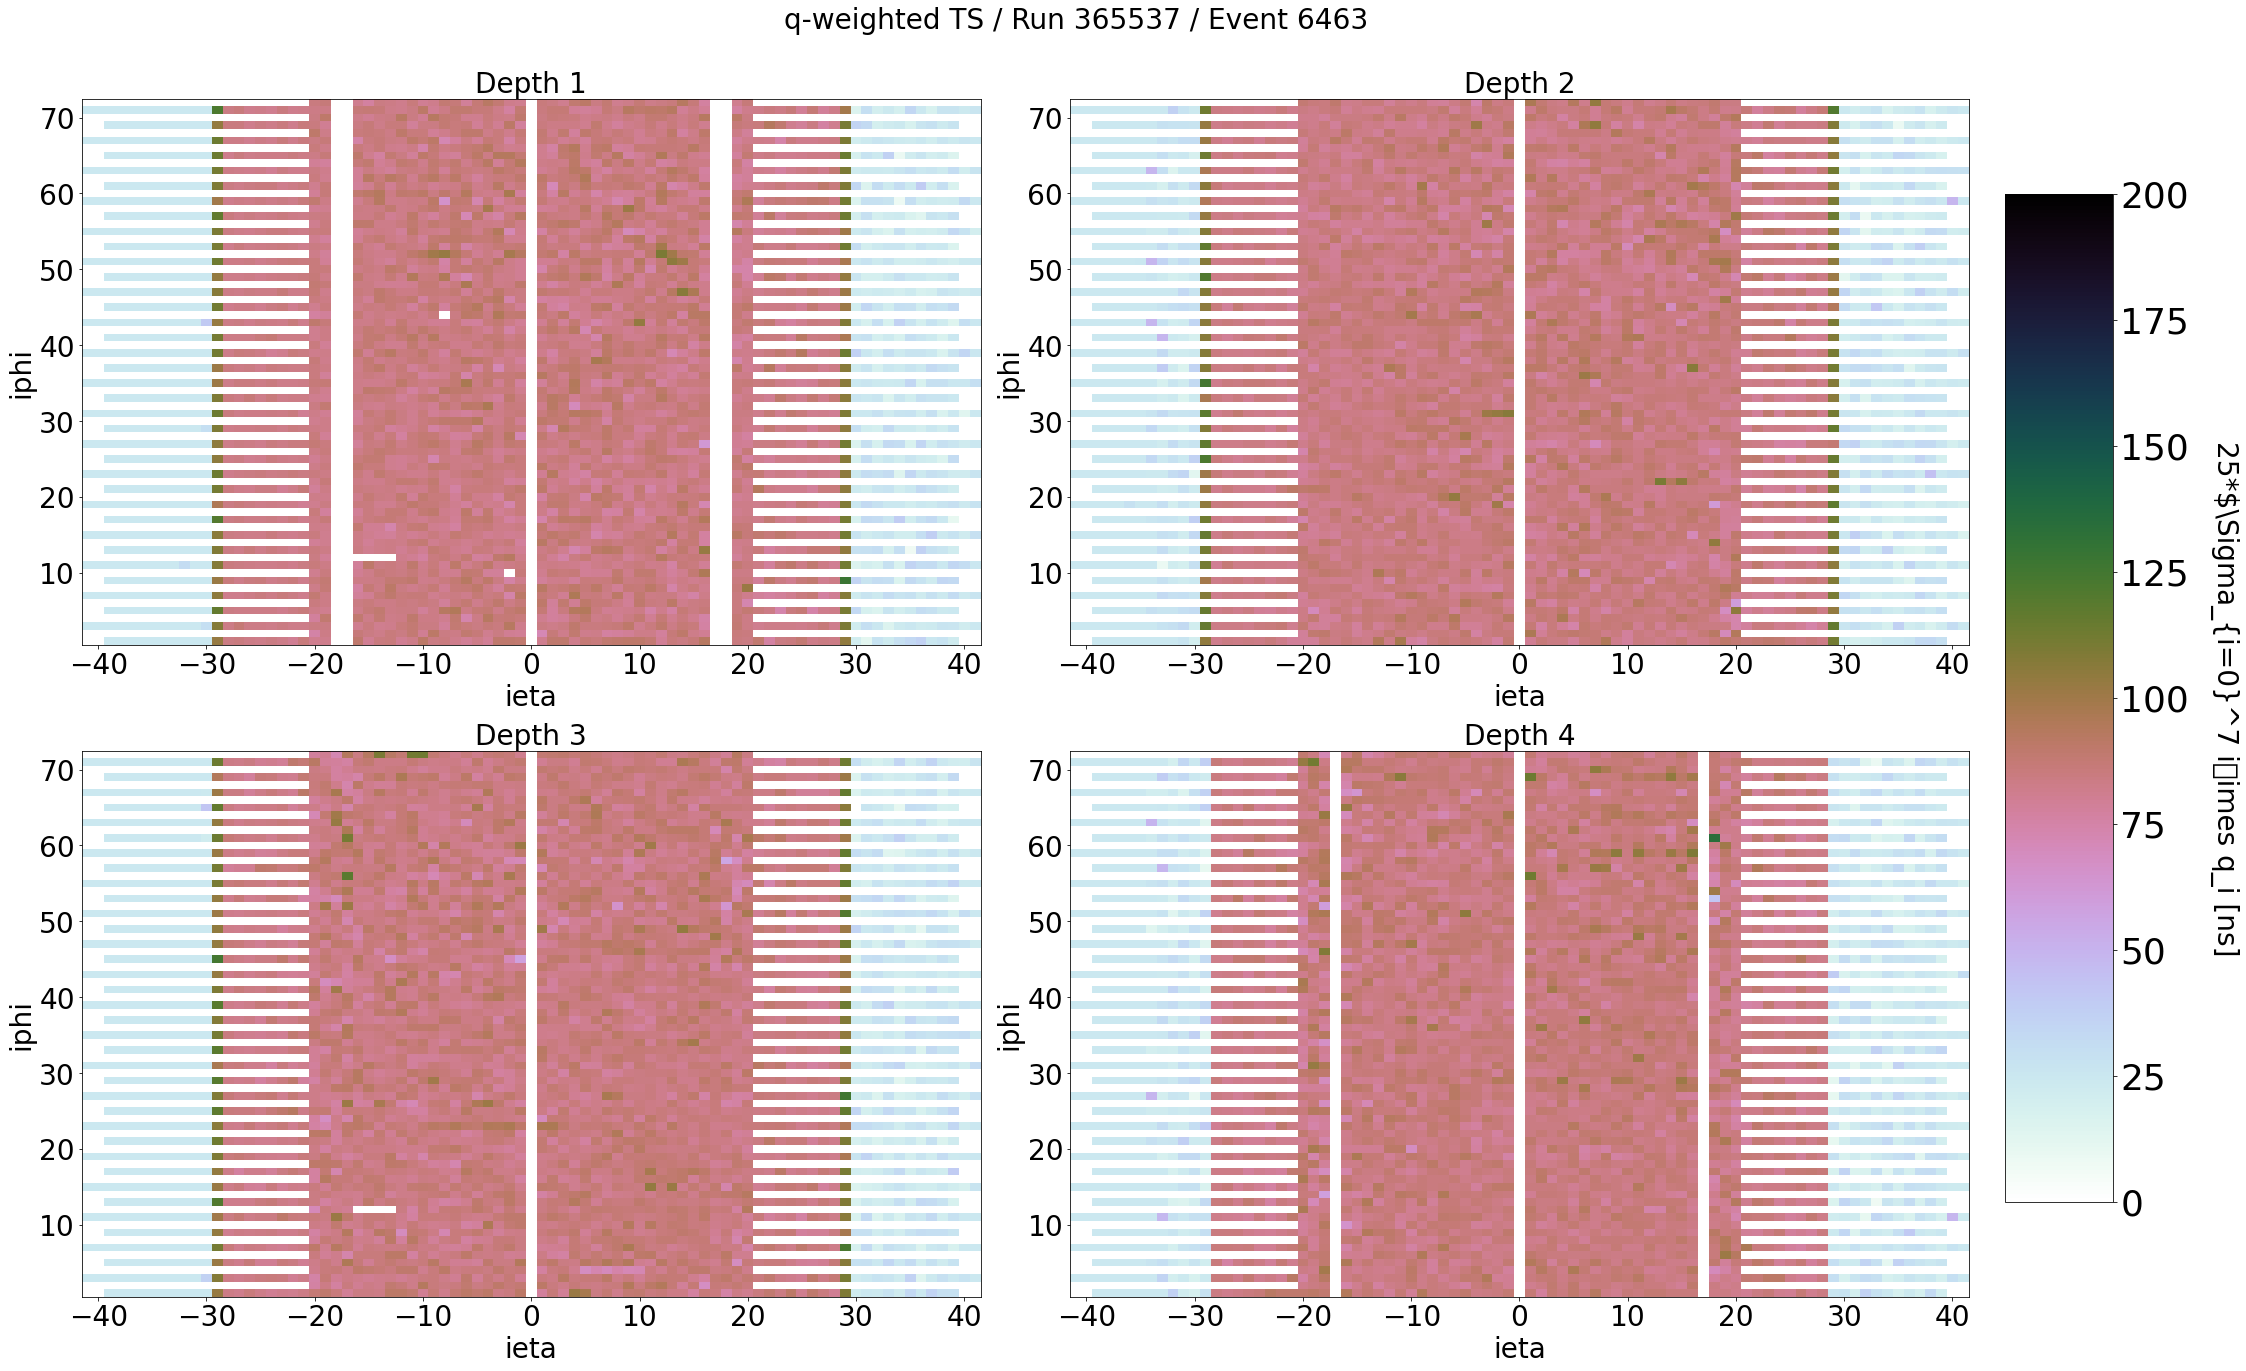

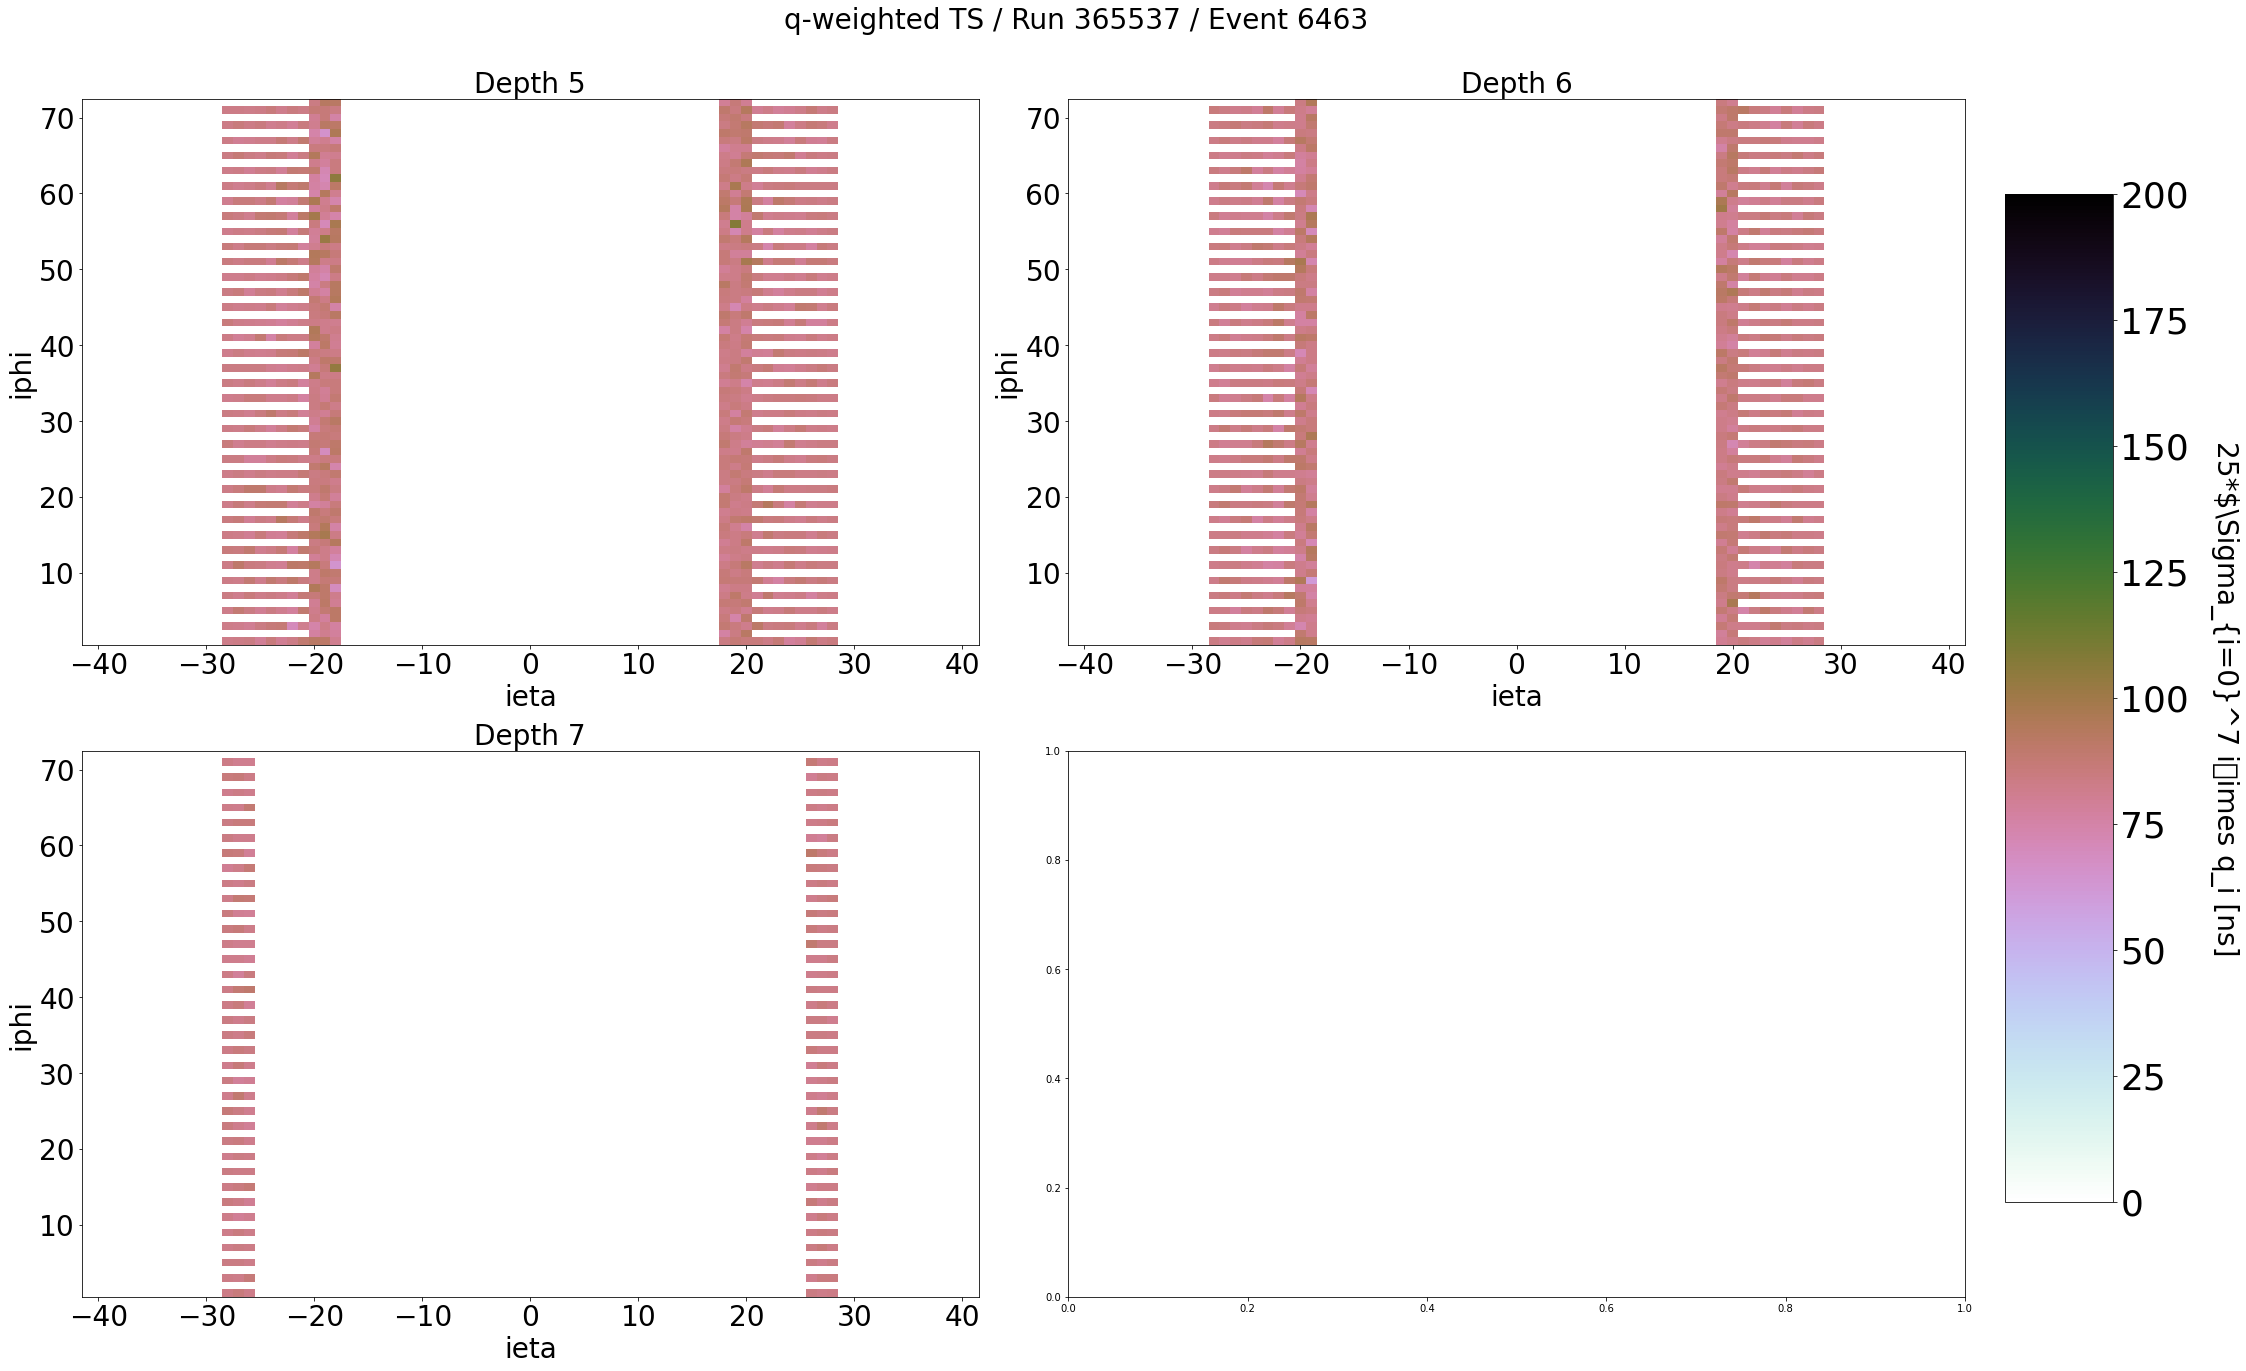

In [12]:
# qtime
bighist = stuff[run_key]["splash_qtime"]
print(bighist.axes)
event_numbers = list(bighist.axes[0])
event_numbers.sort()
print(event_numbers)

def plot4(bighist, event_number, depths, close=False):
    print(event_number)
    if len(depths) >= 5: 
        raise ValueError("In plot4, max 4 depths")
    zmax = np.max(bighist.values())
    fig, axs = plt.subplots(2, 2, figsize=(30, 20))
    fig.suptitle(f"q-weighted TS / Run {run_short} / Event {event_number}", fontsize=28)
    for iax, depth in enumerate(depths):
        this_hist = bighist[{"event_number": bh.loc(event_number), "depth": bh.loc(depth)}]
        #print(len(this_hist.axes))
        #print(this_hist.axes)
        this_hist = this_hist[:,:,1.0j:1.53174046e+05j].project("ieta", "iphi")
        this_ax = axs.flat[iax]
        pcm_objs = this_hist.plot(ax=this_ax, cmap="cubehelix_r", vmin=0, vmax=200., cbar=False)
        this_ax.xaxis.label.set_size(28)
        this_ax.xaxis.set_tick_params(labelsize=28)
        this_ax.yaxis.label.set_size(28)
        this_ax.yaxis.set_tick_params(labelsize=28)
        this_ax.set_title(f"Depth {depth}", fontsize=28)
        #colorbar.ax.yaxis.label.set_size(14)
        #colorbar.ax.tick_params(axis="y", labelsize=18)
    fig.tight_layout(rect=[0, 0.03, 0.92, 0.97])
    cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(pcm_objs[0], cax=cbar_ax, cmap="rainbow")
    cbar.ax.tick_params(axis="y", labelsize=36)
    cbar.set_label("25*$\Sigma_{i=0}^7 i\times q_i [ns]", rotation=270, fontsize=28, labelpad=50)
    fig.savefig(f"/afs/cern.ch/user/d/dryu/HCAL/hcalanalysis/hcalanalysis/splash23/figures/qtimemap_depth4_r{run_short}_e{event_number}_d{depths[0]}-{depths[-1]}.png", bbox_inches = "tight")
    if close:
        plt.close(fig)
        
    #cbar.set_bad('red')

for i, event_number in enumerate(event_numbers):
    plot4(bighist, event_number, range(1, 4+1), close=(i>10))
    plot4(bighist, event_number, range(5, 7+1), close=(i>10))
